In [13]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence[6300])

1.0


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 330,400
Trainable params: 330,400
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print ('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train_sequence')
print(len(input_test), 'test_sequence')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test  = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape) 

Loading data...


    8192/17464789 [..............................] - ETA: 18:55

   24576/17464789 [..............................] - ETA: 12:39

   40960/17464789 [..............................] - ETA: 9:29 

   57344/17464789 [..............................] - ETA: 8:07

   90112/17464789 [..............................] - ETA: 6:01

  122880/17464789 [..............................] - ETA: 5:02

  163840/17464789 [..............................] - ETA: 4:14

  229376/17464789 [..............................] - ETA: 3:21

  278528/17464789 [..............................] - ETA: 2:50

  303104/17464789 [..............................] - ETA: 2:46

  368640/17464789 [..............................] - ETA: 2:20

  385024/17464789 [..............................] - ETA: 2:22

  475136/17464789 [..............................] - ETA: 1:57

  507904/17464789 [..............................] - ETA: 1:56

  614400/17464789 [>.............................] - ETA: 1:37



  647168/17464789 [>.............................] - ETA: 1:37

  786432/17464789 [>.............................] - ETA: 1:21



  835584/17464789 [>.............................] - ETA: 1:19

  999424/17464789 [>.............................] - ETA: 1:07

 1081344/17464789 [>.............................] - ETA: 1:04

 1253376/17464789 [=>............................] - ETA: 56s 

 1359872/17464789 [=>............................] - ETA: 53s

 1556480/17464789 [=>............................] - ETA: 47s



 1671168/17464789 [=>............................] - ETA: 45s

 1900544/17464789 [==>...........................] - ETA: 40s

 2039808/17464789 [==>...........................] - ETA: 38s

 2318336/17464789 [==>...........................] - ETA: 33s



 2457600/17464789 [===>..........................] - ETA: 32s

 2785280/17464789 [===>..........................] - ETA: 28s



 2949120/17464789 [====>.........................] - ETA: 27s

 3309568/17464789 [====>.........................] - ETA: 24s

 3522560/17464789 [=====>........................] - ETA: 23s

 3923968/17464789 [=====>........................] - ETA: 20s

 4177920/17464789 [======>.......................] - ETA: 19s

 4653056/17464789 [======>.......................] - ETA: 17s

 4947968/17464789 [=======>......................] - ETA: 15s

 4980736/17464789 [=======>......................] - ETA: 16s

 5554176/17464789 [========>.....................] - ETA: 13s

 5865472/17464789 [=========>....................] - ETA: 12s

 5996544/17464789 [=========>....................] - ETA: 12s

 6586368/17464789 [==========>...................] - ETA: 11s

 7077888/17464789 [===========>..................] - ETA: 9s 

 7258112/17464789 [===========>..................] - ETA: 9s

 7274496/17464789 [===========>..................] - ETA: 9s

 7815168/17464789 [============>.................] - ETA: 8s



 8404992/17464789 [=============>................] - ETA: 7s

 8454144/17464789 [=============>................] - ETA: 7s

 9568256/17464789 [===============>..............] - ETA: 6s



10027008/17464789 [================>.............] - ETA: 5s

10403840/17464789 [================>.............] - ETA: 5s

11812864/17464789 [===================>..........] - ETA: 3s

12738560/17464789 [====================>.........] - ETA: 2s

13238272/17464789 [=====================>........] - ETA: 2s

13451264/17464789 [======================>.......] - ETA: 2s

13516800/17464789 [======================>.......] - ETA: 2s

13647872/17464789 [======================>.......] - ETA: 2s

13664256/17464789 [======================>.......] - ETA: 2s

13729792/17464789 [======================>.......] - ETA: 2s



13893632/17464789 [======================>.......] - ETA: 2s

13910016/17464789 [======================>.......] - ETA: 2s

14008320/17464789 [=======================>......] - ETA: 2s



14204928/17464789 [=======================>......] - ETA: 2s

14237696/17464789 [=======================>......] - ETA: 2s

14368768/17464789 [=======================>......] - ETA: 1s



14647296/17464789 [========================>.....] - ETA: 1s

14680064/17464789 [========================>.....] - ETA: 1s

14843904/17464789 [========================>.....] - ETA: 1s



15204352/17464789 [=========================>....] - ETA: 1s

15220736/17464789 [=========================>....] - ETA: 1s

15400960/17464789 [=========================>....] - ETA: 1s

15794176/17464789 [==========================>...] - ETA: 1s

15892480/17464789 [==========================>...] - ETA: 0s

16105472/17464789 [==========================>...] - ETA: 0s

16547840/17464789 [===========================>..] - ETA: 0s

16728064/17464789 [===========================>..] - ETA: 0s



16973824/17464789 [============================>.] - ETA: 0s

16990208/17464789 [============================>.] - ETA: 0s



17465344/17464789 [==============================] - 10s 1us/step


25000 train_sequence
25000 test_sequence
Pad sequences (samples x time)


input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [9]:
from keras.layers import Dense, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


   10/20000 [..............................] - ETA: 55:08 - loss: 0.6929 - acc: 0.7000

   20/20000 [..............................] - ETA: 34:21 - loss: 0.6898 - acc: 0.7000

   30/20000 [..............................] - ETA: 29:30 - loss: 0.6944 - acc: 0.5333

   40/20000 [..............................] - ETA: 25:54 - loss: 0.6949 - acc: 0.5000

   50/20000 [..............................] - ETA: 23:55 - loss: 0.6949 - acc: 0.4800

   60/20000 [..............................] - ETA: 23:01 - loss: 0.6942 - acc: 0.5000

   70/20000 [..............................] - ETA: 21:33 - loss: 0.6950 - acc: 0.4714

   80/20000 [..............................] - ETA: 20:27 - loss: 0.6947 - acc: 0.5000

   90/20000 [..............................] - ETA: 19:39 - loss: 0.6945 - acc: 0.5000

  100/20000 [..............................] - ETA: 18:57 - loss: 0.6947 - acc: 0.4800

  110/20000 [..............................] - ETA: 18:24 - loss: 0.6946 - acc: 0.4636

  120/20000 [..............................] - ETA: 17:58 - loss: 0.6942 - acc: 0.4833

  130/20000 [..............................] - ETA: 17:33 - loss: 0.6942 - acc: 0.4923

  140/20000 [..............................] - ETA: 17:12 - loss: 0.6940 - acc: 0.4929

  150/20000 [..............................] - ETA: 16:54 - loss: 0.6937 - acc: 0.5067

  160/20000 [..............................] - ETA: 16:38 - loss: 0.6938 - acc: 0.5000

  170/20000 [..............................] - ETA: 16:24 - loss: 0.6938 - acc: 0.5059

  180/20000 [..............................] - ETA: 16:12 - loss: 0.6936 - acc: 0.5056

  190/20000 [..............................] - ETA: 16:01 - loss: 0.6934 - acc: 0.5053

  200/20000 [..............................] - ETA: 15:51 - loss: 0.6934 - acc: 0.4950

  210/20000 [..............................] - ETA: 15:41 - loss: 0.6933 - acc: 0.4952

  220/20000 [..............................] - ETA: 15:32 - loss: 0.6932 - acc: 0.4955

  230/20000 [..............................] - ETA: 15:23 - loss: 0.6934 - acc: 0.4870

  240/20000 [..............................] - ETA: 15:16 - loss: 0.6933 - acc: 0.4917

  250/20000 [..............................] - ETA: 15:10 - loss: 0.6933 - acc: 0.4920

  260/20000 [..............................] - ETA: 15:03 - loss: 0.6933 - acc: 0.4923

  270/20000 [..............................] - ETA: 14:59 - loss: 0.6932 - acc: 0.4963

  280/20000 [..............................] - ETA: 14:55 - loss: 0.6930 - acc: 0.5000

  290/20000 [..............................] - ETA: 14:50 - loss: 0.6930 - acc: 0.4966

  300/20000 [..............................] - ETA: 14:45 - loss: 0.6929 - acc: 0.5000

  310/20000 [..............................] - ETA: 14:41 - loss: 0.6930 - acc: 0.4968

  320/20000 [..............................] - ETA: 14:37 - loss: 0.6929 - acc: 0.4969

  330/20000 [..............................] - ETA: 14:32 - loss: 0.6929 - acc: 0.4970

  340/20000 [..............................] - ETA: 14:29 - loss: 0.6927 - acc: 0.5000

  350/20000 [..............................] - ETA: 14:25 - loss: 0.6926 - acc: 0.5029

  360/20000 [..............................] - ETA: 14:22 - loss: 0.6930 - acc: 0.4972

  370/20000 [..............................] - ETA: 14:19 - loss: 0.6930 - acc: 0.4973

  380/20000 [..............................] - ETA: 14:16 - loss: 0.6930 - acc: 0.4974

  390/20000 [..............................] - ETA: 14:13 - loss: 0.6931 - acc: 0.4923

  400/20000 [..............................] - ETA: 14:10 - loss: 0.6931 - acc: 0.4950

  410/20000 [..............................] - ETA: 14:07 - loss: 0.6931 - acc: 0.4951

  420/20000 [..............................] - ETA: 14:05 - loss: 0.6930 - acc: 0.5000

  430/20000 [..............................] - ETA: 14:02 - loss: 0.6929 - acc: 0.5000

  440/20000 [..............................] - ETA: 14:00 - loss: 0.6930 - acc: 0.5000

  450/20000 [..............................] - ETA: 13:58 - loss: 0.6929 - acc: 0.5022

  460/20000 [..............................] - ETA: 13:56 - loss: 0.6928 - acc: 0.5065

  470/20000 [..............................] - ETA: 13:53 - loss: 0.6929 - acc: 0.5021

  480/20000 [..............................] - ETA: 13:51 - loss: 0.6929 - acc: 0.5063

  490/20000 [..............................] - ETA: 13:49 - loss: 0.6928 - acc: 0.5082

  500/20000 [..............................] - ETA: 13:47 - loss: 0.6928 - acc: 0.5080

  510/20000 [..............................] - ETA: 13:45 - loss: 0.6928 - acc: 0.5078

  520/20000 [..............................] - ETA: 13:43 - loss: 0.6927 - acc: 0.5096

  530/20000 [..............................] - ETA: 13:41 - loss: 0.6927 - acc: 0.5094

  540/20000 [..............................] - ETA: 13:40 - loss: 0.6928 - acc: 0.5093

  550/20000 [..............................] - ETA: 13:38 - loss: 0.6927 - acc: 0.5073

  560/20000 [..............................] - ETA: 13:36 - loss: 0.6927 - acc: 0.5107

  570/20000 [..............................] - ETA: 13:35 - loss: 0.6926 - acc: 0.5140

  580/20000 [..............................] - ETA: 13:33 - loss: 0.6925 - acc: 0.5155

  590/20000 [..............................] - ETA: 13:32 - loss: 0.6924 - acc: 0.5153

  600/20000 [..............................] - ETA: 13:30 - loss: 0.6923 - acc: 0.5150

  610/20000 [..............................] - ETA: 13:29 - loss: 0.6922 - acc: 0.5164

  620/20000 [..............................] - ETA: 13:27 - loss: 0.6923 - acc: 0.5145

  630/20000 [..............................] - ETA: 13:26 - loss: 0.6923 - acc: 0.5143

  640/20000 [..............................] - ETA: 13:25 - loss: 0.6924 - acc: 0.5125

  650/20000 [..............................] - ETA: 13:23 - loss: 0.6924 - acc: 0.5123

  660/20000 [..............................] - ETA: 13:22 - loss: 0.6924 - acc: 0.5106

  670/20000 [>.............................] - ETA: 13:20 - loss: 0.6924 - acc: 0.5104

  680/20000 [>.............................] - ETA: 13:19 - loss: 0.6923 - acc: 0.5118

  690/20000 [>.............................] - ETA: 13:17 - loss: 0.6924 - acc: 0.5130

  700/20000 [>.............................] - ETA: 13:16 - loss: 0.6924 - acc: 0.5114

  710/20000 [>.............................] - ETA: 13:15 - loss: 0.6923 - acc: 0.5141

  720/20000 [>.............................] - ETA: 13:14 - loss: 0.6924 - acc: 0.5139

  730/20000 [>.............................] - ETA: 13:12 - loss: 0.6924 - acc: 0.5137

  740/20000 [>.............................] - ETA: 13:12 - loss: 0.6925 - acc: 0.5135

  750/20000 [>.............................] - ETA: 13:11 - loss: 0.6924 - acc: 0.5147

  760/20000 [>.............................] - ETA: 13:10 - loss: 0.6922 - acc: 0.5197

  770/20000 [>.............................] - ETA: 13:09 - loss: 0.6922 - acc: 0.5195

  780/20000 [>.............................] - ETA: 13:07 - loss: 0.6921 - acc: 0.5231

  790/20000 [>.............................] - ETA: 13:06 - loss: 0.6919 - acc: 0.5253

  800/20000 [>.............................] - ETA: 13:05 - loss: 0.6919 - acc: 0.5238

  810/20000 [>.............................] - ETA: 13:04 - loss: 0.6919 - acc: 0.5259

  820/20000 [>.............................] - ETA: 13:03 - loss: 0.6917 - acc: 0.5293

  830/20000 [>.............................] - ETA: 13:02 - loss: 0.6916 - acc: 0.5289

  840/20000 [>.............................] - ETA: 13:01 - loss: 0.6916 - acc: 0.5298

  850/20000 [>.............................] - ETA: 13:00 - loss: 0.6916 - acc: 0.5282

  860/20000 [>.............................] - ETA: 12:59 - loss: 0.6916 - acc: 0.5267

  870/20000 [>.............................] - ETA: 12:58 - loss: 0.6914 - acc: 0.5276

  880/20000 [>.............................] - ETA: 12:57 - loss: 0.6912 - acc: 0.5295

  890/20000 [>.............................] - ETA: 12:56 - loss: 0.6910 - acc: 0.5303

  900/20000 [>.............................] - ETA: 12:55 - loss: 0.6908 - acc: 0.5311

  910/20000 [>.............................] - ETA: 12:55 - loss: 0.6968 - acc: 0.5286

  920/20000 [>.............................] - ETA: 12:54 - loss: 0.6965 - acc: 0.5293

  930/20000 [>.............................] - ETA: 12:53 - loss: 0.6966 - acc: 0.5290

  940/20000 [>.............................] - ETA: 12:52 - loss: 0.6963 - acc: 0.5309

  950/20000 [>.............................] - ETA: 12:51 - loss: 0.6962 - acc: 0.5305

  960/20000 [>.............................] - ETA: 12:51 - loss: 0.6960 - acc: 0.5313

  970/20000 [>.............................] - ETA: 12:50 - loss: 0.6955 - acc: 0.5340

  980/20000 [>.............................] - ETA: 12:49 - loss: 0.6955 - acc: 0.5327

  990/20000 [>.............................] - ETA: 12:48 - loss: 0.6953 - acc: 0.5343

 1000/20000 [>.............................] - ETA: 12:47 - loss: 0.6953 - acc: 0.5340

 1010/20000 [>.............................] - ETA: 12:47 - loss: 0.6950 - acc: 0.5356

 1020/20000 [>.............................] - ETA: 12:46 - loss: 0.6947 - acc: 0.5382

 1030/20000 [>.............................] - ETA: 12:45 - loss: 0.6944 - acc: 0.5388

 1040/20000 [>.............................] - ETA: 12:44 - loss: 0.6945 - acc: 0.5385

 1050/20000 [>.............................] - ETA: 12:44 - loss: 0.6944 - acc: 0.5371

 1060/20000 [>.............................] - ETA: 12:43 - loss: 0.6941 - acc: 0.5396

 1070/20000 [>.............................] - ETA: 12:43 - loss: 0.6938 - acc: 0.5393

 1080/20000 [>.............................] - ETA: 12:43 - loss: 0.6936 - acc: 0.5389

 1090/20000 [>.............................] - ETA: 12:43 - loss: 0.6936 - acc: 0.5394

 1100/20000 [>.............................] - ETA: 12:42 - loss: 0.6929 - acc: 0.5409

 1110/20000 [>.............................] - ETA: 12:42 - loss: 0.6925 - acc: 0.5414

 1120/20000 [>.............................] - ETA: 12:41 - loss: 0.6923 - acc: 0.5438

 1130/20000 [>.............................] - ETA: 12:40 - loss: 0.6931 - acc: 0.5425

 1140/20000 [>.............................] - ETA: 12:39 - loss: 0.6927 - acc: 0.5447

 1150/20000 [>.............................] - ETA: 12:39 - loss: 0.6925 - acc: 0.5461

 1160/20000 [>.............................] - ETA: 12:38 - loss: 0.6922 - acc: 0.5483

 1170/20000 [>.............................] - ETA: 12:37 - loss: 0.6924 - acc: 0.5470

 1180/20000 [>.............................] - ETA: 12:36 - loss: 0.6920 - acc: 0.5500

 1190/20000 [>.............................] - ETA: 12:36 - loss: 0.6917 - acc: 0.5538

 1200/20000 [>.............................] - ETA: 12:35 - loss: 0.6914 - acc: 0.5550

 1210/20000 [>.............................] - ETA: 12:34 - loss: 0.6911 - acc: 0.5562

 1220/20000 [>.............................] - ETA: 12:33 - loss: 0.6907 - acc: 0.5582

 1230/20000 [>.............................] - ETA: 12:33 - loss: 0.6908 - acc: 0.5569

 1240/20000 [>.............................] - ETA: 12:32 - loss: 0.6905 - acc: 0.5589

 1250/20000 [>.............................] - ETA: 12:31 - loss: 0.6903 - acc: 0.5592

 1260/20000 [>.............................] - ETA: 12:32 - loss: 0.6904 - acc: 0.5603

 1270/20000 [>.............................] - ETA: 12:33 - loss: 0.6903 - acc: 0.5598

 1280/20000 [>.............................] - ETA: 12:35 - loss: 0.6902 - acc: 0.5594

 1290/20000 [>.............................] - ETA: 12:38 - loss: 0.6899 - acc: 0.5612

 1300/20000 [>.............................] - ETA: 12:38 - loss: 0.6897 - acc: 0.5615

 1310/20000 [>.............................] - ETA: 12:37 - loss: 0.6888 - acc: 0.5641

 1320/20000 [>.............................] - ETA: 12:37 - loss: 0.6884 - acc: 0.5636

 1330/20000 [>.............................] - ETA: 12:36 - loss: 0.6883 - acc: 0.5639

 1340/20000 [=>............................] - ETA: 12:36 - loss: 0.6879 - acc: 0.5664

 1350/20000 [=>............................] - ETA: 12:35 - loss: 0.6874 - acc: 0.5674

 1360/20000 [=>............................] - ETA: 12:34 - loss: 0.6870 - acc: 0.5684

 1370/20000 [=>............................] - ETA: 12:34 - loss: 0.6861 - acc: 0.5701

 1380/20000 [=>............................] - ETA: 12:34 - loss: 0.6848 - acc: 0.5717

 1390/20000 [=>............................] - ETA: 12:33 - loss: 0.6838 - acc: 0.5727

 1400/20000 [=>............................] - ETA: 12:33 - loss: 0.6825 - acc: 0.5750

 1410/20000 [=>............................] - ETA: 12:34 - loss: 0.6856 - acc: 0.5738

 1420/20000 [=>............................] - ETA: 12:35 - loss: 0.6852 - acc: 0.5746

 1430/20000 [=>............................] - ETA: 12:36 - loss: 0.6843 - acc: 0.5748

 1440/20000 [=>............................] - ETA: 12:37 - loss: 0.6841 - acc: 0.5750

 1450/20000 [=>............................] - ETA: 12:37 - loss: 0.6831 - acc: 0.5772

 1460/20000 [=>............................] - ETA: 12:37 - loss: 0.6824 - acc: 0.5788

 1470/20000 [=>............................] - ETA: 12:36 - loss: 0.6821 - acc: 0.5796

 1480/20000 [=>............................] - ETA: 12:37 - loss: 0.6807 - acc: 0.5811

 1490/20000 [=>............................] - ETA: 12:38 - loss: 0.6801 - acc: 0.5819

 1500/20000 [=>............................] - ETA: 12:39 - loss: 0.6804 - acc: 0.5820

 1510/20000 [=>............................] - ETA: 12:39 - loss: 0.6798 - acc: 0.5828

 1520/20000 [=>............................] - ETA: 12:40 - loss: 0.6794 - acc: 0.5836

 1530/20000 [=>............................] - ETA: 12:40 - loss: 0.6784 - acc: 0.5850

 1540/20000 [=>............................] - ETA: 12:39 - loss: 0.6768 - acc: 0.5864

 1550/20000 [=>............................] - ETA: 12:39 - loss: 0.6774 - acc: 0.5852

 1560/20000 [=>............................] - ETA: 12:38 - loss: 0.6767 - acc: 0.5865

 1570/20000 [=>............................] - ETA: 12:38 - loss: 0.6756 - acc: 0.5879

 1580/20000 [=>............................] - ETA: 12:40 - loss: 0.6752 - acc: 0.5880

 1590/20000 [=>............................] - ETA: 12:42 - loss: 0.6746 - acc: 0.5887

 1600/20000 [=>............................] - ETA: 12:43 - loss: 0.6748 - acc: 0.5875

 1610/20000 [=>............................] - ETA: 12:45 - loss: 0.6745 - acc: 0.5863

 1620/20000 [=>............................] - ETA: 12:47 - loss: 0.6759 - acc: 0.5858

 1630/20000 [=>............................] - ETA: 12:47 - loss: 0.6753 - acc: 0.5877

 1640/20000 [=>............................] - ETA: 12:47 - loss: 0.6749 - acc: 0.5878

 1650/20000 [=>............................] - ETA: 12:47 - loss: 0.6752 - acc: 0.5885

 1660/20000 [=>............................] - ETA: 12:47 - loss: 0.6747 - acc: 0.5892

 1670/20000 [=>............................] - ETA: 12:47 - loss: 0.6744 - acc: 0.5904

 1680/20000 [=>............................] - ETA: 12:48 - loss: 0.6741 - acc: 0.5905

 1690/20000 [=>............................] - ETA: 12:48 - loss: 0.6737 - acc: 0.5917

 1700/20000 [=>............................] - ETA: 12:48 - loss: 0.6730 - acc: 0.5935

 1710/20000 [=>............................] - ETA: 12:49 - loss: 0.6723 - acc: 0.5936

 1720/20000 [=>............................] - ETA: 12:49 - loss: 0.6725 - acc: 0.5942

 1730/20000 [=>............................] - ETA: 12:49 - loss: 0.6716 - acc: 0.5948

 1740/20000 [=>............................] - ETA: 12:49 - loss: 0.6709 - acc: 0.5954

 1750/20000 [=>............................] - ETA: 12:49 - loss: 0.6703 - acc: 0.5960

 1760/20000 [=>............................] - ETA: 12:49 - loss: 0.6696 - acc: 0.5966

 1770/20000 [=>............................] - ETA: 12:49 - loss: 0.6688 - acc: 0.5983

 1780/20000 [=>............................] - ETA: 12:48 - loss: 0.6678 - acc: 0.6000

 1790/20000 [=>............................] - ETA: 12:48 - loss: 0.6667 - acc: 0.6011

 1800/20000 [=>............................] - ETA: 12:48 - loss: 0.6667 - acc: 0.6011

 1810/20000 [=>............................] - ETA: 12:47 - loss: 0.6664 - acc: 0.6022

 1820/20000 [=>............................] - ETA: 12:48 - loss: 0.6654 - acc: 0.6038

 1830/20000 [=>............................] - ETA: 12:47 - loss: 0.6649 - acc: 0.6044

 1840/20000 [=>............................] - ETA: 12:47 - loss: 0.6657 - acc: 0.6049

 1850/20000 [=>............................] - ETA: 12:47 - loss: 0.6669 - acc: 0.6049

 1860/20000 [=>............................] - ETA: 12:47 - loss: 0.6667 - acc: 0.6059

 1870/20000 [=>............................] - ETA: 12:46 - loss: 0.6657 - acc: 0.6080

 1880/20000 [=>............................] - ETA: 12:46 - loss: 0.6651 - acc: 0.6090

 1890/20000 [=>............................] - ETA: 12:46 - loss: 0.6657 - acc: 0.6085

 1900/20000 [=>............................] - ETA: 12:45 - loss: 0.6647 - acc: 0.6105

 1910/20000 [=>............................] - ETA: 12:45 - loss: 0.6644 - acc: 0.6115

 1920/20000 [=>............................] - ETA: 12:45 - loss: 0.6638 - acc: 0.6130

 1930/20000 [=>............................] - ETA: 12:45 - loss: 0.6628 - acc: 0.6145

 1940/20000 [=>............................] - ETA: 12:45 - loss: 0.6622 - acc: 0.6155

 1950/20000 [=>............................] - ETA: 12:44 - loss: 0.6613 - acc: 0.6169

 1960/20000 [=>............................] - ETA: 12:44 - loss: 0.6602 - acc: 0.6184

 1970/20000 [=>............................] - ETA: 12:44 - loss: 0.6605 - acc: 0.6178

 1980/20000 [=>............................] - ETA: 12:44 - loss: 0.6598 - acc: 0.6187

 1990/20000 [=>............................] - ETA: 12:44 - loss: 0.6594 - acc: 0.6186

 2000/20000 [==>...........................] - ETA: 12:43 - loss: 0.6588 - acc: 0.6190

 2010/20000 [==>...........................] - ETA: 12:43 - loss: 0.6587 - acc: 0.6194

 2020/20000 [==>...........................] - ETA: 12:43 - loss: 0.6586 - acc: 0.6198

 2030/20000 [==>...........................] - ETA: 12:42 - loss: 0.6573 - acc: 0.6217

 2040/20000 [==>...........................] - ETA: 12:42 - loss: 0.6569 - acc: 0.6216

 2050/20000 [==>...........................] - ETA: 12:42 - loss: 0.6567 - acc: 0.6215

 2060/20000 [==>...........................] - ETA: 12:42 - loss: 0.6570 - acc: 0.6214

 2070/20000 [==>...........................] - ETA: 12:42 - loss: 0.6562 - acc: 0.6222

 2080/20000 [==>...........................] - ETA: 12:41 - loss: 0.6574 - acc: 0.6216

 2090/20000 [==>...........................] - ETA: 12:41 - loss: 0.6569 - acc: 0.6230

 2100/20000 [==>...........................] - ETA: 12:42 - loss: 0.6570 - acc: 0.6229

 2110/20000 [==>...........................] - ETA: 12:42 - loss: 0.6566 - acc: 0.6237

 2120/20000 [==>...........................] - ETA: 12:43 - loss: 0.6566 - acc: 0.6231

 2130/20000 [==>...........................] - ETA: 12:43 - loss: 0.6562 - acc: 0.6235

 2140/20000 [==>...........................] - ETA: 12:43 - loss: 0.6560 - acc: 0.6229

 2150/20000 [==>...........................] - ETA: 12:43 - loss: 0.6558 - acc: 0.6228

 2160/20000 [==>...........................] - ETA: 12:43 - loss: 0.6558 - acc: 0.6222

 2170/20000 [==>...........................] - ETA: 12:43 - loss: 0.6563 - acc: 0.6212

 2180/20000 [==>...........................] - ETA: 12:43 - loss: 0.6563 - acc: 0.6211

 2190/20000 [==>...........................] - ETA: 12:43 - loss: 0.6557 - acc: 0.6224

 2200/20000 [==>...........................] - ETA: 12:43 - loss: 0.6557 - acc: 0.6232

 2210/20000 [==>...........................] - ETA: 12:43 - loss: 0.6548 - acc: 0.6244

 2220/20000 [==>...........................] - ETA: 12:43 - loss: 0.6544 - acc: 0.6252

 2230/20000 [==>...........................] - ETA: 12:43 - loss: 0.6537 - acc: 0.6265

 2240/20000 [==>...........................] - ETA: 12:43 - loss: 0.6523 - acc: 0.6281

 2250/20000 [==>...........................] - ETA: 12:43 - loss: 0.6521 - acc: 0.6284

 2260/20000 [==>...........................] - ETA: 12:43 - loss: 0.6520 - acc: 0.6288

 2270/20000 [==>...........................] - ETA: 12:43 - loss: 0.6517 - acc: 0.6300

 2280/20000 [==>...........................] - ETA: 12:43 - loss: 0.6514 - acc: 0.6303

 2290/20000 [==>...........................] - ETA: 12:42 - loss: 0.6507 - acc: 0.6310

 2300/20000 [==>...........................] - ETA: 12:42 - loss: 0.6512 - acc: 0.6291

 2310/20000 [==>...........................] - ETA: 12:42 - loss: 0.6505 - acc: 0.6303

 2320/20000 [==>...........................] - ETA: 12:43 - loss: 0.6497 - acc: 0.6315

 2330/20000 [==>...........................] - ETA: 12:45 - loss: 0.6490 - acc: 0.6318

 2340/20000 [==>...........................] - ETA: 12:46 - loss: 0.6490 - acc: 0.6316

 2350/20000 [==>...........................] - ETA: 12:47 - loss: 0.6482 - acc: 0.6332

 2360/20000 [==>...........................] - ETA: 12:48 - loss: 0.6476 - acc: 0.6343

 2370/20000 [==>...........................] - ETA: 12:48 - loss: 0.6475 - acc: 0.6342

 2380/20000 [==>...........................] - ETA: 12:48 - loss: 0.6470 - acc: 0.6349

 2390/20000 [==>...........................] - ETA: 12:47 - loss: 0.6468 - acc: 0.6347

 2400/20000 [==>...........................] - ETA: 12:47 - loss: 0.6467 - acc: 0.6346

 2410/20000 [==>...........................] - ETA: 12:47 - loss: 0.6458 - acc: 0.6361

 2420/20000 [==>...........................] - ETA: 12:47 - loss: 0.6451 - acc: 0.6364

 2430/20000 [==>...........................] - ETA: 12:47 - loss: 0.6448 - acc: 0.6362

 2440/20000 [==>...........................] - ETA: 12:48 - loss: 0.6442 - acc: 0.6365

 2450/20000 [==>...........................] - ETA: 12:47 - loss: 0.6439 - acc: 0.6363

 2460/20000 [==>...........................] - ETA: 12:47 - loss: 0.6433 - acc: 0.6366

 2470/20000 [==>...........................] - ETA: 12:47 - loss: 0.6423 - acc: 0.6381

 2480/20000 [==>...........................] - ETA: 12:47 - loss: 0.6416 - acc: 0.6387

 2490/20000 [==>...........................] - ETA: 12:47 - loss: 0.6405 - acc: 0.6402

 2500/20000 [==>...........................] - ETA: 12:47 - loss: 0.6391 - acc: 0.6416

 2510/20000 [==>...........................] - ETA: 12:47 - loss: 0.6378 - acc: 0.6426

 2520/20000 [==>...........................] - ETA: 12:47 - loss: 0.6382 - acc: 0.6425

 2530/20000 [==>...........................] - ETA: 12:47 - loss: 0.6377 - acc: 0.6435

 2540/20000 [==>...........................] - ETA: 12:46 - loss: 0.6372 - acc: 0.6441

 2550/20000 [==>...........................] - ETA: 12:46 - loss: 0.6372 - acc: 0.6435

 2560/20000 [==>...........................] - ETA: 12:46 - loss: 0.6364 - acc: 0.6441

 2570/20000 [==>...........................] - ETA: 12:45 - loss: 0.6355 - acc: 0.6451

 2580/20000 [==>...........................] - ETA: 12:45 - loss: 0.6355 - acc: 0.6453

 2590/20000 [==>...........................] - ETA: 12:45 - loss: 0.6359 - acc: 0.6444

 2600/20000 [==>...........................] - ETA: 12:44 - loss: 0.6362 - acc: 0.6442

 2610/20000 [==>...........................] - ETA: 12:44 - loss: 0.6361 - acc: 0.6444

 2620/20000 [==>...........................] - ETA: 12:44 - loss: 0.6355 - acc: 0.6450

 2630/20000 [==>...........................] - ETA: 12:43 - loss: 0.6357 - acc: 0.6445

 2640/20000 [==>...........................] - ETA: 12:43 - loss: 0.6359 - acc: 0.6439

 2650/20000 [==>...........................] - ETA: 12:42 - loss: 0.6357 - acc: 0.6445

 2660/20000 [==>...........................] - ETA: 12:42 - loss: 0.6357 - acc: 0.6444

 2670/20000 [===>..........................] - ETA: 12:42 - loss: 0.6358 - acc: 0.6446

 2680/20000 [===>..........................] - ETA: 12:41 - loss: 0.6357 - acc: 0.6440

 2690/20000 [===>..........................] - ETA: 12:41 - loss: 0.6353 - acc: 0.6450

 2700/20000 [===>..........................] - ETA: 12:40 - loss: 0.6351 - acc: 0.6452

 2710/20000 [===>..........................] - ETA: 12:40 - loss: 0.6345 - acc: 0.6461

 2720/20000 [===>..........................] - ETA: 12:39 - loss: 0.6345 - acc: 0.6460

 2730/20000 [===>..........................] - ETA: 12:39 - loss: 0.6341 - acc: 0.6462

 2740/20000 [===>..........................] - ETA: 12:39 - loss: 0.6336 - acc: 0.6464

 2750/20000 [===>..........................] - ETA: 12:38 - loss: 0.6329 - acc: 0.6465

 2760/20000 [===>..........................] - ETA: 12:38 - loss: 0.6326 - acc: 0.6467

 2770/20000 [===>..........................] - ETA: 12:37 - loss: 0.6322 - acc: 0.6473

 2780/20000 [===>..........................] - ETA: 12:37 - loss: 0.6316 - acc: 0.6486

 2790/20000 [===>..........................] - ETA: 12:36 - loss: 0.6313 - acc: 0.6495

 2800/20000 [===>..........................] - ETA: 12:36 - loss: 0.6310 - acc: 0.6496

 2810/20000 [===>..........................] - ETA: 12:35 - loss: 0.6310 - acc: 0.6491

 2820/20000 [===>..........................] - ETA: 12:35 - loss: 0.6303 - acc: 0.6500

 2830/20000 [===>..........................] - ETA: 12:35 - loss: 0.6292 - acc: 0.6512

 2840/20000 [===>..........................] - ETA: 12:34 - loss: 0.6283 - acc: 0.6521

 2850/20000 [===>..........................] - ETA: 12:34 - loss: 0.6278 - acc: 0.6526

 2860/20000 [===>..........................] - ETA: 12:33 - loss: 0.6278 - acc: 0.6528

 2870/20000 [===>..........................] - ETA: 12:33 - loss: 0.6271 - acc: 0.6530

 2880/20000 [===>..........................] - ETA: 12:32 - loss: 0.6262 - acc: 0.6535

 2890/20000 [===>..........................] - ETA: 12:32 - loss: 0.6251 - acc: 0.6543

 2900/20000 [===>..........................] - ETA: 12:31 - loss: 0.6239 - acc: 0.6555

 2910/20000 [===>..........................] - ETA: 12:31 - loss: 0.6235 - acc: 0.6564

 2920/20000 [===>..........................] - ETA: 12:30 - loss: 0.6236 - acc: 0.6562

 2930/20000 [===>..........................] - ETA: 12:30 - loss: 0.6228 - acc: 0.6567

 2940/20000 [===>..........................] - ETA: 12:30 - loss: 0.6219 - acc: 0.6575

 2950/20000 [===>..........................] - ETA: 12:29 - loss: 0.6220 - acc: 0.6580

 2960/20000 [===>..........................] - ETA: 12:28 - loss: 0.6216 - acc: 0.6584

 2970/20000 [===>..........................] - ETA: 12:28 - loss: 0.6211 - acc: 0.6589

 2980/20000 [===>..........................] - ETA: 12:27 - loss: 0.6206 - acc: 0.6597

 2990/20000 [===>..........................] - ETA: 12:27 - loss: 0.6208 - acc: 0.6595

 3000/20000 [===>..........................] - ETA: 12:27 - loss: 0.6200 - acc: 0.6603

 3010/20000 [===>..........................] - ETA: 12:26 - loss: 0.6207 - acc: 0.6598

 3020/20000 [===>..........................] - ETA: 12:26 - loss: 0.6201 - acc: 0.6603

 3030/20000 [===>..........................] - ETA: 12:25 - loss: 0.6196 - acc: 0.6611

 3040/20000 [===>..........................] - ETA: 12:25 - loss: 0.6193 - acc: 0.6612

 3050/20000 [===>..........................] - ETA: 12:24 - loss: 0.6186 - acc: 0.6620

 3060/20000 [===>..........................] - ETA: 12:24 - loss: 0.6181 - acc: 0.6624

 3070/20000 [===>..........................] - ETA: 12:23 - loss: 0.6172 - acc: 0.6632

 3080/20000 [===>..........................] - ETA: 12:23 - loss: 0.6175 - acc: 0.6633

 3090/20000 [===>..........................] - ETA: 12:23 - loss: 0.6171 - acc: 0.6638

 3100/20000 [===>..........................] - ETA: 12:22 - loss: 0.6162 - acc: 0.6648

 3110/20000 [===>..........................] - ETA: 12:22 - loss: 0.6155 - acc: 0.6656

 3120/20000 [===>..........................] - ETA: 12:21 - loss: 0.6153 - acc: 0.6657

 3130/20000 [===>..........................] - ETA: 12:21 - loss: 0.6144 - acc: 0.6665

 3140/20000 [===>..........................] - ETA: 12:20 - loss: 0.6142 - acc: 0.6662

 3150/20000 [===>..........................] - ETA: 12:20 - loss: 0.6141 - acc: 0.6663

 3160/20000 [===>..........................] - ETA: 12:19 - loss: 0.6140 - acc: 0.6665

 3170/20000 [===>..........................] - ETA: 12:19 - loss: 0.6135 - acc: 0.6672

 3180/20000 [===>..........................] - ETA: 12:18 - loss: 0.6133 - acc: 0.6679

 3190/20000 [===>..........................] - ETA: 12:18 - loss: 0.6125 - acc: 0.6687

 3200/20000 [===>..........................] - ETA: 12:18 - loss: 0.6116 - acc: 0.6694

 3210/20000 [===>..........................] - ETA: 12:17 - loss: 0.6125 - acc: 0.6682

 3220/20000 [===>..........................] - ETA: 12:17 - loss: 0.6125 - acc: 0.6686

 3230/20000 [===>..........................] - ETA: 12:16 - loss: 0.6124 - acc: 0.6684

 3240/20000 [===>..........................] - ETA: 12:16 - loss: 0.6123 - acc: 0.6688

 3250/20000 [===>..........................] - ETA: 12:15 - loss: 0.6113 - acc: 0.6695

 3260/20000 [===>..........................] - ETA: 12:15 - loss: 0.6131 - acc: 0.6687

 3270/20000 [===>..........................] - ETA: 12:14 - loss: 0.6128 - acc: 0.6691

 3280/20000 [===>..........................] - ETA: 12:14 - loss: 0.6126 - acc: 0.6692

 3290/20000 [===>..........................] - ETA: 12:13 - loss: 0.6124 - acc: 0.6693

 3300/20000 [===>..........................] - ETA: 12:13 - loss: 0.6124 - acc: 0.6694

 3310/20000 [===>..........................] - ETA: 12:13 - loss: 0.6121 - acc: 0.6698

 3320/20000 [===>..........................] - ETA: 12:12 - loss: 0.6115 - acc: 0.6705

 3330/20000 [===>..........................] - ETA: 12:12 - loss: 0.6112 - acc: 0.6709

 3340/20000 [====>.........................] - ETA: 12:11 - loss: 0.6111 - acc: 0.6707

 3350/20000 [====>.........................] - ETA: 12:11 - loss: 0.6106 - acc: 0.6716

 3360/20000 [====>.........................] - ETA: 12:10 - loss: 0.6104 - acc: 0.6714

 3370/20000 [====>.........................] - ETA: 12:10 - loss: 0.6099 - acc: 0.6721

 3380/20000 [====>.........................] - ETA: 12:09 - loss: 0.6095 - acc: 0.6728

 3390/20000 [====>.........................] - ETA: 12:09 - loss: 0.6089 - acc: 0.6735

 3400/20000 [====>.........................] - ETA: 12:08 - loss: 0.6086 - acc: 0.6735

 3410/20000 [====>.........................] - ETA: 12:08 - loss: 0.6087 - acc: 0.6736

 3420/20000 [====>.........................] - ETA: 12:08 - loss: 0.6084 - acc: 0.6743

 3430/20000 [====>.........................] - ETA: 12:07 - loss: 0.6079 - acc: 0.6749

 3440/20000 [====>.........................] - ETA: 12:07 - loss: 0.6077 - acc: 0.6750

 3450/20000 [====>.........................] - ETA: 12:06 - loss: 0.6073 - acc: 0.6754

 3460/20000 [====>.........................] - ETA: 12:06 - loss: 0.6066 - acc: 0.6760

 3470/20000 [====>.........................] - ETA: 12:05 - loss: 0.6064 - acc: 0.6767

 3480/20000 [====>.........................] - ETA: 12:05 - loss: 0.6062 - acc: 0.6770

 3490/20000 [====>.........................] - ETA: 12:04 - loss: 0.6056 - acc: 0.6774

 3500/20000 [====>.........................] - ETA: 12:04 - loss: 0.6050 - acc: 0.6783

 3510/20000 [====>.........................] - ETA: 12:03 - loss: 0.6046 - acc: 0.6786

 3520/20000 [====>.........................] - ETA: 12:03 - loss: 0.6039 - acc: 0.6793

 3530/20000 [====>.........................] - ETA: 12:02 - loss: 0.6034 - acc: 0.6793

 3540/20000 [====>.........................] - ETA: 12:02 - loss: 0.6031 - acc: 0.6794

 3550/20000 [====>.........................] - ETA: 12:02 - loss: 0.6022 - acc: 0.6803

 3560/20000 [====>.........................] - ETA: 12:01 - loss: 0.6014 - acc: 0.6809

 3570/20000 [====>.........................] - ETA: 12:01 - loss: 0.6010 - acc: 0.6812

 3580/20000 [====>.........................] - ETA: 12:01 - loss: 0.6002 - acc: 0.6818

 3590/20000 [====>.........................] - ETA: 12:00 - loss: 0.6007 - acc: 0.6819

 3600/20000 [====>.........................] - ETA: 12:00 - loss: 0.6002 - acc: 0.6822

 3610/20000 [====>.........................] - ETA: 11:59 - loss: 0.5996 - acc: 0.6828

 3620/20000 [====>.........................] - ETA: 11:59 - loss: 0.5995 - acc: 0.6831

 3630/20000 [====>.........................] - ETA: 11:59 - loss: 0.5986 - acc: 0.6840

 3640/20000 [====>.........................] - ETA: 11:58 - loss: 0.5982 - acc: 0.6843

 3650/20000 [====>.........................] - ETA: 11:58 - loss: 0.5978 - acc: 0.6849

 3660/20000 [====>.........................] - ETA: 11:58 - loss: 0.5978 - acc: 0.6850

 3670/20000 [====>.........................] - ETA: 11:58 - loss: 0.5983 - acc: 0.6842

 3680/20000 [====>.........................] - ETA: 11:58 - loss: 0.5975 - acc: 0.6848

 3690/20000 [====>.........................] - ETA: 11:57 - loss: 0.5963 - acc: 0.6856

 3700/20000 [====>.........................] - ETA: 11:57 - loss: 0.5966 - acc: 0.6854

 3710/20000 [====>.........................] - ETA: 11:57 - loss: 0.5971 - acc: 0.6852

 3720/20000 [====>.........................] - ETA: 11:57 - loss: 0.5967 - acc: 0.6855

 3730/20000 [====>.........................] - ETA: 11:56 - loss: 0.5963 - acc: 0.6855

 3740/20000 [====>.........................] - ETA: 11:55 - loss: 0.5963 - acc: 0.6858

 3750/20000 [====>.........................] - ETA: 11:55 - loss: 0.5968 - acc: 0.6851

 3760/20000 [====>.........................] - ETA: 11:54 - loss: 0.5967 - acc: 0.6854

 3770/20000 [====>.........................] - ETA: 11:54 - loss: 0.5964 - acc: 0.6859

 3780/20000 [====>.........................] - ETA: 11:53 - loss: 0.5956 - acc: 0.6865

 3790/20000 [====>.........................] - ETA: 11:52 - loss: 0.5953 - acc: 0.6873

 3800/20000 [====>.........................] - ETA: 11:52 - loss: 0.5947 - acc: 0.6879

 3810/20000 [====>.........................] - ETA: 11:51 - loss: 0.5951 - acc: 0.6879

 3820/20000 [====>.........................] - ETA: 11:50 - loss: 0.5953 - acc: 0.6877

 3830/20000 [====>.........................] - ETA: 11:50 - loss: 0.5946 - acc: 0.6885

 3840/20000 [====>.........................] - ETA: 11:49 - loss: 0.5942 - acc: 0.6888

 3850/20000 [====>.........................] - ETA: 11:49 - loss: 0.5942 - acc: 0.6888

 3860/20000 [====>.........................] - ETA: 11:48 - loss: 0.5933 - acc: 0.6896

 3870/20000 [====>.........................] - ETA: 11:48 - loss: 0.5923 - acc: 0.6904

 3880/20000 [====>.........................] - ETA: 11:48 - loss: 0.5925 - acc: 0.6902

 3890/20000 [====>.........................] - ETA: 11:47 - loss: 0.5934 - acc: 0.6897

 3900/20000 [====>.........................] - ETA: 11:47 - loss: 0.5927 - acc: 0.6905

 3910/20000 [====>.........................] - ETA: 11:46 - loss: 0.5927 - acc: 0.6903

 3920/20000 [====>.........................] - ETA: 11:46 - loss: 0.5922 - acc: 0.6903

 3930/20000 [====>.........................] - ETA: 11:46 - loss: 0.5914 - acc: 0.6911

 3940/20000 [====>.........................] - ETA: 11:45 - loss: 0.5913 - acc: 0.6914

 3950/20000 [====>.........................] - ETA: 11:45 - loss: 0.5906 - acc: 0.6919

 3960/20000 [====>.........................] - ETA: 11:44 - loss: 0.5898 - acc: 0.6927

 3970/20000 [====>.........................] - ETA: 11:43 - loss: 0.5891 - acc: 0.6932

 3980/20000 [====>.........................] - ETA: 11:43 - loss: 0.5887 - acc: 0.6935

 3990/20000 [====>.........................] - ETA: 11:42 - loss: 0.5885 - acc: 0.6937

 4000/20000 [=====>........................] - ETA: 11:42 - loss: 0.5890 - acc: 0.6935

 4010/20000 [=====>........................] - ETA: 11:41 - loss: 0.5885 - acc: 0.6935

 4020/20000 [=====>........................] - ETA: 11:40 - loss: 0.5881 - acc: 0.6938

 4030/20000 [=====>........................] - ETA: 11:40 - loss: 0.5878 - acc: 0.6943

 4040/20000 [=====>........................] - ETA: 11:39 - loss: 0.5869 - acc: 0.6950

 4050/20000 [=====>........................] - ETA: 11:38 - loss: 0.5870 - acc: 0.6951

 4060/20000 [=====>........................] - ETA: 11:38 - loss: 0.5870 - acc: 0.6948

 4070/20000 [=====>........................] - ETA: 11:37 - loss: 0.5871 - acc: 0.6948

 4080/20000 [=====>........................] - ETA: 11:36 - loss: 0.5867 - acc: 0.6951

 4090/20000 [=====>........................] - ETA: 11:36 - loss: 0.5862 - acc: 0.6954

 4100/20000 [=====>........................] - ETA: 11:35 - loss: 0.5860 - acc: 0.6954

 4110/20000 [=====>........................] - ETA: 11:34 - loss: 0.5853 - acc: 0.6959

 4120/20000 [=====>........................] - ETA: 11:34 - loss: 0.5847 - acc: 0.6964

 4130/20000 [=====>........................] - ETA: 11:33 - loss: 0.5844 - acc: 0.6966

 4140/20000 [=====>........................] - ETA: 11:32 - loss: 0.5842 - acc: 0.6966

 4150/20000 [=====>........................] - ETA: 11:32 - loss: 0.5839 - acc: 0.6966

 4160/20000 [=====>........................] - ETA: 11:31 - loss: 0.5837 - acc: 0.6966

 4170/20000 [=====>........................] - ETA: 11:31 - loss: 0.5841 - acc: 0.6966

 4180/20000 [=====>........................] - ETA: 11:31 - loss: 0.5837 - acc: 0.6969

 4190/20000 [=====>........................] - ETA: 11:30 - loss: 0.5834 - acc: 0.6971

 4200/20000 [=====>........................] - ETA: 11:30 - loss: 0.5834 - acc: 0.6969

 4210/20000 [=====>........................] - ETA: 11:29 - loss: 0.5831 - acc: 0.6971

 4220/20000 [=====>........................] - ETA: 11:29 - loss: 0.5833 - acc: 0.6972

 4230/20000 [=====>........................] - ETA: 11:29 - loss: 0.5832 - acc: 0.6972

 4240/20000 [=====>........................] - ETA: 11:28 - loss: 0.5830 - acc: 0.6972

 4250/20000 [=====>........................] - ETA: 11:28 - loss: 0.5829 - acc: 0.6972

 4260/20000 [=====>........................] - ETA: 11:27 - loss: 0.5826 - acc: 0.6974

 4270/20000 [=====>........................] - ETA: 11:27 - loss: 0.5835 - acc: 0.6970

 4280/20000 [=====>........................] - ETA: 11:27 - loss: 0.5833 - acc: 0.6972

 4290/20000 [=====>........................] - ETA: 11:26 - loss: 0.5826 - acc: 0.6979

 4300/20000 [=====>........................] - ETA: 11:26 - loss: 0.5823 - acc: 0.6981

 4310/20000 [=====>........................] - ETA: 11:25 - loss: 0.5827 - acc: 0.6979

 4320/20000 [=====>........................] - ETA: 11:25 - loss: 0.5823 - acc: 0.6984

 4330/20000 [=====>........................] - ETA: 11:24 - loss: 0.5816 - acc: 0.6991

 4340/20000 [=====>........................] - ETA: 11:24 - loss: 0.5814 - acc: 0.6993

 4350/20000 [=====>........................] - ETA: 11:23 - loss: 0.5809 - acc: 0.6998

 4360/20000 [=====>........................] - ETA: 11:22 - loss: 0.5809 - acc: 0.6998

 4370/20000 [=====>........................] - ETA: 11:22 - loss: 0.5811 - acc: 0.6995

 4380/20000 [=====>........................] - ETA: 11:22 - loss: 0.5810 - acc: 0.6998

 4390/20000 [=====>........................] - ETA: 11:21 - loss: 0.5807 - acc: 0.6998

 4400/20000 [=====>........................] - ETA: 11:21 - loss: 0.5810 - acc: 0.6995

 4410/20000 [=====>........................] - ETA: 11:20 - loss: 0.5804 - acc: 0.7000

 4420/20000 [=====>........................] - ETA: 11:20 - loss: 0.5803 - acc: 0.7002

 4430/20000 [=====>........................] - ETA: 11:20 - loss: 0.5796 - acc: 0.7009

 4440/20000 [=====>........................] - ETA: 11:19 - loss: 0.5792 - acc: 0.7011

 4450/20000 [=====>........................] - ETA: 11:18 - loss: 0.5785 - acc: 0.7018

 4460/20000 [=====>........................] - ETA: 11:18 - loss: 0.5784 - acc: 0.7020

 4470/20000 [=====>........................] - ETA: 11:18 - loss: 0.5781 - acc: 0.7022

 4480/20000 [=====>........................] - ETA: 11:17 - loss: 0.5777 - acc: 0.7022

 4490/20000 [=====>........................] - ETA: 11:17 - loss: 0.5771 - acc: 0.7027

 4500/20000 [=====>........................] - ETA: 11:17 - loss: 0.5769 - acc: 0.7027

 4510/20000 [=====>........................] - ETA: 11:17 - loss: 0.5765 - acc: 0.7031

 4520/20000 [=====>........................] - ETA: 11:16 - loss: 0.5759 - acc: 0.7035

 4530/20000 [=====>........................] - ETA: 11:16 - loss: 0.5756 - acc: 0.7038

 4540/20000 [=====>........................] - ETA: 11:16 - loss: 0.5751 - acc: 0.7042

 4550/20000 [=====>........................] - ETA: 11:16 - loss: 0.5750 - acc: 0.7042

 4560/20000 [=====>........................] - ETA: 11:16 - loss: 0.5748 - acc: 0.7042

 4570/20000 [=====>........................] - ETA: 11:16 - loss: 0.5743 - acc: 0.7044

 4580/20000 [=====>........................] - ETA: 11:15 - loss: 0.5735 - acc: 0.7050

 4590/20000 [=====>........................] - ETA: 11:15 - loss: 0.5738 - acc: 0.7052

 4600/20000 [=====>........................] - ETA: 11:14 - loss: 0.5739 - acc: 0.7050

 4610/20000 [=====>........................] - ETA: 11:14 - loss: 0.5739 - acc: 0.7052

 4620/20000 [=====>........................] - ETA: 11:13 - loss: 0.5734 - acc: 0.7054

 4630/20000 [=====>........................] - ETA: 11:13 - loss: 0.5728 - acc: 0.7060

 4640/20000 [=====>........................] - ETA: 11:12 - loss: 0.5720 - acc: 0.7067

 4650/20000 [=====>........................] - ETA: 11:12 - loss: 0.5715 - acc: 0.7071

 4660/20000 [=====>........................] - ETA: 11:12 - loss: 0.5720 - acc: 0.7067

 4670/20000 [======>.......................] - ETA: 11:11 - loss: 0.5722 - acc: 0.7064

 4680/20000 [======>.......................] - ETA: 11:10 - loss: 0.5723 - acc: 0.7062

 4690/20000 [======>.......................] - ETA: 11:10 - loss: 0.5721 - acc: 0.7064

 4700/20000 [======>.......................] - ETA: 11:09 - loss: 0.5718 - acc: 0.7068

 4710/20000 [======>.......................] - ETA: 11:09 - loss: 0.5716 - acc: 0.7068

 4720/20000 [======>.......................] - ETA: 11:08 - loss: 0.5711 - acc: 0.7072

 4730/20000 [======>.......................] - ETA: 11:07 - loss: 0.5710 - acc: 0.7074

 4740/20000 [======>.......................] - ETA: 11:07 - loss: 0.5704 - acc: 0.7078

 4750/20000 [======>.......................] - ETA: 11:06 - loss: 0.5699 - acc: 0.7082

 4760/20000 [======>.......................] - ETA: 11:06 - loss: 0.5699 - acc: 0.7082

 4770/20000 [======>.......................] - ETA: 11:05 - loss: 0.5696 - acc: 0.7086

 4780/20000 [======>.......................] - ETA: 11:04 - loss: 0.5690 - acc: 0.7092

 4790/20000 [======>.......................] - ETA: 11:04 - loss: 0.5687 - acc: 0.7094

 4800/20000 [======>.......................] - ETA: 11:03 - loss: 0.5682 - acc: 0.7098

 4810/20000 [======>.......................] - ETA: 11:03 - loss: 0.5681 - acc: 0.7098

 4820/20000 [======>.......................] - ETA: 11:02 - loss: 0.5679 - acc: 0.7100

 4830/20000 [======>.......................] - ETA: 11:01 - loss: 0.5672 - acc: 0.7106

 4840/20000 [======>.......................] - ETA: 11:01 - loss: 0.5668 - acc: 0.7105

 4850/20000 [======>.......................] - ETA: 11:00 - loss: 0.5665 - acc: 0.7107

 4860/20000 [======>.......................] - ETA: 11:00 - loss: 0.5661 - acc: 0.7111

 4870/20000 [======>.......................] - ETA: 10:59 - loss: 0.5655 - acc: 0.7115

 4880/20000 [======>.......................] - ETA: 10:58 - loss: 0.5655 - acc: 0.7117

 4890/20000 [======>.......................] - ETA: 10:58 - loss: 0.5653 - acc: 0.7121

 4900/20000 [======>.......................] - ETA: 10:58 - loss: 0.5651 - acc: 0.7122

 4910/20000 [======>.......................] - ETA: 10:57 - loss: 0.5652 - acc: 0.7120

 4920/20000 [======>.......................] - ETA: 10:57 - loss: 0.5647 - acc: 0.7124

 4930/20000 [======>.......................] - ETA: 10:56 - loss: 0.5640 - acc: 0.7130

 4940/20000 [======>.......................] - ETA: 10:56 - loss: 0.5638 - acc: 0.7132

 4950/20000 [======>.......................] - ETA: 10:55 - loss: 0.5633 - acc: 0.7135

 4960/20000 [======>.......................] - ETA: 10:55 - loss: 0.5632 - acc: 0.7137

 4970/20000 [======>.......................] - ETA: 10:55 - loss: 0.5630 - acc: 0.7139

 4980/20000 [======>.......................] - ETA: 10:54 - loss: 0.5627 - acc: 0.7139

 4990/20000 [======>.......................] - ETA: 10:54 - loss: 0.5620 - acc: 0.7142

 5000/20000 [======>.......................] - ETA: 10:54 - loss: 0.5615 - acc: 0.7146

 5010/20000 [======>.......................] - ETA: 10:53 - loss: 0.5614 - acc: 0.7146

 5020/20000 [======>.......................] - ETA: 10:53 - loss: 0.5609 - acc: 0.7149

 5030/20000 [======>.......................] - ETA: 10:53 - loss: 0.5605 - acc: 0.7153

 5040/20000 [======>.......................] - ETA: 10:52 - loss: 0.5607 - acc: 0.7153

 5050/20000 [======>.......................] - ETA: 10:51 - loss: 0.5608 - acc: 0.7150

 5060/20000 [======>.......................] - ETA: 10:51 - loss: 0.5612 - acc: 0.7150

 5070/20000 [======>.......................] - ETA: 10:50 - loss: 0.5611 - acc: 0.7148

 5080/20000 [======>.......................] - ETA: 10:50 - loss: 0.5610 - acc: 0.7150

 5090/20000 [======>.......................] - ETA: 10:50 - loss: 0.5602 - acc: 0.7155

 5100/20000 [======>.......................] - ETA: 10:49 - loss: 0.5603 - acc: 0.7155

 5110/20000 [======>.......................] - ETA: 10:49 - loss: 0.5601 - acc: 0.7157

 5120/20000 [======>.......................] - ETA: 10:48 - loss: 0.5599 - acc: 0.7158

 5130/20000 [======>.......................] - ETA: 10:48 - loss: 0.5593 - acc: 0.7162

 5140/20000 [======>.......................] - ETA: 10:48 - loss: 0.5593 - acc: 0.7161

 5150/20000 [======>.......................] - ETA: 10:47 - loss: 0.5598 - acc: 0.7161

 5160/20000 [======>.......................] - ETA: 10:47 - loss: 0.5594 - acc: 0.7165

 5170/20000 [======>.......................] - ETA: 10:46 - loss: 0.5594 - acc: 0.7162

 5180/20000 [======>.......................] - ETA: 10:46 - loss: 0.5590 - acc: 0.7164

 5190/20000 [======>.......................] - ETA: 10:46 - loss: 0.5587 - acc: 0.7168

 5200/20000 [======>.......................] - ETA: 10:45 - loss: 0.5586 - acc: 0.7167

 5210/20000 [======>.......................] - ETA: 10:45 - loss: 0.5580 - acc: 0.7171

 5220/20000 [======>.......................] - ETA: 10:45 - loss: 0.5574 - acc: 0.7172

 5230/20000 [======>.......................] - ETA: 10:44 - loss: 0.5570 - acc: 0.7176

 5240/20000 [======>.......................] - ETA: 10:43 - loss: 0.5569 - acc: 0.7176

 5250/20000 [======>.......................] - ETA: 10:43 - loss: 0.5565 - acc: 0.7179

 5260/20000 [======>.......................] - ETA: 10:42 - loss: 0.5561 - acc: 0.7183

 5270/20000 [======>.......................] - ETA: 10:42 - loss: 0.5556 - acc: 0.7186

 5280/20000 [======>.......................] - ETA: 10:41 - loss: 0.5549 - acc: 0.7191

 5290/20000 [======>.......................] - ETA: 10:41 - loss: 0.5545 - acc: 0.7195

 5300/20000 [======>.......................] - ETA: 10:40 - loss: 0.5541 - acc: 0.7198

 5310/20000 [======>.......................] - ETA: 10:40 - loss: 0.5538 - acc: 0.7200

 5320/20000 [======>.......................] - ETA: 10:39 - loss: 0.5531 - acc: 0.7205

 5330/20000 [======>.......................] - ETA: 10:39 - loss: 0.5528 - acc: 0.7208

 5340/20000 [=======>......................] - ETA: 10:38 - loss: 0.5535 - acc: 0.7204

 5350/20000 [=======>......................] - ETA: 10:38 - loss: 0.5528 - acc: 0.7209

 5360/20000 [=======>......................] - ETA: 10:37 - loss: 0.5533 - acc: 0.7207

 5370/20000 [=======>......................] - ETA: 10:37 - loss: 0.5529 - acc: 0.7210

 5380/20000 [=======>......................] - ETA: 10:36 - loss: 0.5526 - acc: 0.7214

 5390/20000 [=======>......................] - ETA: 10:36 - loss: 0.5529 - acc: 0.7212

 5400/20000 [=======>......................] - ETA: 10:35 - loss: 0.5521 - acc: 0.7217

 5410/20000 [=======>......................] - ETA: 10:35 - loss: 0.5518 - acc: 0.7220

 5420/20000 [=======>......................] - ETA: 10:34 - loss: 0.5516 - acc: 0.7221

 5430/20000 [=======>......................] - ETA: 10:34 - loss: 0.5513 - acc: 0.7225

 5440/20000 [=======>......................] - ETA: 10:33 - loss: 0.5512 - acc: 0.7226

 5450/20000 [=======>......................] - ETA: 10:33 - loss: 0.5506 - acc: 0.7229

 5460/20000 [=======>......................] - ETA: 10:32 - loss: 0.5503 - acc: 0.7231

 5470/20000 [=======>......................] - ETA: 10:31 - loss: 0.5502 - acc: 0.7232

 5480/20000 [=======>......................] - ETA: 10:31 - loss: 0.5500 - acc: 0.7234

 5490/20000 [=======>......................] - ETA: 10:30 - loss: 0.5496 - acc: 0.7237

 5500/20000 [=======>......................] - ETA: 10:30 - loss: 0.5490 - acc: 0.7242

 5510/20000 [=======>......................] - ETA: 10:29 - loss: 0.5488 - acc: 0.7245

 5520/20000 [=======>......................] - ETA: 10:29 - loss: 0.5480 - acc: 0.7250

 5530/20000 [=======>......................] - ETA: 10:28 - loss: 0.5472 - acc: 0.7255

 5540/20000 [=======>......................] - ETA: 10:27 - loss: 0.5469 - acc: 0.7256

 5550/20000 [=======>......................] - ETA: 10:27 - loss: 0.5463 - acc: 0.7261

 5560/20000 [=======>......................] - ETA: 10:27 - loss: 0.5469 - acc: 0.7259

 5570/20000 [=======>......................] - ETA: 10:26 - loss: 0.5471 - acc: 0.7259

 5580/20000 [=======>......................] - ETA: 10:26 - loss: 0.5469 - acc: 0.7260

 5590/20000 [=======>......................] - ETA: 10:25 - loss: 0.5467 - acc: 0.7261

 5600/20000 [=======>......................] - ETA: 10:25 - loss: 0.5464 - acc: 0.7264

 5610/20000 [=======>......................] - ETA: 10:25 - loss: 0.5462 - acc: 0.7266

 5620/20000 [=======>......................] - ETA: 10:24 - loss: 0.5460 - acc: 0.7267

 5630/20000 [=======>......................] - ETA: 10:24 - loss: 0.5458 - acc: 0.7270

 5640/20000 [=======>......................] - ETA: 10:23 - loss: 0.5459 - acc: 0.7268

 5650/20000 [=======>......................] - ETA: 10:23 - loss: 0.5454 - acc: 0.7273

 5660/20000 [=======>......................] - ETA: 10:22 - loss: 0.5449 - acc: 0.7277

 5670/20000 [=======>......................] - ETA: 10:21 - loss: 0.5445 - acc: 0.7280

 5680/20000 [=======>......................] - ETA: 10:21 - loss: 0.5440 - acc: 0.7283

 5690/20000 [=======>......................] - ETA: 10:20 - loss: 0.5438 - acc: 0.7285

 5700/20000 [=======>......................] - ETA: 10:20 - loss: 0.5442 - acc: 0.7281

 5710/20000 [=======>......................] - ETA: 10:19 - loss: 0.5440 - acc: 0.7282

 5720/20000 [=======>......................] - ETA: 10:19 - loss: 0.5442 - acc: 0.7281

 5730/20000 [=======>......................] - ETA: 10:18 - loss: 0.5438 - acc: 0.7284

 5740/20000 [=======>......................] - ETA: 10:18 - loss: 0.5433 - acc: 0.7287

 5750/20000 [=======>......................] - ETA: 10:17 - loss: 0.5433 - acc: 0.7290

 5760/20000 [=======>......................] - ETA: 10:17 - loss: 0.5425 - acc: 0.7295

 5770/20000 [=======>......................] - ETA: 10:16 - loss: 0.5424 - acc: 0.7296

 5780/20000 [=======>......................] - ETA: 10:16 - loss: 0.5419 - acc: 0.7299

 5790/20000 [=======>......................] - ETA: 10:15 - loss: 0.5417 - acc: 0.7301

 5800/20000 [=======>......................] - ETA: 10:15 - loss: 0.5412 - acc: 0.7303

 5810/20000 [=======>......................] - ETA: 10:15 - loss: 0.5414 - acc: 0.7305

 5820/20000 [=======>......................] - ETA: 10:14 - loss: 0.5412 - acc: 0.7306

 5830/20000 [=======>......................] - ETA: 10:14 - loss: 0.5408 - acc: 0.7307

 5840/20000 [=======>......................] - ETA: 10:13 - loss: 0.5405 - acc: 0.7308

 5850/20000 [=======>......................] - ETA: 10:13 - loss: 0.5410 - acc: 0.7308

 5860/20000 [=======>......................] - ETA: 10:12 - loss: 0.5404 - acc: 0.7312

 5870/20000 [=======>......................] - ETA: 10:12 - loss: 0.5401 - acc: 0.7313

 5880/20000 [=======>......................] - ETA: 10:11 - loss: 0.5397 - acc: 0.7316

 5890/20000 [=======>......................] - ETA: 10:11 - loss: 0.5404 - acc: 0.7312

 5900/20000 [=======>......................] - ETA: 10:10 - loss: 0.5404 - acc: 0.7314

 5910/20000 [=======>......................] - ETA: 10:09 - loss: 0.5399 - acc: 0.7316

 5920/20000 [=======>......................] - ETA: 10:09 - loss: 0.5398 - acc: 0.7316

 5930/20000 [=======>......................] - ETA: 10:09 - loss: 0.5394 - acc: 0.7317

 5940/20000 [=======>......................] - ETA: 10:08 - loss: 0.5389 - acc: 0.7322

 5950/20000 [=======>......................] - ETA: 10:08 - loss: 0.5390 - acc: 0.7323

 5960/20000 [=======>......................] - ETA: 10:07 - loss: 0.5388 - acc: 0.7322

 5970/20000 [=======>......................] - ETA: 10:07 - loss: 0.5389 - acc: 0.7322

 5980/20000 [=======>......................] - ETA: 10:07 - loss: 0.5387 - acc: 0.7323

 5990/20000 [=======>......................] - ETA: 10:06 - loss: 0.5388 - acc: 0.7321

 6000/20000 [========>.....................] - ETA: 10:06 - loss: 0.5385 - acc: 0.7323

 6010/20000 [========>.....................] - ETA: 10:05 - loss: 0.5382 - acc: 0.7324

 6020/20000 [========>.....................] - ETA: 10:05 - loss: 0.5382 - acc: 0.7326

 6030/20000 [========>.....................] - ETA: 10:04 - loss: 0.5376 - acc: 0.7330

 6040/20000 [========>.....................] - ETA: 10:04 - loss: 0.5371 - acc: 0.7333

 6050/20000 [========>.....................] - ETA: 10:03 - loss: 0.5375 - acc: 0.7332

 6060/20000 [========>.....................] - ETA: 10:03 - loss: 0.5372 - acc: 0.7333

 6070/20000 [========>.....................] - ETA: 10:02 - loss: 0.5367 - acc: 0.7336

 6080/20000 [========>.....................] - ETA: 10:02 - loss: 0.5363 - acc: 0.7339

 6090/20000 [========>.....................] - ETA: 10:01 - loss: 0.5363 - acc: 0.7340

 6100/20000 [========>.....................] - ETA: 10:01 - loss: 0.5360 - acc: 0.7343

 6110/20000 [========>.....................] - ETA: 10:00 - loss: 0.5360 - acc: 0.7340

 6120/20000 [========>.....................] - ETA: 10:00 - loss: 0.5356 - acc: 0.7343

 6130/20000 [========>.....................] - ETA: 9:59 - loss: 0.5353 - acc: 0.7344 

 6140/20000 [========>.....................] - ETA: 9:59 - loss: 0.5349 - acc: 0.7345

 6150/20000 [========>.....................] - ETA: 9:58 - loss: 0.5346 - acc: 0.7348

 6160/20000 [========>.....................] - ETA: 9:57 - loss: 0.5340 - acc: 0.7351

 6170/20000 [========>.....................] - ETA: 9:57 - loss: 0.5338 - acc: 0.7352

 6180/20000 [========>.....................] - ETA: 9:56 - loss: 0.5338 - acc: 0.7353

 6190/20000 [========>.....................] - ETA: 9:56 - loss: 0.5338 - acc: 0.7354

 6200/20000 [========>.....................] - ETA: 9:55 - loss: 0.5341 - acc: 0.7353

 6210/20000 [========>.....................] - ETA: 9:55 - loss: 0.5343 - acc: 0.7353

 6220/20000 [========>.....................] - ETA: 9:54 - loss: 0.5338 - acc: 0.7357

 6230/20000 [========>.....................] - ETA: 9:54 - loss: 0.5334 - acc: 0.7360

 6240/20000 [========>.....................] - ETA: 9:54 - loss: 0.5343 - acc: 0.7359

 6250/20000 [========>.....................] - ETA: 9:53 - loss: 0.5344 - acc: 0.7358

 6260/20000 [========>.....................] - ETA: 9:53 - loss: 0.5345 - acc: 0.7356

 6270/20000 [========>.....................] - ETA: 9:52 - loss: 0.5341 - acc: 0.7357

 6280/20000 [========>.....................] - ETA: 9:52 - loss: 0.5338 - acc: 0.7358

 6290/20000 [========>.....................] - ETA: 9:52 - loss: 0.5339 - acc: 0.7359

 6300/20000 [========>.....................] - ETA: 9:51 - loss: 0.5336 - acc: 0.7360

 6310/20000 [========>.....................] - ETA: 9:51 - loss: 0.5332 - acc: 0.7361

 6320/20000 [========>.....................] - ETA: 9:50 - loss: 0.5331 - acc: 0.7361

 6330/20000 [========>.....................] - ETA: 9:50 - loss: 0.5327 - acc: 0.7363

 6340/20000 [========>.....................] - ETA: 9:49 - loss: 0.5324 - acc: 0.7366

 6350/20000 [========>.....................] - ETA: 9:49 - loss: 0.5325 - acc: 0.7365

 6360/20000 [========>.....................] - ETA: 9:49 - loss: 0.5323 - acc: 0.7366

 6370/20000 [========>.....................] - ETA: 9:48 - loss: 0.5323 - acc: 0.7367

 6380/20000 [========>.....................] - ETA: 9:48 - loss: 0.5319 - acc: 0.7371

 6390/20000 [========>.....................] - ETA: 9:47 - loss: 0.5317 - acc: 0.7372

 6400/20000 [========>.....................] - ETA: 9:47 - loss: 0.5315 - acc: 0.7375

 6410/20000 [========>.....................] - ETA: 9:46 - loss: 0.5312 - acc: 0.7376

 6420/20000 [========>.....................] - ETA: 9:46 - loss: 0.5310 - acc: 0.7377

 6430/20000 [========>.....................] - ETA: 9:45 - loss: 0.5309 - acc: 0.7375

 6440/20000 [========>.....................] - ETA: 9:45 - loss: 0.5307 - acc: 0.7374

 6450/20000 [========>.....................] - ETA: 9:45 - loss: 0.5303 - acc: 0.7378

 6460/20000 [========>.....................] - ETA: 9:44 - loss: 0.5297 - acc: 0.7382

 6470/20000 [========>.....................] - ETA: 9:44 - loss: 0.5292 - acc: 0.7386

 6480/20000 [========>.....................] - ETA: 9:43 - loss: 0.5286 - acc: 0.7390

 6490/20000 [========>.....................] - ETA: 9:43 - loss: 0.5283 - acc: 0.7391

 6500/20000 [========>.....................] - ETA: 9:42 - loss: 0.5280 - acc: 0.7392

 6510/20000 [========>.....................] - ETA: 9:42 - loss: 0.5275 - acc: 0.7395

 6520/20000 [========>.....................] - ETA: 9:41 - loss: 0.5277 - acc: 0.7394

 6530/20000 [========>.....................] - ETA: 9:41 - loss: 0.5277 - acc: 0.7394

 6540/20000 [========>.....................] - ETA: 9:40 - loss: 0.5278 - acc: 0.7393

 6550/20000 [========>.....................] - ETA: 9:40 - loss: 0.5279 - acc: 0.7388

 6560/20000 [========>.....................] - ETA: 9:39 - loss: 0.5279 - acc: 0.7387

 6570/20000 [========>.....................] - ETA: 9:38 - loss: 0.5275 - acc: 0.7391

 6580/20000 [========>.....................] - ETA: 9:38 - loss: 0.5271 - acc: 0.7395

 6590/20000 [========>.....................] - ETA: 9:37 - loss: 0.5270 - acc: 0.7396

 6600/20000 [========>.....................] - ETA: 9:37 - loss: 0.5269 - acc: 0.7397

 6610/20000 [========>.....................] - ETA: 9:37 - loss: 0.5265 - acc: 0.7399

 6620/20000 [========>.....................] - ETA: 9:36 - loss: 0.5265 - acc: 0.7400

 6630/20000 [========>.....................] - ETA: 9:36 - loss: 0.5260 - acc: 0.7403

 6640/20000 [========>.....................] - ETA: 9:36 - loss: 0.5261 - acc: 0.7402

 6650/20000 [========>.....................] - ETA: 9:35 - loss: 0.5258 - acc: 0.7405

 6660/20000 [========>.....................] - ETA: 9:35 - loss: 0.5254 - acc: 0.7407

 6670/20000 [=========>....................] - ETA: 9:34 - loss: 0.5248 - acc: 0.7411

 6680/20000 [=========>....................] - ETA: 9:34 - loss: 0.5247 - acc: 0.7410

 6690/20000 [=========>....................] - ETA: 9:34 - loss: 0.5244 - acc: 0.7413

 6700/20000 [=========>....................] - ETA: 9:33 - loss: 0.5239 - acc: 0.7415

 6710/20000 [=========>....................] - ETA: 9:33 - loss: 0.5236 - acc: 0.7417

 6720/20000 [=========>....................] - ETA: 9:32 - loss: 0.5235 - acc: 0.7417

 6730/20000 [=========>....................] - ETA: 9:32 - loss: 0.5235 - acc: 0.7418

 6740/20000 [=========>....................] - ETA: 9:31 - loss: 0.5232 - acc: 0.7418

 6750/20000 [=========>....................] - ETA: 9:31 - loss: 0.5228 - acc: 0.7421

 6760/20000 [=========>....................] - ETA: 9:30 - loss: 0.5226 - acc: 0.7422

 6770/20000 [=========>....................] - ETA: 9:30 - loss: 0.5224 - acc: 0.7422

 6780/20000 [=========>....................] - ETA: 9:29 - loss: 0.5220 - acc: 0.7425

 6790/20000 [=========>....................] - ETA: 9:29 - loss: 0.5217 - acc: 0.7427

 6800/20000 [=========>....................] - ETA: 9:28 - loss: 0.5217 - acc: 0.7428

 6810/20000 [=========>....................] - ETA: 9:28 - loss: 0.5212 - acc: 0.7430

 6820/20000 [=========>....................] - ETA: 9:27 - loss: 0.5210 - acc: 0.7433

 6830/20000 [=========>....................] - ETA: 9:27 - loss: 0.5209 - acc: 0.7433

 6840/20000 [=========>....................] - ETA: 9:27 - loss: 0.5208 - acc: 0.7436

 6850/20000 [=========>....................] - ETA: 9:26 - loss: 0.5209 - acc: 0.7434

 6860/20000 [=========>....................] - ETA: 9:25 - loss: 0.5208 - acc: 0.7434

 6870/20000 [=========>....................] - ETA: 9:25 - loss: 0.5209 - acc: 0.7434

 6880/20000 [=========>....................] - ETA: 9:25 - loss: 0.5208 - acc: 0.7435

 6890/20000 [=========>....................] - ETA: 9:24 - loss: 0.5205 - acc: 0.7435

 6900/20000 [=========>....................] - ETA: 9:24 - loss: 0.5203 - acc: 0.7436

 6910/20000 [=========>....................] - ETA: 9:23 - loss: 0.5203 - acc: 0.7437

 6920/20000 [=========>....................] - ETA: 9:23 - loss: 0.5202 - acc: 0.7438

 6930/20000 [=========>....................] - ETA: 9:22 - loss: 0.5200 - acc: 0.7439

 6940/20000 [=========>....................] - ETA: 9:22 - loss: 0.5197 - acc: 0.7439

 6950/20000 [=========>....................] - ETA: 9:21 - loss: 0.5193 - acc: 0.7443

 6960/20000 [=========>....................] - ETA: 9:21 - loss: 0.5192 - acc: 0.7443

 6970/20000 [=========>....................] - ETA: 9:20 - loss: 0.5190 - acc: 0.7443

 6980/20000 [=========>....................] - ETA: 9:20 - loss: 0.5186 - acc: 0.7446

 6990/20000 [=========>....................] - ETA: 9:19 - loss: 0.5182 - acc: 0.7448

 7000/20000 [=========>....................] - ETA: 9:19 - loss: 0.5179 - acc: 0.7450

 7010/20000 [=========>....................] - ETA: 9:18 - loss: 0.5176 - acc: 0.7451

 7020/20000 [=========>....................] - ETA: 9:18 - loss: 0.5171 - acc: 0.7454

 7030/20000 [=========>....................] - ETA: 9:17 - loss: 0.5167 - acc: 0.7457

 7040/20000 [=========>....................] - ETA: 9:17 - loss: 0.5168 - acc: 0.7455

 7050/20000 [=========>....................] - ETA: 9:16 - loss: 0.5165 - acc: 0.7455

 7060/20000 [=========>....................] - ETA: 9:16 - loss: 0.5161 - acc: 0.7459

 7070/20000 [=========>....................] - ETA: 9:16 - loss: 0.5157 - acc: 0.7461

 7080/20000 [=========>....................] - ETA: 9:15 - loss: 0.5156 - acc: 0.7463

 7090/20000 [=========>....................] - ETA: 9:15 - loss: 0.5154 - acc: 0.7464

 7100/20000 [=========>....................] - ETA: 9:14 - loss: 0.5156 - acc: 0.7465

 7110/20000 [=========>....................] - ETA: 9:14 - loss: 0.5154 - acc: 0.7467

 7120/20000 [=========>....................] - ETA: 9:14 - loss: 0.5152 - acc: 0.7468

 7130/20000 [=========>....................] - ETA: 9:13 - loss: 0.5153 - acc: 0.7467

 7140/20000 [=========>....................] - ETA: 9:13 - loss: 0.5154 - acc: 0.7468

 7150/20000 [=========>....................] - ETA: 9:12 - loss: 0.5153 - acc: 0.7469

 7160/20000 [=========>....................] - ETA: 9:12 - loss: 0.5147 - acc: 0.7472

 7170/20000 [=========>....................] - ETA: 9:11 - loss: 0.5143 - acc: 0.7474

 7180/20000 [=========>....................] - ETA: 9:11 - loss: 0.5143 - acc: 0.7475

 7190/20000 [=========>....................] - ETA: 9:10 - loss: 0.5138 - acc: 0.7478

 7200/20000 [=========>....................] - ETA: 9:10 - loss: 0.5134 - acc: 0.7482

 7210/20000 [=========>....................] - ETA: 9:09 - loss: 0.5131 - acc: 0.7484

 7220/20000 [=========>....................] - ETA: 9:09 - loss: 0.5131 - acc: 0.7485

 7230/20000 [=========>....................] - ETA: 9:08 - loss: 0.5128 - acc: 0.7485

 7240/20000 [=========>....................] - ETA: 9:08 - loss: 0.5130 - acc: 0.7485

 7250/20000 [=========>....................] - ETA: 9:08 - loss: 0.5132 - acc: 0.7484

 7260/20000 [=========>....................] - ETA: 9:07 - loss: 0.5131 - acc: 0.7485

 7270/20000 [=========>....................] - ETA: 9:07 - loss: 0.5133 - acc: 0.7483

 7280/20000 [=========>....................] - ETA: 9:06 - loss: 0.5132 - acc: 0.7485

 7290/20000 [=========>....................] - ETA: 9:06 - loss: 0.5130 - acc: 0.7487

 7300/20000 [=========>....................] - ETA: 9:05 - loss: 0.5127 - acc: 0.7489

 7310/20000 [=========>....................] - ETA: 9:05 - loss: 0.5124 - acc: 0.7491

 7320/20000 [=========>....................] - ETA: 9:04 - loss: 0.5125 - acc: 0.7490

 7330/20000 [=========>....................] - ETA: 9:04 - loss: 0.5121 - acc: 0.7492

 7340/20000 [==========>...................] - ETA: 9:03 - loss: 0.5117 - acc: 0.7495

 7350/20000 [==========>...................] - ETA: 9:03 - loss: 0.5122 - acc: 0.7490

 7360/20000 [==========>...................] - ETA: 9:02 - loss: 0.5119 - acc: 0.7492

 7370/20000 [==========>...................] - ETA: 9:02 - loss: 0.5119 - acc: 0.7493

 7380/20000 [==========>...................] - ETA: 9:01 - loss: 0.5116 - acc: 0.7495

 7390/20000 [==========>...................] - ETA: 9:01 - loss: 0.5118 - acc: 0.7495

 7400/20000 [==========>...................] - ETA: 9:00 - loss: 0.5113 - acc: 0.7499

 7410/20000 [==========>...................] - ETA: 9:00 - loss: 0.5116 - acc: 0.7498

 7420/20000 [==========>...................] - ETA: 8:59 - loss: 0.5113 - acc: 0.7499

 7430/20000 [==========>...................] - ETA: 8:59 - loss: 0.5111 - acc: 0.7501

 7440/20000 [==========>...................] - ETA: 8:58 - loss: 0.5107 - acc: 0.7504

 7450/20000 [==========>...................] - ETA: 8:58 - loss: 0.5106 - acc: 0.7503

 7460/20000 [==========>...................] - ETA: 8:57 - loss: 0.5103 - acc: 0.7505

 7470/20000 [==========>...................] - ETA: 8:57 - loss: 0.5099 - acc: 0.7507

 7480/20000 [==========>...................] - ETA: 8:56 - loss: 0.5095 - acc: 0.7509

 7490/20000 [==========>...................] - ETA: 8:56 - loss: 0.5105 - acc: 0.7507

 7500/20000 [==========>...................] - ETA: 8:55 - loss: 0.5107 - acc: 0.7507

 7510/20000 [==========>...................] - ETA: 8:55 - loss: 0.5104 - acc: 0.7507

 7520/20000 [==========>...................] - ETA: 8:54 - loss: 0.5104 - acc: 0.7508

 7530/20000 [==========>...................] - ETA: 8:54 - loss: 0.5105 - acc: 0.7509

 7540/20000 [==========>...................] - ETA: 8:53 - loss: 0.5103 - acc: 0.7511

 7550/20000 [==========>...................] - ETA: 8:53 - loss: 0.5100 - acc: 0.7513

 7560/20000 [==========>...................] - ETA: 8:52 - loss: 0.5097 - acc: 0.7515

 7570/20000 [==========>...................] - ETA: 8:52 - loss: 0.5096 - acc: 0.7514

 7580/20000 [==========>...................] - ETA: 8:51 - loss: 0.5094 - acc: 0.7513

 7590/20000 [==========>...................] - ETA: 8:51 - loss: 0.5092 - acc: 0.7515

 7600/20000 [==========>...................] - ETA: 8:51 - loss: 0.5092 - acc: 0.7514

 7610/20000 [==========>...................] - ETA: 8:50 - loss: 0.5088 - acc: 0.7516

 7620/20000 [==========>...................] - ETA: 8:50 - loss: 0.5083 - acc: 0.7520

 7630/20000 [==========>...................] - ETA: 8:49 - loss: 0.5081 - acc: 0.7520

 7640/20000 [==========>...................] - ETA: 8:49 - loss: 0.5081 - acc: 0.7521

 7650/20000 [==========>...................] - ETA: 8:48 - loss: 0.5077 - acc: 0.7523

 7660/20000 [==========>...................] - ETA: 8:48 - loss: 0.5075 - acc: 0.7525

 7670/20000 [==========>...................] - ETA: 8:47 - loss: 0.5069 - acc: 0.7528

 7680/20000 [==========>...................] - ETA: 8:47 - loss: 0.5065 - acc: 0.7530

 7690/20000 [==========>...................] - ETA: 8:46 - loss: 0.5062 - acc: 0.7531

 7700/20000 [==========>...................] - ETA: 8:46 - loss: 0.5062 - acc: 0.7530

 7710/20000 [==========>...................] - ETA: 8:45 - loss: 0.5059 - acc: 0.7530

 7720/20000 [==========>...................] - ETA: 8:45 - loss: 0.5059 - acc: 0.7531

 7730/20000 [==========>...................] - ETA: 8:44 - loss: 0.5066 - acc: 0.7528

 7740/20000 [==========>...................] - ETA: 8:44 - loss: 0.5063 - acc: 0.7530

 7750/20000 [==========>...................] - ETA: 8:43 - loss: 0.5064 - acc: 0.7529

 7760/20000 [==========>...................] - ETA: 8:43 - loss: 0.5064 - acc: 0.7528

 7770/20000 [==========>...................] - ETA: 8:42 - loss: 0.5061 - acc: 0.7529

 7780/20000 [==========>...................] - ETA: 8:42 - loss: 0.5059 - acc: 0.7531

 7790/20000 [==========>...................] - ETA: 8:41 - loss: 0.5062 - acc: 0.7530

 7800/20000 [==========>...................] - ETA: 8:41 - loss: 0.5060 - acc: 0.7532

 7810/20000 [==========>...................] - ETA: 8:40 - loss: 0.5059 - acc: 0.7534

 7820/20000 [==========>...................] - ETA: 8:40 - loss: 0.5061 - acc: 0.7533

 7830/20000 [==========>...................] - ETA: 8:39 - loss: 0.5061 - acc: 0.7533

 7840/20000 [==========>...................] - ETA: 8:39 - loss: 0.5057 - acc: 0.7534

 7850/20000 [==========>...................] - ETA: 8:38 - loss: 0.5055 - acc: 0.7535

 7860/20000 [==========>...................] - ETA: 8:38 - loss: 0.5056 - acc: 0.7534

 7870/20000 [==========>...................] - ETA: 8:37 - loss: 0.5056 - acc: 0.7534

 7880/20000 [==========>...................] - ETA: 8:37 - loss: 0.5056 - acc: 0.7534

 7890/20000 [==========>...................] - ETA: 8:36 - loss: 0.5052 - acc: 0.7537

 7900/20000 [==========>...................] - ETA: 8:36 - loss: 0.5049 - acc: 0.7541

 7910/20000 [==========>...................] - ETA: 8:35 - loss: 0.5048 - acc: 0.7541

 7920/20000 [==========>...................] - ETA: 8:35 - loss: 0.5049 - acc: 0.7542

 7930/20000 [==========>...................] - ETA: 8:34 - loss: 0.5046 - acc: 0.7544

 7940/20000 [==========>...................] - ETA: 8:34 - loss: 0.5047 - acc: 0.7543

 7950/20000 [==========>...................] - ETA: 8:33 - loss: 0.5047 - acc: 0.7543

 7960/20000 [==========>...................] - ETA: 8:33 - loss: 0.5045 - acc: 0.7544

 7970/20000 [==========>...................] - ETA: 8:32 - loss: 0.5041 - acc: 0.7546

 7980/20000 [==========>...................] - ETA: 8:32 - loss: 0.5036 - acc: 0.7549

 7990/20000 [==========>...................] - ETA: 8:31 - loss: 0.5030 - acc: 0.7552

 8000/20000 [===========>..................] - ETA: 8:31 - loss: 0.5034 - acc: 0.7551

 8010/20000 [===========>..................] - ETA: 8:31 - loss: 0.5030 - acc: 0.7553

 8020/20000 [===========>..................] - ETA: 8:30 - loss: 0.5025 - acc: 0.7556

 8030/20000 [===========>..................] - ETA: 8:30 - loss: 0.5022 - acc: 0.7558

 8040/20000 [===========>..................] - ETA: 8:29 - loss: 0.5021 - acc: 0.7558

 8050/20000 [===========>..................] - ETA: 8:29 - loss: 0.5020 - acc: 0.7559

 8060/20000 [===========>..................] - ETA: 8:28 - loss: 0.5022 - acc: 0.7557

 8070/20000 [===========>..................] - ETA: 8:28 - loss: 0.5018 - acc: 0.7559

 8080/20000 [===========>..................] - ETA: 8:27 - loss: 0.5018 - acc: 0.7559

 8090/20000 [===========>..................] - ETA: 8:27 - loss: 0.5019 - acc: 0.7557

 8100/20000 [===========>..................] - ETA: 8:26 - loss: 0.5017 - acc: 0.7559

 8110/20000 [===========>..................] - ETA: 8:26 - loss: 0.5018 - acc: 0.7557

 8120/20000 [===========>..................] - ETA: 8:25 - loss: 0.5017 - acc: 0.7559

 8130/20000 [===========>..................] - ETA: 8:25 - loss: 0.5017 - acc: 0.7558

 8140/20000 [===========>..................] - ETA: 8:24 - loss: 0.5013 - acc: 0.7560

 8150/20000 [===========>..................] - ETA: 8:24 - loss: 0.5009 - acc: 0.7563

 8160/20000 [===========>..................] - ETA: 8:23 - loss: 0.5007 - acc: 0.7564

 8170/20000 [===========>..................] - ETA: 8:23 - loss: 0.5004 - acc: 0.7565

 8180/20000 [===========>..................] - ETA: 8:22 - loss: 0.5000 - acc: 0.7568

 8190/20000 [===========>..................] - ETA: 8:22 - loss: 0.4997 - acc: 0.7570

 8200/20000 [===========>..................] - ETA: 8:21 - loss: 0.4998 - acc: 0.7571

 8210/20000 [===========>..................] - ETA: 8:21 - loss: 0.4995 - acc: 0.7572

 8220/20000 [===========>..................] - ETA: 8:20 - loss: 0.4990 - acc: 0.7575

 8230/20000 [===========>..................] - ETA: 8:20 - loss: 0.4988 - acc: 0.7577

 8240/20000 [===========>..................] - ETA: 8:19 - loss: 0.4983 - acc: 0.7580

 8250/20000 [===========>..................] - ETA: 8:19 - loss: 0.4980 - acc: 0.7582

 8260/20000 [===========>..................] - ETA: 8:18 - loss: 0.4979 - acc: 0.7584

 8270/20000 [===========>..................] - ETA: 8:18 - loss: 0.4974 - acc: 0.7586

 8280/20000 [===========>..................] - ETA: 8:17 - loss: 0.4975 - acc: 0.7587

 8290/20000 [===========>..................] - ETA: 8:17 - loss: 0.4973 - acc: 0.7587

 8300/20000 [===========>..................] - ETA: 8:16 - loss: 0.4974 - acc: 0.7588

 8310/20000 [===========>..................] - ETA: 8:16 - loss: 0.4970 - acc: 0.7591

 8320/20000 [===========>..................] - ETA: 8:15 - loss: 0.4967 - acc: 0.7591

 8330/20000 [===========>..................] - ETA: 8:15 - loss: 0.4969 - acc: 0.7591

 8340/20000 [===========>..................] - ETA: 8:14 - loss: 0.4966 - acc: 0.7594

 8350/20000 [===========>..................] - ETA: 8:14 - loss: 0.4964 - acc: 0.7594

 8360/20000 [===========>..................] - ETA: 8:13 - loss: 0.4963 - acc: 0.7594

 8370/20000 [===========>..................] - ETA: 8:13 - loss: 0.4962 - acc: 0.7595

 8380/20000 [===========>..................] - ETA: 8:12 - loss: 0.4959 - acc: 0.7597

 8390/20000 [===========>..................] - ETA: 8:12 - loss: 0.4958 - acc: 0.7596

 8400/20000 [===========>..................] - ETA: 8:12 - loss: 0.4957 - acc: 0.7598

 8410/20000 [===========>..................] - ETA: 8:11 - loss: 0.4959 - acc: 0.7596

 8420/20000 [===========>..................] - ETA: 8:11 - loss: 0.4962 - acc: 0.7593

 8430/20000 [===========>..................] - ETA: 8:10 - loss: 0.4957 - acc: 0.7595

 8440/20000 [===========>..................] - ETA: 8:10 - loss: 0.4955 - acc: 0.7597

 8450/20000 [===========>..................] - ETA: 8:09 - loss: 0.4952 - acc: 0.7598

 8460/20000 [===========>..................] - ETA: 8:09 - loss: 0.4953 - acc: 0.7597

 8470/20000 [===========>..................] - ETA: 8:08 - loss: 0.4951 - acc: 0.7599

 8480/20000 [===========>..................] - ETA: 8:08 - loss: 0.4948 - acc: 0.7600

 8490/20000 [===========>..................] - ETA: 8:07 - loss: 0.4949 - acc: 0.7601

 8500/20000 [===========>..................] - ETA: 8:07 - loss: 0.4948 - acc: 0.7601

 8510/20000 [===========>..................] - ETA: 8:06 - loss: 0.4948 - acc: 0.7600

 8520/20000 [===========>..................] - ETA: 8:06 - loss: 0.4946 - acc: 0.7600

 8530/20000 [===========>..................] - ETA: 8:05 - loss: 0.4943 - acc: 0.7603

 8540/20000 [===========>..................] - ETA: 8:05 - loss: 0.4943 - acc: 0.7603

 8550/20000 [===========>..................] - ETA: 8:04 - loss: 0.4940 - acc: 0.7605

 8560/20000 [===========>..................] - ETA: 8:04 - loss: 0.4937 - acc: 0.7607

 8570/20000 [===========>..................] - ETA: 8:03 - loss: 0.4935 - acc: 0.7609

 8580/20000 [===========>..................] - ETA: 8:03 - loss: 0.4938 - acc: 0.7607

 8590/20000 [===========>..................] - ETA: 8:02 - loss: 0.4936 - acc: 0.7609

 8600/20000 [===========>..................] - ETA: 8:02 - loss: 0.4936 - acc: 0.7609

 8610/20000 [===========>..................] - ETA: 8:01 - loss: 0.4936 - acc: 0.7610

 8620/20000 [===========>..................] - ETA: 8:01 - loss: 0.4934 - acc: 0.7610

 8630/20000 [===========>..................] - ETA: 8:00 - loss: 0.4935 - acc: 0.7610

 8640/20000 [===========>..................] - ETA: 8:00 - loss: 0.4933 - acc: 0.7611

 8650/20000 [===========>..................] - ETA: 8:00 - loss: 0.4930 - acc: 0.7613

 8660/20000 [===========>..................] - ETA: 7:59 - loss: 0.4927 - acc: 0.7615

 8670/20000 [============>.................] - ETA: 7:59 - loss: 0.4923 - acc: 0.7618

 8680/20000 [============>.................] - ETA: 7:58 - loss: 0.4918 - acc: 0.7621

 8690/20000 [============>.................] - ETA: 7:58 - loss: 0.4918 - acc: 0.7621

 8700/20000 [============>.................] - ETA: 7:57 - loss: 0.4915 - acc: 0.7623

 8710/20000 [============>.................] - ETA: 7:57 - loss: 0.4915 - acc: 0.7623

 8720/20000 [============>.................] - ETA: 7:56 - loss: 0.4913 - acc: 0.7624

 8730/20000 [============>.................] - ETA: 7:56 - loss: 0.4912 - acc: 0.7624

 8740/20000 [============>.................] - ETA: 7:55 - loss: 0.4909 - acc: 0.7626

 8750/20000 [============>.................] - ETA: 7:55 - loss: 0.4907 - acc: 0.7627

 8760/20000 [============>.................] - ETA: 7:54 - loss: 0.4906 - acc: 0.7629

 8770/20000 [============>.................] - ETA: 7:54 - loss: 0.4904 - acc: 0.7629

 8780/20000 [============>.................] - ETA: 7:53 - loss: 0.4903 - acc: 0.7631

 8790/20000 [============>.................] - ETA: 7:53 - loss: 0.4903 - acc: 0.7630

 8800/20000 [============>.................] - ETA: 7:52 - loss: 0.4899 - acc: 0.7633

 8810/20000 [============>.................] - ETA: 7:52 - loss: 0.4898 - acc: 0.7633

 8820/20000 [============>.................] - ETA: 7:51 - loss: 0.4896 - acc: 0.7635

 8830/20000 [============>.................] - ETA: 7:51 - loss: 0.4894 - acc: 0.7635

 8840/20000 [============>.................] - ETA: 7:50 - loss: 0.4893 - acc: 0.7636

 8850/20000 [============>.................] - ETA: 7:50 - loss: 0.4893 - acc: 0.7636

 8860/20000 [============>.................] - ETA: 7:50 - loss: 0.4891 - acc: 0.7637

 8870/20000 [============>.................] - ETA: 7:49 - loss: 0.4891 - acc: 0.7636

 8880/20000 [============>.................] - ETA: 7:49 - loss: 0.4892 - acc: 0.7636

 8890/20000 [============>.................] - ETA: 7:48 - loss: 0.4891 - acc: 0.7638

 8900/20000 [============>.................] - ETA: 7:48 - loss: 0.4889 - acc: 0.7639

 8910/20000 [============>.................] - ETA: 7:47 - loss: 0.4889 - acc: 0.7637

 8920/20000 [============>.................] - ETA: 7:47 - loss: 0.4885 - acc: 0.7639

 8930/20000 [============>.................] - ETA: 7:46 - loss: 0.4883 - acc: 0.7641

 8940/20000 [============>.................] - ETA: 7:46 - loss: 0.4880 - acc: 0.7642

 8950/20000 [============>.................] - ETA: 7:45 - loss: 0.4878 - acc: 0.7642

 8960/20000 [============>.................] - ETA: 7:45 - loss: 0.4875 - acc: 0.7644

 8970/20000 [============>.................] - ETA: 7:44 - loss: 0.4870 - acc: 0.7647

 8980/20000 [============>.................] - ETA: 7:44 - loss: 0.4868 - acc: 0.7648

 8990/20000 [============>.................] - ETA: 7:43 - loss: 0.4866 - acc: 0.7648

 9000/20000 [============>.................] - ETA: 7:43 - loss: 0.4863 - acc: 0.7651

 9010/20000 [============>.................] - ETA: 7:43 - loss: 0.4859 - acc: 0.7654

 9020/20000 [============>.................] - ETA: 7:42 - loss: 0.4857 - acc: 0.7655

 9030/20000 [============>.................] - ETA: 7:42 - loss: 0.4853 - acc: 0.7658

 9040/20000 [============>.................] - ETA: 7:41 - loss: 0.4849 - acc: 0.7659

 9050/20000 [============>.................] - ETA: 7:41 - loss: 0.4847 - acc: 0.7660

 9060/20000 [============>.................] - ETA: 7:40 - loss: 0.4843 - acc: 0.7662

 9070/20000 [============>.................] - ETA: 7:40 - loss: 0.4838 - acc: 0.7665

 9080/20000 [============>.................] - ETA: 7:39 - loss: 0.4846 - acc: 0.7664

 9090/20000 [============>.................] - ETA: 7:39 - loss: 0.4844 - acc: 0.7666

 9100/20000 [============>.................] - ETA: 7:38 - loss: 0.4844 - acc: 0.7667

 9110/20000 [============>.................] - ETA: 7:38 - loss: 0.4840 - acc: 0.7670

 9120/20000 [============>.................] - ETA: 7:37 - loss: 0.4837 - acc: 0.7671

 9130/20000 [============>.................] - ETA: 7:37 - loss: 0.4834 - acc: 0.7673

 9140/20000 [============>.................] - ETA: 7:36 - loss: 0.4832 - acc: 0.7673

 9150/20000 [============>.................] - ETA: 7:36 - loss: 0.4828 - acc: 0.7675

 9160/20000 [============>.................] - ETA: 7:35 - loss: 0.4827 - acc: 0.7676

 9170/20000 [============>.................] - ETA: 7:35 - loss: 0.4828 - acc: 0.7677

 9180/20000 [============>.................] - ETA: 7:35 - loss: 0.4827 - acc: 0.7678

 9190/20000 [============>.................] - ETA: 7:34 - loss: 0.4824 - acc: 0.7679

 9200/20000 [============>.................] - ETA: 7:34 - loss: 0.4821 - acc: 0.7680

 9210/20000 [============>.................] - ETA: 7:33 - loss: 0.4825 - acc: 0.7680

 9220/20000 [============>.................] - ETA: 7:33 - loss: 0.4827 - acc: 0.7679

 9230/20000 [============>.................] - ETA: 7:32 - loss: 0.4827 - acc: 0.7678

 9240/20000 [============>.................] - ETA: 7:32 - loss: 0.4832 - acc: 0.7677

 9250/20000 [============>.................] - ETA: 7:31 - loss: 0.4830 - acc: 0.7679

 9260/20000 [============>.................] - ETA: 7:31 - loss: 0.4827 - acc: 0.7680

 9270/20000 [============>.................] - ETA: 7:30 - loss: 0.4824 - acc: 0.7682

 9280/20000 [============>.................] - ETA: 7:30 - loss: 0.4822 - acc: 0.7683

 9290/20000 [============>.................] - ETA: 7:30 - loss: 0.4820 - acc: 0.7685

 9300/20000 [============>.................] - ETA: 7:29 - loss: 0.4819 - acc: 0.7686

 9310/20000 [============>.................] - ETA: 7:29 - loss: 0.4815 - acc: 0.7689

 9320/20000 [============>.................] - ETA: 7:28 - loss: 0.4812 - acc: 0.7690

 9330/20000 [============>.................] - ETA: 7:28 - loss: 0.4809 - acc: 0.7690

 9340/20000 [=============>................] - ETA: 7:28 - loss: 0.4814 - acc: 0.7690

 9350/20000 [=============>................] - ETA: 7:27 - loss: 0.4812 - acc: 0.7691

 9360/20000 [=============>................] - ETA: 7:27 - loss: 0.4810 - acc: 0.7692

 9370/20000 [=============>................] - ETA: 7:26 - loss: 0.4807 - acc: 0.7694

 9380/20000 [=============>................] - ETA: 7:26 - loss: 0.4804 - acc: 0.7696

 9390/20000 [=============>................] - ETA: 7:26 - loss: 0.4802 - acc: 0.7696

 9400/20000 [=============>................] - ETA: 7:25 - loss: 0.4801 - acc: 0.7698

 9410/20000 [=============>................] - ETA: 7:25 - loss: 0.4799 - acc: 0.7698

 9420/20000 [=============>................] - ETA: 7:24 - loss: 0.4797 - acc: 0.7700

 9430/20000 [=============>................] - ETA: 7:24 - loss: 0.4797 - acc: 0.7700

 9440/20000 [=============>................] - ETA: 7:23 - loss: 0.4797 - acc: 0.7699

 9450/20000 [=============>................] - ETA: 7:23 - loss: 0.4795 - acc: 0.7699

 9460/20000 [=============>................] - ETA: 7:22 - loss: 0.4793 - acc: 0.7701

 9470/20000 [=============>................] - ETA: 7:22 - loss: 0.4789 - acc: 0.7703

 9480/20000 [=============>................] - ETA: 7:21 - loss: 0.4786 - acc: 0.7704

 9490/20000 [=============>................] - ETA: 7:21 - loss: 0.4784 - acc: 0.7704

 9500/20000 [=============>................] - ETA: 7:20 - loss: 0.4782 - acc: 0.7705

 9510/20000 [=============>................] - ETA: 7:20 - loss: 0.4779 - acc: 0.7708

 9520/20000 [=============>................] - ETA: 7:20 - loss: 0.4778 - acc: 0.7708

 9530/20000 [=============>................] - ETA: 7:19 - loss: 0.4777 - acc: 0.7708

 9540/20000 [=============>................] - ETA: 7:19 - loss: 0.4777 - acc: 0.7709

 9550/20000 [=============>................] - ETA: 7:18 - loss: 0.4775 - acc: 0.7710

 9560/20000 [=============>................] - ETA: 7:18 - loss: 0.4771 - acc: 0.7712

 9570/20000 [=============>................] - ETA: 7:17 - loss: 0.4771 - acc: 0.7713

 9580/20000 [=============>................] - ETA: 7:17 - loss: 0.4770 - acc: 0.7714

 9590/20000 [=============>................] - ETA: 7:16 - loss: 0.4774 - acc: 0.7712

 9600/20000 [=============>................] - ETA: 7:16 - loss: 0.4772 - acc: 0.7714

 9610/20000 [=============>................] - ETA: 7:16 - loss: 0.4771 - acc: 0.7714

 9620/20000 [=============>................] - ETA: 7:15 - loss: 0.4775 - acc: 0.7713

 9630/20000 [=============>................] - ETA: 7:15 - loss: 0.4774 - acc: 0.7713

 9640/20000 [=============>................] - ETA: 7:14 - loss: 0.4772 - acc: 0.7715

 9650/20000 [=============>................] - ETA: 7:14 - loss: 0.4771 - acc: 0.7715

 9660/20000 [=============>................] - ETA: 7:13 - loss: 0.4772 - acc: 0.7715

 9670/20000 [=============>................] - ETA: 7:13 - loss: 0.4769 - acc: 0.7717

 9680/20000 [=============>................] - ETA: 7:12 - loss: 0.4770 - acc: 0.7717

 9690/20000 [=============>................] - ETA: 7:12 - loss: 0.4769 - acc: 0.7718

 9700/20000 [=============>................] - ETA: 7:11 - loss: 0.4768 - acc: 0.7720

 9710/20000 [=============>................] - ETA: 7:11 - loss: 0.4768 - acc: 0.7721

 9720/20000 [=============>................] - ETA: 7:11 - loss: 0.4775 - acc: 0.7719

 9730/20000 [=============>................] - ETA: 7:10 - loss: 0.4774 - acc: 0.7719

 9740/20000 [=============>................] - ETA: 7:10 - loss: 0.4773 - acc: 0.7719

 9750/20000 [=============>................] - ETA: 7:10 - loss: 0.4770 - acc: 0.7721

 9760/20000 [=============>................] - ETA: 7:09 - loss: 0.4768 - acc: 0.7722

 9770/20000 [=============>................] - ETA: 7:09 - loss: 0.4768 - acc: 0.7722

 9780/20000 [=============>................] - ETA: 7:09 - loss: 0.4766 - acc: 0.7724

 9790/20000 [=============>................] - ETA: 7:08 - loss: 0.4762 - acc: 0.7726

 9800/20000 [=============>................] - ETA: 7:08 - loss: 0.4761 - acc: 0.7728

 9810/20000 [=============>................] - ETA: 7:07 - loss: 0.4759 - acc: 0.7729

 9820/20000 [=============>................] - ETA: 7:07 - loss: 0.4758 - acc: 0.7731

 9830/20000 [=============>................] - ETA: 7:07 - loss: 0.4754 - acc: 0.7733

 9840/20000 [=============>................] - ETA: 7:06 - loss: 0.4754 - acc: 0.7732

 9850/20000 [=============>................] - ETA: 7:06 - loss: 0.4759 - acc: 0.7728

 9860/20000 [=============>................] - ETA: 7:05 - loss: 0.4757 - acc: 0.7729

 9870/20000 [=============>................] - ETA: 7:05 - loss: 0.4757 - acc: 0.7728

 9880/20000 [=============>................] - ETA: 7:05 - loss: 0.4754 - acc: 0.7730

 9890/20000 [=============>................] - ETA: 7:04 - loss: 0.4750 - acc: 0.7732

 9900/20000 [=============>................] - ETA: 7:04 - loss: 0.4748 - acc: 0.7733

 9910/20000 [=============>................] - ETA: 7:03 - loss: 0.4745 - acc: 0.7735

 9920/20000 [=============>................] - ETA: 7:03 - loss: 0.4745 - acc: 0.7735

 9930/20000 [=============>................] - ETA: 7:03 - loss: 0.4742 - acc: 0.7737

 9940/20000 [=============>................] - ETA: 7:02 - loss: 0.4739 - acc: 0.7738

 9950/20000 [=============>................] - ETA: 7:02 - loss: 0.4735 - acc: 0.7741

 9960/20000 [=============>................] - ETA: 7:01 - loss: 0.4738 - acc: 0.7741

 9970/20000 [=============>................] - ETA: 7:01 - loss: 0.4734 - acc: 0.7743

 9980/20000 [=============>................] - ETA: 7:00 - loss: 0.4730 - acc: 0.7745

 9990/20000 [=============>................] - ETA: 7:00 - loss: 0.4725 - acc: 0.7748

10000/20000 [==============>...............] - ETA: 7:00 - loss: 0.4723 - acc: 0.7749

10010/20000 [==============>...............] - ETA: 6:59 - loss: 0.4720 - acc: 0.7750

10020/20000 [==============>...............] - ETA: 6:59 - loss: 0.4719 - acc: 0.7751

10030/20000 [==============>...............] - ETA: 6:58 - loss: 0.4715 - acc: 0.7754

10040/20000 [==============>...............] - ETA: 6:58 - loss: 0.4714 - acc: 0.7755

10050/20000 [==============>...............] - ETA: 6:57 - loss: 0.4711 - acc: 0.7756

10060/20000 [==============>...............] - ETA: 6:57 - loss: 0.4712 - acc: 0.7756

10070/20000 [==============>...............] - ETA: 6:57 - loss: 0.4712 - acc: 0.7757

10080/20000 [==============>...............] - ETA: 6:56 - loss: 0.4710 - acc: 0.7757

10090/20000 [==============>...............] - ETA: 6:56 - loss: 0.4707 - acc: 0.7758

10100/20000 [==============>...............] - ETA: 6:55 - loss: 0.4707 - acc: 0.7758

10110/20000 [==============>...............] - ETA: 6:55 - loss: 0.4706 - acc: 0.7760

10120/20000 [==============>...............] - ETA: 6:54 - loss: 0.4704 - acc: 0.7762

10130/20000 [==============>...............] - ETA: 6:54 - loss: 0.4703 - acc: 0.7762

10140/20000 [==============>...............] - ETA: 6:53 - loss: 0.4700 - acc: 0.7763

10150/20000 [==============>...............] - ETA: 6:53 - loss: 0.4697 - acc: 0.7765

10160/20000 [==============>...............] - ETA: 6:53 - loss: 0.4696 - acc: 0.7766

10170/20000 [==============>...............] - ETA: 6:52 - loss: 0.4697 - acc: 0.7766

10180/20000 [==============>...............] - ETA: 6:52 - loss: 0.4696 - acc: 0.7767

10190/20000 [==============>...............] - ETA: 6:51 - loss: 0.4700 - acc: 0.7766

10200/20000 [==============>...............] - ETA: 6:51 - loss: 0.4699 - acc: 0.7768

10210/20000 [==============>...............] - ETA: 6:50 - loss: 0.4696 - acc: 0.7769

10220/20000 [==============>...............] - ETA: 6:50 - loss: 0.4691 - acc: 0.7771

10230/20000 [==============>...............] - ETA: 6:50 - loss: 0.4692 - acc: 0.7771

10240/20000 [==============>...............] - ETA: 6:50 - loss: 0.4689 - acc: 0.7773

10250/20000 [==============>...............] - ETA: 6:49 - loss: 0.4689 - acc: 0.7772

10260/20000 [==============>...............] - ETA: 6:49 - loss: 0.4688 - acc: 0.7772

10270/20000 [==============>...............] - ETA: 6:49 - loss: 0.4687 - acc: 0.7772

10280/20000 [==============>...............] - ETA: 6:48 - loss: 0.4685 - acc: 0.7772

10290/20000 [==============>...............] - ETA: 6:48 - loss: 0.4684 - acc: 0.7773

10300/20000 [==============>...............] - ETA: 6:47 - loss: 0.4685 - acc: 0.7772

10310/20000 [==============>...............] - ETA: 6:47 - loss: 0.4682 - acc: 0.7774

10320/20000 [==============>...............] - ETA: 6:46 - loss: 0.4681 - acc: 0.7775

10330/20000 [==============>...............] - ETA: 6:46 - loss: 0.4679 - acc: 0.7776

10340/20000 [==============>...............] - ETA: 6:46 - loss: 0.4677 - acc: 0.7779

10350/20000 [==============>...............] - ETA: 6:45 - loss: 0.4674 - acc: 0.7781

10360/20000 [==============>...............] - ETA: 6:45 - loss: 0.4675 - acc: 0.7781

10370/20000 [==============>...............] - ETA: 6:44 - loss: 0.4672 - acc: 0.7783

10380/20000 [==============>...............] - ETA: 6:44 - loss: 0.4672 - acc: 0.7782

10390/20000 [==============>...............] - ETA: 6:43 - loss: 0.4670 - acc: 0.7783

10400/20000 [==============>...............] - ETA: 6:43 - loss: 0.4667 - acc: 0.7786

10410/20000 [==============>...............] - ETA: 6:42 - loss: 0.4664 - acc: 0.7788

10420/20000 [==============>...............] - ETA: 6:42 - loss: 0.4661 - acc: 0.7789

10430/20000 [==============>...............] - ETA: 6:42 - loss: 0.4663 - acc: 0.7788

10440/20000 [==============>...............] - ETA: 6:41 - loss: 0.4663 - acc: 0.7787

10450/20000 [==============>...............] - ETA: 6:41 - loss: 0.4660 - acc: 0.7789

10460/20000 [==============>...............] - ETA: 6:40 - loss: 0.4658 - acc: 0.7792

10470/20000 [==============>...............] - ETA: 6:40 - loss: 0.4657 - acc: 0.7793

10480/20000 [==============>...............] - ETA: 6:40 - loss: 0.4656 - acc: 0.7794

10490/20000 [==============>...............] - ETA: 6:39 - loss: 0.4654 - acc: 0.7795

10500/20000 [==============>...............] - ETA: 6:39 - loss: 0.4650 - acc: 0.7796

10510/20000 [==============>...............] - ETA: 6:38 - loss: 0.4649 - acc: 0.7797

10520/20000 [==============>...............] - ETA: 6:38 - loss: 0.4645 - acc: 0.7799

10530/20000 [==============>...............] - ETA: 6:37 - loss: 0.4645 - acc: 0.7800

10540/20000 [==============>...............] - ETA: 6:37 - loss: 0.4642 - acc: 0.7801

10550/20000 [==============>...............] - ETA: 6:37 - loss: 0.4639 - acc: 0.7803

10560/20000 [==============>...............] - ETA: 6:36 - loss: 0.4639 - acc: 0.7803

10570/20000 [==============>...............] - ETA: 6:36 - loss: 0.4637 - acc: 0.7803

10580/20000 [==============>...............] - ETA: 6:36 - loss: 0.4635 - acc: 0.7804

10590/20000 [==============>...............] - ETA: 6:35 - loss: 0.4632 - acc: 0.7806

10600/20000 [==============>...............] - ETA: 6:35 - loss: 0.4629 - acc: 0.7808

10610/20000 [==============>...............] - ETA: 6:35 - loss: 0.4628 - acc: 0.7809

10620/20000 [==============>...............] - ETA: 6:34 - loss: 0.4625 - acc: 0.7810

10630/20000 [==============>...............] - ETA: 6:34 - loss: 0.4623 - acc: 0.7811

10640/20000 [==============>...............] - ETA: 6:33 - loss: 0.4621 - acc: 0.7812

10650/20000 [==============>...............] - ETA: 6:33 - loss: 0.4622 - acc: 0.7812

10660/20000 [==============>...............] - ETA: 6:33 - loss: 0.4620 - acc: 0.7813

10670/20000 [===============>..............] - ETA: 6:32 - loss: 0.4617 - acc: 0.7814

10680/20000 [===============>..............] - ETA: 6:32 - loss: 0.4618 - acc: 0.7815

10690/20000 [===============>..............] - ETA: 6:31 - loss: 0.4614 - acc: 0.7817

10700/20000 [===============>..............] - ETA: 6:31 - loss: 0.4610 - acc: 0.7819

10710/20000 [===============>..............] - ETA: 6:30 - loss: 0.4608 - acc: 0.7820

10720/20000 [===============>..............] - ETA: 6:30 - loss: 0.4605 - acc: 0.7822

10730/20000 [===============>..............] - ETA: 6:30 - loss: 0.4604 - acc: 0.7822

10740/20000 [===============>..............] - ETA: 6:29 - loss: 0.4600 - acc: 0.7824

10750/20000 [===============>..............] - ETA: 6:29 - loss: 0.4599 - acc: 0.7825

10760/20000 [===============>..............] - ETA: 6:28 - loss: 0.4596 - acc: 0.7826

10770/20000 [===============>..............] - ETA: 6:28 - loss: 0.4595 - acc: 0.7826

10780/20000 [===============>..............] - ETA: 6:27 - loss: 0.4594 - acc: 0.7827

10790/20000 [===============>..............] - ETA: 6:27 - loss: 0.4594 - acc: 0.7827

10800/20000 [===============>..............] - ETA: 6:27 - loss: 0.4591 - acc: 0.7828

10810/20000 [===============>..............] - ETA: 6:26 - loss: 0.4596 - acc: 0.7825

10820/20000 [===============>..............] - ETA: 6:26 - loss: 0.4594 - acc: 0.7826

10830/20000 [===============>..............] - ETA: 6:25 - loss: 0.4596 - acc: 0.7825

10840/20000 [===============>..............] - ETA: 6:25 - loss: 0.4596 - acc: 0.7825

10850/20000 [===============>..............] - ETA: 6:25 - loss: 0.4594 - acc: 0.7826

10860/20000 [===============>..............] - ETA: 6:24 - loss: 0.4595 - acc: 0.7824

10870/20000 [===============>..............] - ETA: 6:24 - loss: 0.4593 - acc: 0.7825

10880/20000 [===============>..............] - ETA: 6:24 - loss: 0.4593 - acc: 0.7825

10890/20000 [===============>..............] - ETA: 6:23 - loss: 0.4593 - acc: 0.7826

10900/20000 [===============>..............] - ETA: 6:23 - loss: 0.4593 - acc: 0.7827

10910/20000 [===============>..............] - ETA: 6:22 - loss: 0.4593 - acc: 0.7826

10920/20000 [===============>..............] - ETA: 6:22 - loss: 0.4592 - acc: 0.7826

10930/20000 [===============>..............] - ETA: 6:21 - loss: 0.4590 - acc: 0.7828

10940/20000 [===============>..............] - ETA: 6:21 - loss: 0.4590 - acc: 0.7827

10950/20000 [===============>..............] - ETA: 6:20 - loss: 0.4587 - acc: 0.7829

10960/20000 [===============>..............] - ETA: 6:20 - loss: 0.4585 - acc: 0.7830

10970/20000 [===============>..............] - ETA: 6:20 - loss: 0.4583 - acc: 0.7831

10980/20000 [===============>..............] - ETA: 6:19 - loss: 0.4581 - acc: 0.7832

10990/20000 [===============>..............] - ETA: 6:19 - loss: 0.4583 - acc: 0.7831

11000/20000 [===============>..............] - ETA: 6:18 - loss: 0.4579 - acc: 0.7833

11010/20000 [===============>..............] - ETA: 6:18 - loss: 0.4579 - acc: 0.7832

11020/20000 [===============>..............] - ETA: 6:17 - loss: 0.4579 - acc: 0.7832

11030/20000 [===============>..............] - ETA: 6:17 - loss: 0.4576 - acc: 0.7834

11040/20000 [===============>..............] - ETA: 6:17 - loss: 0.4576 - acc: 0.7834

11050/20000 [===============>..............] - ETA: 6:16 - loss: 0.4575 - acc: 0.7834

11060/20000 [===============>..............] - ETA: 6:16 - loss: 0.4572 - acc: 0.7835

11070/20000 [===============>..............] - ETA: 6:15 - loss: 0.4572 - acc: 0.7836

11080/20000 [===============>..............] - ETA: 6:15 - loss: 0.4569 - acc: 0.7838

11090/20000 [===============>..............] - ETA: 6:14 - loss: 0.4569 - acc: 0.7839

11100/20000 [===============>..............] - ETA: 6:14 - loss: 0.4567 - acc: 0.7841

11110/20000 [===============>..............] - ETA: 6:14 - loss: 0.4565 - acc: 0.7842

11120/20000 [===============>..............] - ETA: 6:13 - loss: 0.4564 - acc: 0.7843

11130/20000 [===============>..............] - ETA: 6:13 - loss: 0.4563 - acc: 0.7844

11140/20000 [===============>..............] - ETA: 6:12 - loss: 0.4561 - acc: 0.7845

11150/20000 [===============>..............] - ETA: 6:12 - loss: 0.4560 - acc: 0.7846

11160/20000 [===============>..............] - ETA: 6:11 - loss: 0.4560 - acc: 0.7845

11170/20000 [===============>..............] - ETA: 6:11 - loss: 0.4558 - acc: 0.7845

11180/20000 [===============>..............] - ETA: 6:10 - loss: 0.4555 - acc: 0.7847

11190/20000 [===============>..............] - ETA: 6:10 - loss: 0.4553 - acc: 0.7848

11200/20000 [===============>..............] - ETA: 6:10 - loss: 0.4551 - acc: 0.7849

11210/20000 [===============>..............] - ETA: 6:09 - loss: 0.4548 - acc: 0.7851

11220/20000 [===============>..............] - ETA: 6:09 - loss: 0.4550 - acc: 0.7851

11230/20000 [===============>..............] - ETA: 6:08 - loss: 0.4549 - acc: 0.7851

11240/20000 [===============>..............] - ETA: 6:08 - loss: 0.4550 - acc: 0.7851

11250/20000 [===============>..............] - ETA: 6:07 - loss: 0.4550 - acc: 0.7852

11260/20000 [===============>..............] - ETA: 6:07 - loss: 0.4546 - acc: 0.7853

11270/20000 [===============>..............] - ETA: 6:07 - loss: 0.4546 - acc: 0.7853

11280/20000 [===============>..............] - ETA: 6:06 - loss: 0.4543 - acc: 0.7855

11290/20000 [===============>..............] - ETA: 6:06 - loss: 0.4545 - acc: 0.7855

11300/20000 [===============>..............] - ETA: 6:05 - loss: 0.4543 - acc: 0.7856

11310/20000 [===============>..............] - ETA: 6:05 - loss: 0.4541 - acc: 0.7858

11320/20000 [===============>..............] - ETA: 6:04 - loss: 0.4540 - acc: 0.7858

11330/20000 [===============>..............] - ETA: 6:04 - loss: 0.4539 - acc: 0.7859

11340/20000 [================>.............] - ETA: 6:04 - loss: 0.4538 - acc: 0.7859

11350/20000 [================>.............] - ETA: 6:03 - loss: 0.4541 - acc: 0.7859

11360/20000 [================>.............] - ETA: 6:03 - loss: 0.4538 - acc: 0.7860

11370/20000 [================>.............] - ETA: 6:02 - loss: 0.4540 - acc: 0.7859

11380/20000 [================>.............] - ETA: 6:02 - loss: 0.4543 - acc: 0.7856

11390/20000 [================>.............] - ETA: 6:01 - loss: 0.4544 - acc: 0.7856

11400/20000 [================>.............] - ETA: 6:01 - loss: 0.4544 - acc: 0.7856

11410/20000 [================>.............] - ETA: 6:01 - loss: 0.4543 - acc: 0.7857

11420/20000 [================>.............] - ETA: 6:00 - loss: 0.4541 - acc: 0.7857

11430/20000 [================>.............] - ETA: 6:00 - loss: 0.4541 - acc: 0.7857

11440/20000 [================>.............] - ETA: 5:59 - loss: 0.4540 - acc: 0.7857

11450/20000 [================>.............] - ETA: 5:59 - loss: 0.4537 - acc: 0.7859

11460/20000 [================>.............] - ETA: 5:58 - loss: 0.4536 - acc: 0.7860

11470/20000 [================>.............] - ETA: 5:58 - loss: 0.4534 - acc: 0.7861

11480/20000 [================>.............] - ETA: 5:57 - loss: 0.4533 - acc: 0.7861

11490/20000 [================>.............] - ETA: 5:57 - loss: 0.4534 - acc: 0.7862

11500/20000 [================>.............] - ETA: 5:57 - loss: 0.4532 - acc: 0.7862

11510/20000 [================>.............] - ETA: 5:56 - loss: 0.4532 - acc: 0.7861

11520/20000 [================>.............] - ETA: 5:56 - loss: 0.4530 - acc: 0.7862

11530/20000 [================>.............] - ETA: 5:55 - loss: 0.4528 - acc: 0.7864

11540/20000 [================>.............] - ETA: 5:55 - loss: 0.4529 - acc: 0.7864

11550/20000 [================>.............] - ETA: 5:54 - loss: 0.4526 - acc: 0.7866

11560/20000 [================>.............] - ETA: 5:54 - loss: 0.4523 - acc: 0.7868

11570/20000 [================>.............] - ETA: 5:54 - loss: 0.4522 - acc: 0.7868

11580/20000 [================>.............] - ETA: 5:53 - loss: 0.4520 - acc: 0.7868

11590/20000 [================>.............] - ETA: 5:53 - loss: 0.4521 - acc: 0.7867

11600/20000 [================>.............] - ETA: 5:52 - loss: 0.4521 - acc: 0.7868

11610/20000 [================>.............] - ETA: 5:52 - loss: 0.4521 - acc: 0.7868

11620/20000 [================>.............] - ETA: 5:51 - loss: 0.4518 - acc: 0.7870

11630/20000 [================>.............] - ETA: 5:51 - loss: 0.4520 - acc: 0.7869

11640/20000 [================>.............] - ETA: 5:50 - loss: 0.4518 - acc: 0.7870

11650/20000 [================>.............] - ETA: 5:50 - loss: 0.4517 - acc: 0.7870

11660/20000 [================>.............] - ETA: 5:50 - loss: 0.4516 - acc: 0.7870

11670/20000 [================>.............] - ETA: 5:49 - loss: 0.4514 - acc: 0.7871

11680/20000 [================>.............] - ETA: 5:49 - loss: 0.4514 - acc: 0.7871

11690/20000 [================>.............] - ETA: 5:48 - loss: 0.4512 - acc: 0.7872

11700/20000 [================>.............] - ETA: 5:48 - loss: 0.4513 - acc: 0.7873

11710/20000 [================>.............] - ETA: 5:47 - loss: 0.4510 - acc: 0.7874

11720/20000 [================>.............] - ETA: 5:47 - loss: 0.4509 - acc: 0.7875

11730/20000 [================>.............] - ETA: 5:47 - loss: 0.4508 - acc: 0.7876

11740/20000 [================>.............] - ETA: 5:46 - loss: 0.4508 - acc: 0.7875

11750/20000 [================>.............] - ETA: 5:46 - loss: 0.4508 - acc: 0.7875

11760/20000 [================>.............] - ETA: 5:45 - loss: 0.4505 - acc: 0.7877

11770/20000 [================>.............] - ETA: 5:45 - loss: 0.4505 - acc: 0.7876

11780/20000 [================>.............] - ETA: 5:44 - loss: 0.4504 - acc: 0.7877

11790/20000 [================>.............] - ETA: 5:44 - loss: 0.4508 - acc: 0.7875

11800/20000 [================>.............] - ETA: 5:43 - loss: 0.4506 - acc: 0.7876

11810/20000 [================>.............] - ETA: 5:43 - loss: 0.4504 - acc: 0.7877

11820/20000 [================>.............] - ETA: 5:43 - loss: 0.4501 - acc: 0.7879

11830/20000 [================>.............] - ETA: 5:42 - loss: 0.4500 - acc: 0.7879

11840/20000 [================>.............] - ETA: 5:42 - loss: 0.4499 - acc: 0.7879

11850/20000 [================>.............] - ETA: 5:41 - loss: 0.4497 - acc: 0.7879

11860/20000 [================>.............] - ETA: 5:41 - loss: 0.4496 - acc: 0.7879

11870/20000 [================>.............] - ETA: 5:40 - loss: 0.4494 - acc: 0.7880

11880/20000 [================>.............] - ETA: 5:40 - loss: 0.4494 - acc: 0.7881

11890/20000 [================>.............] - ETA: 5:40 - loss: 0.4494 - acc: 0.7881

11900/20000 [================>.............] - ETA: 5:39 - loss: 0.4496 - acc: 0.7882

11910/20000 [================>.............] - ETA: 5:39 - loss: 0.4498 - acc: 0.7882

11920/20000 [================>.............] - ETA: 5:38 - loss: 0.4501 - acc: 0.7881

11930/20000 [================>.............] - ETA: 5:38 - loss: 0.4503 - acc: 0.7881

11940/20000 [================>.............] - ETA: 5:37 - loss: 0.4503 - acc: 0.7881

11950/20000 [================>.............] - ETA: 5:37 - loss: 0.4501 - acc: 0.7882

11960/20000 [================>.............] - ETA: 5:37 - loss: 0.4501 - acc: 0.7881

11970/20000 [================>.............] - ETA: 5:36 - loss: 0.4501 - acc: 0.7881

11980/20000 [================>.............] - ETA: 5:36 - loss: 0.4500 - acc: 0.7881

11990/20000 [================>.............] - ETA: 5:35 - loss: 0.4502 - acc: 0.7882

12000/20000 [=================>............] - ETA: 5:35 - loss: 0.4500 - acc: 0.7883

12010/20000 [=================>............] - ETA: 5:34 - loss: 0.4503 - acc: 0.7881

12020/20000 [=================>............] - ETA: 5:34 - loss: 0.4502 - acc: 0.7882

12030/20000 [=================>............] - ETA: 5:34 - loss: 0.4502 - acc: 0.7881

12040/20000 [=================>............] - ETA: 5:33 - loss: 0.4500 - acc: 0.7881

12050/20000 [=================>............] - ETA: 5:33 - loss: 0.4499 - acc: 0.7882

12060/20000 [=================>............] - ETA: 5:32 - loss: 0.4499 - acc: 0.7883

12070/20000 [=================>............] - ETA: 5:32 - loss: 0.4496 - acc: 0.7885

12080/20000 [=================>............] - ETA: 5:31 - loss: 0.4493 - acc: 0.7887

12090/20000 [=================>............] - ETA: 5:31 - loss: 0.4491 - acc: 0.7888

12100/20000 [=================>............] - ETA: 5:31 - loss: 0.4489 - acc: 0.7888

12110/20000 [=================>............] - ETA: 5:30 - loss: 0.4495 - acc: 0.7887

12120/20000 [=================>............] - ETA: 5:30 - loss: 0.4493 - acc: 0.7889

12130/20000 [=================>............] - ETA: 5:29 - loss: 0.4490 - acc: 0.7890

12140/20000 [=================>............] - ETA: 5:29 - loss: 0.4493 - acc: 0.7890

12150/20000 [=================>............] - ETA: 5:28 - loss: 0.4499 - acc: 0.7888

12160/20000 [=================>............] - ETA: 5:28 - loss: 0.4497 - acc: 0.7889

12170/20000 [=================>............] - ETA: 5:28 - loss: 0.4496 - acc: 0.7889

12180/20000 [=================>............] - ETA: 5:27 - loss: 0.4500 - acc: 0.7887

12190/20000 [=================>............] - ETA: 5:27 - loss: 0.4501 - acc: 0.7886

12200/20000 [=================>............] - ETA: 5:26 - loss: 0.4501 - acc: 0.7886

12210/20000 [=================>............] - ETA: 5:26 - loss: 0.4501 - acc: 0.7886

12220/20000 [=================>............] - ETA: 5:25 - loss: 0.4502 - acc: 0.7885

12230/20000 [=================>............] - ETA: 5:25 - loss: 0.4501 - acc: 0.7886

12240/20000 [=================>............] - ETA: 5:25 - loss: 0.4501 - acc: 0.7887

12250/20000 [=================>............] - ETA: 5:24 - loss: 0.4498 - acc: 0.7889

12260/20000 [=================>............] - ETA: 5:24 - loss: 0.4497 - acc: 0.7890

12270/20000 [=================>............] - ETA: 5:23 - loss: 0.4501 - acc: 0.7888

12280/20000 [=================>............] - ETA: 5:23 - loss: 0.4499 - acc: 0.7889

12290/20000 [=================>............] - ETA: 5:22 - loss: 0.4496 - acc: 0.7890

12300/20000 [=================>............] - ETA: 5:22 - loss: 0.4496 - acc: 0.7891

12310/20000 [=================>............] - ETA: 5:22 - loss: 0.4493 - acc: 0.7892

12320/20000 [=================>............] - ETA: 5:21 - loss: 0.4491 - acc: 0.7893

12330/20000 [=================>............] - ETA: 5:21 - loss: 0.4492 - acc: 0.7892

12340/20000 [=================>............] - ETA: 5:20 - loss: 0.4493 - acc: 0.7893

12350/20000 [=================>............] - ETA: 5:20 - loss: 0.4493 - acc: 0.7894

12360/20000 [=================>............] - ETA: 5:20 - loss: 0.4491 - acc: 0.7895

12370/20000 [=================>............] - ETA: 5:19 - loss: 0.4490 - acc: 0.7896

12380/20000 [=================>............] - ETA: 5:19 - loss: 0.4488 - acc: 0.7897

12390/20000 [=================>............] - ETA: 5:18 - loss: 0.4485 - acc: 0.7898

12400/20000 [=================>............] - ETA: 5:18 - loss: 0.4486 - acc: 0.7898

12410/20000 [=================>............] - ETA: 5:18 - loss: 0.4485 - acc: 0.7898

12420/20000 [=================>............] - ETA: 5:17 - loss: 0.4484 - acc: 0.7899

12430/20000 [=================>............] - ETA: 5:17 - loss: 0.4481 - acc: 0.7901

12440/20000 [=================>............] - ETA: 5:16 - loss: 0.4480 - acc: 0.7901

12450/20000 [=================>............] - ETA: 5:16 - loss: 0.4482 - acc: 0.7900

12460/20000 [=================>............] - ETA: 5:16 - loss: 0.4480 - acc: 0.7900

12470/20000 [=================>............] - ETA: 5:15 - loss: 0.4478 - acc: 0.7901

12480/20000 [=================>............] - ETA: 5:15 - loss: 0.4483 - acc: 0.7899

12490/20000 [=================>............] - ETA: 5:15 - loss: 0.4482 - acc: 0.7900

12500/20000 [=================>............] - ETA: 5:14 - loss: 0.4482 - acc: 0.7900

12510/20000 [=================>............] - ETA: 5:14 - loss: 0.4479 - acc: 0.7902

12520/20000 [=================>............] - ETA: 5:13 - loss: 0.4477 - acc: 0.7903

12530/20000 [=================>............] - ETA: 5:13 - loss: 0.4477 - acc: 0.7903

12540/20000 [=================>............] - ETA: 5:13 - loss: 0.4477 - acc: 0.7904

12550/20000 [=================>............] - ETA: 5:12 - loss: 0.4477 - acc: 0.7904

12560/20000 [=================>............] - ETA: 5:12 - loss: 0.4478 - acc: 0.7904

12570/20000 [=================>............] - ETA: 5:11 - loss: 0.4476 - acc: 0.7905

12580/20000 [=================>............] - ETA: 5:11 - loss: 0.4473 - acc: 0.7906

12590/20000 [=================>............] - ETA: 5:10 - loss: 0.4478 - acc: 0.7905

12600/20000 [=================>............] - ETA: 5:10 - loss: 0.4481 - acc: 0.7903

12610/20000 [=================>............] - ETA: 5:10 - loss: 0.4481 - acc: 0.7902

12620/20000 [=================>............] - ETA: 5:09 - loss: 0.4479 - acc: 0.7904

12630/20000 [=================>............] - ETA: 5:09 - loss: 0.4480 - acc: 0.7903

12640/20000 [=================>............] - ETA: 5:08 - loss: 0.4482 - acc: 0.7903

12650/20000 [=================>............] - ETA: 5:08 - loss: 0.4479 - acc: 0.7904

12660/20000 [=================>............] - ETA: 5:07 - loss: 0.4478 - acc: 0.7905

12670/20000 [==================>...........] - ETA: 5:07 - loss: 0.4480 - acc: 0.7904

12680/20000 [==================>...........] - ETA: 5:07 - loss: 0.4477 - acc: 0.7906

12690/20000 [==================>...........] - ETA: 5:06 - loss: 0.4479 - acc: 0.7905

12700/20000 [==================>...........] - ETA: 5:06 - loss: 0.4477 - acc: 0.7906

12710/20000 [==================>...........] - ETA: 5:05 - loss: 0.4477 - acc: 0.7906

12720/20000 [==================>...........] - ETA: 5:05 - loss: 0.4474 - acc: 0.7908

12730/20000 [==================>...........] - ETA: 5:04 - loss: 0.4474 - acc: 0.7909

12740/20000 [==================>...........] - ETA: 5:04 - loss: 0.4474 - acc: 0.7910

12750/20000 [==================>...........] - ETA: 5:03 - loss: 0.4471 - acc: 0.7911

12760/20000 [==================>...........] - ETA: 5:03 - loss: 0.4468 - acc: 0.7913

12770/20000 [==================>...........] - ETA: 5:03 - loss: 0.4470 - acc: 0.7912

12780/20000 [==================>...........] - ETA: 5:02 - loss: 0.4469 - acc: 0.7912

12790/20000 [==================>...........] - ETA: 5:02 - loss: 0.4469 - acc: 0.7912

12800/20000 [==================>...........] - ETA: 5:01 - loss: 0.4467 - acc: 0.7913

12810/20000 [==================>...........] - ETA: 5:01 - loss: 0.4466 - acc: 0.7914

12820/20000 [==================>...........] - ETA: 5:00 - loss: 0.4465 - acc: 0.7915

12830/20000 [==================>...........] - ETA: 5:00 - loss: 0.4463 - acc: 0.7916

12840/20000 [==================>...........] - ETA: 5:00 - loss: 0.4463 - acc: 0.7916

12850/20000 [==================>...........] - ETA: 4:59 - loss: 0.4462 - acc: 0.7917

12860/20000 [==================>...........] - ETA: 4:59 - loss: 0.4462 - acc: 0.7917

12870/20000 [==================>...........] - ETA: 4:58 - loss: 0.4459 - acc: 0.7918

12880/20000 [==================>...........] - ETA: 4:58 - loss: 0.4458 - acc: 0.7919

12890/20000 [==================>...........] - ETA: 4:57 - loss: 0.4456 - acc: 0.7920

12900/20000 [==================>...........] - ETA: 4:57 - loss: 0.4454 - acc: 0.7922

12910/20000 [==================>...........] - ETA: 4:57 - loss: 0.4454 - acc: 0.7922

12920/20000 [==================>...........] - ETA: 4:56 - loss: 0.4454 - acc: 0.7922

12930/20000 [==================>...........] - ETA: 4:56 - loss: 0.4454 - acc: 0.7922

12940/20000 [==================>...........] - ETA: 4:55 - loss: 0.4452 - acc: 0.7923

12950/20000 [==================>...........] - ETA: 4:55 - loss: 0.4450 - acc: 0.7925

12960/20000 [==================>...........] - ETA: 4:54 - loss: 0.4447 - acc: 0.7927

12970/20000 [==================>...........] - ETA: 4:54 - loss: 0.4445 - acc: 0.7928

12980/20000 [==================>...........] - ETA: 4:54 - loss: 0.4447 - acc: 0.7928

12990/20000 [==================>...........] - ETA: 4:53 - loss: 0.4444 - acc: 0.7930

13000/20000 [==================>...........] - ETA: 4:53 - loss: 0.4446 - acc: 0.7928

13010/20000 [==================>...........] - ETA: 4:52 - loss: 0.4443 - acc: 0.7930

13020/20000 [==================>...........] - ETA: 4:52 - loss: 0.4440 - acc: 0.7932

13030/20000 [==================>...........] - ETA: 4:51 - loss: 0.4438 - acc: 0.7932

13040/20000 [==================>...........] - ETA: 4:51 - loss: 0.4436 - acc: 0.7934

13050/20000 [==================>...........] - ETA: 4:51 - loss: 0.4436 - acc: 0.7933

13060/20000 [==================>...........] - ETA: 4:50 - loss: 0.4437 - acc: 0.7932

13070/20000 [==================>...........] - ETA: 4:50 - loss: 0.4436 - acc: 0.7933

13080/20000 [==================>...........] - ETA: 4:49 - loss: 0.4433 - acc: 0.7934

13090/20000 [==================>...........] - ETA: 4:49 - loss: 0.4431 - acc: 0.7936

13100/20000 [==================>...........] - ETA: 4:48 - loss: 0.4431 - acc: 0.7936

13110/20000 [==================>...........] - ETA: 4:48 - loss: 0.4432 - acc: 0.7935

13120/20000 [==================>...........] - ETA: 4:48 - loss: 0.4431 - acc: 0.7936

13130/20000 [==================>...........] - ETA: 4:47 - loss: 0.4430 - acc: 0.7937

13140/20000 [==================>...........] - ETA: 4:47 - loss: 0.4431 - acc: 0.7937

13150/20000 [==================>...........] - ETA: 4:46 - loss: 0.4429 - acc: 0.7938

13160/20000 [==================>...........] - ETA: 4:46 - loss: 0.4426 - acc: 0.7939

13170/20000 [==================>...........] - ETA: 4:45 - loss: 0.4425 - acc: 0.7940

13180/20000 [==================>...........] - ETA: 4:45 - loss: 0.4424 - acc: 0.7940

13190/20000 [==================>...........] - ETA: 4:45 - loss: 0.4424 - acc: 0.7940

13200/20000 [==================>...........] - ETA: 4:44 - loss: 0.4425 - acc: 0.7939

13210/20000 [==================>...........] - ETA: 4:44 - loss: 0.4425 - acc: 0.7939

13220/20000 [==================>...........] - ETA: 4:43 - loss: 0.4424 - acc: 0.7939

13230/20000 [==================>...........] - ETA: 4:43 - loss: 0.4424 - acc: 0.7940

13240/20000 [==================>...........] - ETA: 4:42 - loss: 0.4423 - acc: 0.7940

13250/20000 [==================>...........] - ETA: 4:42 - loss: 0.4422 - acc: 0.7941

13260/20000 [==================>...........] - ETA: 4:42 - loss: 0.4424 - acc: 0.7940

13270/20000 [==================>...........] - ETA: 4:41 - loss: 0.4427 - acc: 0.7937

13280/20000 [==================>...........] - ETA: 4:41 - loss: 0.4426 - acc: 0.7938

13290/20000 [==================>...........] - ETA: 4:40 - loss: 0.4424 - acc: 0.7939

13300/20000 [==================>...........] - ETA: 4:40 - loss: 0.4423 - acc: 0.7941

13310/20000 [==================>...........] - ETA: 4:39 - loss: 0.4421 - acc: 0.7942

13320/20000 [==================>...........] - ETA: 4:39 - loss: 0.4419 - acc: 0.7943

13330/20000 [==================>...........] - ETA: 4:38 - loss: 0.4417 - acc: 0.7944

13340/20000 [===================>..........] - ETA: 4:38 - loss: 0.4418 - acc: 0.7945

13350/20000 [===================>..........] - ETA: 4:38 - loss: 0.4418 - acc: 0.7945

13360/20000 [===================>..........] - ETA: 4:37 - loss: 0.4419 - acc: 0.7945

13370/20000 [===================>..........] - ETA: 4:37 - loss: 0.4418 - acc: 0.7946

13380/20000 [===================>..........] - ETA: 4:36 - loss: 0.4420 - acc: 0.7945

13390/20000 [===================>..........] - ETA: 4:36 - loss: 0.4418 - acc: 0.7947

13400/20000 [===================>..........] - ETA: 4:36 - loss: 0.4416 - acc: 0.7948

13410/20000 [===================>..........] - ETA: 4:35 - loss: 0.4416 - acc: 0.7948

13420/20000 [===================>..........] - ETA: 4:35 - loss: 0.4417 - acc: 0.7947

13430/20000 [===================>..........] - ETA: 4:34 - loss: 0.4416 - acc: 0.7948

13440/20000 [===================>..........] - ETA: 4:34 - loss: 0.4414 - acc: 0.7948

13450/20000 [===================>..........] - ETA: 4:33 - loss: 0.4413 - acc: 0.7949

13460/20000 [===================>..........] - ETA: 4:33 - loss: 0.4416 - acc: 0.7947

13470/20000 [===================>..........] - ETA: 4:33 - loss: 0.4415 - acc: 0.7947

13480/20000 [===================>..........] - ETA: 4:32 - loss: 0.4415 - acc: 0.7947

13490/20000 [===================>..........] - ETA: 4:32 - loss: 0.4413 - acc: 0.7948

13500/20000 [===================>..........] - ETA: 4:31 - loss: 0.4415 - acc: 0.7948

13510/20000 [===================>..........] - ETA: 4:31 - loss: 0.4414 - acc: 0.7949

13520/20000 [===================>..........] - ETA: 4:30 - loss: 0.4414 - acc: 0.7950

13530/20000 [===================>..........] - ETA: 4:30 - loss: 0.4412 - acc: 0.7951

13540/20000 [===================>..........] - ETA: 4:29 - loss: 0.4412 - acc: 0.7952

13550/20000 [===================>..........] - ETA: 4:29 - loss: 0.4411 - acc: 0.7953

13560/20000 [===================>..........] - ETA: 4:29 - loss: 0.4411 - acc: 0.7953

13570/20000 [===================>..........] - ETA: 4:28 - loss: 0.4410 - acc: 0.7954

13580/20000 [===================>..........] - ETA: 4:28 - loss: 0.4408 - acc: 0.7955

13590/20000 [===================>..........] - ETA: 4:27 - loss: 0.4407 - acc: 0.7955

13600/20000 [===================>..........] - ETA: 4:27 - loss: 0.4405 - acc: 0.7957

13610/20000 [===================>..........] - ETA: 4:26 - loss: 0.4405 - acc: 0.7957

13620/20000 [===================>..........] - ETA: 4:26 - loss: 0.4403 - acc: 0.7959

13630/20000 [===================>..........] - ETA: 4:26 - loss: 0.4403 - acc: 0.7959

13640/20000 [===================>..........] - ETA: 4:25 - loss: 0.4402 - acc: 0.7960

13650/20000 [===================>..........] - ETA: 4:25 - loss: 0.4401 - acc: 0.7960

13660/20000 [===================>..........] - ETA: 4:24 - loss: 0.4401 - acc: 0.7960

13670/20000 [===================>..........] - ETA: 4:24 - loss: 0.4403 - acc: 0.7959

13680/20000 [===================>..........] - ETA: 4:23 - loss: 0.4401 - acc: 0.7960

13690/20000 [===================>..........] - ETA: 4:23 - loss: 0.4399 - acc: 0.7961

13700/20000 [===================>..........] - ETA: 4:23 - loss: 0.4399 - acc: 0.7961

13710/20000 [===================>..........] - ETA: 4:22 - loss: 0.4398 - acc: 0.7962

13720/20000 [===================>..........] - ETA: 4:22 - loss: 0.4397 - acc: 0.7963

13730/20000 [===================>..........] - ETA: 4:21 - loss: 0.4396 - acc: 0.7962

13740/20000 [===================>..........] - ETA: 4:21 - loss: 0.4395 - acc: 0.7963

13750/20000 [===================>..........] - ETA: 4:20 - loss: 0.4393 - acc: 0.7964

13760/20000 [===================>..........] - ETA: 4:20 - loss: 0.4393 - acc: 0.7964

13770/20000 [===================>..........] - ETA: 4:20 - loss: 0.4393 - acc: 0.7963

13780/20000 [===================>..........] - ETA: 4:19 - loss: 0.4394 - acc: 0.7962

13790/20000 [===================>..........] - ETA: 4:19 - loss: 0.4391 - acc: 0.7964

13800/20000 [===================>..........] - ETA: 4:18 - loss: 0.4392 - acc: 0.7964

13810/20000 [===================>..........] - ETA: 4:18 - loss: 0.4390 - acc: 0.7965

13820/20000 [===================>..........] - ETA: 4:17 - loss: 0.4390 - acc: 0.7965

13830/20000 [===================>..........] - ETA: 4:17 - loss: 0.4391 - acc: 0.7965

13840/20000 [===================>..........] - ETA: 4:17 - loss: 0.4392 - acc: 0.7965

13850/20000 [===================>..........] - ETA: 4:16 - loss: 0.4392 - acc: 0.7965

13860/20000 [===================>..........] - ETA: 4:16 - loss: 0.4392 - acc: 0.7965

13870/20000 [===================>..........] - ETA: 4:15 - loss: 0.4391 - acc: 0.7965

13880/20000 [===================>..........] - ETA: 4:15 - loss: 0.4391 - acc: 0.7965

13890/20000 [===================>..........] - ETA: 4:14 - loss: 0.4391 - acc: 0.7965

13900/20000 [===================>..........] - ETA: 4:14 - loss: 0.4389 - acc: 0.7966

13910/20000 [===================>..........] - ETA: 4:14 - loss: 0.4390 - acc: 0.7965

13920/20000 [===================>..........] - ETA: 4:13 - loss: 0.4391 - acc: 0.7966

13930/20000 [===================>..........] - ETA: 4:13 - loss: 0.4391 - acc: 0.7966

13940/20000 [===================>..........] - ETA: 4:12 - loss: 0.4389 - acc: 0.7967

13950/20000 [===================>..........] - ETA: 4:12 - loss: 0.4387 - acc: 0.7967

13960/20000 [===================>..........] - ETA: 4:12 - loss: 0.4385 - acc: 0.7968

13970/20000 [===================>..........] - ETA: 4:11 - loss: 0.4386 - acc: 0.7968

13980/20000 [===================>..........] - ETA: 4:11 - loss: 0.4384 - acc: 0.7969

13990/20000 [===================>..........] - ETA: 4:10 - loss: 0.4383 - acc: 0.7969

14000/20000 [====================>.........] - ETA: 4:10 - loss: 0.4381 - acc: 0.7970

14010/20000 [====================>.........] - ETA: 4:09 - loss: 0.4380 - acc: 0.7971

14020/20000 [====================>.........] - ETA: 4:09 - loss: 0.4381 - acc: 0.7970

14030/20000 [====================>.........] - ETA: 4:09 - loss: 0.4380 - acc: 0.7971

14040/20000 [====================>.........] - ETA: 4:08 - loss: 0.4381 - acc: 0.7971

14050/20000 [====================>.........] - ETA: 4:08 - loss: 0.4382 - acc: 0.7971

14060/20000 [====================>.........] - ETA: 4:07 - loss: 0.4380 - acc: 0.7972

14070/20000 [====================>.........] - ETA: 4:07 - loss: 0.4379 - acc: 0.7972

14080/20000 [====================>.........] - ETA: 4:06 - loss: 0.4379 - acc: 0.7972

14090/20000 [====================>.........] - ETA: 4:06 - loss: 0.4377 - acc: 0.7973

14100/20000 [====================>.........] - ETA: 4:06 - loss: 0.4378 - acc: 0.7973

14110/20000 [====================>.........] - ETA: 4:05 - loss: 0.4378 - acc: 0.7973

14120/20000 [====================>.........] - ETA: 4:05 - loss: 0.4376 - acc: 0.7975

14130/20000 [====================>.........] - ETA: 4:04 - loss: 0.4376 - acc: 0.7975

14140/20000 [====================>.........] - ETA: 4:04 - loss: 0.4375 - acc: 0.7975

14150/20000 [====================>.........] - ETA: 4:03 - loss: 0.4375 - acc: 0.7975

14160/20000 [====================>.........] - ETA: 4:03 - loss: 0.4373 - acc: 0.7977

14170/20000 [====================>.........] - ETA: 4:03 - loss: 0.4372 - acc: 0.7977

14180/20000 [====================>.........] - ETA: 4:02 - loss: 0.4369 - acc: 0.7979

14190/20000 [====================>.........] - ETA: 4:02 - loss: 0.4368 - acc: 0.7979

14200/20000 [====================>.........] - ETA: 4:01 - loss: 0.4368 - acc: 0.7978

14210/20000 [====================>.........] - ETA: 4:01 - loss: 0.4367 - acc: 0.7979

14220/20000 [====================>.........] - ETA: 4:00 - loss: 0.4365 - acc: 0.7980

14230/20000 [====================>.........] - ETA: 4:00 - loss: 0.4363 - acc: 0.7981

14240/20000 [====================>.........] - ETA: 4:00 - loss: 0.4363 - acc: 0.7982

14250/20000 [====================>.........] - ETA: 3:59 - loss: 0.4361 - acc: 0.7982

14260/20000 [====================>.........] - ETA: 3:59 - loss: 0.4359 - acc: 0.7984

14270/20000 [====================>.........] - ETA: 3:58 - loss: 0.4357 - acc: 0.7985

14280/20000 [====================>.........] - ETA: 3:58 - loss: 0.4354 - acc: 0.7987

14290/20000 [====================>.........] - ETA: 3:57 - loss: 0.4354 - acc: 0.7987

14300/20000 [====================>.........] - ETA: 3:57 - loss: 0.4355 - acc: 0.7987

14310/20000 [====================>.........] - ETA: 3:57 - loss: 0.4353 - acc: 0.7988

14320/20000 [====================>.........] - ETA: 3:56 - loss: 0.4352 - acc: 0.7989

14330/20000 [====================>.........] - ETA: 3:56 - loss: 0.4353 - acc: 0.7989

14340/20000 [====================>.........] - ETA: 3:55 - loss: 0.4351 - acc: 0.7990

14350/20000 [====================>.........] - ETA: 3:55 - loss: 0.4352 - acc: 0.7990

14360/20000 [====================>.........] - ETA: 3:54 - loss: 0.4350 - acc: 0.7991

14370/20000 [====================>.........] - ETA: 3:54 - loss: 0.4351 - acc: 0.7990

14380/20000 [====================>.........] - ETA: 3:54 - loss: 0.4353 - acc: 0.7990

14390/20000 [====================>.........] - ETA: 3:53 - loss: 0.4353 - acc: 0.7990

14400/20000 [====================>.........] - ETA: 3:53 - loss: 0.4354 - acc: 0.7989

14410/20000 [====================>.........] - ETA: 3:52 - loss: 0.4353 - acc: 0.7990

14420/20000 [====================>.........] - ETA: 3:52 - loss: 0.4354 - acc: 0.7989

14430/20000 [====================>.........] - ETA: 3:51 - loss: 0.4353 - acc: 0.7990

14440/20000 [====================>.........] - ETA: 3:51 - loss: 0.4352 - acc: 0.7990

14450/20000 [====================>.........] - ETA: 3:51 - loss: 0.4352 - acc: 0.7990

14460/20000 [====================>.........] - ETA: 3:50 - loss: 0.4354 - acc: 0.7988

14470/20000 [====================>.........] - ETA: 3:50 - loss: 0.4353 - acc: 0.7988

14480/20000 [====================>.........] - ETA: 3:49 - loss: 0.4352 - acc: 0.7988

14490/20000 [====================>.........] - ETA: 3:49 - loss: 0.4351 - acc: 0.7989

14500/20000 [====================>.........] - ETA: 3:49 - loss: 0.4350 - acc: 0.7990

14510/20000 [====================>.........] - ETA: 3:48 - loss: 0.4348 - acc: 0.7990

14520/20000 [====================>.........] - ETA: 3:48 - loss: 0.4347 - acc: 0.7991

14530/20000 [====================>.........] - ETA: 3:47 - loss: 0.4345 - acc: 0.7992

14540/20000 [====================>.........] - ETA: 3:47 - loss: 0.4347 - acc: 0.7992

14550/20000 [====================>.........] - ETA: 3:46 - loss: 0.4346 - acc: 0.7991

14560/20000 [====================>.........] - ETA: 3:46 - loss: 0.4348 - acc: 0.7990

14570/20000 [====================>.........] - ETA: 3:46 - loss: 0.4348 - acc: 0.7989

14580/20000 [====================>.........] - ETA: 3:45 - loss: 0.4347 - acc: 0.7990

14590/20000 [====================>.........] - ETA: 3:45 - loss: 0.4345 - acc: 0.7990

14600/20000 [====================>.........] - ETA: 3:44 - loss: 0.4345 - acc: 0.7990

14610/20000 [====================>.........] - ETA: 3:44 - loss: 0.4347 - acc: 0.7990

14620/20000 [====================>.........] - ETA: 3:43 - loss: 0.4347 - acc: 0.7989

14630/20000 [====================>.........] - ETA: 3:43 - loss: 0.4345 - acc: 0.7990

14640/20000 [====================>.........] - ETA: 3:43 - loss: 0.4345 - acc: 0.7990

14650/20000 [====================>.........] - ETA: 3:42 - loss: 0.4343 - acc: 0.7991

14660/20000 [====================>.........] - ETA: 3:42 - loss: 0.4342 - acc: 0.7992

14670/20000 [=====================>........] - ETA: 3:41 - loss: 0.4342 - acc: 0.7992

14680/20000 [=====================>........] - ETA: 3:41 - loss: 0.4341 - acc: 0.7993

14690/20000 [=====================>........] - ETA: 3:40 - loss: 0.4339 - acc: 0.7994

14700/20000 [=====================>........] - ETA: 3:40 - loss: 0.4337 - acc: 0.7995

14710/20000 [=====================>........] - ETA: 3:40 - loss: 0.4337 - acc: 0.7996

14720/20000 [=====================>........] - ETA: 3:39 - loss: 0.4336 - acc: 0.7997

14730/20000 [=====================>........] - ETA: 3:39 - loss: 0.4334 - acc: 0.7998

14740/20000 [=====================>........] - ETA: 3:38 - loss: 0.4332 - acc: 0.7999

14750/20000 [=====================>........] - ETA: 3:38 - loss: 0.4333 - acc: 0.7999

14760/20000 [=====================>........] - ETA: 3:37 - loss: 0.4333 - acc: 0.7999

14770/20000 [=====================>........] - ETA: 3:37 - loss: 0.4335 - acc: 0.7999

14780/20000 [=====================>........] - ETA: 3:37 - loss: 0.4333 - acc: 0.8001

14790/20000 [=====================>........] - ETA: 3:36 - loss: 0.4332 - acc: 0.8001

14800/20000 [=====================>........] - ETA: 3:36 - loss: 0.4333 - acc: 0.8001

14810/20000 [=====================>........] - ETA: 3:35 - loss: 0.4331 - acc: 0.8002

14820/20000 [=====================>........] - ETA: 3:35 - loss: 0.4330 - acc: 0.8002

14830/20000 [=====================>........] - ETA: 3:35 - loss: 0.4328 - acc: 0.8003

14840/20000 [=====================>........] - ETA: 3:34 - loss: 0.4325 - acc: 0.8005

14850/20000 [=====================>........] - ETA: 3:34 - loss: 0.4327 - acc: 0.8004

14860/20000 [=====================>........] - ETA: 3:33 - loss: 0.4327 - acc: 0.8003

14870/20000 [=====================>........] - ETA: 3:33 - loss: 0.4326 - acc: 0.8004

14880/20000 [=====================>........] - ETA: 3:32 - loss: 0.4326 - acc: 0.8005

14890/20000 [=====================>........] - ETA: 3:32 - loss: 0.4325 - acc: 0.8005

14900/20000 [=====================>........] - ETA: 3:32 - loss: 0.4326 - acc: 0.8005

14910/20000 [=====================>........] - ETA: 3:31 - loss: 0.4324 - acc: 0.8006

14920/20000 [=====================>........] - ETA: 3:31 - loss: 0.4323 - acc: 0.8007

14930/20000 [=====================>........] - ETA: 3:30 - loss: 0.4322 - acc: 0.8008

14940/20000 [=====================>........] - ETA: 3:30 - loss: 0.4320 - acc: 0.8009

14950/20000 [=====================>........] - ETA: 3:29 - loss: 0.4321 - acc: 0.8009

14960/20000 [=====================>........] - ETA: 3:29 - loss: 0.4319 - acc: 0.8010

14970/20000 [=====================>........] - ETA: 3:29 - loss: 0.4319 - acc: 0.8009

14980/20000 [=====================>........] - ETA: 3:28 - loss: 0.4318 - acc: 0.8010

14990/20000 [=====================>........] - ETA: 3:28 - loss: 0.4316 - acc: 0.8011

15000/20000 [=====================>........] - ETA: 3:27 - loss: 0.4314 - acc: 0.8012

15010/20000 [=====================>........] - ETA: 3:27 - loss: 0.4316 - acc: 0.8011

15020/20000 [=====================>........] - ETA: 3:27 - loss: 0.4315 - acc: 0.8013

15030/20000 [=====================>........] - ETA: 3:26 - loss: 0.4313 - acc: 0.8013

15040/20000 [=====================>........] - ETA: 3:26 - loss: 0.4313 - acc: 0.8013

15050/20000 [=====================>........] - ETA: 3:25 - loss: 0.4311 - acc: 0.8015

15060/20000 [=====================>........] - ETA: 3:25 - loss: 0.4309 - acc: 0.8015

15070/20000 [=====================>........] - ETA: 3:24 - loss: 0.4307 - acc: 0.8017

15080/20000 [=====================>........] - ETA: 3:24 - loss: 0.4306 - acc: 0.8017

15090/20000 [=====================>........] - ETA: 3:24 - loss: 0.4306 - acc: 0.8017

15100/20000 [=====================>........] - ETA: 3:23 - loss: 0.4306 - acc: 0.8018

15110/20000 [=====================>........] - ETA: 3:23 - loss: 0.4304 - acc: 0.8019

15120/20000 [=====================>........] - ETA: 3:22 - loss: 0.4304 - acc: 0.8019

15130/20000 [=====================>........] - ETA: 3:22 - loss: 0.4301 - acc: 0.8020

15140/20000 [=====================>........] - ETA: 3:21 - loss: 0.4300 - acc: 0.8021

15150/20000 [=====================>........] - ETA: 3:21 - loss: 0.4300 - acc: 0.8022

15160/20000 [=====================>........] - ETA: 3:21 - loss: 0.4301 - acc: 0.8021

15170/20000 [=====================>........] - ETA: 3:20 - loss: 0.4300 - acc: 0.8021

15180/20000 [=====================>........] - ETA: 3:20 - loss: 0.4299 - acc: 0.8022

15190/20000 [=====================>........] - ETA: 3:19 - loss: 0.4298 - acc: 0.8023

15200/20000 [=====================>........] - ETA: 3:19 - loss: 0.4296 - acc: 0.8024

15210/20000 [=====================>........] - ETA: 3:18 - loss: 0.4294 - acc: 0.8024

15220/20000 [=====================>........] - ETA: 3:18 - loss: 0.4293 - acc: 0.8025

15230/20000 [=====================>........] - ETA: 3:18 - loss: 0.4292 - acc: 0.8026

15240/20000 [=====================>........] - ETA: 3:17 - loss: 0.4290 - acc: 0.8027

15250/20000 [=====================>........] - ETA: 3:17 - loss: 0.4292 - acc: 0.8027

15260/20000 [=====================>........] - ETA: 3:16 - loss: 0.4290 - acc: 0.8028

15270/20000 [=====================>........] - ETA: 3:16 - loss: 0.4288 - acc: 0.8029

15280/20000 [=====================>........] - ETA: 3:16 - loss: 0.4289 - acc: 0.8029

15290/20000 [=====================>........] - ETA: 3:15 - loss: 0.4291 - acc: 0.8029

15300/20000 [=====================>........] - ETA: 3:15 - loss: 0.4292 - acc: 0.8029

15310/20000 [=====================>........] - ETA: 3:14 - loss: 0.4290 - acc: 0.8030

15320/20000 [=====================>........] - ETA: 3:14 - loss: 0.4289 - acc: 0.8031

15330/20000 [=====================>........] - ETA: 3:13 - loss: 0.4287 - acc: 0.8031

15340/20000 [======================>.......] - ETA: 3:13 - loss: 0.4288 - acc: 0.8032

15350/20000 [======================>.......] - ETA: 3:13 - loss: 0.4288 - acc: 0.8032

15360/20000 [======================>.......] - ETA: 3:12 - loss: 0.4286 - acc: 0.8033

15370/20000 [======================>.......] - ETA: 3:12 - loss: 0.4286 - acc: 0.8033

15380/20000 [======================>.......] - ETA: 3:11 - loss: 0.4286 - acc: 0.8034

15390/20000 [======================>.......] - ETA: 3:11 - loss: 0.4284 - acc: 0.8035

15400/20000 [======================>.......] - ETA: 3:10 - loss: 0.4281 - acc: 0.8036

15410/20000 [======================>.......] - ETA: 3:10 - loss: 0.4279 - acc: 0.8038

15420/20000 [======================>.......] - ETA: 3:10 - loss: 0.4280 - acc: 0.8037

15430/20000 [======================>.......] - ETA: 3:09 - loss: 0.4279 - acc: 0.8038

15440/20000 [======================>.......] - ETA: 3:09 - loss: 0.4277 - acc: 0.8039

15450/20000 [======================>.......] - ETA: 3:08 - loss: 0.4276 - acc: 0.8039

15460/20000 [======================>.......] - ETA: 3:08 - loss: 0.4275 - acc: 0.8040

15470/20000 [======================>.......] - ETA: 3:08 - loss: 0.4272 - acc: 0.8041

15480/20000 [======================>.......] - ETA: 3:07 - loss: 0.4273 - acc: 0.8041

15490/20000 [======================>.......] - ETA: 3:07 - loss: 0.4274 - acc: 0.8041

15500/20000 [======================>.......] - ETA: 3:06 - loss: 0.4273 - acc: 0.8042

15510/20000 [======================>.......] - ETA: 3:06 - loss: 0.4272 - acc: 0.8043

15520/20000 [======================>.......] - ETA: 3:05 - loss: 0.4271 - acc: 0.8043

15530/20000 [======================>.......] - ETA: 3:05 - loss: 0.4271 - acc: 0.8043

15540/20000 [======================>.......] - ETA: 3:05 - loss: 0.4270 - acc: 0.8043

15550/20000 [======================>.......] - ETA: 3:04 - loss: 0.4269 - acc: 0.8044

15560/20000 [======================>.......] - ETA: 3:04 - loss: 0.4270 - acc: 0.8044

15570/20000 [======================>.......] - ETA: 3:03 - loss: 0.4269 - acc: 0.8044

15580/20000 [======================>.......] - ETA: 3:03 - loss: 0.4272 - acc: 0.8042

15590/20000 [======================>.......] - ETA: 3:03 - loss: 0.4272 - acc: 0.8043

15600/20000 [======================>.......] - ETA: 3:02 - loss: 0.4271 - acc: 0.8044

15610/20000 [======================>.......] - ETA: 3:02 - loss: 0.4269 - acc: 0.8044

15620/20000 [======================>.......] - ETA: 3:01 - loss: 0.4268 - acc: 0.8045

15630/20000 [======================>.......] - ETA: 3:01 - loss: 0.4266 - acc: 0.8046

15640/20000 [======================>.......] - ETA: 3:00 - loss: 0.4266 - acc: 0.8047

15650/20000 [======================>.......] - ETA: 3:00 - loss: 0.4266 - acc: 0.8047

15660/20000 [======================>.......] - ETA: 3:00 - loss: 0.4265 - acc: 0.8047

15670/20000 [======================>.......] - ETA: 2:59 - loss: 0.4267 - acc: 0.8047

15680/20000 [======================>.......] - ETA: 2:59 - loss: 0.4268 - acc: 0.8047

15690/20000 [======================>.......] - ETA: 2:58 - loss: 0.4267 - acc: 0.8047

15700/20000 [======================>.......] - ETA: 2:58 - loss: 0.4265 - acc: 0.8048

15710/20000 [======================>.......] - ETA: 2:57 - loss: 0.4268 - acc: 0.8046

15720/20000 [======================>.......] - ETA: 2:57 - loss: 0.4267 - acc: 0.8046

15730/20000 [======================>.......] - ETA: 2:57 - loss: 0.4267 - acc: 0.8047

15740/20000 [======================>.......] - ETA: 2:56 - loss: 0.4266 - acc: 0.8048

15750/20000 [======================>.......] - ETA: 2:56 - loss: 0.4264 - acc: 0.8049

15760/20000 [======================>.......] - ETA: 2:55 - loss: 0.4263 - acc: 0.8049

15770/20000 [======================>.......] - ETA: 2:55 - loss: 0.4262 - acc: 0.8049

15780/20000 [======================>.......] - ETA: 2:55 - loss: 0.4263 - acc: 0.8049

15790/20000 [======================>.......] - ETA: 2:54 - loss: 0.4261 - acc: 0.8051

15800/20000 [======================>.......] - ETA: 2:54 - loss: 0.4261 - acc: 0.8051

15810/20000 [======================>.......] - ETA: 2:53 - loss: 0.4261 - acc: 0.8051

15820/20000 [======================>.......] - ETA: 2:53 - loss: 0.4259 - acc: 0.8051

15830/20000 [======================>.......] - ETA: 2:52 - loss: 0.4260 - acc: 0.8051

15840/20000 [======================>.......] - ETA: 2:52 - loss: 0.4260 - acc: 0.8050

15850/20000 [======================>.......] - ETA: 2:52 - loss: 0.4259 - acc: 0.8050

15860/20000 [======================>.......] - ETA: 2:51 - loss: 0.4257 - acc: 0.8052

15870/20000 [======================>.......] - ETA: 2:51 - loss: 0.4256 - acc: 0.8052

15880/20000 [======================>.......] - ETA: 2:50 - loss: 0.4255 - acc: 0.8053

15890/20000 [======================>.......] - ETA: 2:50 - loss: 0.4255 - acc: 0.8053

15900/20000 [======================>.......] - ETA: 2:49 - loss: 0.4254 - acc: 0.8053

15910/20000 [======================>.......] - ETA: 2:49 - loss: 0.4254 - acc: 0.8054

15920/20000 [======================>.......] - ETA: 2:49 - loss: 0.4253 - acc: 0.8055

15930/20000 [======================>.......] - ETA: 2:48 - loss: 0.4252 - acc: 0.8055

15940/20000 [======================>.......] - ETA: 2:48 - loss: 0.4251 - acc: 0.8056

15950/20000 [======================>.......] - ETA: 2:47 - loss: 0.4249 - acc: 0.8056

15960/20000 [======================>.......] - ETA: 2:47 - loss: 0.4248 - acc: 0.8057

15970/20000 [======================>.......] - ETA: 2:47 - loss: 0.4246 - acc: 0.8058

15980/20000 [======================>.......] - ETA: 2:46 - loss: 0.4246 - acc: 0.8058

15990/20000 [======================>.......] - ETA: 2:46 - loss: 0.4245 - acc: 0.8059

16000/20000 [=======================>......] - ETA: 2:45 - loss: 0.4244 - acc: 0.8059

16010/20000 [=======================>......] - ETA: 2:45 - loss: 0.4242 - acc: 0.8061

16020/20000 [=======================>......] - ETA: 2:44 - loss: 0.4240 - acc: 0.8061

16030/20000 [=======================>......] - ETA: 2:44 - loss: 0.4238 - acc: 0.8062

16040/20000 [=======================>......] - ETA: 2:44 - loss: 0.4237 - acc: 0.8062

16050/20000 [=======================>......] - ETA: 2:43 - loss: 0.4236 - acc: 0.8063

16060/20000 [=======================>......] - ETA: 2:43 - loss: 0.4234 - acc: 0.8064

16070/20000 [=======================>......] - ETA: 2:42 - loss: 0.4234 - acc: 0.8064

16080/20000 [=======================>......] - ETA: 2:42 - loss: 0.4245 - acc: 0.8061

16090/20000 [=======================>......] - ETA: 2:42 - loss: 0.4244 - acc: 0.8062

16100/20000 [=======================>......] - ETA: 2:41 - loss: 0.4242 - acc: 0.8063

16110/20000 [=======================>......] - ETA: 2:41 - loss: 0.4242 - acc: 0.8063

16120/20000 [=======================>......] - ETA: 2:40 - loss: 0.4241 - acc: 0.8064

16130/20000 [=======================>......] - ETA: 2:40 - loss: 0.4240 - acc: 0.8064

16140/20000 [=======================>......] - ETA: 2:39 - loss: 0.4238 - acc: 0.8064

16150/20000 [=======================>......] - ETA: 2:39 - loss: 0.4238 - acc: 0.8064

16160/20000 [=======================>......] - ETA: 2:39 - loss: 0.4237 - acc: 0.8065

16170/20000 [=======================>......] - ETA: 2:38 - loss: 0.4235 - acc: 0.8066

16180/20000 [=======================>......] - ETA: 2:38 - loss: 0.4235 - acc: 0.8067

16190/20000 [=======================>......] - ETA: 2:37 - loss: 0.4236 - acc: 0.8067

16200/20000 [=======================>......] - ETA: 2:37 - loss: 0.4233 - acc: 0.8068

16210/20000 [=======================>......] - ETA: 2:37 - loss: 0.4232 - acc: 0.8069

16220/20000 [=======================>......] - ETA: 2:36 - loss: 0.4233 - acc: 0.8068

16230/20000 [=======================>......] - ETA: 2:36 - loss: 0.4236 - acc: 0.8067

16240/20000 [=======================>......] - ETA: 2:35 - loss: 0.4234 - acc: 0.8068

16250/20000 [=======================>......] - ETA: 2:35 - loss: 0.4234 - acc: 0.8068

16260/20000 [=======================>......] - ETA: 2:34 - loss: 0.4234 - acc: 0.8068

16270/20000 [=======================>......] - ETA: 2:34 - loss: 0.4234 - acc: 0.8068

16280/20000 [=======================>......] - ETA: 2:34 - loss: 0.4232 - acc: 0.8069

16290/20000 [=======================>......] - ETA: 2:33 - loss: 0.4231 - acc: 0.8071

16300/20000 [=======================>......] - ETA: 2:33 - loss: 0.4231 - acc: 0.8071

16310/20000 [=======================>......] - ETA: 2:32 - loss: 0.4229 - acc: 0.8071

16320/20000 [=======================>......] - ETA: 2:32 - loss: 0.4228 - acc: 0.8072

16330/20000 [=======================>......] - ETA: 2:32 - loss: 0.4228 - acc: 0.8072

16340/20000 [=======================>......] - ETA: 2:31 - loss: 0.4227 - acc: 0.8072

16350/20000 [=======================>......] - ETA: 2:31 - loss: 0.4226 - acc: 0.8073

16360/20000 [=======================>......] - ETA: 2:30 - loss: 0.4225 - acc: 0.8074

16370/20000 [=======================>......] - ETA: 2:30 - loss: 0.4225 - acc: 0.8074

16380/20000 [=======================>......] - ETA: 2:29 - loss: 0.4223 - acc: 0.8075

16390/20000 [=======================>......] - ETA: 2:29 - loss: 0.4221 - acc: 0.8076

16400/20000 [=======================>......] - ETA: 2:29 - loss: 0.4219 - acc: 0.8077

16410/20000 [=======================>......] - ETA: 2:28 - loss: 0.4217 - acc: 0.8078

16420/20000 [=======================>......] - ETA: 2:28 - loss: 0.4215 - acc: 0.8079

16430/20000 [=======================>......] - ETA: 2:27 - loss: 0.4213 - acc: 0.8080

16440/20000 [=======================>......] - ETA: 2:27 - loss: 0.4211 - acc: 0.8082

16450/20000 [=======================>......] - ETA: 2:27 - loss: 0.4209 - acc: 0.8083

16460/20000 [=======================>......] - ETA: 2:26 - loss: 0.4207 - acc: 0.8084

16470/20000 [=======================>......] - ETA: 2:26 - loss: 0.4205 - acc: 0.8085

16480/20000 [=======================>......] - ETA: 2:25 - loss: 0.4203 - acc: 0.8086

16490/20000 [=======================>......] - ETA: 2:25 - loss: 0.4201 - acc: 0.8087

16500/20000 [=======================>......] - ETA: 2:24 - loss: 0.4198 - acc: 0.8088

16510/20000 [=======================>......] - ETA: 2:24 - loss: 0.4200 - acc: 0.8088

16520/20000 [=======================>......] - ETA: 2:24 - loss: 0.4206 - acc: 0.8087

16530/20000 [=======================>......] - ETA: 2:23 - loss: 0.4207 - acc: 0.8087

16540/20000 [=======================>......] - ETA: 2:23 - loss: 0.4206 - acc: 0.8086

16550/20000 [=======================>......] - ETA: 2:22 - loss: 0.4204 - acc: 0.8088

16560/20000 [=======================>......] - ETA: 2:22 - loss: 0.4202 - acc: 0.8089

16570/20000 [=======================>......] - ETA: 2:22 - loss: 0.4202 - acc: 0.8089

16580/20000 [=======================>......] - ETA: 2:21 - loss: 0.4201 - acc: 0.8090

16590/20000 [=======================>......] - ETA: 2:21 - loss: 0.4199 - acc: 0.8090

16600/20000 [=======================>......] - ETA: 2:20 - loss: 0.4198 - acc: 0.8091

16610/20000 [=======================>......] - ETA: 2:20 - loss: 0.4196 - acc: 0.8092

16620/20000 [=======================>......] - ETA: 2:19 - loss: 0.4197 - acc: 0.8091

16630/20000 [=======================>......] - ETA: 2:19 - loss: 0.4196 - acc: 0.8093

16640/20000 [=======================>......] - ETA: 2:19 - loss: 0.4194 - acc: 0.8093

16650/20000 [=======================>......] - ETA: 2:18 - loss: 0.4196 - acc: 0.8092

16660/20000 [=======================>......] - ETA: 2:18 - loss: 0.4196 - acc: 0.8092

16670/20000 [========================>.....] - ETA: 2:17 - loss: 0.4195 - acc: 0.8093

16680/20000 [========================>.....] - ETA: 2:17 - loss: 0.4195 - acc: 0.8093

16690/20000 [========================>.....] - ETA: 2:17 - loss: 0.4195 - acc: 0.8093

16700/20000 [========================>.....] - ETA: 2:16 - loss: 0.4195 - acc: 0.8092

16710/20000 [========================>.....] - ETA: 2:16 - loss: 0.4195 - acc: 0.8093

16720/20000 [========================>.....] - ETA: 2:15 - loss: 0.4193 - acc: 0.8094

16730/20000 [========================>.....] - ETA: 2:15 - loss: 0.4194 - acc: 0.8094

16740/20000 [========================>.....] - ETA: 2:15 - loss: 0.4192 - acc: 0.8095

16750/20000 [========================>.....] - ETA: 2:14 - loss: 0.4191 - acc: 0.8096

16760/20000 [========================>.....] - ETA: 2:14 - loss: 0.4189 - acc: 0.8096

16770/20000 [========================>.....] - ETA: 2:13 - loss: 0.4189 - acc: 0.8096

16780/20000 [========================>.....] - ETA: 2:13 - loss: 0.4189 - acc: 0.8095

16790/20000 [========================>.....] - ETA: 2:13 - loss: 0.4190 - acc: 0.8096

16800/20000 [========================>.....] - ETA: 2:12 - loss: 0.4189 - acc: 0.8097

16810/20000 [========================>.....] - ETA: 2:12 - loss: 0.4190 - acc: 0.8097

16820/20000 [========================>.....] - ETA: 2:11 - loss: 0.4189 - acc: 0.8098

16830/20000 [========================>.....] - ETA: 2:11 - loss: 0.4188 - acc: 0.8097

16840/20000 [========================>.....] - ETA: 2:10 - loss: 0.4188 - acc: 0.8098

16850/20000 [========================>.....] - ETA: 2:10 - loss: 0.4187 - acc: 0.8099

16860/20000 [========================>.....] - ETA: 2:10 - loss: 0.4188 - acc: 0.8098

16870/20000 [========================>.....] - ETA: 2:09 - loss: 0.4188 - acc: 0.8099

16880/20000 [========================>.....] - ETA: 2:09 - loss: 0.4190 - acc: 0.8098

16890/20000 [========================>.....] - ETA: 2:08 - loss: 0.4190 - acc: 0.8098

16900/20000 [========================>.....] - ETA: 2:08 - loss: 0.4188 - acc: 0.8099

16910/20000 [========================>.....] - ETA: 2:08 - loss: 0.4187 - acc: 0.8099

16920/20000 [========================>.....] - ETA: 2:07 - loss: 0.4188 - acc: 0.8099

16930/20000 [========================>.....] - ETA: 2:07 - loss: 0.4188 - acc: 0.8099

16940/20000 [========================>.....] - ETA: 2:06 - loss: 0.4189 - acc: 0.8098

16950/20000 [========================>.....] - ETA: 2:06 - loss: 0.4189 - acc: 0.8099

16960/20000 [========================>.....] - ETA: 2:05 - loss: 0.4188 - acc: 0.8099

16970/20000 [========================>.....] - ETA: 2:05 - loss: 0.4188 - acc: 0.8099

16980/20000 [========================>.....] - ETA: 2:05 - loss: 0.4188 - acc: 0.8098

16990/20000 [========================>.....] - ETA: 2:04 - loss: 0.4189 - acc: 0.8099

17000/20000 [========================>.....] - ETA: 2:04 - loss: 0.4188 - acc: 0.8099

17010/20000 [========================>.....] - ETA: 2:03 - loss: 0.4187 - acc: 0.8100

17020/20000 [========================>.....] - ETA: 2:03 - loss: 0.4185 - acc: 0.8100

17030/20000 [========================>.....] - ETA: 2:03 - loss: 0.4185 - acc: 0.8100

17040/20000 [========================>.....] - ETA: 2:02 - loss: 0.4183 - acc: 0.8102

17050/20000 [========================>.....] - ETA: 2:02 - loss: 0.4183 - acc: 0.8102

17060/20000 [========================>.....] - ETA: 2:01 - loss: 0.4182 - acc: 0.8103

17070/20000 [========================>.....] - ETA: 2:01 - loss: 0.4183 - acc: 0.8103

17080/20000 [========================>.....] - ETA: 2:00 - loss: 0.4182 - acc: 0.8103

17090/20000 [========================>.....] - ETA: 2:00 - loss: 0.4182 - acc: 0.8104

17100/20000 [========================>.....] - ETA: 2:00 - loss: 0.4180 - acc: 0.8104

17110/20000 [========================>.....] - ETA: 1:59 - loss: 0.4178 - acc: 0.8105

17120/20000 [========================>.....] - ETA: 1:59 - loss: 0.4178 - acc: 0.8106

17130/20000 [========================>.....] - ETA: 1:58 - loss: 0.4179 - acc: 0.8105

17140/20000 [========================>.....] - ETA: 1:58 - loss: 0.4177 - acc: 0.8106

17150/20000 [========================>.....] - ETA: 1:58 - loss: 0.4179 - acc: 0.8107

17160/20000 [========================>.....] - ETA: 1:57 - loss: 0.4178 - acc: 0.8107

17170/20000 [========================>.....] - ETA: 1:57 - loss: 0.4176 - acc: 0.8108

17180/20000 [========================>.....] - ETA: 1:56 - loss: 0.4174 - acc: 0.8109

17190/20000 [========================>.....] - ETA: 1:56 - loss: 0.4175 - acc: 0.8108

17200/20000 [========================>.....] - ETA: 1:56 - loss: 0.4174 - acc: 0.8109

17210/20000 [========================>.....] - ETA: 1:55 - loss: 0.4173 - acc: 0.8110

17220/20000 [========================>.....] - ETA: 1:55 - loss: 0.4172 - acc: 0.8110

17230/20000 [========================>.....] - ETA: 1:54 - loss: 0.4170 - acc: 0.8111

17240/20000 [========================>.....] - ETA: 1:54 - loss: 0.4174 - acc: 0.8110

17250/20000 [========================>.....] - ETA: 1:53 - loss: 0.4174 - acc: 0.8110

17260/20000 [========================>.....] - ETA: 1:53 - loss: 0.4173 - acc: 0.8110

17270/20000 [========================>.....] - ETA: 1:53 - loss: 0.4173 - acc: 0.8109

17280/20000 [========================>.....] - ETA: 1:52 - loss: 0.4173 - acc: 0.8109

17290/20000 [========================>.....] - ETA: 1:52 - loss: 0.4172 - acc: 0.8110

17300/20000 [========================>.....] - ETA: 1:51 - loss: 0.4172 - acc: 0.8110

17310/20000 [========================>.....] - ETA: 1:51 - loss: 0.4171 - acc: 0.8111

17320/20000 [========================>.....] - ETA: 1:51 - loss: 0.4171 - acc: 0.8111

17330/20000 [========================>.....] - ETA: 1:50 - loss: 0.4171 - acc: 0.8111

17340/20000 [=========================>....] - ETA: 1:50 - loss: 0.4172 - acc: 0.8111

17350/20000 [=========================>....] - ETA: 1:49 - loss: 0.4170 - acc: 0.8112

17360/20000 [=========================>....] - ETA: 1:49 - loss: 0.4169 - acc: 0.8113

17370/20000 [=========================>....] - ETA: 1:49 - loss: 0.4167 - acc: 0.8115

17380/20000 [=========================>....] - ETA: 1:48 - loss: 0.4167 - acc: 0.8114

17390/20000 [=========================>....] - ETA: 1:48 - loss: 0.4165 - acc: 0.8116

17400/20000 [=========================>....] - ETA: 1:47 - loss: 0.4164 - acc: 0.8116

17410/20000 [=========================>....] - ETA: 1:47 - loss: 0.4162 - acc: 0.8117

17420/20000 [=========================>....] - ETA: 1:46 - loss: 0.4164 - acc: 0.8117

17430/20000 [=========================>....] - ETA: 1:46 - loss: 0.4164 - acc: 0.8117

17440/20000 [=========================>....] - ETA: 1:46 - loss: 0.4165 - acc: 0.8116

17450/20000 [=========================>....] - ETA: 1:45 - loss: 0.4164 - acc: 0.8117

17460/20000 [=========================>....] - ETA: 1:45 - loss: 0.4165 - acc: 0.8116

17470/20000 [=========================>....] - ETA: 1:44 - loss: 0.4164 - acc: 0.8117

17480/20000 [=========================>....] - ETA: 1:44 - loss: 0.4163 - acc: 0.8117

17490/20000 [=========================>....] - ETA: 1:44 - loss: 0.4163 - acc: 0.8117

17500/20000 [=========================>....] - ETA: 1:43 - loss: 0.4161 - acc: 0.8118

17510/20000 [=========================>....] - ETA: 1:43 - loss: 0.4160 - acc: 0.8119

17520/20000 [=========================>....] - ETA: 1:42 - loss: 0.4160 - acc: 0.8119

17530/20000 [=========================>....] - ETA: 1:42 - loss: 0.4158 - acc: 0.8120

17540/20000 [=========================>....] - ETA: 1:42 - loss: 0.4157 - acc: 0.8120

17550/20000 [=========================>....] - ETA: 1:41 - loss: 0.4155 - acc: 0.8121

17560/20000 [=========================>....] - ETA: 1:41 - loss: 0.4157 - acc: 0.8120

17570/20000 [=========================>....] - ETA: 1:40 - loss: 0.4156 - acc: 0.8120

17580/20000 [=========================>....] - ETA: 1:40 - loss: 0.4155 - acc: 0.8121

17590/20000 [=========================>....] - ETA: 1:39 - loss: 0.4153 - acc: 0.8122

17600/20000 [=========================>....] - ETA: 1:39 - loss: 0.4153 - acc: 0.8122

17610/20000 [=========================>....] - ETA: 1:39 - loss: 0.4152 - acc: 0.8123

17620/20000 [=========================>....] - ETA: 1:38 - loss: 0.4152 - acc: 0.8123

17630/20000 [=========================>....] - ETA: 1:38 - loss: 0.4151 - acc: 0.8123

17640/20000 [=========================>....] - ETA: 1:37 - loss: 0.4150 - acc: 0.8124

17650/20000 [=========================>....] - ETA: 1:37 - loss: 0.4149 - acc: 0.8124

17660/20000 [=========================>....] - ETA: 1:37 - loss: 0.4148 - acc: 0.8124

17670/20000 [=========================>....] - ETA: 1:36 - loss: 0.4146 - acc: 0.8125

17680/20000 [=========================>....] - ETA: 1:36 - loss: 0.4144 - acc: 0.8126

17690/20000 [=========================>....] - ETA: 1:35 - loss: 0.4142 - acc: 0.8127

17700/20000 [=========================>....] - ETA: 1:35 - loss: 0.4140 - acc: 0.8128

17710/20000 [=========================>....] - ETA: 1:35 - loss: 0.4139 - acc: 0.8128

17720/20000 [=========================>....] - ETA: 1:34 - loss: 0.4137 - acc: 0.8129

17730/20000 [=========================>....] - ETA: 1:34 - loss: 0.4135 - acc: 0.8130

17740/20000 [=========================>....] - ETA: 1:33 - loss: 0.4135 - acc: 0.8131

17750/20000 [=========================>....] - ETA: 1:33 - loss: 0.4133 - acc: 0.8132

17760/20000 [=========================>....] - ETA: 1:32 - loss: 0.4133 - acc: 0.8132

17770/20000 [=========================>....] - ETA: 1:32 - loss: 0.4131 - acc: 0.8133

17780/20000 [=========================>....] - ETA: 1:32 - loss: 0.4130 - acc: 0.8134

17790/20000 [=========================>....] - ETA: 1:31 - loss: 0.4132 - acc: 0.8133

17800/20000 [=========================>....] - ETA: 1:31 - loss: 0.4135 - acc: 0.8133

17810/20000 [=========================>....] - ETA: 1:30 - loss: 0.4134 - acc: 0.8133

17820/20000 [=========================>....] - ETA: 1:30 - loss: 0.4134 - acc: 0.8133

17830/20000 [=========================>....] - ETA: 1:30 - loss: 0.4132 - acc: 0.8134

17840/20000 [=========================>....] - ETA: 1:29 - loss: 0.4130 - acc: 0.8135

17850/20000 [=========================>....] - ETA: 1:29 - loss: 0.4131 - acc: 0.8135

17860/20000 [=========================>....] - ETA: 1:28 - loss: 0.4132 - acc: 0.8135

17870/20000 [=========================>....] - ETA: 1:28 - loss: 0.4131 - acc: 0.8136

17880/20000 [=========================>....] - ETA: 1:28 - loss: 0.4131 - acc: 0.8136

17890/20000 [=========================>....] - ETA: 1:27 - loss: 0.4130 - acc: 0.8137

17900/20000 [=========================>....] - ETA: 1:27 - loss: 0.4128 - acc: 0.8138

17910/20000 [=========================>....] - ETA: 1:26 - loss: 0.4127 - acc: 0.8139

17920/20000 [=========================>....] - ETA: 1:26 - loss: 0.4125 - acc: 0.8140

17930/20000 [=========================>....] - ETA: 1:25 - loss: 0.4125 - acc: 0.8141

17940/20000 [=========================>....] - ETA: 1:25 - loss: 0.4125 - acc: 0.8141

17950/20000 [=========================>....] - ETA: 1:25 - loss: 0.4122 - acc: 0.8142

17960/20000 [=========================>....] - ETA: 1:24 - loss: 0.4122 - acc: 0.8143

17970/20000 [=========================>....] - ETA: 1:24 - loss: 0.4122 - acc: 0.8143

17980/20000 [=========================>....] - ETA: 1:23 - loss: 0.4120 - acc: 0.8144

17990/20000 [=========================>....] - ETA: 1:23 - loss: 0.4122 - acc: 0.8143

18000/20000 [==========================>...] - ETA: 1:22 - loss: 0.4122 - acc: 0.8144

18010/20000 [==========================>...] - ETA: 1:22 - loss: 0.4121 - acc: 0.8144

18020/20000 [==========================>...] - ETA: 1:22 - loss: 0.4119 - acc: 0.8145

18030/20000 [==========================>...] - ETA: 1:21 - loss: 0.4118 - acc: 0.8146

18040/20000 [==========================>...] - ETA: 1:21 - loss: 0.4119 - acc: 0.8145

18050/20000 [==========================>...] - ETA: 1:20 - loss: 0.4120 - acc: 0.8145

18060/20000 [==========================>...] - ETA: 1:20 - loss: 0.4118 - acc: 0.8145

18070/20000 [==========================>...] - ETA: 1:20 - loss: 0.4120 - acc: 0.8145

18080/20000 [==========================>...] - ETA: 1:19 - loss: 0.4119 - acc: 0.8145

18090/20000 [==========================>...] - ETA: 1:19 - loss: 0.4119 - acc: 0.8145

18100/20000 [==========================>...] - ETA: 1:18 - loss: 0.4118 - acc: 0.8146

18110/20000 [==========================>...] - ETA: 1:18 - loss: 0.4117 - acc: 0.8146

18120/20000 [==========================>...] - ETA: 1:18 - loss: 0.4116 - acc: 0.8147

18130/20000 [==========================>...] - ETA: 1:17 - loss: 0.4114 - acc: 0.8148

18140/20000 [==========================>...] - ETA: 1:17 - loss: 0.4115 - acc: 0.8148

18150/20000 [==========================>...] - ETA: 1:16 - loss: 0.4116 - acc: 0.8148

18160/20000 [==========================>...] - ETA: 1:16 - loss: 0.4116 - acc: 0.8148

18170/20000 [==========================>...] - ETA: 1:15 - loss: 0.4116 - acc: 0.8147

18180/20000 [==========================>...] - ETA: 1:15 - loss: 0.4114 - acc: 0.8149

18190/20000 [==========================>...] - ETA: 1:15 - loss: 0.4114 - acc: 0.8148

18200/20000 [==========================>...] - ETA: 1:14 - loss: 0.4114 - acc: 0.8149

18210/20000 [==========================>...] - ETA: 1:14 - loss: 0.4113 - acc: 0.8149

18220/20000 [==========================>...] - ETA: 1:13 - loss: 0.4112 - acc: 0.8150

18230/20000 [==========================>...] - ETA: 1:13 - loss: 0.4111 - acc: 0.8150

18240/20000 [==========================>...] - ETA: 1:13 - loss: 0.4112 - acc: 0.8150

18250/20000 [==========================>...] - ETA: 1:12 - loss: 0.4111 - acc: 0.8151

18260/20000 [==========================>...] - ETA: 1:12 - loss: 0.4110 - acc: 0.8152

18270/20000 [==========================>...] - ETA: 1:11 - loss: 0.4109 - acc: 0.8153

18280/20000 [==========================>...] - ETA: 1:11 - loss: 0.4109 - acc: 0.8152

18290/20000 [==========================>...] - ETA: 1:10 - loss: 0.4108 - acc: 0.8153

18300/20000 [==========================>...] - ETA: 1:10 - loss: 0.4108 - acc: 0.8152

18310/20000 [==========================>...] - ETA: 1:10 - loss: 0.4108 - acc: 0.8152

18320/20000 [==========================>...] - ETA: 1:09 - loss: 0.4108 - acc: 0.8152

18330/20000 [==========================>...] - ETA: 1:09 - loss: 0.4107 - acc: 0.8153

18340/20000 [==========================>...] - ETA: 1:08 - loss: 0.4107 - acc: 0.8154

18350/20000 [==========================>...] - ETA: 1:08 - loss: 0.4107 - acc: 0.8154

18360/20000 [==========================>...] - ETA: 1:08 - loss: 0.4106 - acc: 0.8154

18370/20000 [==========================>...] - ETA: 1:07 - loss: 0.4105 - acc: 0.8155

18380/20000 [==========================>...] - ETA: 1:07 - loss: 0.4104 - acc: 0.8156

18390/20000 [==========================>...] - ETA: 1:06 - loss: 0.4102 - acc: 0.8157

18400/20000 [==========================>...] - ETA: 1:06 - loss: 0.4104 - acc: 0.8156

18410/20000 [==========================>...] - ETA: 1:05 - loss: 0.4107 - acc: 0.8154

18420/20000 [==========================>...] - ETA: 1:05 - loss: 0.4107 - acc: 0.8154

18430/20000 [==========================>...] - ETA: 1:05 - loss: 0.4107 - acc: 0.8154

18440/20000 [==========================>...] - ETA: 1:04 - loss: 0.4108 - acc: 0.8153

18450/20000 [==========================>...] - ETA: 1:04 - loss: 0.4107 - acc: 0.8153

18460/20000 [==========================>...] - ETA: 1:03 - loss: 0.4107 - acc: 0.8153

18470/20000 [==========================>...] - ETA: 1:03 - loss: 0.4107 - acc: 0.8153

18480/20000 [==========================>...] - ETA: 1:03 - loss: 0.4107 - acc: 0.8153

18490/20000 [==========================>...] - ETA: 1:02 - loss: 0.4106 - acc: 0.8153

18500/20000 [==========================>...] - ETA: 1:02 - loss: 0.4104 - acc: 0.8154

18510/20000 [==========================>...] - ETA: 1:01 - loss: 0.4105 - acc: 0.8154

18520/20000 [==========================>...] - ETA: 1:01 - loss: 0.4104 - acc: 0.8154

18530/20000 [==========================>...] - ETA: 1:00 - loss: 0.4104 - acc: 0.8154

18540/20000 [==========================>...] - ETA: 1:00 - loss: 0.4103 - acc: 0.8155

18550/20000 [==========================>...] - ETA: 1:00 - loss: 0.4101 - acc: 0.8156

18560/20000 [==========================>...] - ETA: 59s - loss: 0.4103 - acc: 0.8155 

18570/20000 [==========================>...] - ETA: 59s - loss: 0.4102 - acc: 0.8155

18580/20000 [==========================>...] - ETA: 58s - loss: 0.4103 - acc: 0.8154

18590/20000 [==========================>...] - ETA: 58s - loss: 0.4102 - acc: 0.8155

18600/20000 [==========================>...] - ETA: 58s - loss: 0.4102 - acc: 0.8155

18610/20000 [==========================>...] - ETA: 57s - loss: 0.4103 - acc: 0.8154

18620/20000 [==========================>...] - ETA: 57s - loss: 0.4102 - acc: 0.8155

18630/20000 [==========================>...] - ETA: 56s - loss: 0.4100 - acc: 0.8156

18640/20000 [==========================>...] - ETA: 56s - loss: 0.4099 - acc: 0.8157

18650/20000 [==========================>...] - ETA: 55s - loss: 0.4099 - acc: 0.8156

18660/20000 [==========================>...] - ETA: 55s - loss: 0.4100 - acc: 0.8155

18670/20000 [===========================>..] - ETA: 55s - loss: 0.4099 - acc: 0.8156

18680/20000 [===========================>..] - ETA: 54s - loss: 0.4097 - acc: 0.8157

18690/20000 [===========================>..] - ETA: 54s - loss: 0.4096 - acc: 0.8158

18700/20000 [===========================>..] - ETA: 53s - loss: 0.4095 - acc: 0.8159

18710/20000 [===========================>..] - ETA: 53s - loss: 0.4095 - acc: 0.8159

18720/20000 [===========================>..] - ETA: 53s - loss: 0.4094 - acc: 0.8159

18730/20000 [===========================>..] - ETA: 52s - loss: 0.4095 - acc: 0.8159

18740/20000 [===========================>..] - ETA: 52s - loss: 0.4095 - acc: 0.8158

18750/20000 [===========================>..] - ETA: 51s - loss: 0.4095 - acc: 0.8158

18760/20000 [===========================>..] - ETA: 51s - loss: 0.4094 - acc: 0.8159

18770/20000 [===========================>..] - ETA: 50s - loss: 0.4094 - acc: 0.8159

18780/20000 [===========================>..] - ETA: 50s - loss: 0.4093 - acc: 0.8159

18790/20000 [===========================>..] - ETA: 50s - loss: 0.4094 - acc: 0.8159

18800/20000 [===========================>..] - ETA: 49s - loss: 0.4093 - acc: 0.8160

18810/20000 [===========================>..] - ETA: 49s - loss: 0.4093 - acc: 0.8160

18820/20000 [===========================>..] - ETA: 48s - loss: 0.4094 - acc: 0.8160

18830/20000 [===========================>..] - ETA: 48s - loss: 0.4092 - acc: 0.8161

18840/20000 [===========================>..] - ETA: 48s - loss: 0.4092 - acc: 0.8161

18850/20000 [===========================>..] - ETA: 47s - loss: 0.4091 - acc: 0.8162

18860/20000 [===========================>..] - ETA: 47s - loss: 0.4089 - acc: 0.8163

18870/20000 [===========================>..] - ETA: 46s - loss: 0.4089 - acc: 0.8163

18880/20000 [===========================>..] - ETA: 46s - loss: 0.4088 - acc: 0.8164

18890/20000 [===========================>..] - ETA: 46s - loss: 0.4088 - acc: 0.8164

18900/20000 [===========================>..] - ETA: 45s - loss: 0.4088 - acc: 0.8165

18910/20000 [===========================>..] - ETA: 45s - loss: 0.4087 - acc: 0.8165

18920/20000 [===========================>..] - ETA: 44s - loss: 0.4086 - acc: 0.8165

18930/20000 [===========================>..] - ETA: 44s - loss: 0.4087 - acc: 0.8165

18940/20000 [===========================>..] - ETA: 43s - loss: 0.4086 - acc: 0.8165

18950/20000 [===========================>..] - ETA: 43s - loss: 0.4088 - acc: 0.8164

18960/20000 [===========================>..] - ETA: 43s - loss: 0.4087 - acc: 0.8165

18970/20000 [===========================>..] - ETA: 42s - loss: 0.4086 - acc: 0.8166

18980/20000 [===========================>..] - ETA: 42s - loss: 0.4084 - acc: 0.8166

18990/20000 [===========================>..] - ETA: 41s - loss: 0.4083 - acc: 0.8167

19000/20000 [===========================>..] - ETA: 41s - loss: 0.4084 - acc: 0.8166

19010/20000 [===========================>..] - ETA: 41s - loss: 0.4083 - acc: 0.8166

19020/20000 [===========================>..] - ETA: 40s - loss: 0.4082 - acc: 0.8167

19030/20000 [===========================>..] - ETA: 40s - loss: 0.4081 - acc: 0.8167

19040/20000 [===========================>..] - ETA: 39s - loss: 0.4081 - acc: 0.8166

19050/20000 [===========================>..] - ETA: 39s - loss: 0.4082 - acc: 0.8166

19060/20000 [===========================>..] - ETA: 39s - loss: 0.4084 - acc: 0.8166

19070/20000 [===========================>..] - ETA: 38s - loss: 0.4083 - acc: 0.8166

19080/20000 [===========================>..] - ETA: 38s - loss: 0.4082 - acc: 0.8167

19090/20000 [===========================>..] - ETA: 37s - loss: 0.4083 - acc: 0.8167

19100/20000 [===========================>..] - ETA: 37s - loss: 0.4082 - acc: 0.8168

19110/20000 [===========================>..] - ETA: 36s - loss: 0.4080 - acc: 0.8168

19120/20000 [===========================>..] - ETA: 36s - loss: 0.4079 - acc: 0.8168

19130/20000 [===========================>..] - ETA: 36s - loss: 0.4079 - acc: 0.8168

19140/20000 [===========================>..] - ETA: 35s - loss: 0.4079 - acc: 0.8168

19150/20000 [===========================>..] - ETA: 35s - loss: 0.4078 - acc: 0.8169

19160/20000 [===========================>..] - ETA: 34s - loss: 0.4079 - acc: 0.8170

19170/20000 [===========================>..] - ETA: 34s - loss: 0.4078 - acc: 0.8170

19180/20000 [===========================>..] - ETA: 34s - loss: 0.4077 - acc: 0.8170

19190/20000 [===========================>..] - ETA: 33s - loss: 0.4076 - acc: 0.8170

19200/20000 [===========================>..] - ETA: 33s - loss: 0.4075 - acc: 0.8171

19210/20000 [===========================>..] - ETA: 32s - loss: 0.4074 - acc: 0.8171

19220/20000 [===========================>..] - ETA: 32s - loss: 0.4073 - acc: 0.8171

19230/20000 [===========================>..] - ETA: 32s - loss: 0.4074 - acc: 0.8171

19240/20000 [===========================>..] - ETA: 31s - loss: 0.4073 - acc: 0.8171

19250/20000 [===========================>..] - ETA: 31s - loss: 0.4074 - acc: 0.8171

19260/20000 [===========================>..] - ETA: 30s - loss: 0.4072 - acc: 0.8172

19270/20000 [===========================>..] - ETA: 30s - loss: 0.4070 - acc: 0.8173

19280/20000 [===========================>..] - ETA: 29s - loss: 0.4068 - acc: 0.8174

19290/20000 [===========================>..] - ETA: 29s - loss: 0.4067 - acc: 0.8174

19300/20000 [===========================>..] - ETA: 29s - loss: 0.4067 - acc: 0.8175

19310/20000 [===========================>..] - ETA: 28s - loss: 0.4068 - acc: 0.8174

19320/20000 [===========================>..] - ETA: 28s - loss: 0.4069 - acc: 0.8174

19330/20000 [===========================>..] - ETA: 27s - loss: 0.4071 - acc: 0.8173

19340/20000 [============================>.] - ETA: 27s - loss: 0.4069 - acc: 0.8174

19350/20000 [============================>.] - ETA: 27s - loss: 0.4068 - acc: 0.8175

19360/20000 [============================>.] - ETA: 26s - loss: 0.4066 - acc: 0.8176

19370/20000 [============================>.] - ETA: 26s - loss: 0.4064 - acc: 0.8177

19380/20000 [============================>.] - ETA: 25s - loss: 0.4062 - acc: 0.8178

19390/20000 [============================>.] - ETA: 25s - loss: 0.4062 - acc: 0.8178

19400/20000 [============================>.] - ETA: 25s - loss: 0.4062 - acc: 0.8178

19410/20000 [============================>.] - ETA: 24s - loss: 0.4060 - acc: 0.8179

19420/20000 [============================>.] - ETA: 24s - loss: 0.4058 - acc: 0.8180

19430/20000 [============================>.] - ETA: 23s - loss: 0.4058 - acc: 0.8181

19440/20000 [============================>.] - ETA: 23s - loss: 0.4056 - acc: 0.8182

19450/20000 [============================>.] - ETA: 22s - loss: 0.4055 - acc: 0.8182

19460/20000 [============================>.] - ETA: 22s - loss: 0.4054 - acc: 0.8182

19470/20000 [============================>.] - ETA: 22s - loss: 0.4055 - acc: 0.8182

19480/20000 [============================>.] - ETA: 21s - loss: 0.4055 - acc: 0.8182

19490/20000 [============================>.] - ETA: 21s - loss: 0.4054 - acc: 0.8183

19500/20000 [============================>.] - ETA: 20s - loss: 0.4053 - acc: 0.8183

19510/20000 [============================>.] - ETA: 20s - loss: 0.4051 - acc: 0.8184

19520/20000 [============================>.] - ETA: 20s - loss: 0.4050 - acc: 0.8184

19530/20000 [============================>.] - ETA: 19s - loss: 0.4053 - acc: 0.8184

19540/20000 [============================>.] - ETA: 19s - loss: 0.4054 - acc: 0.8183

19550/20000 [============================>.] - ETA: 18s - loss: 0.4055 - acc: 0.8183

19560/20000 [============================>.] - ETA: 18s - loss: 0.4054 - acc: 0.8184

19570/20000 [============================>.] - ETA: 17s - loss: 0.4053 - acc: 0.8183

19580/20000 [============================>.] - ETA: 17s - loss: 0.4053 - acc: 0.8184

19590/20000 [============================>.] - ETA: 17s - loss: 0.4051 - acc: 0.8185

19600/20000 [============================>.] - ETA: 16s - loss: 0.4055 - acc: 0.8184

19610/20000 [============================>.] - ETA: 16s - loss: 0.4055 - acc: 0.8185

19620/20000 [============================>.] - ETA: 15s - loss: 0.4054 - acc: 0.8185

19630/20000 [============================>.] - ETA: 15s - loss: 0.4054 - acc: 0.8185

19640/20000 [============================>.] - ETA: 15s - loss: 0.4054 - acc: 0.8185

19650/20000 [============================>.] - ETA: 14s - loss: 0.4053 - acc: 0.8186

19660/20000 [============================>.] - ETA: 14s - loss: 0.4051 - acc: 0.8187

19670/20000 [============================>.] - ETA: 13s - loss: 0.4050 - acc: 0.8187

19680/20000 [============================>.] - ETA: 13s - loss: 0.4050 - acc: 0.8187

19690/20000 [============================>.] - ETA: 12s - loss: 0.4049 - acc: 0.8187

19700/20000 [============================>.] - ETA: 12s - loss: 0.4048 - acc: 0.8188

19710/20000 [============================>.] - ETA: 12s - loss: 0.4048 - acc: 0.8188

19720/20000 [============================>.] - ETA: 11s - loss: 0.4048 - acc: 0.8188

19730/20000 [============================>.] - ETA: 11s - loss: 0.4047 - acc: 0.8189

19740/20000 [============================>.] - ETA: 10s - loss: 0.4046 - acc: 0.8189

19750/20000 [============================>.] - ETA: 10s - loss: 0.4044 - acc: 0.8190

19760/20000 [============================>.] - ETA: 10s - loss: 0.4043 - acc: 0.8191

19770/20000 [============================>.] - ETA: 9s - loss: 0.4042 - acc: 0.8192 

19780/20000 [============================>.] - ETA: 9s - loss: 0.4040 - acc: 0.8193

19790/20000 [============================>.] - ETA: 8s - loss: 0.4039 - acc: 0.8193

19800/20000 [============================>.] - ETA: 8s - loss: 0.4039 - acc: 0.8193

19810/20000 [============================>.] - ETA: 7s - loss: 0.4038 - acc: 0.8194

19820/20000 [============================>.] - ETA: 7s - loss: 0.4037 - acc: 0.8195

19830/20000 [============================>.] - ETA: 7s - loss: 0.4037 - acc: 0.8195

19840/20000 [============================>.] - ETA: 6s - loss: 0.4036 - acc: 0.8195

19850/20000 [============================>.] - ETA: 6s - loss: 0.4038 - acc: 0.8194

19860/20000 [============================>.] - ETA: 5s - loss: 0.4038 - acc: 0.8194

19870/20000 [============================>.] - ETA: 5s - loss: 0.4038 - acc: 0.8194

19880/20000 [============================>.] - ETA: 5s - loss: 0.4037 - acc: 0.8194

19890/20000 [============================>.] - ETA: 4s - loss: 0.4036 - acc: 0.8195

19900/20000 [============================>.] - ETA: 4s - loss: 0.4036 - acc: 0.8195

19910/20000 [============================>.] - ETA: 3s - loss: 0.4034 - acc: 0.8196

19920/20000 [============================>.] - ETA: 3s - loss: 0.4033 - acc: 0.8197

19930/20000 [============================>.] - ETA: 2s - loss: 0.4032 - acc: 0.8197

19940/20000 [============================>.] - ETA: 2s - loss: 0.4030 - acc: 0.8198

19950/20000 [============================>.] - ETA: 2s - loss: 0.4030 - acc: 0.8198

19960/20000 [============================>.] - ETA: 1s - loss: 0.4029 - acc: 0.8199

19970/20000 [============================>.] - ETA: 1s - loss: 0.4030 - acc: 0.8199

19980/20000 [============================>.] - ETA: 0s - loss: 0.4029 - acc: 0.8200

19990/20000 [============================>.] - ETA: 0s - loss: 0.4029 - acc: 0.8200

20000/20000 [==============================] - 868s 43ms/step - loss: 0.4029 - acc: 0.8200 - val_loss: 0.2998 - val_acc: 0.8742


Epoch 2/10


   10/20000 [..............................] - ETA: 13:35 - loss: 0.4324 - acc: 0.7000

   20/20000 [..............................] - ETA: 13:41 - loss: 0.3784 - acc: 0.7500

   30/20000 [..............................] - ETA: 13:34 - loss: 0.2732 - acc: 0.8333

   40/20000 [..............................] - ETA: 13:25 - loss: 0.2322 - acc: 0.8750

   50/20000 [..............................] - ETA: 13:20 - loss: 0.2584 - acc: 0.8800

   60/20000 [..............................] - ETA: 13:16 - loss: 0.2365 - acc: 0.8833

   70/20000 [..............................] - ETA: 13:10 - loss: 0.2200 - acc: 0.8857

   80/20000 [..............................] - ETA: 13:12 - loss: 0.2020 - acc: 0.9000

   90/20000 [..............................] - ETA: 13:13 - loss: 0.2594 - acc: 0.8889

  100/20000 [..............................] - ETA: 13:21 - loss: 0.2934 - acc: 0.8800

  110/20000 [..............................] - ETA: 13:19 - loss: 0.3114 - acc: 0.8545

  120/20000 [..............................] - ETA: 13:17 - loss: 0.2985 - acc: 0.8667

  130/20000 [..............................] - ETA: 13:17 - loss: 0.2886 - acc: 0.8692

  140/20000 [..............................] - ETA: 13:26 - loss: 0.2710 - acc: 0.8786

  150/20000 [..............................] - ETA: 13:24 - loss: 0.2639 - acc: 0.8800

  160/20000 [..............................] - ETA: 13:24 - loss: 0.2588 - acc: 0.8812

  170/20000 [..............................] - ETA: 13:23 - loss: 0.2535 - acc: 0.8824

  180/20000 [..............................] - ETA: 13:21 - loss: 0.2527 - acc: 0.8778

  190/20000 [..............................] - ETA: 13:25 - loss: 0.2521 - acc: 0.8789

  200/20000 [..............................] - ETA: 13:23 - loss: 0.2665 - acc: 0.8800

  210/20000 [..............................] - ETA: 13:21 - loss: 0.2570 - acc: 0.8857

  220/20000 [..............................] - ETA: 13:20 - loss: 0.2599 - acc: 0.8818

  230/20000 [..............................] - ETA: 13:21 - loss: 0.2588 - acc: 0.8826

  240/20000 [..............................] - ETA: 13:21 - loss: 0.2662 - acc: 0.8750

  250/20000 [..............................] - ETA: 13:19 - loss: 0.2578 - acc: 0.8800

  260/20000 [..............................] - ETA: 13:17 - loss: 0.2530 - acc: 0.8808

  270/20000 [..............................] - ETA: 13:16 - loss: 0.2734 - acc: 0.8778

  280/20000 [..............................] - ETA: 13:16 - loss: 0.2683 - acc: 0.8821

  290/20000 [..............................] - ETA: 13:15 - loss: 0.2651 - acc: 0.8828

  300/20000 [..............................] - ETA: 13:18 - loss: 0.2642 - acc: 0.8833

  310/20000 [..............................] - ETA: 13:18 - loss: 0.2680 - acc: 0.8839

  320/20000 [..............................] - ETA: 13:17 - loss: 0.2994 - acc: 0.8750

  330/20000 [..............................] - ETA: 13:16 - loss: 0.2998 - acc: 0.8758

  340/20000 [..............................] - ETA: 13:16 - loss: 0.2930 - acc: 0.8794

  350/20000 [..............................] - ETA: 13:17 - loss: 0.2975 - acc: 0.8800

  360/20000 [..............................] - ETA: 13:17 - loss: 0.2913 - acc: 0.8833

  370/20000 [..............................] - ETA: 13:20 - loss: 0.2883 - acc: 0.8838

  380/20000 [..............................] - ETA: 13:23 - loss: 0.2814 - acc: 0.8868

  390/20000 [..............................] - ETA: 13:25 - loss: 0.2824 - acc: 0.8846

  400/20000 [..............................] - ETA: 13:26 - loss: 0.2765 - acc: 0.8875

  410/20000 [..............................] - ETA: 13:28 - loss: 0.2721 - acc: 0.8902

  420/20000 [..............................] - ETA: 13:31 - loss: 0.2693 - acc: 0.8929

  430/20000 [..............................] - ETA: 13:34 - loss: 0.2705 - acc: 0.8907

  440/20000 [..............................] - ETA: 13:36 - loss: 0.2654 - acc: 0.8932

  450/20000 [..............................] - ETA: 13:38 - loss: 0.2609 - acc: 0.8956

  460/20000 [..............................] - ETA: 13:39 - loss: 0.2583 - acc: 0.8957

  470/20000 [..............................] - ETA: 13:45 - loss: 0.2602 - acc: 0.8936

  480/20000 [..............................] - ETA: 13:46 - loss: 0.2584 - acc: 0.8958

  490/20000 [..............................] - ETA: 13:49 - loss: 0.2578 - acc: 0.8959

  500/20000 [..............................] - ETA: 13:52 - loss: 0.2531 - acc: 0.8980

  510/20000 [..............................] - ETA: 13:51 - loss: 0.2611 - acc: 0.8922

  520/20000 [..............................] - ETA: 13:49 - loss: 0.2647 - acc: 0.8904

  530/20000 [..............................] - ETA: 13:52 - loss: 0.2658 - acc: 0.8887

  540/20000 [..............................] - ETA: 13:52 - loss: 0.2672 - acc: 0.8870

  550/20000 [..............................] - ETA: 13:55 - loss: 0.2668 - acc: 0.8873

  560/20000 [..............................] - ETA: 13:55 - loss: 0.2717 - acc: 0.8839

  570/20000 [..............................] - ETA: 13:58 - loss: 0.2750 - acc: 0.8807

  580/20000 [..............................] - ETA: 14:01 - loss: 0.2744 - acc: 0.8793

  590/20000 [..............................] - ETA: 14:02 - loss: 0.2719 - acc: 0.8814

  600/20000 [..............................] - ETA: 14:03 - loss: 0.2716 - acc: 0.8817

  610/20000 [..............................] - ETA: 14:04 - loss: 0.2693 - acc: 0.8820

  620/20000 [..............................] - ETA: 14:04 - loss: 0.2667 - acc: 0.8839

  630/20000 [..............................] - ETA: 14:04 - loss: 0.2640 - acc: 0.8857

  640/20000 [..............................] - ETA: 14:04 - loss: 0.2606 - acc: 0.8875

  650/20000 [..............................] - ETA: 14:05 - loss: 0.2575 - acc: 0.8892

  660/20000 [..............................] - ETA: 14:05 - loss: 0.2572 - acc: 0.8894

  670/20000 [>.............................] - ETA: 14:06 - loss: 0.2589 - acc: 0.8896

  680/20000 [>.............................] - ETA: 14:06 - loss: 0.2557 - acc: 0.8912

  690/20000 [>.............................] - ETA: 14:06 - loss: 0.2533 - acc: 0.8928

  700/20000 [>.............................] - ETA: 14:06 - loss: 0.2514 - acc: 0.8929

  710/20000 [>.............................] - ETA: 14:07 - loss: 0.2486 - acc: 0.8944

  720/20000 [>.............................] - ETA: 14:06 - loss: 0.2511 - acc: 0.8944

  730/20000 [>.............................] - ETA: 14:05 - loss: 0.2544 - acc: 0.8945

  740/20000 [>.............................] - ETA: 14:04 - loss: 0.2560 - acc: 0.8946

  750/20000 [>.............................] - ETA: 14:04 - loss: 0.2570 - acc: 0.8947

  760/20000 [>.............................] - ETA: 14:03 - loss: 0.2571 - acc: 0.8947

  770/20000 [>.............................] - ETA: 14:02 - loss: 0.2628 - acc: 0.8935

  780/20000 [>.............................] - ETA: 14:01 - loss: 0.2628 - acc: 0.8936

  790/20000 [>.............................] - ETA: 14:01 - loss: 0.2669 - acc: 0.8924

  800/20000 [>.............................] - ETA: 14:00 - loss: 0.2663 - acc: 0.8925

  810/20000 [>.............................] - ETA: 14:00 - loss: 0.2686 - acc: 0.8926

  820/20000 [>.............................] - ETA: 14:01 - loss: 0.2734 - acc: 0.8902

  830/20000 [>.............................] - ETA: 14:00 - loss: 0.2713 - acc: 0.8916

  840/20000 [>.............................] - ETA: 14:00 - loss: 0.2713 - acc: 0.8917

  850/20000 [>.............................] - ETA: 14:02 - loss: 0.2691 - acc: 0.8929

  860/20000 [>.............................] - ETA: 14:02 - loss: 0.2712 - acc: 0.8919

  870/20000 [>.............................] - ETA: 14:02 - loss: 0.2706 - acc: 0.8920

  880/20000 [>.............................] - ETA: 14:01 - loss: 0.2713 - acc: 0.8909

  890/20000 [>.............................] - ETA: 14:00 - loss: 0.2717 - acc: 0.8899

  900/20000 [>.............................] - ETA: 14:01 - loss: 0.2764 - acc: 0.8889

  910/20000 [>.............................] - ETA: 13:59 - loss: 0.2743 - acc: 0.8901

  920/20000 [>.............................] - ETA: 13:58 - loss: 0.2737 - acc: 0.8902

  930/20000 [>.............................] - ETA: 13:57 - loss: 0.2780 - acc: 0.8892

  940/20000 [>.............................] - ETA: 13:56 - loss: 0.2811 - acc: 0.8872

  950/20000 [>.............................] - ETA: 13:55 - loss: 0.2802 - acc: 0.8874

  960/20000 [>.............................] - ETA: 13:54 - loss: 0.2810 - acc: 0.8865

  970/20000 [>.............................] - ETA: 13:52 - loss: 0.2816 - acc: 0.8866

  980/20000 [>.............................] - ETA: 13:51 - loss: 0.2841 - acc: 0.8847

  990/20000 [>.............................] - ETA: 13:50 - loss: 0.2886 - acc: 0.8818

 1000/20000 [>.............................] - ETA: 13:49 - loss: 0.2867 - acc: 0.8830

 1010/20000 [>.............................] - ETA: 13:48 - loss: 0.2855 - acc: 0.8842

 1020/20000 [>.............................] - ETA: 13:47 - loss: 0.2830 - acc: 0.8853

 1030/20000 [>.............................] - ETA: 13:46 - loss: 0.2829 - acc: 0.8845

 1040/20000 [>.............................] - ETA: 13:45 - loss: 0.2807 - acc: 0.8856

 1050/20000 [>.............................] - ETA: 13:45 - loss: 0.2793 - acc: 0.8857

 1060/20000 [>.............................] - ETA: 13:45 - loss: 0.2785 - acc: 0.8858

 1070/20000 [>.............................] - ETA: 13:45 - loss: 0.2790 - acc: 0.8850

 1080/20000 [>.............................] - ETA: 13:45 - loss: 0.2769 - acc: 0.8861

 1090/20000 [>.............................] - ETA: 13:44 - loss: 0.2769 - acc: 0.8853

 1100/20000 [>.............................] - ETA: 13:43 - loss: 0.2785 - acc: 0.8855

 1110/20000 [>.............................] - ETA: 13:42 - loss: 0.2817 - acc: 0.8847

 1120/20000 [>.............................] - ETA: 13:41 - loss: 0.2805 - acc: 0.8857

 1130/20000 [>.............................] - ETA: 13:40 - loss: 0.2800 - acc: 0.8858

 1140/20000 [>.............................] - ETA: 13:39 - loss: 0.2818 - acc: 0.8851

 1150/20000 [>.............................] - ETA: 13:39 - loss: 0.2811 - acc: 0.8852

 1160/20000 [>.............................] - ETA: 13:38 - loss: 0.2815 - acc: 0.8845

 1170/20000 [>.............................] - ETA: 13:37 - loss: 0.2801 - acc: 0.8855

 1180/20000 [>.............................] - ETA: 13:36 - loss: 0.2785 - acc: 0.8864

 1190/20000 [>.............................] - ETA: 13:36 - loss: 0.2767 - acc: 0.8874

 1200/20000 [>.............................] - ETA: 13:35 - loss: 0.2766 - acc: 0.8875

 1210/20000 [>.............................] - ETA: 13:34 - loss: 0.2751 - acc: 0.8884

 1220/20000 [>.............................] - ETA: 13:33 - loss: 0.2736 - acc: 0.8893

 1230/20000 [>.............................] - ETA: 13:32 - loss: 0.2729 - acc: 0.8894

 1240/20000 [>.............................] - ETA: 13:31 - loss: 0.2711 - acc: 0.8903

 1250/20000 [>.............................] - ETA: 13:30 - loss: 0.2694 - acc: 0.8912

 1260/20000 [>.............................] - ETA: 13:30 - loss: 0.2680 - acc: 0.8921

 1270/20000 [>.............................] - ETA: 13:29 - loss: 0.2663 - acc: 0.8929

 1280/20000 [>.............................] - ETA: 13:28 - loss: 0.2672 - acc: 0.8922

 1290/20000 [>.............................] - ETA: 13:27 - loss: 0.2693 - acc: 0.8915

 1300/20000 [>.............................] - ETA: 13:27 - loss: 0.2715 - acc: 0.8908

 1310/20000 [>.............................] - ETA: 13:26 - loss: 0.2715 - acc: 0.8908

 1320/20000 [>.............................] - ETA: 13:25 - loss: 0.2702 - acc: 0.8917

 1330/20000 [>.............................] - ETA: 13:24 - loss: 0.2699 - acc: 0.8917

 1340/20000 [=>............................] - ETA: 13:23 - loss: 0.2691 - acc: 0.8918

 1350/20000 [=>............................] - ETA: 13:22 - loss: 0.2690 - acc: 0.8911

 1360/20000 [=>............................] - ETA: 13:22 - loss: 0.2681 - acc: 0.8919

 1370/20000 [=>............................] - ETA: 13:22 - loss: 0.2676 - acc: 0.8920

 1380/20000 [=>............................] - ETA: 13:21 - loss: 0.2687 - acc: 0.8913

 1390/20000 [=>............................] - ETA: 13:21 - loss: 0.2672 - acc: 0.8921

 1400/20000 [=>............................] - ETA: 13:20 - loss: 0.2658 - acc: 0.8929

 1410/20000 [=>............................] - ETA: 13:21 - loss: 0.2679 - acc: 0.8922

 1420/20000 [=>............................] - ETA: 13:21 - loss: 0.2679 - acc: 0.8923

 1430/20000 [=>............................] - ETA: 13:21 - loss: 0.2689 - acc: 0.8916

 1440/20000 [=>............................] - ETA: 13:21 - loss: 0.2681 - acc: 0.8924

 1450/20000 [=>............................] - ETA: 13:20 - loss: 0.2673 - acc: 0.8924

 1460/20000 [=>............................] - ETA: 13:20 - loss: 0.2664 - acc: 0.8932

 1470/20000 [=>............................] - ETA: 13:19 - loss: 0.2669 - acc: 0.8925

 1480/20000 [=>............................] - ETA: 13:19 - loss: 0.2657 - acc: 0.8932

 1490/20000 [=>............................] - ETA: 13:18 - loss: 0.2675 - acc: 0.8926

 1500/20000 [=>............................] - ETA: 13:18 - loss: 0.2662 - acc: 0.8933

 1510/20000 [=>............................] - ETA: 13:17 - loss: 0.2650 - acc: 0.8940

 1520/20000 [=>............................] - ETA: 13:17 - loss: 0.2686 - acc: 0.8934

 1530/20000 [=>............................] - ETA: 13:16 - loss: 0.2739 - acc: 0.8922

 1540/20000 [=>............................] - ETA: 13:15 - loss: 0.2754 - acc: 0.8916

 1550/20000 [=>............................] - ETA: 13:16 - loss: 0.2785 - acc: 0.8903

 1560/20000 [=>............................] - ETA: 13:15 - loss: 0.2787 - acc: 0.8897

 1570/20000 [=>............................] - ETA: 13:16 - loss: 0.2776 - acc: 0.8904

 1580/20000 [=>............................] - ETA: 13:15 - loss: 0.2769 - acc: 0.8905

 1590/20000 [=>............................] - ETA: 13:16 - loss: 0.2760 - acc: 0.8906

 1600/20000 [=>............................] - ETA: 13:18 - loss: 0.2761 - acc: 0.8894

 1610/20000 [=>............................] - ETA: 13:19 - loss: 0.2751 - acc: 0.8901

 1620/20000 [=>............................] - ETA: 13:19 - loss: 0.2739 - acc: 0.8907

 1630/20000 [=>............................] - ETA: 13:19 - loss: 0.2735 - acc: 0.8908

 1640/20000 [=>............................] - ETA: 13:19 - loss: 0.2720 - acc: 0.8915

 1650/20000 [=>............................] - ETA: 13:19 - loss: 0.2734 - acc: 0.8915

 1660/20000 [=>............................] - ETA: 13:19 - loss: 0.2774 - acc: 0.8904

 1670/20000 [=>............................] - ETA: 13:19 - loss: 0.2799 - acc: 0.8898

 1680/20000 [=>............................] - ETA: 13:19 - loss: 0.2811 - acc: 0.8887

 1690/20000 [=>............................] - ETA: 13:19 - loss: 0.2806 - acc: 0.8882

 1700/20000 [=>............................] - ETA: 13:19 - loss: 0.2813 - acc: 0.8882

 1710/20000 [=>............................] - ETA: 13:19 - loss: 0.2799 - acc: 0.8889

 1720/20000 [=>............................] - ETA: 13:18 - loss: 0.2819 - acc: 0.8884

 1730/20000 [=>............................] - ETA: 13:17 - loss: 0.2814 - acc: 0.8884

 1740/20000 [=>............................] - ETA: 13:17 - loss: 0.2806 - acc: 0.8891

 1750/20000 [=>............................] - ETA: 13:16 - loss: 0.2812 - acc: 0.8891

 1760/20000 [=>............................] - ETA: 13:15 - loss: 0.2801 - acc: 0.8898

 1770/20000 [=>............................] - ETA: 13:15 - loss: 0.2787 - acc: 0.8904

 1780/20000 [=>............................] - ETA: 13:14 - loss: 0.2791 - acc: 0.8899

 1790/20000 [=>............................] - ETA: 13:14 - loss: 0.2782 - acc: 0.8899

 1800/20000 [=>............................] - ETA: 13:14 - loss: 0.2774 - acc: 0.8906

 1810/20000 [=>............................] - ETA: 13:14 - loss: 0.2760 - acc: 0.8912

 1820/20000 [=>............................] - ETA: 13:15 - loss: 0.2758 - acc: 0.8912

 1830/20000 [=>............................] - ETA: 13:15 - loss: 0.2758 - acc: 0.8913

 1840/20000 [=>............................] - ETA: 13:16 - loss: 0.2751 - acc: 0.8918

 1850/20000 [=>............................] - ETA: 13:15 - loss: 0.2740 - acc: 0.8924

 1860/20000 [=>............................] - ETA: 13:15 - loss: 0.2745 - acc: 0.8925

 1870/20000 [=>............................] - ETA: 13:14 - loss: 0.2734 - acc: 0.8930

 1880/20000 [=>............................] - ETA: 13:14 - loss: 0.2744 - acc: 0.8926

 1890/20000 [=>............................] - ETA: 13:14 - loss: 0.2743 - acc: 0.8921

 1900/20000 [=>............................] - ETA: 13:14 - loss: 0.2732 - acc: 0.8926

 1910/20000 [=>............................] - ETA: 13:13 - loss: 0.2727 - acc: 0.8927

 1920/20000 [=>............................] - ETA: 13:13 - loss: 0.2728 - acc: 0.8927

 1930/20000 [=>............................] - ETA: 13:13 - loss: 0.2719 - acc: 0.8933

 1940/20000 [=>............................] - ETA: 13:12 - loss: 0.2714 - acc: 0.8933

 1950/20000 [=>............................] - ETA: 13:12 - loss: 0.2716 - acc: 0.8933

 1960/20000 [=>............................] - ETA: 13:12 - loss: 0.2711 - acc: 0.8934

 1970/20000 [=>............................] - ETA: 13:12 - loss: 0.2706 - acc: 0.8934

 1980/20000 [=>............................] - ETA: 13:12 - loss: 0.2704 - acc: 0.8934

 1990/20000 [=>............................] - ETA: 13:13 - loss: 0.2718 - acc: 0.8920

 2000/20000 [==>...........................] - ETA: 13:12 - loss: 0.2721 - acc: 0.8910

 2010/20000 [==>...........................] - ETA: 13:12 - loss: 0.2723 - acc: 0.8910

 2020/20000 [==>...........................] - ETA: 13:12 - loss: 0.2719 - acc: 0.8906

 2030/20000 [==>...........................] - ETA: 13:12 - loss: 0.2711 - acc: 0.8911

 2040/20000 [==>...........................] - ETA: 13:11 - loss: 0.2707 - acc: 0.8912

 2050/20000 [==>...........................] - ETA: 13:11 - loss: 0.2700 - acc: 0.8917

 2060/20000 [==>...........................] - ETA: 13:11 - loss: 0.2694 - acc: 0.8917

 2070/20000 [==>...........................] - ETA: 13:10 - loss: 0.2691 - acc: 0.8918

 2080/20000 [==>...........................] - ETA: 13:10 - loss: 0.2704 - acc: 0.8913

 2090/20000 [==>...........................] - ETA: 13:09 - loss: 0.2717 - acc: 0.8909

 2100/20000 [==>...........................] - ETA: 13:09 - loss: 0.2732 - acc: 0.8905

 2110/20000 [==>...........................] - ETA: 13:08 - loss: 0.2725 - acc: 0.8910

 2120/20000 [==>...........................] - ETA: 13:07 - loss: 0.2718 - acc: 0.8915

 2130/20000 [==>...........................] - ETA: 13:07 - loss: 0.2719 - acc: 0.8915

 2140/20000 [==>...........................] - ETA: 13:06 - loss: 0.2720 - acc: 0.8916

 2150/20000 [==>...........................] - ETA: 13:06 - loss: 0.2713 - acc: 0.8921

 2160/20000 [==>...........................] - ETA: 13:05 - loss: 0.2709 - acc: 0.8921

 2170/20000 [==>...........................] - ETA: 13:05 - loss: 0.2712 - acc: 0.8917

 2180/20000 [==>...........................] - ETA: 13:05 - loss: 0.2704 - acc: 0.8922

 2190/20000 [==>...........................] - ETA: 13:05 - loss: 0.2706 - acc: 0.8922

 2200/20000 [==>...........................] - ETA: 13:06 - loss: 0.2716 - acc: 0.8918

 2210/20000 [==>...........................] - ETA: 13:06 - loss: 0.2730 - acc: 0.8914

 2220/20000 [==>...........................] - ETA: 13:08 - loss: 0.2723 - acc: 0.8919

 2230/20000 [==>...........................] - ETA: 13:08 - loss: 0.2714 - acc: 0.8924

 2240/20000 [==>...........................] - ETA: 13:08 - loss: 0.2733 - acc: 0.8920

 2250/20000 [==>...........................] - ETA: 13:07 - loss: 0.2730 - acc: 0.8920

 2260/20000 [==>...........................] - ETA: 13:07 - loss: 0.2721 - acc: 0.8925

 2270/20000 [==>...........................] - ETA: 13:07 - loss: 0.2717 - acc: 0.8930

 2280/20000 [==>...........................] - ETA: 13:07 - loss: 0.2720 - acc: 0.8930

 2290/20000 [==>...........................] - ETA: 13:07 - loss: 0.2713 - acc: 0.8934

 2300/20000 [==>...........................] - ETA: 13:06 - loss: 0.2708 - acc: 0.8935

 2310/20000 [==>...........................] - ETA: 13:07 - loss: 0.2708 - acc: 0.8931

 2320/20000 [==>...........................] - ETA: 13:07 - loss: 0.2717 - acc: 0.8927

 2330/20000 [==>...........................] - ETA: 13:07 - loss: 0.2729 - acc: 0.8918

 2340/20000 [==>...........................] - ETA: 13:08 - loss: 0.2728 - acc: 0.8923

 2350/20000 [==>...........................] - ETA: 13:08 - loss: 0.2721 - acc: 0.8928

 2360/20000 [==>...........................] - ETA: 13:08 - loss: 0.2727 - acc: 0.8928

 2370/20000 [==>...........................] - ETA: 13:09 - loss: 0.2724 - acc: 0.8928

 2380/20000 [==>...........................] - ETA: 13:09 - loss: 0.2719 - acc: 0.8933

 2390/20000 [==>...........................] - ETA: 13:08 - loss: 0.2722 - acc: 0.8929

 2400/20000 [==>...........................] - ETA: 13:08 - loss: 0.2760 - acc: 0.8921

 2410/20000 [==>...........................] - ETA: 13:08 - loss: 0.2762 - acc: 0.8921

 2420/20000 [==>...........................] - ETA: 13:08 - loss: 0.2753 - acc: 0.8926

 2430/20000 [==>...........................] - ETA: 13:08 - loss: 0.2756 - acc: 0.8926

 2440/20000 [==>...........................] - ETA: 13:08 - loss: 0.2752 - acc: 0.8926

 2450/20000 [==>...........................] - ETA: 13:08 - loss: 0.2772 - acc: 0.8918

 2460/20000 [==>...........................] - ETA: 13:07 - loss: 0.2769 - acc: 0.8919

 2470/20000 [==>...........................] - ETA: 13:07 - loss: 0.2763 - acc: 0.8923

 2480/20000 [==>...........................] - ETA: 13:07 - loss: 0.2756 - acc: 0.8927

 2490/20000 [==>...........................] - ETA: 13:07 - loss: 0.2782 - acc: 0.8912

 2500/20000 [==>...........................] - ETA: 13:07 - loss: 0.2778 - acc: 0.8912

 2510/20000 [==>...........................] - ETA: 13:07 - loss: 0.2780 - acc: 0.8908

 2520/20000 [==>...........................] - ETA: 13:06 - loss: 0.2773 - acc: 0.8913

 2530/20000 [==>...........................] - ETA: 13:06 - loss: 0.2776 - acc: 0.8909

 2540/20000 [==>...........................] - ETA: 13:05 - loss: 0.2766 - acc: 0.8913

 2550/20000 [==>...........................] - ETA: 13:04 - loss: 0.2764 - acc: 0.8914

 2560/20000 [==>...........................] - ETA: 13:04 - loss: 0.2755 - acc: 0.8918

 2570/20000 [==>...........................] - ETA: 13:03 - loss: 0.2758 - acc: 0.8911

 2580/20000 [==>...........................] - ETA: 13:03 - loss: 0.2752 - acc: 0.8915

 2590/20000 [==>...........................] - ETA: 13:02 - loss: 0.2743 - acc: 0.8919

 2600/20000 [==>...........................] - ETA: 13:01 - loss: 0.2751 - acc: 0.8915

 2610/20000 [==>...........................] - ETA: 13:01 - loss: 0.2742 - acc: 0.8920

 2620/20000 [==>...........................] - ETA: 13:00 - loss: 0.2737 - acc: 0.8924

 2630/20000 [==>...........................] - ETA: 12:59 - loss: 0.2740 - acc: 0.8924

 2640/20000 [==>...........................] - ETA: 12:58 - loss: 0.2735 - acc: 0.8924

 2650/20000 [==>...........................] - ETA: 12:57 - loss: 0.2734 - acc: 0.8925

 2660/20000 [==>...........................] - ETA: 12:57 - loss: 0.2732 - acc: 0.8925

 2670/20000 [===>..........................] - ETA: 12:56 - loss: 0.2725 - acc: 0.8929

 2680/20000 [===>..........................] - ETA: 12:55 - loss: 0.2732 - acc: 0.8929

 2690/20000 [===>..........................] - ETA: 12:54 - loss: 0.2730 - acc: 0.8926

 2700/20000 [===>..........................] - ETA: 12:53 - loss: 0.2723 - acc: 0.8926

 2710/20000 [===>..........................] - ETA: 12:52 - loss: 0.2726 - acc: 0.8926

 2720/20000 [===>..........................] - ETA: 12:52 - loss: 0.2722 - acc: 0.8926

 2730/20000 [===>..........................] - ETA: 12:51 - loss: 0.2729 - acc: 0.8927

 2740/20000 [===>..........................] - ETA: 12:50 - loss: 0.2723 - acc: 0.8927

 2750/20000 [===>..........................] - ETA: 12:50 - loss: 0.2717 - acc: 0.8927

 2760/20000 [===>..........................] - ETA: 12:50 - loss: 0.2709 - acc: 0.8931

 2770/20000 [===>..........................] - ETA: 12:49 - loss: 0.2700 - acc: 0.8935

 2780/20000 [===>..........................] - ETA: 12:49 - loss: 0.2695 - acc: 0.8939

 2790/20000 [===>..........................] - ETA: 12:48 - loss: 0.2700 - acc: 0.8939

 2800/20000 [===>..........................] - ETA: 12:48 - loss: 0.2706 - acc: 0.8932

 2810/20000 [===>..........................] - ETA: 12:47 - loss: 0.2701 - acc: 0.8932

 2820/20000 [===>..........................] - ETA: 12:46 - loss: 0.2705 - acc: 0.8929

 2830/20000 [===>..........................] - ETA: 12:45 - loss: 0.2705 - acc: 0.8929

 2840/20000 [===>..........................] - ETA: 12:45 - loss: 0.2707 - acc: 0.8926

 2850/20000 [===>..........................] - ETA: 12:44 - loss: 0.2705 - acc: 0.8926

 2860/20000 [===>..........................] - ETA: 12:43 - loss: 0.2716 - acc: 0.8923

 2870/20000 [===>..........................] - ETA: 12:43 - loss: 0.2713 - acc: 0.8920

 2880/20000 [===>..........................] - ETA: 12:42 - loss: 0.2706 - acc: 0.8924

 2890/20000 [===>..........................] - ETA: 12:41 - loss: 0.2709 - acc: 0.8924

 2900/20000 [===>..........................] - ETA: 12:41 - loss: 0.2708 - acc: 0.8924

 2910/20000 [===>..........................] - ETA: 12:40 - loss: 0.2704 - acc: 0.8928

 2920/20000 [===>..........................] - ETA: 12:39 - loss: 0.2698 - acc: 0.8932

 2930/20000 [===>..........................] - ETA: 12:38 - loss: 0.2710 - acc: 0.8922

 2940/20000 [===>..........................] - ETA: 12:39 - loss: 0.2709 - acc: 0.8922

 2950/20000 [===>..........................] - ETA: 12:39 - loss: 0.2709 - acc: 0.8919

 2960/20000 [===>..........................] - ETA: 12:38 - loss: 0.2702 - acc: 0.8922

 2970/20000 [===>..........................] - ETA: 12:37 - loss: 0.2698 - acc: 0.8923

 2980/20000 [===>..........................] - ETA: 12:37 - loss: 0.2708 - acc: 0.8919

 2990/20000 [===>..........................] - ETA: 12:36 - loss: 0.2700 - acc: 0.8923

 3000/20000 [===>..........................] - ETA: 12:35 - loss: 0.2704 - acc: 0.8923

 3010/20000 [===>..........................] - ETA: 12:35 - loss: 0.2702 - acc: 0.8924

 3020/20000 [===>..........................] - ETA: 12:35 - loss: 0.2701 - acc: 0.8924

 3030/20000 [===>..........................] - ETA: 12:34 - loss: 0.2696 - acc: 0.8924

 3040/20000 [===>..........................] - ETA: 12:33 - loss: 0.2691 - acc: 0.8924

 3050/20000 [===>..........................] - ETA: 12:32 - loss: 0.2687 - acc: 0.8925

 3060/20000 [===>..........................] - ETA: 12:32 - loss: 0.2684 - acc: 0.8925

 3070/20000 [===>..........................] - ETA: 12:31 - loss: 0.2693 - acc: 0.8925

 3080/20000 [===>..........................] - ETA: 12:30 - loss: 0.2688 - acc: 0.8929

 3090/20000 [===>..........................] - ETA: 12:29 - loss: 0.2693 - acc: 0.8929

 3100/20000 [===>..........................] - ETA: 12:29 - loss: 0.2697 - acc: 0.8923

 3110/20000 [===>..........................] - ETA: 12:28 - loss: 0.2734 - acc: 0.8910

 3120/20000 [===>..........................] - ETA: 12:27 - loss: 0.2733 - acc: 0.8913

 3130/20000 [===>..........................] - ETA: 12:26 - loss: 0.2739 - acc: 0.8911

 3140/20000 [===>..........................] - ETA: 12:25 - loss: 0.2742 - acc: 0.8904

 3150/20000 [===>..........................] - ETA: 12:25 - loss: 0.2741 - acc: 0.8905

 3160/20000 [===>..........................] - ETA: 12:24 - loss: 0.2752 - acc: 0.8902

 3170/20000 [===>..........................] - ETA: 12:23 - loss: 0.2752 - acc: 0.8902

 3180/20000 [===>..........................] - ETA: 12:22 - loss: 0.2750 - acc: 0.8903

 3190/20000 [===>..........................] - ETA: 12:22 - loss: 0.2746 - acc: 0.8903

 3200/20000 [===>..........................] - ETA: 12:21 - loss: 0.2755 - acc: 0.8897

 3210/20000 [===>..........................] - ETA: 12:20 - loss: 0.2749 - acc: 0.8900

 3220/20000 [===>..........................] - ETA: 12:20 - loss: 0.2751 - acc: 0.8901

 3230/20000 [===>..........................] - ETA: 12:19 - loss: 0.2747 - acc: 0.8901

 3240/20000 [===>..........................] - ETA: 12:19 - loss: 0.2747 - acc: 0.8898

 3250/20000 [===>..........................] - ETA: 12:18 - loss: 0.2742 - acc: 0.8902

 3260/20000 [===>..........................] - ETA: 12:18 - loss: 0.2736 - acc: 0.8905

 3270/20000 [===>..........................] - ETA: 12:17 - loss: 0.2737 - acc: 0.8905

 3280/20000 [===>..........................] - ETA: 12:16 - loss: 0.2730 - acc: 0.8909

 3290/20000 [===>..........................] - ETA: 12:15 - loss: 0.2734 - acc: 0.8909

 3300/20000 [===>..........................] - ETA: 12:15 - loss: 0.2729 - acc: 0.8912

 3310/20000 [===>..........................] - ETA: 12:14 - loss: 0.2732 - acc: 0.8912

 3320/20000 [===>..........................] - ETA: 12:13 - loss: 0.2734 - acc: 0.8913

 3330/20000 [===>..........................] - ETA: 12:13 - loss: 0.2745 - acc: 0.8910

 3340/20000 [====>.........................] - ETA: 12:12 - loss: 0.2744 - acc: 0.8910

 3350/20000 [====>.........................] - ETA: 12:11 - loss: 0.2749 - acc: 0.8907

 3360/20000 [====>.........................] - ETA: 12:10 - loss: 0.2747 - acc: 0.8911

 3370/20000 [====>.........................] - ETA: 12:10 - loss: 0.2744 - acc: 0.8911

 3380/20000 [====>.........................] - ETA: 12:09 - loss: 0.2744 - acc: 0.8911

 3390/20000 [====>.........................] - ETA: 12:08 - loss: 0.2738 - acc: 0.8914

 3400/20000 [====>.........................] - ETA: 12:07 - loss: 0.2733 - acc: 0.8918

 3410/20000 [====>.........................] - ETA: 12:07 - loss: 0.2727 - acc: 0.8921

 3420/20000 [====>.........................] - ETA: 12:06 - loss: 0.2736 - acc: 0.8915

 3430/20000 [====>.........................] - ETA: 12:05 - loss: 0.2732 - acc: 0.8915

 3440/20000 [====>.........................] - ETA: 12:05 - loss: 0.2738 - acc: 0.8913

 3450/20000 [====>.........................] - ETA: 12:04 - loss: 0.2741 - acc: 0.8910

 3460/20000 [====>.........................] - ETA: 12:03 - loss: 0.2735 - acc: 0.8913

 3470/20000 [====>.........................] - ETA: 12:02 - loss: 0.2741 - acc: 0.8911

 3480/20000 [====>.........................] - ETA: 12:02 - loss: 0.2740 - acc: 0.8911

 3490/20000 [====>.........................] - ETA: 12:01 - loss: 0.2746 - acc: 0.8908

 3500/20000 [====>.........................] - ETA: 12:00 - loss: 0.2743 - acc: 0.8909

 3510/20000 [====>.........................] - ETA: 12:00 - loss: 0.2739 - acc: 0.8912

 3520/20000 [====>.........................] - ETA: 11:59 - loss: 0.2735 - acc: 0.8915

 3530/20000 [====>.........................] - ETA: 11:58 - loss: 0.2732 - acc: 0.8915

 3540/20000 [====>.........................] - ETA: 11:58 - loss: 0.2725 - acc: 0.8918

 3550/20000 [====>.........................] - ETA: 11:57 - loss: 0.2750 - acc: 0.8910

 3560/20000 [====>.........................] - ETA: 11:56 - loss: 0.2753 - acc: 0.8907

 3570/20000 [====>.........................] - ETA: 11:56 - loss: 0.2748 - acc: 0.8910

 3580/20000 [====>.........................] - ETA: 11:55 - loss: 0.2747 - acc: 0.8908

 3590/20000 [====>.........................] - ETA: 11:54 - loss: 0.2745 - acc: 0.8908

 3600/20000 [====>.........................] - ETA: 11:54 - loss: 0.2746 - acc: 0.8906

 3610/20000 [====>.........................] - ETA: 11:53 - loss: 0.2744 - acc: 0.8906

 3620/20000 [====>.........................] - ETA: 11:52 - loss: 0.2740 - acc: 0.8906

 3630/20000 [====>.........................] - ETA: 11:52 - loss: 0.2744 - acc: 0.8906

 3640/20000 [====>.........................] - ETA: 11:51 - loss: 0.2741 - acc: 0.8907

 3650/20000 [====>.........................] - ETA: 11:50 - loss: 0.2743 - acc: 0.8904

 3660/20000 [====>.........................] - ETA: 11:50 - loss: 0.2744 - acc: 0.8902

 3670/20000 [====>.........................] - ETA: 11:49 - loss: 0.2749 - acc: 0.8896

 3680/20000 [====>.........................] - ETA: 11:48 - loss: 0.2745 - acc: 0.8897

 3690/20000 [====>.........................] - ETA: 11:48 - loss: 0.2747 - acc: 0.8894

 3700/20000 [====>.........................] - ETA: 11:47 - loss: 0.2743 - acc: 0.8897

 3710/20000 [====>.........................] - ETA: 11:46 - loss: 0.2749 - acc: 0.8892

 3720/20000 [====>.........................] - ETA: 11:46 - loss: 0.2749 - acc: 0.8892

 3730/20000 [====>.........................] - ETA: 11:45 - loss: 0.2756 - acc: 0.8887

 3740/20000 [====>.........................] - ETA: 11:45 - loss: 0.2753 - acc: 0.8890

 3750/20000 [====>.........................] - ETA: 11:44 - loss: 0.2748 - acc: 0.8893

 3760/20000 [====>.........................] - ETA: 11:43 - loss: 0.2746 - acc: 0.8894

 3770/20000 [====>.........................] - ETA: 11:43 - loss: 0.2745 - acc: 0.8894

 3780/20000 [====>.........................] - ETA: 11:42 - loss: 0.2742 - acc: 0.8897

 3790/20000 [====>.........................] - ETA: 11:41 - loss: 0.2738 - acc: 0.8897

 3800/20000 [====>.........................] - ETA: 11:41 - loss: 0.2733 - acc: 0.8900

 3810/20000 [====>.........................] - ETA: 11:40 - loss: 0.2731 - acc: 0.8900

 3820/20000 [====>.........................] - ETA: 11:39 - loss: 0.2747 - acc: 0.8895

 3830/20000 [====>.........................] - ETA: 11:39 - loss: 0.2746 - acc: 0.8896

 3840/20000 [====>.........................] - ETA: 11:38 - loss: 0.2743 - acc: 0.8896

 3850/20000 [====>.........................] - ETA: 11:37 - loss: 0.2739 - acc: 0.8899

 3860/20000 [====>.........................] - ETA: 11:37 - loss: 0.2741 - acc: 0.8894

 3870/20000 [====>.........................] - ETA: 11:36 - loss: 0.2746 - acc: 0.8891

 3880/20000 [====>.........................] - ETA: 11:36 - loss: 0.2748 - acc: 0.8892

 3890/20000 [====>.........................] - ETA: 11:35 - loss: 0.2742 - acc: 0.8895

 3900/20000 [====>.........................] - ETA: 11:34 - loss: 0.2743 - acc: 0.8895

 3910/20000 [====>.........................] - ETA: 11:34 - loss: 0.2738 - acc: 0.8898

 3920/20000 [====>.........................] - ETA: 11:33 - loss: 0.2742 - acc: 0.8898

 3930/20000 [====>.........................] - ETA: 11:32 - loss: 0.2741 - acc: 0.8898

 3940/20000 [====>.........................] - ETA: 11:32 - loss: 0.2743 - acc: 0.8896

 3950/20000 [====>.........................] - ETA: 11:31 - loss: 0.2739 - acc: 0.8899

 3960/20000 [====>.........................] - ETA: 11:31 - loss: 0.2734 - acc: 0.8902

 3970/20000 [====>.........................] - ETA: 11:30 - loss: 0.2728 - acc: 0.8904

 3980/20000 [====>.........................] - ETA: 11:29 - loss: 0.2723 - acc: 0.8907

 3990/20000 [====>.........................] - ETA: 11:29 - loss: 0.2726 - acc: 0.8907

 4000/20000 [=====>........................] - ETA: 11:28 - loss: 0.2734 - acc: 0.8905

 4010/20000 [=====>........................] - ETA: 11:28 - loss: 0.2730 - acc: 0.8908

 4020/20000 [=====>........................] - ETA: 11:27 - loss: 0.2735 - acc: 0.8905

 4030/20000 [=====>........................] - ETA: 11:26 - loss: 0.2735 - acc: 0.8903

 4040/20000 [=====>........................] - ETA: 11:26 - loss: 0.2733 - acc: 0.8906

 4050/20000 [=====>........................] - ETA: 11:25 - loss: 0.2731 - acc: 0.8906

 4060/20000 [=====>........................] - ETA: 11:25 - loss: 0.2731 - acc: 0.8904

 4070/20000 [=====>........................] - ETA: 11:24 - loss: 0.2725 - acc: 0.8907

 4080/20000 [=====>........................] - ETA: 11:23 - loss: 0.2726 - acc: 0.8907

 4090/20000 [=====>........................] - ETA: 11:23 - loss: 0.2726 - acc: 0.8907

 4100/20000 [=====>........................] - ETA: 11:22 - loss: 0.2725 - acc: 0.8907

 4110/20000 [=====>........................] - ETA: 11:21 - loss: 0.2729 - acc: 0.8908

 4120/20000 [=====>........................] - ETA: 11:21 - loss: 0.2726 - acc: 0.8910

 4130/20000 [=====>........................] - ETA: 11:20 - loss: 0.2720 - acc: 0.8913

 4140/20000 [=====>........................] - ETA: 11:20 - loss: 0.2714 - acc: 0.8915

 4150/20000 [=====>........................] - ETA: 11:19 - loss: 0.2714 - acc: 0.8916

 4160/20000 [=====>........................] - ETA: 11:18 - loss: 0.2709 - acc: 0.8918

 4170/20000 [=====>........................] - ETA: 11:18 - loss: 0.2715 - acc: 0.8916

 4180/20000 [=====>........................] - ETA: 11:17 - loss: 0.2713 - acc: 0.8916

 4190/20000 [=====>........................] - ETA: 11:17 - loss: 0.2712 - acc: 0.8916

 4200/20000 [=====>........................] - ETA: 11:16 - loss: 0.2711 - acc: 0.8917

 4210/20000 [=====>........................] - ETA: 11:15 - loss: 0.2709 - acc: 0.8917

 4220/20000 [=====>........................] - ETA: 11:15 - loss: 0.2712 - acc: 0.8912

 4230/20000 [=====>........................] - ETA: 11:14 - loss: 0.2716 - acc: 0.8910

 4240/20000 [=====>........................] - ETA: 11:14 - loss: 0.2719 - acc: 0.8908

 4250/20000 [=====>........................] - ETA: 11:13 - loss: 0.2715 - acc: 0.8911

 4260/20000 [=====>........................] - ETA: 11:12 - loss: 0.2720 - acc: 0.8908

 4270/20000 [=====>........................] - ETA: 11:12 - loss: 0.2720 - acc: 0.8909

 4280/20000 [=====>........................] - ETA: 11:11 - loss: 0.2716 - acc: 0.8911

 4290/20000 [=====>........................] - ETA: 11:11 - loss: 0.2714 - acc: 0.8911

 4300/20000 [=====>........................] - ETA: 11:10 - loss: 0.2709 - acc: 0.8914

 4310/20000 [=====>........................] - ETA: 11:10 - loss: 0.2714 - acc: 0.8912

 4320/20000 [=====>........................] - ETA: 11:09 - loss: 0.2719 - acc: 0.8912

 4330/20000 [=====>........................] - ETA: 11:08 - loss: 0.2715 - acc: 0.8912

 4340/20000 [=====>........................] - ETA: 11:08 - loss: 0.2714 - acc: 0.8915

 4350/20000 [=====>........................] - ETA: 11:07 - loss: 0.2714 - acc: 0.8913

 4360/20000 [=====>........................] - ETA: 11:07 - loss: 0.2714 - acc: 0.8911

 4370/20000 [=====>........................] - ETA: 11:06 - loss: 0.2714 - acc: 0.8908

 4380/20000 [=====>........................] - ETA: 11:05 - loss: 0.2710 - acc: 0.8911

 4390/20000 [=====>........................] - ETA: 11:05 - loss: 0.2714 - acc: 0.8907

 4400/20000 [=====>........................] - ETA: 11:04 - loss: 0.2717 - acc: 0.8905

 4410/20000 [=====>........................] - ETA: 11:04 - loss: 0.2716 - acc: 0.8902

 4420/20000 [=====>........................] - ETA: 11:03 - loss: 0.2726 - acc: 0.8898

 4430/20000 [=====>........................] - ETA: 11:03 - loss: 0.2729 - acc: 0.8898

 4440/20000 [=====>........................] - ETA: 11:02 - loss: 0.2731 - acc: 0.8896

 4450/20000 [=====>........................] - ETA: 11:01 - loss: 0.2729 - acc: 0.8897

 4460/20000 [=====>........................] - ETA: 11:01 - loss: 0.2732 - acc: 0.8895

 4470/20000 [=====>........................] - ETA: 11:00 - loss: 0.2736 - acc: 0.8893

 4480/20000 [=====>........................] - ETA: 11:00 - loss: 0.2734 - acc: 0.8895

 4490/20000 [=====>........................] - ETA: 10:59 - loss: 0.2731 - acc: 0.8895

 4500/20000 [=====>........................] - ETA: 10:59 - loss: 0.2726 - acc: 0.8898

 4510/20000 [=====>........................] - ETA: 10:58 - loss: 0.2728 - acc: 0.8896

 4520/20000 [=====>........................] - ETA: 10:57 - loss: 0.2724 - acc: 0.8898

 4530/20000 [=====>........................] - ETA: 10:57 - loss: 0.2723 - acc: 0.8898

 4540/20000 [=====>........................] - ETA: 10:56 - loss: 0.2731 - acc: 0.8892

 4550/20000 [=====>........................] - ETA: 10:56 - loss: 0.2735 - acc: 0.8886

 4560/20000 [=====>........................] - ETA: 10:55 - loss: 0.2732 - acc: 0.8886

 4570/20000 [=====>........................] - ETA: 10:55 - loss: 0.2733 - acc: 0.8884

 4580/20000 [=====>........................] - ETA: 10:54 - loss: 0.2741 - acc: 0.8878

 4590/20000 [=====>........................] - ETA: 10:53 - loss: 0.2742 - acc: 0.8876

 4600/20000 [=====>........................] - ETA: 10:53 - loss: 0.2741 - acc: 0.8876

 4610/20000 [=====>........................] - ETA: 10:52 - loss: 0.2748 - acc: 0.8874

 4620/20000 [=====>........................] - ETA: 10:52 - loss: 0.2746 - acc: 0.8874

 4630/20000 [=====>........................] - ETA: 10:51 - loss: 0.2744 - acc: 0.8875

 4640/20000 [=====>........................] - ETA: 10:51 - loss: 0.2749 - acc: 0.8873

 4650/20000 [=====>........................] - ETA: 10:50 - loss: 0.2744 - acc: 0.8875

 4660/20000 [=====>........................] - ETA: 10:50 - loss: 0.2752 - acc: 0.8873

 4670/20000 [======>.......................] - ETA: 10:49 - loss: 0.2750 - acc: 0.8876

 4680/20000 [======>.......................] - ETA: 10:49 - loss: 0.2746 - acc: 0.8878

 4690/20000 [======>.......................] - ETA: 10:49 - loss: 0.2742 - acc: 0.8881

 4700/20000 [======>.......................] - ETA: 10:48 - loss: 0.2737 - acc: 0.8883

 4710/20000 [======>.......................] - ETA: 10:47 - loss: 0.2737 - acc: 0.8883

 4720/20000 [======>.......................] - ETA: 10:47 - loss: 0.2748 - acc: 0.8879

 4730/20000 [======>.......................] - ETA: 10:46 - loss: 0.2745 - acc: 0.8882

 4740/20000 [======>.......................] - ETA: 10:46 - loss: 0.2743 - acc: 0.8882

 4750/20000 [======>.......................] - ETA: 10:45 - loss: 0.2750 - acc: 0.8880

 4760/20000 [======>.......................] - ETA: 10:45 - loss: 0.2754 - acc: 0.8878

 4770/20000 [======>.......................] - ETA: 10:44 - loss: 0.2754 - acc: 0.8878

 4780/20000 [======>.......................] - ETA: 10:43 - loss: 0.2751 - acc: 0.8881

 4790/20000 [======>.......................] - ETA: 10:43 - loss: 0.2747 - acc: 0.8883

 4800/20000 [======>.......................] - ETA: 10:42 - loss: 0.2742 - acc: 0.8885

 4810/20000 [======>.......................] - ETA: 10:42 - loss: 0.2739 - acc: 0.8888

 4820/20000 [======>.......................] - ETA: 10:41 - loss: 0.2734 - acc: 0.8890

 4830/20000 [======>.......................] - ETA: 10:41 - loss: 0.2729 - acc: 0.8892

 4840/20000 [======>.......................] - ETA: 10:40 - loss: 0.2729 - acc: 0.8890

 4850/20000 [======>.......................] - ETA: 10:40 - loss: 0.2726 - acc: 0.8893

 4860/20000 [======>.......................] - ETA: 10:39 - loss: 0.2724 - acc: 0.8893

 4870/20000 [======>.......................] - ETA: 10:39 - loss: 0.2726 - acc: 0.8893

 4880/20000 [======>.......................] - ETA: 10:38 - loss: 0.2723 - acc: 0.8895

 4890/20000 [======>.......................] - ETA: 10:37 - loss: 0.2720 - acc: 0.8898

 4900/20000 [======>.......................] - ETA: 10:37 - loss: 0.2722 - acc: 0.8898

 4910/20000 [======>.......................] - ETA: 10:36 - loss: 0.2730 - acc: 0.8892

 4920/20000 [======>.......................] - ETA: 10:36 - loss: 0.2730 - acc: 0.8890

 4930/20000 [======>.......................] - ETA: 10:35 - loss: 0.2726 - acc: 0.8892

 4940/20000 [======>.......................] - ETA: 10:35 - loss: 0.2727 - acc: 0.8891

 4950/20000 [======>.......................] - ETA: 10:34 - loss: 0.2736 - acc: 0.8889

 4960/20000 [======>.......................] - ETA: 10:34 - loss: 0.2739 - acc: 0.8889

 4970/20000 [======>.......................] - ETA: 10:33 - loss: 0.2740 - acc: 0.8887

 4980/20000 [======>.......................] - ETA: 10:33 - loss: 0.2738 - acc: 0.8886

 4990/20000 [======>.......................] - ETA: 10:32 - loss: 0.2737 - acc: 0.8884

 5000/20000 [======>.......................] - ETA: 10:32 - loss: 0.2735 - acc: 0.8884

 5010/20000 [======>.......................] - ETA: 10:31 - loss: 0.2738 - acc: 0.8884

 5020/20000 [======>.......................] - ETA: 10:30 - loss: 0.2741 - acc: 0.8880

 5030/20000 [======>.......................] - ETA: 10:30 - loss: 0.2753 - acc: 0.8877

 5040/20000 [======>.......................] - ETA: 10:29 - loss: 0.2750 - acc: 0.8879

 5050/20000 [======>.......................] - ETA: 10:29 - loss: 0.2756 - acc: 0.8877

 5060/20000 [======>.......................] - ETA: 10:28 - loss: 0.2763 - acc: 0.8874

 5070/20000 [======>.......................] - ETA: 10:28 - loss: 0.2763 - acc: 0.8872

 5080/20000 [======>.......................] - ETA: 10:27 - loss: 0.2760 - acc: 0.8872

 5090/20000 [======>.......................] - ETA: 10:27 - loss: 0.2762 - acc: 0.8870

 5100/20000 [======>.......................] - ETA: 10:26 - loss: 0.2759 - acc: 0.8873

 5110/20000 [======>.......................] - ETA: 10:26 - loss: 0.2761 - acc: 0.8871

 5120/20000 [======>.......................] - ETA: 10:25 - loss: 0.2766 - acc: 0.8867

 5130/20000 [======>.......................] - ETA: 10:25 - loss: 0.2768 - acc: 0.8865

 5140/20000 [======>.......................] - ETA: 10:24 - loss: 0.2772 - acc: 0.8864

 5150/20000 [======>.......................] - ETA: 10:24 - loss: 0.2774 - acc: 0.8864

 5160/20000 [======>.......................] - ETA: 10:23 - loss: 0.2770 - acc: 0.8866

 5170/20000 [======>.......................] - ETA: 10:23 - loss: 0.2778 - acc: 0.8865

 5180/20000 [======>.......................] - ETA: 10:22 - loss: 0.2780 - acc: 0.8865

 5190/20000 [======>.......................] - ETA: 10:21 - loss: 0.2791 - acc: 0.8859

 5200/20000 [======>.......................] - ETA: 10:21 - loss: 0.2788 - acc: 0.8860

 5210/20000 [======>.......................] - ETA: 10:20 - loss: 0.2785 - acc: 0.8860

 5220/20000 [======>.......................] - ETA: 10:20 - loss: 0.2786 - acc: 0.8860

 5230/20000 [======>.......................] - ETA: 10:19 - loss: 0.2784 - acc: 0.8860

 5240/20000 [======>.......................] - ETA: 10:19 - loss: 0.2780 - acc: 0.8863

 5250/20000 [======>.......................] - ETA: 10:18 - loss: 0.2784 - acc: 0.8861

 5260/20000 [======>.......................] - ETA: 10:18 - loss: 0.2783 - acc: 0.8861

 5270/20000 [======>.......................] - ETA: 10:17 - loss: 0.2785 - acc: 0.8860

 5280/20000 [======>.......................] - ETA: 10:17 - loss: 0.2792 - acc: 0.8852

 5290/20000 [======>.......................] - ETA: 10:16 - loss: 0.2791 - acc: 0.8853

 5300/20000 [======>.......................] - ETA: 10:16 - loss: 0.2789 - acc: 0.8855

 5310/20000 [======>.......................] - ETA: 10:15 - loss: 0.2798 - acc: 0.8849

 5320/20000 [======>.......................] - ETA: 10:15 - loss: 0.2797 - acc: 0.8850

 5330/20000 [======>.......................] - ETA: 10:14 - loss: 0.2796 - acc: 0.8850

 5340/20000 [=======>......................] - ETA: 10:14 - loss: 0.2796 - acc: 0.8848

 5350/20000 [=======>......................] - ETA: 10:13 - loss: 0.2796 - acc: 0.8849

 5360/20000 [=======>......................] - ETA: 10:13 - loss: 0.2806 - acc: 0.8843

 5370/20000 [=======>......................] - ETA: 10:12 - loss: 0.2804 - acc: 0.8845

 5380/20000 [=======>......................] - ETA: 10:12 - loss: 0.2804 - acc: 0.8844

 5390/20000 [=======>......................] - ETA: 10:11 - loss: 0.2800 - acc: 0.8846

 5400/20000 [=======>......................] - ETA: 10:11 - loss: 0.2802 - acc: 0.8846

 5410/20000 [=======>......................] - ETA: 10:10 - loss: 0.2799 - acc: 0.8848

 5420/20000 [=======>......................] - ETA: 10:10 - loss: 0.2796 - acc: 0.8851

 5430/20000 [=======>......................] - ETA: 10:09 - loss: 0.2800 - acc: 0.8851

 5440/20000 [=======>......................] - ETA: 10:08 - loss: 0.2795 - acc: 0.8853

 5450/20000 [=======>......................] - ETA: 10:08 - loss: 0.2795 - acc: 0.8853

 5460/20000 [=======>......................] - ETA: 10:07 - loss: 0.2803 - acc: 0.8852

 5470/20000 [=======>......................] - ETA: 10:07 - loss: 0.2808 - acc: 0.8850

 5480/20000 [=======>......................] - ETA: 10:06 - loss: 0.2804 - acc: 0.8852

 5490/20000 [=======>......................] - ETA: 10:06 - loss: 0.2800 - acc: 0.8854

 5500/20000 [=======>......................] - ETA: 10:05 - loss: 0.2806 - acc: 0.8853

 5510/20000 [=======>......................] - ETA: 10:05 - loss: 0.2808 - acc: 0.8849

 5520/20000 [=======>......................] - ETA: 10:04 - loss: 0.2806 - acc: 0.8851

 5530/20000 [=======>......................] - ETA: 10:04 - loss: 0.2802 - acc: 0.8854

 5540/20000 [=======>......................] - ETA: 10:03 - loss: 0.2804 - acc: 0.8854

 5550/20000 [=======>......................] - ETA: 10:03 - loss: 0.2801 - acc: 0.8856

 5560/20000 [=======>......................] - ETA: 10:02 - loss: 0.2799 - acc: 0.8856

 5570/20000 [=======>......................] - ETA: 10:02 - loss: 0.2798 - acc: 0.8856

 5580/20000 [=======>......................] - ETA: 10:01 - loss: 0.2795 - acc: 0.8858

 5590/20000 [=======>......................] - ETA: 10:01 - loss: 0.2798 - acc: 0.8859

 5600/20000 [=======>......................] - ETA: 10:00 - loss: 0.2797 - acc: 0.8859

 5610/20000 [=======>......................] - ETA: 10:00 - loss: 0.2800 - acc: 0.8857

 5620/20000 [=======>......................] - ETA: 9:59 - loss: 0.2796 - acc: 0.8859 

 5630/20000 [=======>......................] - ETA: 9:59 - loss: 0.2799 - acc: 0.8858

 5640/20000 [=======>......................] - ETA: 9:58 - loss: 0.2802 - acc: 0.8858

 5650/20000 [=======>......................] - ETA: 9:58 - loss: 0.2800 - acc: 0.8858

 5660/20000 [=======>......................] - ETA: 9:57 - loss: 0.2803 - acc: 0.8857

 5670/20000 [=======>......................] - ETA: 9:57 - loss: 0.2807 - acc: 0.8855

 5680/20000 [=======>......................] - ETA: 9:56 - loss: 0.2803 - acc: 0.8857

 5690/20000 [=======>......................] - ETA: 9:56 - loss: 0.2805 - acc: 0.8856

 5700/20000 [=======>......................] - ETA: 9:55 - loss: 0.2802 - acc: 0.8858

 5710/20000 [=======>......................] - ETA: 9:55 - loss: 0.2799 - acc: 0.8860

 5720/20000 [=======>......................] - ETA: 9:54 - loss: 0.2799 - acc: 0.8860

 5730/20000 [=======>......................] - ETA: 9:54 - loss: 0.2795 - acc: 0.8862

 5740/20000 [=======>......................] - ETA: 9:53 - loss: 0.2793 - acc: 0.8864

 5750/20000 [=======>......................] - ETA: 9:53 - loss: 0.2792 - acc: 0.8864

 5760/20000 [=======>......................] - ETA: 9:52 - loss: 0.2792 - acc: 0.8865

 5770/20000 [=======>......................] - ETA: 9:52 - loss: 0.2792 - acc: 0.8865

 5780/20000 [=======>......................] - ETA: 9:51 - loss: 0.2792 - acc: 0.8865

 5790/20000 [=======>......................] - ETA: 9:51 - loss: 0.2790 - acc: 0.8865

 5800/20000 [=======>......................] - ETA: 9:50 - loss: 0.2790 - acc: 0.8866

 5810/20000 [=======>......................] - ETA: 9:50 - loss: 0.2793 - acc: 0.8862

 5820/20000 [=======>......................] - ETA: 9:49 - loss: 0.2792 - acc: 0.8863

 5830/20000 [=======>......................] - ETA: 9:49 - loss: 0.2790 - acc: 0.8863

 5840/20000 [=======>......................] - ETA: 9:48 - loss: 0.2787 - acc: 0.8865

 5850/20000 [=======>......................] - ETA: 9:48 - loss: 0.2788 - acc: 0.8865

 5860/20000 [=======>......................] - ETA: 9:47 - loss: 0.2788 - acc: 0.8863

 5870/20000 [=======>......................] - ETA: 9:47 - loss: 0.2790 - acc: 0.8862

 5880/20000 [=======>......................] - ETA: 9:46 - loss: 0.2789 - acc: 0.8862

 5890/20000 [=======>......................] - ETA: 9:46 - loss: 0.2790 - acc: 0.8862

 5900/20000 [=======>......................] - ETA: 9:45 - loss: 0.2788 - acc: 0.8863

 5910/20000 [=======>......................] - ETA: 9:45 - loss: 0.2795 - acc: 0.8858

 5920/20000 [=======>......................] - ETA: 9:44 - loss: 0.2798 - acc: 0.8856

 5930/20000 [=======>......................] - ETA: 9:44 - loss: 0.2798 - acc: 0.8857

 5940/20000 [=======>......................] - ETA: 9:43 - loss: 0.2802 - acc: 0.8855

 5950/20000 [=======>......................] - ETA: 9:43 - loss: 0.2801 - acc: 0.8855

 5960/20000 [=======>......................] - ETA: 9:42 - loss: 0.2804 - acc: 0.8854

 5970/20000 [=======>......................] - ETA: 9:42 - loss: 0.2805 - acc: 0.8854

 5980/20000 [=======>......................] - ETA: 9:41 - loss: 0.2803 - acc: 0.8856

 5990/20000 [=======>......................] - ETA: 9:41 - loss: 0.2807 - acc: 0.8855

 6000/20000 [========>.....................] - ETA: 9:40 - loss: 0.2814 - acc: 0.8853

 6010/20000 [========>.....................] - ETA: 9:40 - loss: 0.2813 - acc: 0.8854

 6020/20000 [========>.....................] - ETA: 9:40 - loss: 0.2813 - acc: 0.8852

 6030/20000 [========>.....................] - ETA: 9:39 - loss: 0.2817 - acc: 0.8851

 6040/20000 [========>.....................] - ETA: 9:39 - loss: 0.2815 - acc: 0.8851

 6050/20000 [========>.....................] - ETA: 9:38 - loss: 0.2811 - acc: 0.8853

 6060/20000 [========>.....................] - ETA: 9:38 - loss: 0.2808 - acc: 0.8855

 6070/20000 [========>.....................] - ETA: 9:37 - loss: 0.2807 - acc: 0.8855

 6080/20000 [========>.....................] - ETA: 9:37 - loss: 0.2804 - acc: 0.8857

 6090/20000 [========>.....................] - ETA: 9:36 - loss: 0.2806 - acc: 0.8857

 6100/20000 [========>.....................] - ETA: 9:36 - loss: 0.2809 - acc: 0.8854

 6110/20000 [========>.....................] - ETA: 9:35 - loss: 0.2810 - acc: 0.8853

 6120/20000 [========>.....................] - ETA: 9:35 - loss: 0.2807 - acc: 0.8855

 6130/20000 [========>.....................] - ETA: 9:34 - loss: 0.2804 - acc: 0.8856

 6140/20000 [========>.....................] - ETA: 9:34 - loss: 0.2806 - acc: 0.8855

 6150/20000 [========>.....................] - ETA: 9:33 - loss: 0.2804 - acc: 0.8855

 6160/20000 [========>.....................] - ETA: 9:33 - loss: 0.2804 - acc: 0.8854

 6170/20000 [========>.....................] - ETA: 9:32 - loss: 0.2803 - acc: 0.8854

 6180/20000 [========>.....................] - ETA: 9:32 - loss: 0.2802 - acc: 0.8854

 6190/20000 [========>.....................] - ETA: 9:31 - loss: 0.2804 - acc: 0.8853

 6200/20000 [========>.....................] - ETA: 9:31 - loss: 0.2805 - acc: 0.8853

 6210/20000 [========>.....................] - ETA: 9:30 - loss: 0.2804 - acc: 0.8853

 6220/20000 [========>.....................] - ETA: 9:30 - loss: 0.2805 - acc: 0.8854

 6230/20000 [========>.....................] - ETA: 9:29 - loss: 0.2809 - acc: 0.8852

 6240/20000 [========>.....................] - ETA: 9:29 - loss: 0.2816 - acc: 0.8849

 6250/20000 [========>.....................] - ETA: 9:28 - loss: 0.2824 - acc: 0.8845

 6260/20000 [========>.....................] - ETA: 9:28 - loss: 0.2823 - acc: 0.8847

 6270/20000 [========>.....................] - ETA: 9:27 - loss: 0.2821 - acc: 0.8848

 6280/20000 [========>.....................] - ETA: 9:27 - loss: 0.2823 - acc: 0.8847

 6290/20000 [========>.....................] - ETA: 9:26 - loss: 0.2821 - acc: 0.8849

 6300/20000 [========>.....................] - ETA: 9:26 - loss: 0.2822 - acc: 0.8848

 6310/20000 [========>.....................] - ETA: 9:26 - loss: 0.2826 - acc: 0.8846

 6320/20000 [========>.....................] - ETA: 9:25 - loss: 0.2825 - acc: 0.8848

 6330/20000 [========>.....................] - ETA: 9:25 - loss: 0.2823 - acc: 0.8850

 6340/20000 [========>.....................] - ETA: 9:24 - loss: 0.2828 - acc: 0.8849

 6350/20000 [========>.....................] - ETA: 9:24 - loss: 0.2827 - acc: 0.8847

 6360/20000 [========>.....................] - ETA: 9:23 - loss: 0.2828 - acc: 0.8847

 6370/20000 [========>.....................] - ETA: 9:23 - loss: 0.2827 - acc: 0.8848

 6380/20000 [========>.....................] - ETA: 9:22 - loss: 0.2825 - acc: 0.8850

 6390/20000 [========>.....................] - ETA: 9:22 - loss: 0.2822 - acc: 0.8851

 6400/20000 [========>.....................] - ETA: 9:21 - loss: 0.2823 - acc: 0.8852

 6410/20000 [========>.....................] - ETA: 9:21 - loss: 0.2819 - acc: 0.8853

 6420/20000 [========>.....................] - ETA: 9:20 - loss: 0.2818 - acc: 0.8854

 6430/20000 [========>.....................] - ETA: 9:20 - loss: 0.2823 - acc: 0.8852

 6440/20000 [========>.....................] - ETA: 9:19 - loss: 0.2821 - acc: 0.8854

 6450/20000 [========>.....................] - ETA: 9:19 - loss: 0.2823 - acc: 0.8854

 6460/20000 [========>.....................] - ETA: 9:18 - loss: 0.2821 - acc: 0.8856

 6470/20000 [========>.....................] - ETA: 9:18 - loss: 0.2820 - acc: 0.8856

 6480/20000 [========>.....................] - ETA: 9:17 - loss: 0.2819 - acc: 0.8856

 6490/20000 [========>.....................] - ETA: 9:17 - loss: 0.2819 - acc: 0.8855

 6500/20000 [========>.....................] - ETA: 9:16 - loss: 0.2822 - acc: 0.8855

 6510/20000 [========>.....................] - ETA: 9:16 - loss: 0.2823 - acc: 0.8856

 6520/20000 [========>.....................] - ETA: 9:15 - loss: 0.2825 - acc: 0.8854

 6530/20000 [========>.....................] - ETA: 9:15 - loss: 0.2823 - acc: 0.8855

 6540/20000 [========>.....................] - ETA: 9:15 - loss: 0.2825 - acc: 0.8852

 6550/20000 [========>.....................] - ETA: 9:14 - loss: 0.2822 - acc: 0.8853

 6560/20000 [========>.....................] - ETA: 9:14 - loss: 0.2822 - acc: 0.8852

 6570/20000 [========>.....................] - ETA: 9:13 - loss: 0.2820 - acc: 0.8852

 6580/20000 [========>.....................] - ETA: 9:13 - loss: 0.2821 - acc: 0.8853

 6590/20000 [========>.....................] - ETA: 9:12 - loss: 0.2831 - acc: 0.8848

 6600/20000 [========>.....................] - ETA: 9:12 - loss: 0.2830 - acc: 0.8850

 6610/20000 [========>.....................] - ETA: 9:11 - loss: 0.2829 - acc: 0.8850

 6620/20000 [========>.....................] - ETA: 9:11 - loss: 0.2828 - acc: 0.8850

 6630/20000 [========>.....................] - ETA: 9:10 - loss: 0.2829 - acc: 0.8851

 6640/20000 [========>.....................] - ETA: 9:10 - loss: 0.2831 - acc: 0.8849

 6650/20000 [========>.....................] - ETA: 9:09 - loss: 0.2835 - acc: 0.8850

 6660/20000 [========>.....................] - ETA: 9:09 - loss: 0.2836 - acc: 0.8848

 6670/20000 [=========>....................] - ETA: 9:08 - loss: 0.2840 - acc: 0.8847

 6680/20000 [=========>....................] - ETA: 9:08 - loss: 0.2839 - acc: 0.8847

 6690/20000 [=========>....................] - ETA: 9:07 - loss: 0.2842 - acc: 0.8845

 6700/20000 [=========>....................] - ETA: 9:07 - loss: 0.2842 - acc: 0.8843

 6710/20000 [=========>....................] - ETA: 9:07 - loss: 0.2843 - acc: 0.8841

 6720/20000 [=========>....................] - ETA: 9:06 - loss: 0.2845 - acc: 0.8839

 6730/20000 [=========>....................] - ETA: 9:06 - loss: 0.2843 - acc: 0.8840

 6740/20000 [=========>....................] - ETA: 9:05 - loss: 0.2846 - acc: 0.8838

 6750/20000 [=========>....................] - ETA: 9:05 - loss: 0.2848 - acc: 0.8839

 6760/20000 [=========>....................] - ETA: 9:04 - loss: 0.2853 - acc: 0.8837

 6770/20000 [=========>....................] - ETA: 9:04 - loss: 0.2849 - acc: 0.8839

 6780/20000 [=========>....................] - ETA: 9:03 - loss: 0.2849 - acc: 0.8838

 6790/20000 [=========>....................] - ETA: 9:03 - loss: 0.2852 - acc: 0.8838

 6800/20000 [=========>....................] - ETA: 9:02 - loss: 0.2851 - acc: 0.8838

 6810/20000 [=========>....................] - ETA: 9:02 - loss: 0.2851 - acc: 0.8837

 6820/20000 [=========>....................] - ETA: 9:01 - loss: 0.2856 - acc: 0.8836

 6830/20000 [=========>....................] - ETA: 9:01 - loss: 0.2862 - acc: 0.8833

 6840/20000 [=========>....................] - ETA: 9:00 - loss: 0.2868 - acc: 0.8830

 6850/20000 [=========>....................] - ETA: 9:00 - loss: 0.2869 - acc: 0.8828

 6860/20000 [=========>....................] - ETA: 9:00 - loss: 0.2872 - acc: 0.8827

 6870/20000 [=========>....................] - ETA: 8:59 - loss: 0.2872 - acc: 0.8827

 6880/20000 [=========>....................] - ETA: 8:59 - loss: 0.2869 - acc: 0.8828

 6890/20000 [=========>....................] - ETA: 8:58 - loss: 0.2875 - acc: 0.8826

 6900/20000 [=========>....................] - ETA: 8:58 - loss: 0.2879 - acc: 0.8823

 6910/20000 [=========>....................] - ETA: 8:57 - loss: 0.2878 - acc: 0.8823

 6920/20000 [=========>....................] - ETA: 8:57 - loss: 0.2875 - acc: 0.8825

 6930/20000 [=========>....................] - ETA: 8:56 - loss: 0.2875 - acc: 0.8825

 6940/20000 [=========>....................] - ETA: 8:56 - loss: 0.2874 - acc: 0.8824

 6950/20000 [=========>....................] - ETA: 8:55 - loss: 0.2872 - acc: 0.8824

 6960/20000 [=========>....................] - ETA: 8:55 - loss: 0.2878 - acc: 0.8823

 6970/20000 [=========>....................] - ETA: 8:54 - loss: 0.2875 - acc: 0.8825

 6980/20000 [=========>....................] - ETA: 8:54 - loss: 0.2874 - acc: 0.8824

 6990/20000 [=========>....................] - ETA: 8:53 - loss: 0.2872 - acc: 0.8824

 7000/20000 [=========>....................] - ETA: 8:53 - loss: 0.2871 - acc: 0.8824

 7010/20000 [=========>....................] - ETA: 8:53 - loss: 0.2873 - acc: 0.8823

 7020/20000 [=========>....................] - ETA: 8:52 - loss: 0.2870 - acc: 0.8825

 7030/20000 [=========>....................] - ETA: 8:52 - loss: 0.2867 - acc: 0.8825

 7040/20000 [=========>....................] - ETA: 8:51 - loss: 0.2866 - acc: 0.8825

 7050/20000 [=========>....................] - ETA: 8:51 - loss: 0.2871 - acc: 0.8823

 7060/20000 [=========>....................] - ETA: 8:50 - loss: 0.2869 - acc: 0.8823

 7070/20000 [=========>....................] - ETA: 8:50 - loss: 0.2869 - acc: 0.8823

 7080/20000 [=========>....................] - ETA: 8:49 - loss: 0.2875 - acc: 0.8821

 7090/20000 [=========>....................] - ETA: 8:49 - loss: 0.2875 - acc: 0.8821

 7100/20000 [=========>....................] - ETA: 8:48 - loss: 0.2874 - acc: 0.8821

 7110/20000 [=========>....................] - ETA: 8:48 - loss: 0.2871 - acc: 0.8823

 7120/20000 [=========>....................] - ETA: 8:48 - loss: 0.2878 - acc: 0.8819

 7130/20000 [=========>....................] - ETA: 8:47 - loss: 0.2880 - acc: 0.8818

 7140/20000 [=========>....................] - ETA: 8:47 - loss: 0.2882 - acc: 0.8818

 7150/20000 [=========>....................] - ETA: 8:46 - loss: 0.2881 - acc: 0.8817

 7160/20000 [=========>....................] - ETA: 8:46 - loss: 0.2880 - acc: 0.8817

 7170/20000 [=========>....................] - ETA: 8:45 - loss: 0.2876 - acc: 0.8819

 7180/20000 [=========>....................] - ETA: 8:45 - loss: 0.2875 - acc: 0.8819

 7190/20000 [=========>....................] - ETA: 8:44 - loss: 0.2877 - acc: 0.8819

 7200/20000 [=========>....................] - ETA: 8:44 - loss: 0.2873 - acc: 0.8821

 7210/20000 [=========>....................] - ETA: 8:44 - loss: 0.2874 - acc: 0.8821

 7220/20000 [=========>....................] - ETA: 8:43 - loss: 0.2878 - acc: 0.8820

 7230/20000 [=========>....................] - ETA: 8:43 - loss: 0.2876 - acc: 0.8822

 7240/20000 [=========>....................] - ETA: 8:42 - loss: 0.2873 - acc: 0.8823

 7250/20000 [=========>....................] - ETA: 8:42 - loss: 0.2870 - acc: 0.8825

 7260/20000 [=========>....................] - ETA: 8:41 - loss: 0.2868 - acc: 0.8825

 7270/20000 [=========>....................] - ETA: 8:41 - loss: 0.2866 - acc: 0.8827

 7280/20000 [=========>....................] - ETA: 8:40 - loss: 0.2863 - acc: 0.8828

 7290/20000 [=========>....................] - ETA: 8:40 - loss: 0.2863 - acc: 0.8829

 7300/20000 [=========>....................] - ETA: 8:40 - loss: 0.2861 - acc: 0.8830

 7310/20000 [=========>....................] - ETA: 8:39 - loss: 0.2858 - acc: 0.8832

 7320/20000 [=========>....................] - ETA: 8:39 - loss: 0.2859 - acc: 0.8831

 7330/20000 [=========>....................] - ETA: 8:38 - loss: 0.2861 - acc: 0.8831

 7340/20000 [==========>...................] - ETA: 8:38 - loss: 0.2863 - acc: 0.8830

 7350/20000 [==========>...................] - ETA: 8:37 - loss: 0.2862 - acc: 0.8830

 7360/20000 [==========>...................] - ETA: 8:37 - loss: 0.2861 - acc: 0.8832

 7370/20000 [==========>...................] - ETA: 8:36 - loss: 0.2860 - acc: 0.8832

 7380/20000 [==========>...................] - ETA: 8:36 - loss: 0.2860 - acc: 0.8831

 7390/20000 [==========>...................] - ETA: 8:35 - loss: 0.2857 - acc: 0.8832

 7400/20000 [==========>...................] - ETA: 8:35 - loss: 0.2854 - acc: 0.8834

 7410/20000 [==========>...................] - ETA: 8:35 - loss: 0.2854 - acc: 0.8833

 7420/20000 [==========>...................] - ETA: 8:34 - loss: 0.2857 - acc: 0.8830

 7430/20000 [==========>...................] - ETA: 8:34 - loss: 0.2861 - acc: 0.8829

 7440/20000 [==========>...................] - ETA: 8:33 - loss: 0.2863 - acc: 0.8828

 7450/20000 [==========>...................] - ETA: 8:33 - loss: 0.2867 - acc: 0.8826

 7460/20000 [==========>...................] - ETA: 8:32 - loss: 0.2864 - acc: 0.8827

 7470/20000 [==========>...................] - ETA: 8:32 - loss: 0.2863 - acc: 0.8829

 7480/20000 [==========>...................] - ETA: 8:32 - loss: 0.2861 - acc: 0.8830

 7490/20000 [==========>...................] - ETA: 8:31 - loss: 0.2861 - acc: 0.8830

 7500/20000 [==========>...................] - ETA: 8:31 - loss: 0.2860 - acc: 0.8831

 7510/20000 [==========>...................] - ETA: 8:30 - loss: 0.2862 - acc: 0.8828

 7520/20000 [==========>...................] - ETA: 8:30 - loss: 0.2863 - acc: 0.8828

 7530/20000 [==========>...................] - ETA: 8:29 - loss: 0.2861 - acc: 0.8829

 7540/20000 [==========>...................] - ETA: 8:29 - loss: 0.2859 - acc: 0.8830

 7550/20000 [==========>...................] - ETA: 8:28 - loss: 0.2862 - acc: 0.8829

 7560/20000 [==========>...................] - ETA: 8:28 - loss: 0.2861 - acc: 0.8831

 7570/20000 [==========>...................] - ETA: 8:28 - loss: 0.2858 - acc: 0.8832

 7580/20000 [==========>...................] - ETA: 8:27 - loss: 0.2861 - acc: 0.8832

 7590/20000 [==========>...................] - ETA: 8:27 - loss: 0.2861 - acc: 0.8831

 7600/20000 [==========>...................] - ETA: 8:26 - loss: 0.2860 - acc: 0.8832

 7610/20000 [==========>...................] - ETA: 8:26 - loss: 0.2864 - acc: 0.8829

 7620/20000 [==========>...................] - ETA: 8:25 - loss: 0.2864 - acc: 0.8829

 7630/20000 [==========>...................] - ETA: 8:25 - loss: 0.2862 - acc: 0.8831

 7640/20000 [==========>...................] - ETA: 8:25 - loss: 0.2863 - acc: 0.8831

 7650/20000 [==========>...................] - ETA: 8:24 - loss: 0.2865 - acc: 0.8831

 7660/20000 [==========>...................] - ETA: 8:24 - loss: 0.2867 - acc: 0.8830

 7670/20000 [==========>...................] - ETA: 8:23 - loss: 0.2863 - acc: 0.8832

 7680/20000 [==========>...................] - ETA: 8:23 - loss: 0.2870 - acc: 0.8829

 7690/20000 [==========>...................] - ETA: 8:22 - loss: 0.2867 - acc: 0.8831

 7700/20000 [==========>...................] - ETA: 8:22 - loss: 0.2873 - acc: 0.8830

 7710/20000 [==========>...................] - ETA: 8:21 - loss: 0.2879 - acc: 0.8827

 7720/20000 [==========>...................] - ETA: 8:21 - loss: 0.2878 - acc: 0.8828

 7730/20000 [==========>...................] - ETA: 8:20 - loss: 0.2879 - acc: 0.8828

 7740/20000 [==========>...................] - ETA: 8:20 - loss: 0.2883 - acc: 0.8827

 7750/20000 [==========>...................] - ETA: 8:20 - loss: 0.2882 - acc: 0.8826

 7760/20000 [==========>...................] - ETA: 8:19 - loss: 0.2879 - acc: 0.8827

 7770/20000 [==========>...................] - ETA: 8:19 - loss: 0.2878 - acc: 0.8828

 7780/20000 [==========>...................] - ETA: 8:18 - loss: 0.2876 - acc: 0.8828

 7790/20000 [==========>...................] - ETA: 8:18 - loss: 0.2877 - acc: 0.8828

 7800/20000 [==========>...................] - ETA: 8:17 - loss: 0.2878 - acc: 0.8828

 7810/20000 [==========>...................] - ETA: 8:17 - loss: 0.2874 - acc: 0.8830

 7820/20000 [==========>...................] - ETA: 8:16 - loss: 0.2878 - acc: 0.8829

 7830/20000 [==========>...................] - ETA: 8:16 - loss: 0.2876 - acc: 0.8830

 7840/20000 [==========>...................] - ETA: 8:16 - loss: 0.2879 - acc: 0.8828

 7850/20000 [==========>...................] - ETA: 8:15 - loss: 0.2876 - acc: 0.8829

 7860/20000 [==========>...................] - ETA: 8:15 - loss: 0.2874 - acc: 0.8830

 7870/20000 [==========>...................] - ETA: 8:14 - loss: 0.2872 - acc: 0.8830

 7880/20000 [==========>...................] - ETA: 8:14 - loss: 0.2876 - acc: 0.8829

 7890/20000 [==========>...................] - ETA: 8:13 - loss: 0.2875 - acc: 0.8829

 7900/20000 [==========>...................] - ETA: 8:13 - loss: 0.2876 - acc: 0.8829

 7910/20000 [==========>...................] - ETA: 8:12 - loss: 0.2885 - acc: 0.8826

 7920/20000 [==========>...................] - ETA: 8:12 - loss: 0.2886 - acc: 0.8826

 7930/20000 [==========>...................] - ETA: 8:11 - loss: 0.2888 - acc: 0.8826

 7940/20000 [==========>...................] - ETA: 8:11 - loss: 0.2887 - acc: 0.8827

 7950/20000 [==========>...................] - ETA: 8:11 - loss: 0.2888 - acc: 0.8826

 7960/20000 [==========>...................] - ETA: 8:10 - loss: 0.2890 - acc: 0.8824

 7970/20000 [==========>...................] - ETA: 8:10 - loss: 0.2890 - acc: 0.8824

 7980/20000 [==========>...................] - ETA: 8:09 - loss: 0.2889 - acc: 0.8825

 7990/20000 [==========>...................] - ETA: 8:09 - loss: 0.2891 - acc: 0.8822

 8000/20000 [===========>..................] - ETA: 8:08 - loss: 0.2889 - acc: 0.8822

 8010/20000 [===========>..................] - ETA: 8:08 - loss: 0.2891 - acc: 0.8820

 8020/20000 [===========>..................] - ETA: 8:08 - loss: 0.2890 - acc: 0.8822

 8030/20000 [===========>..................] - ETA: 8:07 - loss: 0.2891 - acc: 0.8822

 8040/20000 [===========>..................] - ETA: 8:07 - loss: 0.2889 - acc: 0.8822

 8050/20000 [===========>..................] - ETA: 8:06 - loss: 0.2889 - acc: 0.8822

 8060/20000 [===========>..................] - ETA: 8:06 - loss: 0.2888 - acc: 0.8824

 8070/20000 [===========>..................] - ETA: 8:05 - loss: 0.2888 - acc: 0.8823

 8080/20000 [===========>..................] - ETA: 8:05 - loss: 0.2886 - acc: 0.8824

 8090/20000 [===========>..................] - ETA: 8:04 - loss: 0.2885 - acc: 0.8824

 8100/20000 [===========>..................] - ETA: 8:04 - loss: 0.2884 - acc: 0.8825

 8110/20000 [===========>..................] - ETA: 8:04 - loss: 0.2884 - acc: 0.8825

 8120/20000 [===========>..................] - ETA: 8:03 - loss: 0.2881 - acc: 0.8826

 8130/20000 [===========>..................] - ETA: 8:03 - loss: 0.2880 - acc: 0.8828

 8140/20000 [===========>..................] - ETA: 8:02 - loss: 0.2881 - acc: 0.8828

 8150/20000 [===========>..................] - ETA: 8:02 - loss: 0.2884 - acc: 0.8827

 8160/20000 [===========>..................] - ETA: 8:01 - loss: 0.2881 - acc: 0.8828

 8170/20000 [===========>..................] - ETA: 8:01 - loss: 0.2882 - acc: 0.8829

 8180/20000 [===========>..................] - ETA: 8:00 - loss: 0.2888 - acc: 0.8828

 8190/20000 [===========>..................] - ETA: 8:00 - loss: 0.2887 - acc: 0.8828

 8200/20000 [===========>..................] - ETA: 7:59 - loss: 0.2887 - acc: 0.8827

 8210/20000 [===========>..................] - ETA: 7:59 - loss: 0.2886 - acc: 0.8827

 8220/20000 [===========>..................] - ETA: 7:59 - loss: 0.2884 - acc: 0.8827

 8230/20000 [===========>..................] - ETA: 7:58 - loss: 0.2883 - acc: 0.8827

 8240/20000 [===========>..................] - ETA: 7:58 - loss: 0.2881 - acc: 0.8829

 8250/20000 [===========>..................] - ETA: 7:57 - loss: 0.2879 - acc: 0.8830

 8260/20000 [===========>..................] - ETA: 7:57 - loss: 0.2882 - acc: 0.8829

 8270/20000 [===========>..................] - ETA: 7:56 - loss: 0.2884 - acc: 0.8830

 8280/20000 [===========>..................] - ETA: 7:56 - loss: 0.2882 - acc: 0.8831

 8290/20000 [===========>..................] - ETA: 7:56 - loss: 0.2882 - acc: 0.8831

 8300/20000 [===========>..................] - ETA: 7:55 - loss: 0.2880 - acc: 0.8833

 8310/20000 [===========>..................] - ETA: 7:55 - loss: 0.2880 - acc: 0.8833

 8320/20000 [===========>..................] - ETA: 7:54 - loss: 0.2879 - acc: 0.8833

 8330/20000 [===========>..................] - ETA: 7:54 - loss: 0.2879 - acc: 0.8832

 8340/20000 [===========>..................] - ETA: 7:53 - loss: 0.2878 - acc: 0.8832

 8350/20000 [===========>..................] - ETA: 7:53 - loss: 0.2879 - acc: 0.8832

 8360/20000 [===========>..................] - ETA: 7:52 - loss: 0.2877 - acc: 0.8834

 8370/20000 [===========>..................] - ETA: 7:52 - loss: 0.2881 - acc: 0.8833

 8380/20000 [===========>..................] - ETA: 7:52 - loss: 0.2882 - acc: 0.8832

 8390/20000 [===========>..................] - ETA: 7:51 - loss: 0.2879 - acc: 0.8833

 8400/20000 [===========>..................] - ETA: 7:51 - loss: 0.2878 - acc: 0.8833

 8410/20000 [===========>..................] - ETA: 7:50 - loss: 0.2876 - acc: 0.8834

 8420/20000 [===========>..................] - ETA: 7:50 - loss: 0.2875 - acc: 0.8834

 8430/20000 [===========>..................] - ETA: 7:49 - loss: 0.2887 - acc: 0.8829

 8440/20000 [===========>..................] - ETA: 7:49 - loss: 0.2885 - acc: 0.8831

 8450/20000 [===========>..................] - ETA: 7:49 - loss: 0.2883 - acc: 0.8831

 8460/20000 [===========>..................] - ETA: 7:48 - loss: 0.2886 - acc: 0.8829

 8470/20000 [===========>..................] - ETA: 7:48 - loss: 0.2884 - acc: 0.8830

 8480/20000 [===========>..................] - ETA: 7:47 - loss: 0.2884 - acc: 0.8830

 8490/20000 [===========>..................] - ETA: 7:47 - loss: 0.2886 - acc: 0.8829

 8500/20000 [===========>..................] - ETA: 7:46 - loss: 0.2887 - acc: 0.8827

 8510/20000 [===========>..................] - ETA: 7:46 - loss: 0.2894 - acc: 0.8825

 8520/20000 [===========>..................] - ETA: 7:45 - loss: 0.2893 - acc: 0.8825

 8530/20000 [===========>..................] - ETA: 7:45 - loss: 0.2891 - acc: 0.8826

 8540/20000 [===========>..................] - ETA: 7:45 - loss: 0.2893 - acc: 0.8827

 8550/20000 [===========>..................] - ETA: 7:44 - loss: 0.2895 - acc: 0.8826

 8560/20000 [===========>..................] - ETA: 7:44 - loss: 0.2896 - acc: 0.8826

 8570/20000 [===========>..................] - ETA: 7:43 - loss: 0.2895 - acc: 0.8826

 8580/20000 [===========>..................] - ETA: 7:43 - loss: 0.2892 - acc: 0.8828

 8590/20000 [===========>..................] - ETA: 7:43 - loss: 0.2891 - acc: 0.8828

 8600/20000 [===========>..................] - ETA: 7:42 - loss: 0.2891 - acc: 0.8828

 8610/20000 [===========>..................] - ETA: 7:42 - loss: 0.2890 - acc: 0.8828

 8620/20000 [===========>..................] - ETA: 7:41 - loss: 0.2888 - acc: 0.8829

 8630/20000 [===========>..................] - ETA: 7:41 - loss: 0.2887 - acc: 0.8830

 8640/20000 [===========>..................] - ETA: 7:41 - loss: 0.2890 - acc: 0.8829

 8650/20000 [===========>..................] - ETA: 7:40 - loss: 0.2892 - acc: 0.8827

 8660/20000 [===========>..................] - ETA: 7:40 - loss: 0.2893 - acc: 0.8827

 8670/20000 [============>.................] - ETA: 7:39 - loss: 0.2893 - acc: 0.8827

 8680/20000 [============>.................] - ETA: 7:39 - loss: 0.2891 - acc: 0.8827

 8690/20000 [============>.................] - ETA: 7:38 - loss: 0.2889 - acc: 0.8829

 8700/20000 [============>.................] - ETA: 7:38 - loss: 0.2887 - acc: 0.8830

 8710/20000 [============>.................] - ETA: 7:37 - loss: 0.2886 - acc: 0.8830

 8720/20000 [============>.................] - ETA: 7:37 - loss: 0.2883 - acc: 0.8831

 8730/20000 [============>.................] - ETA: 7:37 - loss: 0.2881 - acc: 0.8833

 8740/20000 [============>.................] - ETA: 7:36 - loss: 0.2879 - acc: 0.8833

 8750/20000 [============>.................] - ETA: 7:36 - loss: 0.2878 - acc: 0.8833

 8760/20000 [============>.................] - ETA: 7:35 - loss: 0.2879 - acc: 0.8832

 8770/20000 [============>.................] - ETA: 7:35 - loss: 0.2881 - acc: 0.8832

 8780/20000 [============>.................] - ETA: 7:34 - loss: 0.2880 - acc: 0.8833

 8790/20000 [============>.................] - ETA: 7:34 - loss: 0.2879 - acc: 0.8833

 8800/20000 [============>.................] - ETA: 7:34 - loss: 0.2878 - acc: 0.8834

 8810/20000 [============>.................] - ETA: 7:33 - loss: 0.2876 - acc: 0.8835

 8820/20000 [============>.................] - ETA: 7:33 - loss: 0.2873 - acc: 0.8837

 8830/20000 [============>.................] - ETA: 7:32 - loss: 0.2875 - acc: 0.8837

 8840/20000 [============>.................] - ETA: 7:32 - loss: 0.2873 - acc: 0.8837

 8850/20000 [============>.................] - ETA: 7:31 - loss: 0.2873 - acc: 0.8837

 8860/20000 [============>.................] - ETA: 7:31 - loss: 0.2874 - acc: 0.8837

 8870/20000 [============>.................] - ETA: 7:31 - loss: 0.2873 - acc: 0.8839

 8880/20000 [============>.................] - ETA: 7:30 - loss: 0.2874 - acc: 0.8838

 8890/20000 [============>.................] - ETA: 7:30 - loss: 0.2872 - acc: 0.8839

 8900/20000 [============>.................] - ETA: 7:29 - loss: 0.2871 - acc: 0.8839

 8910/20000 [============>.................] - ETA: 7:29 - loss: 0.2871 - acc: 0.8838

 8920/20000 [============>.................] - ETA: 7:28 - loss: 0.2870 - acc: 0.8839

 8930/20000 [============>.................] - ETA: 7:28 - loss: 0.2871 - acc: 0.8839

 8940/20000 [============>.................] - ETA: 7:28 - loss: 0.2871 - acc: 0.8839

 8950/20000 [============>.................] - ETA: 7:27 - loss: 0.2868 - acc: 0.8840

 8960/20000 [============>.................] - ETA: 7:27 - loss: 0.2871 - acc: 0.8838

 8970/20000 [============>.................] - ETA: 7:26 - loss: 0.2869 - acc: 0.8839

 8980/20000 [============>.................] - ETA: 7:26 - loss: 0.2870 - acc: 0.8839

 8990/20000 [============>.................] - ETA: 7:25 - loss: 0.2871 - acc: 0.8839

 9000/20000 [============>.................] - ETA: 7:25 - loss: 0.2872 - acc: 0.8839

 9010/20000 [============>.................] - ETA: 7:25 - loss: 0.2872 - acc: 0.8839

 9020/20000 [============>.................] - ETA: 7:24 - loss: 0.2875 - acc: 0.8837

 9030/20000 [============>.................] - ETA: 7:24 - loss: 0.2875 - acc: 0.8837

 9040/20000 [============>.................] - ETA: 7:23 - loss: 0.2878 - acc: 0.8835

 9050/20000 [============>.................] - ETA: 7:23 - loss: 0.2878 - acc: 0.8835

 9060/20000 [============>.................] - ETA: 7:22 - loss: 0.2877 - acc: 0.8836

 9070/20000 [============>.................] - ETA: 7:22 - loss: 0.2878 - acc: 0.8836

 9080/20000 [============>.................] - ETA: 7:22 - loss: 0.2878 - acc: 0.8835

 9090/20000 [============>.................] - ETA: 7:21 - loss: 0.2879 - acc: 0.8834

 9100/20000 [============>.................] - ETA: 7:21 - loss: 0.2878 - acc: 0.8834

 9110/20000 [============>.................] - ETA: 7:20 - loss: 0.2878 - acc: 0.8834

 9120/20000 [============>.................] - ETA: 7:20 - loss: 0.2878 - acc: 0.8834

 9130/20000 [============>.................] - ETA: 7:19 - loss: 0.2877 - acc: 0.8836

 9140/20000 [============>.................] - ETA: 7:19 - loss: 0.2877 - acc: 0.8836

 9150/20000 [============>.................] - ETA: 7:18 - loss: 0.2880 - acc: 0.8835

 9160/20000 [============>.................] - ETA: 7:18 - loss: 0.2883 - acc: 0.8833

 9170/20000 [============>.................] - ETA: 7:18 - loss: 0.2884 - acc: 0.8832

 9180/20000 [============>.................] - ETA: 7:17 - loss: 0.2883 - acc: 0.8833

 9190/20000 [============>.................] - ETA: 7:17 - loss: 0.2883 - acc: 0.8832

 9200/20000 [============>.................] - ETA: 7:16 - loss: 0.2882 - acc: 0.8833

 9210/20000 [============>.................] - ETA: 7:16 - loss: 0.2879 - acc: 0.8834

 9220/20000 [============>.................] - ETA: 7:16 - loss: 0.2880 - acc: 0.8833

 9230/20000 [============>.................] - ETA: 7:15 - loss: 0.2879 - acc: 0.8833

 9240/20000 [============>.................] - ETA: 7:15 - loss: 0.2882 - acc: 0.8832

 9250/20000 [============>.................] - ETA: 7:14 - loss: 0.2880 - acc: 0.8834

 9260/20000 [============>.................] - ETA: 7:14 - loss: 0.2882 - acc: 0.8832

 9270/20000 [============>.................] - ETA: 7:13 - loss: 0.2883 - acc: 0.8832

 9280/20000 [============>.................] - ETA: 7:13 - loss: 0.2886 - acc: 0.8831

 9290/20000 [============>.................] - ETA: 7:13 - loss: 0.2885 - acc: 0.8831

 9300/20000 [============>.................] - ETA: 7:12 - loss: 0.2885 - acc: 0.8830

 9310/20000 [============>.................] - ETA: 7:12 - loss: 0.2886 - acc: 0.8830

 9320/20000 [============>.................] - ETA: 7:11 - loss: 0.2885 - acc: 0.8830

 9330/20000 [============>.................] - ETA: 7:11 - loss: 0.2886 - acc: 0.8831

 9340/20000 [=============>................] - ETA: 7:10 - loss: 0.2884 - acc: 0.8831

 9350/20000 [=============>................] - ETA: 7:10 - loss: 0.2883 - acc: 0.8831

 9360/20000 [=============>................] - ETA: 7:10 - loss: 0.2882 - acc: 0.8831

 9370/20000 [=============>................] - ETA: 7:09 - loss: 0.2884 - acc: 0.8830

 9380/20000 [=============>................] - ETA: 7:09 - loss: 0.2885 - acc: 0.8829

 9390/20000 [=============>................] - ETA: 7:08 - loss: 0.2885 - acc: 0.8830

 9400/20000 [=============>................] - ETA: 7:08 - loss: 0.2883 - acc: 0.8831

 9410/20000 [=============>................] - ETA: 7:07 - loss: 0.2880 - acc: 0.8832

 9420/20000 [=============>................] - ETA: 7:07 - loss: 0.2880 - acc: 0.8832

 9430/20000 [=============>................] - ETA: 7:07 - loss: 0.2880 - acc: 0.8832

 9440/20000 [=============>................] - ETA: 7:06 - loss: 0.2877 - acc: 0.8834

 9450/20000 [=============>................] - ETA: 7:06 - loss: 0.2877 - acc: 0.8834

 9460/20000 [=============>................] - ETA: 7:05 - loss: 0.2886 - acc: 0.8831

 9470/20000 [=============>................] - ETA: 7:05 - loss: 0.2885 - acc: 0.8830

 9480/20000 [=============>................] - ETA: 7:04 - loss: 0.2883 - acc: 0.8831

 9490/20000 [=============>................] - ETA: 7:04 - loss: 0.2886 - acc: 0.8830

 9500/20000 [=============>................] - ETA: 7:04 - loss: 0.2889 - acc: 0.8829

 9510/20000 [=============>................] - ETA: 7:03 - loss: 0.2889 - acc: 0.8830

 9520/20000 [=============>................] - ETA: 7:03 - loss: 0.2891 - acc: 0.8829

 9530/20000 [=============>................] - ETA: 7:02 - loss: 0.2890 - acc: 0.8830

 9540/20000 [=============>................] - ETA: 7:02 - loss: 0.2893 - acc: 0.8828

 9550/20000 [=============>................] - ETA: 7:01 - loss: 0.2892 - acc: 0.8827

 9560/20000 [=============>................] - ETA: 7:01 - loss: 0.2893 - acc: 0.8827

 9570/20000 [=============>................] - ETA: 7:01 - loss: 0.2891 - acc: 0.8829

 9580/20000 [=============>................] - ETA: 7:00 - loss: 0.2891 - acc: 0.8828

 9590/20000 [=============>................] - ETA: 7:00 - loss: 0.2889 - acc: 0.8829

 9600/20000 [=============>................] - ETA: 6:59 - loss: 0.2890 - acc: 0.8829

 9610/20000 [=============>................] - ETA: 6:59 - loss: 0.2890 - acc: 0.8829

 9620/20000 [=============>................] - ETA: 6:58 - loss: 0.2892 - acc: 0.8828

 9630/20000 [=============>................] - ETA: 6:58 - loss: 0.2890 - acc: 0.8830

 9640/20000 [=============>................] - ETA: 6:58 - loss: 0.2888 - acc: 0.8831

 9650/20000 [=============>................] - ETA: 6:57 - loss: 0.2890 - acc: 0.8829

 9660/20000 [=============>................] - ETA: 6:57 - loss: 0.2889 - acc: 0.8830

 9670/20000 [=============>................] - ETA: 6:56 - loss: 0.2890 - acc: 0.8829

 9680/20000 [=============>................] - ETA: 6:56 - loss: 0.2889 - acc: 0.8830

 9690/20000 [=============>................] - ETA: 6:56 - loss: 0.2889 - acc: 0.8830

 9700/20000 [=============>................] - ETA: 6:55 - loss: 0.2887 - acc: 0.8831

 9710/20000 [=============>................] - ETA: 6:55 - loss: 0.2885 - acc: 0.8832

 9720/20000 [=============>................] - ETA: 6:54 - loss: 0.2883 - acc: 0.8833

 9730/20000 [=============>................] - ETA: 6:54 - loss: 0.2881 - acc: 0.8835

 9740/20000 [=============>................] - ETA: 6:53 - loss: 0.2882 - acc: 0.8834

 9750/20000 [=============>................] - ETA: 6:53 - loss: 0.2884 - acc: 0.8832

 9760/20000 [=============>................] - ETA: 6:53 - loss: 0.2888 - acc: 0.8831

 9770/20000 [=============>................] - ETA: 6:52 - loss: 0.2887 - acc: 0.8832

 9780/20000 [=============>................] - ETA: 6:52 - loss: 0.2885 - acc: 0.8833

 9790/20000 [=============>................] - ETA: 6:51 - loss: 0.2883 - acc: 0.8835

 9800/20000 [=============>................] - ETA: 6:51 - loss: 0.2880 - acc: 0.8836

 9810/20000 [=============>................] - ETA: 6:50 - loss: 0.2878 - acc: 0.8837

 9820/20000 [=============>................] - ETA: 6:50 - loss: 0.2876 - acc: 0.8838

 9830/20000 [=============>................] - ETA: 6:50 - loss: 0.2874 - acc: 0.8838

 9840/20000 [=============>................] - ETA: 6:49 - loss: 0.2873 - acc: 0.8838

 9850/20000 [=============>................] - ETA: 6:49 - loss: 0.2874 - acc: 0.8839

 9860/20000 [=============>................] - ETA: 6:48 - loss: 0.2876 - acc: 0.8839

 9870/20000 [=============>................] - ETA: 6:48 - loss: 0.2873 - acc: 0.8840

 9880/20000 [=============>................] - ETA: 6:47 - loss: 0.2874 - acc: 0.8840

 9890/20000 [=============>................] - ETA: 6:47 - loss: 0.2872 - acc: 0.8841

 9900/20000 [=============>................] - ETA: 6:47 - loss: 0.2870 - acc: 0.8841

 9910/20000 [=============>................] - ETA: 6:46 - loss: 0.2869 - acc: 0.8842

 9920/20000 [=============>................] - ETA: 6:46 - loss: 0.2870 - acc: 0.8841

 9930/20000 [=============>................] - ETA: 6:45 - loss: 0.2871 - acc: 0.8840

 9940/20000 [=============>................] - ETA: 6:45 - loss: 0.2871 - acc: 0.8838

 9950/20000 [=============>................] - ETA: 6:45 - loss: 0.2869 - acc: 0.8839

 9960/20000 [=============>................] - ETA: 6:44 - loss: 0.2869 - acc: 0.8839

 9970/20000 [=============>................] - ETA: 6:44 - loss: 0.2871 - acc: 0.8839

 9980/20000 [=============>................] - ETA: 6:43 - loss: 0.2869 - acc: 0.8840

 9990/20000 [=============>................] - ETA: 6:43 - loss: 0.2870 - acc: 0.8839

10000/20000 [==============>...............] - ETA: 6:42 - loss: 0.2874 - acc: 0.8837

10010/20000 [==============>...............] - ETA: 6:42 - loss: 0.2872 - acc: 0.8838

10020/20000 [==============>...............] - ETA: 6:42 - loss: 0.2872 - acc: 0.8838

10030/20000 [==============>...............] - ETA: 6:41 - loss: 0.2870 - acc: 0.8839

10040/20000 [==============>...............] - ETA: 6:41 - loss: 0.2874 - acc: 0.8838

10050/20000 [==============>...............] - ETA: 6:40 - loss: 0.2875 - acc: 0.8837

10060/20000 [==============>...............] - ETA: 6:40 - loss: 0.2874 - acc: 0.8837

10070/20000 [==============>...............] - ETA: 6:39 - loss: 0.2880 - acc: 0.8835

10080/20000 [==============>...............] - ETA: 6:39 - loss: 0.2883 - acc: 0.8834

10090/20000 [==============>...............] - ETA: 6:39 - loss: 0.2884 - acc: 0.8834

10100/20000 [==============>...............] - ETA: 6:38 - loss: 0.2883 - acc: 0.8835

10110/20000 [==============>...............] - ETA: 6:38 - loss: 0.2883 - acc: 0.8835

10120/20000 [==============>...............] - ETA: 6:37 - loss: 0.2881 - acc: 0.8836

10130/20000 [==============>...............] - ETA: 6:37 - loss: 0.2881 - acc: 0.8836

10140/20000 [==============>...............] - ETA: 6:37 - loss: 0.2881 - acc: 0.8834

10150/20000 [==============>...............] - ETA: 6:36 - loss: 0.2883 - acc: 0.8833

10160/20000 [==============>...............] - ETA: 6:36 - loss: 0.2882 - acc: 0.8833

10170/20000 [==============>...............] - ETA: 6:35 - loss: 0.2881 - acc: 0.8833

10180/20000 [==============>...............] - ETA: 6:35 - loss: 0.2882 - acc: 0.8832

10190/20000 [==============>...............] - ETA: 6:34 - loss: 0.2880 - acc: 0.8833

10200/20000 [==============>...............] - ETA: 6:34 - loss: 0.2881 - acc: 0.8832

10210/20000 [==============>...............] - ETA: 6:34 - loss: 0.2882 - acc: 0.8832

10220/20000 [==============>...............] - ETA: 6:33 - loss: 0.2882 - acc: 0.8832

10230/20000 [==============>...............] - ETA: 6:33 - loss: 0.2885 - acc: 0.8830

10240/20000 [==============>...............] - ETA: 6:32 - loss: 0.2885 - acc: 0.8831

10250/20000 [==============>...............] - ETA: 6:32 - loss: 0.2884 - acc: 0.8830

10260/20000 [==============>...............] - ETA: 6:31 - loss: 0.2882 - acc: 0.8831

10270/20000 [==============>...............] - ETA: 6:31 - loss: 0.2883 - acc: 0.8831

10280/20000 [==============>...............] - ETA: 6:31 - loss: 0.2881 - acc: 0.8832

10290/20000 [==============>...............] - ETA: 6:30 - loss: 0.2881 - acc: 0.8831

10300/20000 [==============>...............] - ETA: 6:30 - loss: 0.2880 - acc: 0.8832

10310/20000 [==============>...............] - ETA: 6:29 - loss: 0.2878 - acc: 0.8833

10320/20000 [==============>...............] - ETA: 6:29 - loss: 0.2876 - acc: 0.8834

10330/20000 [==============>...............] - ETA: 6:28 - loss: 0.2874 - acc: 0.8835

10340/20000 [==============>...............] - ETA: 6:28 - loss: 0.2874 - acc: 0.8836

10350/20000 [==============>...............] - ETA: 6:28 - loss: 0.2873 - acc: 0.8836

10360/20000 [==============>...............] - ETA: 6:27 - loss: 0.2872 - acc: 0.8836

10370/20000 [==============>...............] - ETA: 6:27 - loss: 0.2871 - acc: 0.8836

10380/20000 [==============>...............] - ETA: 6:26 - loss: 0.2871 - acc: 0.8835

10390/20000 [==============>...............] - ETA: 6:26 - loss: 0.2871 - acc: 0.8834

10400/20000 [==============>...............] - ETA: 6:26 - loss: 0.2877 - acc: 0.8833

10410/20000 [==============>...............] - ETA: 6:25 - loss: 0.2874 - acc: 0.8834

10420/20000 [==============>...............] - ETA: 6:25 - loss: 0.2872 - acc: 0.8835

10430/20000 [==============>...............] - ETA: 6:24 - loss: 0.2875 - acc: 0.8835

10440/20000 [==============>...............] - ETA: 6:24 - loss: 0.2878 - acc: 0.8834

10450/20000 [==============>...............] - ETA: 6:23 - loss: 0.2876 - acc: 0.8835

10460/20000 [==============>...............] - ETA: 6:23 - loss: 0.2878 - acc: 0.8835

10470/20000 [==============>...............] - ETA: 6:23 - loss: 0.2880 - acc: 0.8834

10480/20000 [==============>...............] - ETA: 6:22 - loss: 0.2879 - acc: 0.8834

10490/20000 [==============>...............] - ETA: 6:22 - loss: 0.2879 - acc: 0.8834

10500/20000 [==============>...............] - ETA: 6:21 - loss: 0.2879 - acc: 0.8833

10510/20000 [==============>...............] - ETA: 6:21 - loss: 0.2879 - acc: 0.8833

10520/20000 [==============>...............] - ETA: 6:21 - loss: 0.2878 - acc: 0.8834

10530/20000 [==============>...............] - ETA: 6:20 - loss: 0.2877 - acc: 0.8834

10540/20000 [==============>...............] - ETA: 6:20 - loss: 0.2874 - acc: 0.8835

10550/20000 [==============>...............] - ETA: 6:20 - loss: 0.2876 - acc: 0.8835

10560/20000 [==============>...............] - ETA: 6:19 - loss: 0.2877 - acc: 0.8835

10570/20000 [==============>...............] - ETA: 6:19 - loss: 0.2874 - acc: 0.8836

10580/20000 [==============>...............] - ETA: 6:18 - loss: 0.2875 - acc: 0.8836

10590/20000 [==============>...............] - ETA: 6:18 - loss: 0.2873 - acc: 0.8837

10600/20000 [==============>...............] - ETA: 6:17 - loss: 0.2872 - acc: 0.8838

10610/20000 [==============>...............] - ETA: 6:17 - loss: 0.2871 - acc: 0.8837

10620/20000 [==============>...............] - ETA: 6:17 - loss: 0.2870 - acc: 0.8837

10630/20000 [==============>...............] - ETA: 6:16 - loss: 0.2868 - acc: 0.8838

10640/20000 [==============>...............] - ETA: 6:16 - loss: 0.2867 - acc: 0.8838

10650/20000 [==============>...............] - ETA: 6:15 - loss: 0.2865 - acc: 0.8839

10660/20000 [==============>...............] - ETA: 6:15 - loss: 0.2866 - acc: 0.8840

10670/20000 [===============>..............] - ETA: 6:15 - loss: 0.2865 - acc: 0.8840

10680/20000 [===============>..............] - ETA: 6:14 - loss: 0.2868 - acc: 0.8838

10690/20000 [===============>..............] - ETA: 6:14 - loss: 0.2866 - acc: 0.8839

10700/20000 [===============>..............] - ETA: 6:13 - loss: 0.2866 - acc: 0.8839

10710/20000 [===============>..............] - ETA: 6:13 - loss: 0.2867 - acc: 0.8838

10720/20000 [===============>..............] - ETA: 6:13 - loss: 0.2866 - acc: 0.8840

10730/20000 [===============>..............] - ETA: 6:12 - loss: 0.2864 - acc: 0.8841

10740/20000 [===============>..............] - ETA: 6:12 - loss: 0.2864 - acc: 0.8841

10750/20000 [===============>..............] - ETA: 6:11 - loss: 0.2863 - acc: 0.8841

10760/20000 [===============>..............] - ETA: 6:11 - loss: 0.2865 - acc: 0.8840

10770/20000 [===============>..............] - ETA: 6:11 - loss: 0.2865 - acc: 0.8839

10780/20000 [===============>..............] - ETA: 6:10 - loss: 0.2866 - acc: 0.8838

10790/20000 [===============>..............] - ETA: 6:10 - loss: 0.2868 - acc: 0.8838

10800/20000 [===============>..............] - ETA: 6:09 - loss: 0.2865 - acc: 0.8839

10810/20000 [===============>..............] - ETA: 6:09 - loss: 0.2868 - acc: 0.8838

10820/20000 [===============>..............] - ETA: 6:09 - loss: 0.2867 - acc: 0.8838

10830/20000 [===============>..............] - ETA: 6:08 - loss: 0.2868 - acc: 0.8837

10840/20000 [===============>..............] - ETA: 6:08 - loss: 0.2867 - acc: 0.8839

10850/20000 [===============>..............] - ETA: 6:08 - loss: 0.2867 - acc: 0.8838

10860/20000 [===============>..............] - ETA: 6:07 - loss: 0.2865 - acc: 0.8839

10870/20000 [===============>..............] - ETA: 6:07 - loss: 0.2863 - acc: 0.8840

10880/20000 [===============>..............] - ETA: 6:07 - loss: 0.2865 - acc: 0.8839

10890/20000 [===============>..............] - ETA: 6:06 - loss: 0.2863 - acc: 0.8840

10900/20000 [===============>..............] - ETA: 6:06 - loss: 0.2861 - acc: 0.8841

10910/20000 [===============>..............] - ETA: 6:05 - loss: 0.2859 - acc: 0.8842

10920/20000 [===============>..............] - ETA: 6:05 - loss: 0.2860 - acc: 0.8842

10930/20000 [===============>..............] - ETA: 6:05 - loss: 0.2858 - acc: 0.8844

10940/20000 [===============>..............] - ETA: 6:04 - loss: 0.2859 - acc: 0.8843

10950/20000 [===============>..............] - ETA: 6:04 - loss: 0.2859 - acc: 0.8843

10960/20000 [===============>..............] - ETA: 6:03 - loss: 0.2860 - acc: 0.8843

10970/20000 [===============>..............] - ETA: 6:03 - loss: 0.2861 - acc: 0.8842

10980/20000 [===============>..............] - ETA: 6:03 - loss: 0.2859 - acc: 0.8843

10990/20000 [===============>..............] - ETA: 6:02 - loss: 0.2860 - acc: 0.8843

11000/20000 [===============>..............] - ETA: 6:02 - loss: 0.2858 - acc: 0.8844

11010/20000 [===============>..............] - ETA: 6:01 - loss: 0.2858 - acc: 0.8844

11020/20000 [===============>..............] - ETA: 6:01 - loss: 0.2857 - acc: 0.8844

11030/20000 [===============>..............] - ETA: 6:00 - loss: 0.2859 - acc: 0.8842

11040/20000 [===============>..............] - ETA: 6:00 - loss: 0.2858 - acc: 0.8842

11050/20000 [===============>..............] - ETA: 6:00 - loss: 0.2856 - acc: 0.8843

11060/20000 [===============>..............] - ETA: 5:59 - loss: 0.2856 - acc: 0.8843

11070/20000 [===============>..............] - ETA: 5:59 - loss: 0.2854 - acc: 0.8844

11080/20000 [===============>..............] - ETA: 5:58 - loss: 0.2855 - acc: 0.8844

11090/20000 [===============>..............] - ETA: 5:58 - loss: 0.2852 - acc: 0.8845

11100/20000 [===============>..............] - ETA: 5:58 - loss: 0.2851 - acc: 0.8846

11110/20000 [===============>..............] - ETA: 5:57 - loss: 0.2850 - acc: 0.8847

11120/20000 [===============>..............] - ETA: 5:57 - loss: 0.2851 - acc: 0.8846

11130/20000 [===============>..............] - ETA: 5:56 - loss: 0.2850 - acc: 0.8846

11140/20000 [===============>..............] - ETA: 5:56 - loss: 0.2851 - acc: 0.8846

11150/20000 [===============>..............] - ETA: 5:56 - loss: 0.2855 - acc: 0.8843

11160/20000 [===============>..............] - ETA: 5:55 - loss: 0.2855 - acc: 0.8842

11170/20000 [===============>..............] - ETA: 5:55 - loss: 0.2857 - acc: 0.8842

11180/20000 [===============>..............] - ETA: 5:54 - loss: 0.2860 - acc: 0.8840

11190/20000 [===============>..............] - ETA: 5:54 - loss: 0.2860 - acc: 0.8840

11200/20000 [===============>..............] - ETA: 5:53 - loss: 0.2863 - acc: 0.8837

11210/20000 [===============>..............] - ETA: 5:53 - loss: 0.2862 - acc: 0.8838

11220/20000 [===============>..............] - ETA: 5:53 - loss: 0.2862 - acc: 0.8838

11230/20000 [===============>..............] - ETA: 5:52 - loss: 0.2860 - acc: 0.8839

11240/20000 [===============>..............] - ETA: 5:52 - loss: 0.2860 - acc: 0.8839

11250/20000 [===============>..............] - ETA: 5:51 - loss: 0.2859 - acc: 0.8840

11260/20000 [===============>..............] - ETA: 5:51 - loss: 0.2857 - acc: 0.8841

11270/20000 [===============>..............] - ETA: 5:51 - loss: 0.2856 - acc: 0.8840

11280/20000 [===============>..............] - ETA: 5:50 - loss: 0.2856 - acc: 0.8840

11290/20000 [===============>..............] - ETA: 5:50 - loss: 0.2860 - acc: 0.8838

11300/20000 [===============>..............] - ETA: 5:49 - loss: 0.2861 - acc: 0.8837

11310/20000 [===============>..............] - ETA: 5:49 - loss: 0.2862 - acc: 0.8835

11320/20000 [===============>..............] - ETA: 5:48 - loss: 0.2861 - acc: 0.8836

11330/20000 [===============>..............] - ETA: 5:48 - loss: 0.2860 - acc: 0.8836

11340/20000 [================>.............] - ETA: 5:48 - loss: 0.2862 - acc: 0.8835

11350/20000 [================>.............] - ETA: 5:47 - loss: 0.2861 - acc: 0.8835

11360/20000 [================>.............] - ETA: 5:47 - loss: 0.2858 - acc: 0.8836

11370/20000 [================>.............] - ETA: 5:46 - loss: 0.2857 - acc: 0.8837

11380/20000 [================>.............] - ETA: 5:46 - loss: 0.2856 - acc: 0.8837

11390/20000 [================>.............] - ETA: 5:46 - loss: 0.2856 - acc: 0.8838

11400/20000 [================>.............] - ETA: 5:45 - loss: 0.2854 - acc: 0.8839

11410/20000 [================>.............] - ETA: 5:45 - loss: 0.2852 - acc: 0.8840

11420/20000 [================>.............] - ETA: 5:44 - loss: 0.2851 - acc: 0.8840

11430/20000 [================>.............] - ETA: 5:44 - loss: 0.2851 - acc: 0.8840

11440/20000 [================>.............] - ETA: 5:44 - loss: 0.2850 - acc: 0.8840

11450/20000 [================>.............] - ETA: 5:43 - loss: 0.2850 - acc: 0.8840

11460/20000 [================>.............] - ETA: 5:43 - loss: 0.2848 - acc: 0.8841

11470/20000 [================>.............] - ETA: 5:42 - loss: 0.2846 - acc: 0.8842

11480/20000 [================>.............] - ETA: 5:42 - loss: 0.2855 - acc: 0.8840

11490/20000 [================>.............] - ETA: 5:42 - loss: 0.2859 - acc: 0.8838

11500/20000 [================>.............] - ETA: 5:41 - loss: 0.2861 - acc: 0.8838

11510/20000 [================>.............] - ETA: 5:41 - loss: 0.2859 - acc: 0.8838

11520/20000 [================>.............] - ETA: 5:40 - loss: 0.2861 - acc: 0.8839

11530/20000 [================>.............] - ETA: 5:40 - loss: 0.2862 - acc: 0.8839

11540/20000 [================>.............] - ETA: 5:39 - loss: 0.2866 - acc: 0.8837

11550/20000 [================>.............] - ETA: 5:39 - loss: 0.2870 - acc: 0.8835

11560/20000 [================>.............] - ETA: 5:39 - loss: 0.2868 - acc: 0.8837

11570/20000 [================>.............] - ETA: 5:38 - loss: 0.2868 - acc: 0.8836

11580/20000 [================>.............] - ETA: 5:38 - loss: 0.2866 - acc: 0.8837

11590/20000 [================>.............] - ETA: 5:37 - loss: 0.2864 - acc: 0.8837

11600/20000 [================>.............] - ETA: 5:37 - loss: 0.2862 - acc: 0.8838

11610/20000 [================>.............] - ETA: 5:37 - loss: 0.2861 - acc: 0.8839

11620/20000 [================>.............] - ETA: 5:36 - loss: 0.2859 - acc: 0.8840

11630/20000 [================>.............] - ETA: 5:36 - loss: 0.2859 - acc: 0.8839

11640/20000 [================>.............] - ETA: 5:35 - loss: 0.2859 - acc: 0.8838

11650/20000 [================>.............] - ETA: 5:35 - loss: 0.2857 - acc: 0.8839

11660/20000 [================>.............] - ETA: 5:35 - loss: 0.2860 - acc: 0.8838

11670/20000 [================>.............] - ETA: 5:34 - loss: 0.2861 - acc: 0.8838

11680/20000 [================>.............] - ETA: 5:34 - loss: 0.2861 - acc: 0.8838

11690/20000 [================>.............] - ETA: 5:33 - loss: 0.2867 - acc: 0.8835

11700/20000 [================>.............] - ETA: 5:33 - loss: 0.2866 - acc: 0.8835

11710/20000 [================>.............] - ETA: 5:32 - loss: 0.2867 - acc: 0.8834

11720/20000 [================>.............] - ETA: 5:32 - loss: 0.2868 - acc: 0.8834

11730/20000 [================>.............] - ETA: 5:32 - loss: 0.2867 - acc: 0.8835

11740/20000 [================>.............] - ETA: 5:31 - loss: 0.2869 - acc: 0.8834

11750/20000 [================>.............] - ETA: 5:31 - loss: 0.2869 - acc: 0.8834

11760/20000 [================>.............] - ETA: 5:30 - loss: 0.2870 - acc: 0.8833

11770/20000 [================>.............] - ETA: 5:30 - loss: 0.2873 - acc: 0.8833

11780/20000 [================>.............] - ETA: 5:30 - loss: 0.2873 - acc: 0.8833

11790/20000 [================>.............] - ETA: 5:29 - loss: 0.2873 - acc: 0.8833

11800/20000 [================>.............] - ETA: 5:29 - loss: 0.2872 - acc: 0.8833

11810/20000 [================>.............] - ETA: 5:28 - loss: 0.2872 - acc: 0.8833

11820/20000 [================>.............] - ETA: 5:28 - loss: 0.2871 - acc: 0.8833

11830/20000 [================>.............] - ETA: 5:27 - loss: 0.2871 - acc: 0.8833

11840/20000 [================>.............] - ETA: 5:27 - loss: 0.2869 - acc: 0.8834

11850/20000 [================>.............] - ETA: 5:27 - loss: 0.2869 - acc: 0.8833

11860/20000 [================>.............] - ETA: 5:26 - loss: 0.2868 - acc: 0.8834

11870/20000 [================>.............] - ETA: 5:26 - loss: 0.2868 - acc: 0.8834

11880/20000 [================>.............] - ETA: 5:25 - loss: 0.2866 - acc: 0.8835

11890/20000 [================>.............] - ETA: 5:25 - loss: 0.2865 - acc: 0.8835

11900/20000 [================>.............] - ETA: 5:25 - loss: 0.2867 - acc: 0.8835

11910/20000 [================>.............] - ETA: 5:24 - loss: 0.2865 - acc: 0.8836

11920/20000 [================>.............] - ETA: 5:24 - loss: 0.2865 - acc: 0.8836

11930/20000 [================>.............] - ETA: 5:23 - loss: 0.2867 - acc: 0.8835

11940/20000 [================>.............] - ETA: 5:23 - loss: 0.2867 - acc: 0.8834

11950/20000 [================>.............] - ETA: 5:23 - loss: 0.2867 - acc: 0.8834

11960/20000 [================>.............] - ETA: 5:22 - loss: 0.2867 - acc: 0.8834

11970/20000 [================>.............] - ETA: 5:22 - loss: 0.2869 - acc: 0.8834

11980/20000 [================>.............] - ETA: 5:21 - loss: 0.2868 - acc: 0.8835

11990/20000 [================>.............] - ETA: 5:21 - loss: 0.2868 - acc: 0.8835

12000/20000 [=================>............] - ETA: 5:20 - loss: 0.2866 - acc: 0.8836

12010/20000 [=================>............] - ETA: 5:20 - loss: 0.2867 - acc: 0.8836

12020/20000 [=================>............] - ETA: 5:20 - loss: 0.2868 - acc: 0.8834

12030/20000 [=================>............] - ETA: 5:19 - loss: 0.2867 - acc: 0.8835

12040/20000 [=================>............] - ETA: 5:19 - loss: 0.2867 - acc: 0.8835

12050/20000 [=================>............] - ETA: 5:18 - loss: 0.2868 - acc: 0.8834

12060/20000 [=================>............] - ETA: 5:18 - loss: 0.2869 - acc: 0.8834

12070/20000 [=================>............] - ETA: 5:18 - loss: 0.2869 - acc: 0.8834

12080/20000 [=================>............] - ETA: 5:17 - loss: 0.2870 - acc: 0.8834

12090/20000 [=================>............] - ETA: 5:17 - loss: 0.2871 - acc: 0.8833

12100/20000 [=================>............] - ETA: 5:16 - loss: 0.2869 - acc: 0.8834

12110/20000 [=================>............] - ETA: 5:16 - loss: 0.2868 - acc: 0.8835

12120/20000 [=================>............] - ETA: 5:16 - loss: 0.2867 - acc: 0.8836

12130/20000 [=================>............] - ETA: 5:15 - loss: 0.2867 - acc: 0.8836

12140/20000 [=================>............] - ETA: 5:15 - loss: 0.2866 - acc: 0.8837

12150/20000 [=================>............] - ETA: 5:14 - loss: 0.2864 - acc: 0.8838

12160/20000 [=================>............] - ETA: 5:14 - loss: 0.2865 - acc: 0.8836

12170/20000 [=================>............] - ETA: 5:14 - loss: 0.2864 - acc: 0.8836

12180/20000 [=================>............] - ETA: 5:13 - loss: 0.2868 - acc: 0.8834

12190/20000 [=================>............] - ETA: 5:13 - loss: 0.2869 - acc: 0.8833

12200/20000 [=================>............] - ETA: 5:12 - loss: 0.2868 - acc: 0.8834

12210/20000 [=================>............] - ETA: 5:12 - loss: 0.2867 - acc: 0.8834

12220/20000 [=================>............] - ETA: 5:11 - loss: 0.2870 - acc: 0.8832

12230/20000 [=================>............] - ETA: 5:11 - loss: 0.2872 - acc: 0.8832

12240/20000 [=================>............] - ETA: 5:11 - loss: 0.2871 - acc: 0.8833

12250/20000 [=================>............] - ETA: 5:10 - loss: 0.2869 - acc: 0.8833

12260/20000 [=================>............] - ETA: 5:10 - loss: 0.2868 - acc: 0.8834

12270/20000 [=================>............] - ETA: 5:09 - loss: 0.2866 - acc: 0.8835

12280/20000 [=================>............] - ETA: 5:09 - loss: 0.2865 - acc: 0.8836

12290/20000 [=================>............] - ETA: 5:09 - loss: 0.2863 - acc: 0.8836

12300/20000 [=================>............] - ETA: 5:08 - loss: 0.2862 - acc: 0.8837

12310/20000 [=================>............] - ETA: 5:08 - loss: 0.2863 - acc: 0.8838

12320/20000 [=================>............] - ETA: 5:07 - loss: 0.2862 - acc: 0.8838

12330/20000 [=================>............] - ETA: 5:07 - loss: 0.2864 - acc: 0.8838

12340/20000 [=================>............] - ETA: 5:07 - loss: 0.2864 - acc: 0.8837

12350/20000 [=================>............] - ETA: 5:06 - loss: 0.2866 - acc: 0.8836

12360/20000 [=================>............] - ETA: 5:06 - loss: 0.2867 - acc: 0.8837

12370/20000 [=================>............] - ETA: 5:05 - loss: 0.2865 - acc: 0.8838

12380/20000 [=================>............] - ETA: 5:05 - loss: 0.2864 - acc: 0.8838

12390/20000 [=================>............] - ETA: 5:05 - loss: 0.2864 - acc: 0.8838

12400/20000 [=================>............] - ETA: 5:04 - loss: 0.2862 - acc: 0.8839

12410/20000 [=================>............] - ETA: 5:04 - loss: 0.2863 - acc: 0.8839

12420/20000 [=================>............] - ETA: 5:03 - loss: 0.2863 - acc: 0.8838

12430/20000 [=================>............] - ETA: 5:03 - loss: 0.2862 - acc: 0.8839

12440/20000 [=================>............] - ETA: 5:02 - loss: 0.2862 - acc: 0.8838

12450/20000 [=================>............] - ETA: 5:02 - loss: 0.2863 - acc: 0.8838

12460/20000 [=================>............] - ETA: 5:02 - loss: 0.2862 - acc: 0.8838

12470/20000 [=================>............] - ETA: 5:01 - loss: 0.2862 - acc: 0.8839

12480/20000 [=================>............] - ETA: 5:01 - loss: 0.2861 - acc: 0.8839

12490/20000 [=================>............] - ETA: 5:00 - loss: 0.2861 - acc: 0.8839

12500/20000 [=================>............] - ETA: 5:00 - loss: 0.2859 - acc: 0.8840

12510/20000 [=================>............] - ETA: 5:00 - loss: 0.2859 - acc: 0.8840

12520/20000 [=================>............] - ETA: 4:59 - loss: 0.2858 - acc: 0.8840

12530/20000 [=================>............] - ETA: 4:59 - loss: 0.2858 - acc: 0.8840

12540/20000 [=================>............] - ETA: 4:58 - loss: 0.2857 - acc: 0.8841

12550/20000 [=================>............] - ETA: 4:58 - loss: 0.2857 - acc: 0.8841

12560/20000 [=================>............] - ETA: 4:58 - loss: 0.2859 - acc: 0.8840

12570/20000 [=================>............] - ETA: 4:57 - loss: 0.2860 - acc: 0.8840

12580/20000 [=================>............] - ETA: 4:57 - loss: 0.2859 - acc: 0.8841

12590/20000 [=================>............] - ETA: 4:56 - loss: 0.2857 - acc: 0.8841

12600/20000 [=================>............] - ETA: 4:56 - loss: 0.2855 - acc: 0.8842

12610/20000 [=================>............] - ETA: 4:56 - loss: 0.2856 - acc: 0.8842

12620/20000 [=================>............] - ETA: 4:55 - loss: 0.2857 - acc: 0.8842

12630/20000 [=================>............] - ETA: 4:55 - loss: 0.2855 - acc: 0.8843

12640/20000 [=================>............] - ETA: 4:55 - loss: 0.2854 - acc: 0.8843

12650/20000 [=================>............] - ETA: 4:54 - loss: 0.2853 - acc: 0.8843

12660/20000 [=================>............] - ETA: 4:54 - loss: 0.2851 - acc: 0.8844

12670/20000 [==================>...........] - ETA: 4:53 - loss: 0.2851 - acc: 0.8844

12680/20000 [==================>...........] - ETA: 4:53 - loss: 0.2849 - acc: 0.8845

12690/20000 [==================>...........] - ETA: 4:53 - loss: 0.2849 - acc: 0.8845

12700/20000 [==================>...........] - ETA: 4:52 - loss: 0.2852 - acc: 0.8843

12710/20000 [==================>...........] - ETA: 4:52 - loss: 0.2852 - acc: 0.8843

12720/20000 [==================>...........] - ETA: 4:52 - loss: 0.2853 - acc: 0.8842

12730/20000 [==================>...........] - ETA: 4:51 - loss: 0.2852 - acc: 0.8842

12740/20000 [==================>...........] - ETA: 4:51 - loss: 0.2851 - acc: 0.8843

12750/20000 [==================>...........] - ETA: 4:51 - loss: 0.2849 - acc: 0.8844

12760/20000 [==================>...........] - ETA: 4:50 - loss: 0.2847 - acc: 0.8845

12770/20000 [==================>...........] - ETA: 4:50 - loss: 0.2846 - acc: 0.8845

12780/20000 [==================>...........] - ETA: 4:49 - loss: 0.2853 - acc: 0.8843

12790/20000 [==================>...........] - ETA: 4:49 - loss: 0.2853 - acc: 0.8843

12800/20000 [==================>...........] - ETA: 4:49 - loss: 0.2853 - acc: 0.8843

12810/20000 [==================>...........] - ETA: 4:48 - loss: 0.2853 - acc: 0.8843

12820/20000 [==================>...........] - ETA: 4:48 - loss: 0.2853 - acc: 0.8843

12830/20000 [==================>...........] - ETA: 4:48 - loss: 0.2853 - acc: 0.8842

12840/20000 [==================>...........] - ETA: 4:47 - loss: 0.2854 - acc: 0.8841

12850/20000 [==================>...........] - ETA: 4:47 - loss: 0.2852 - acc: 0.8842

12860/20000 [==================>...........] - ETA: 4:46 - loss: 0.2852 - acc: 0.8842

12870/20000 [==================>...........] - ETA: 4:46 - loss: 0.2853 - acc: 0.8841

12880/20000 [==================>...........] - ETA: 4:46 - loss: 0.2852 - acc: 0.8842

12890/20000 [==================>...........] - ETA: 4:45 - loss: 0.2856 - acc: 0.8839

12900/20000 [==================>...........] - ETA: 4:45 - loss: 0.2856 - acc: 0.8840

12910/20000 [==================>...........] - ETA: 4:44 - loss: 0.2855 - acc: 0.8840

12920/20000 [==================>...........] - ETA: 4:44 - loss: 0.2855 - acc: 0.8841

12930/20000 [==================>...........] - ETA: 4:43 - loss: 0.2856 - acc: 0.8840

12940/20000 [==================>...........] - ETA: 4:43 - loss: 0.2856 - acc: 0.8840

12950/20000 [==================>...........] - ETA: 4:43 - loss: 0.2856 - acc: 0.8840

12960/20000 [==================>...........] - ETA: 4:42 - loss: 0.2855 - acc: 0.8841

12970/20000 [==================>...........] - ETA: 4:42 - loss: 0.2854 - acc: 0.8841

12980/20000 [==================>...........] - ETA: 4:41 - loss: 0.2852 - acc: 0.8842

12990/20000 [==================>...........] - ETA: 4:41 - loss: 0.2851 - acc: 0.8842

13000/20000 [==================>...........] - ETA: 4:41 - loss: 0.2850 - acc: 0.8843

13010/20000 [==================>...........] - ETA: 4:40 - loss: 0.2848 - acc: 0.8844

13020/20000 [==================>...........] - ETA: 4:40 - loss: 0.2848 - acc: 0.8844

13030/20000 [==================>...........] - ETA: 4:39 - loss: 0.2849 - acc: 0.8844

13040/20000 [==================>...........] - ETA: 4:39 - loss: 0.2854 - acc: 0.8843

13050/20000 [==================>...........] - ETA: 4:39 - loss: 0.2854 - acc: 0.8842

13060/20000 [==================>...........] - ETA: 4:38 - loss: 0.2854 - acc: 0.8842

13070/20000 [==================>...........] - ETA: 4:38 - loss: 0.2856 - acc: 0.8842

13080/20000 [==================>...........] - ETA: 4:37 - loss: 0.2855 - acc: 0.8841

13090/20000 [==================>...........] - ETA: 4:37 - loss: 0.2854 - acc: 0.8842

13100/20000 [==================>...........] - ETA: 4:36 - loss: 0.2856 - acc: 0.8840

13110/20000 [==================>...........] - ETA: 4:36 - loss: 0.2855 - acc: 0.8841

13120/20000 [==================>...........] - ETA: 4:36 - loss: 0.2857 - acc: 0.8839

13130/20000 [==================>...........] - ETA: 4:35 - loss: 0.2857 - acc: 0.8839

13140/20000 [==================>...........] - ETA: 4:35 - loss: 0.2856 - acc: 0.8839

13150/20000 [==================>...........] - ETA: 4:34 - loss: 0.2854 - acc: 0.8840

13160/20000 [==================>...........] - ETA: 4:34 - loss: 0.2855 - acc: 0.8840

13170/20000 [==================>...........] - ETA: 4:34 - loss: 0.2856 - acc: 0.8839

13180/20000 [==================>...........] - ETA: 4:33 - loss: 0.2855 - acc: 0.8840

13190/20000 [==================>...........] - ETA: 4:33 - loss: 0.2854 - acc: 0.8840

13200/20000 [==================>...........] - ETA: 4:32 - loss: 0.2854 - acc: 0.8839

13210/20000 [==================>...........] - ETA: 4:32 - loss: 0.2854 - acc: 0.8840

13220/20000 [==================>...........] - ETA: 4:32 - loss: 0.2853 - acc: 0.8840

13230/20000 [==================>...........] - ETA: 4:31 - loss: 0.2855 - acc: 0.8839

13240/20000 [==================>...........] - ETA: 4:31 - loss: 0.2856 - acc: 0.8838

13250/20000 [==================>...........] - ETA: 4:30 - loss: 0.2855 - acc: 0.8838

13260/20000 [==================>...........] - ETA: 4:30 - loss: 0.2854 - acc: 0.8839

13270/20000 [==================>...........] - ETA: 4:30 - loss: 0.2854 - acc: 0.8839

13280/20000 [==================>...........] - ETA: 4:29 - loss: 0.2852 - acc: 0.8840

13290/20000 [==================>...........] - ETA: 4:29 - loss: 0.2853 - acc: 0.8840

13300/20000 [==================>...........] - ETA: 4:28 - loss: 0.2853 - acc: 0.8841

13310/20000 [==================>...........] - ETA: 4:28 - loss: 0.2852 - acc: 0.8841

13320/20000 [==================>...........] - ETA: 4:27 - loss: 0.2851 - acc: 0.8842

13330/20000 [==================>...........] - ETA: 4:27 - loss: 0.2850 - acc: 0.8842

13340/20000 [===================>..........] - ETA: 4:27 - loss: 0.2853 - acc: 0.8840

13350/20000 [===================>..........] - ETA: 4:26 - loss: 0.2851 - acc: 0.8840

13360/20000 [===================>..........] - ETA: 4:26 - loss: 0.2850 - acc: 0.8841

13370/20000 [===================>..........] - ETA: 4:25 - loss: 0.2850 - acc: 0.8841

13380/20000 [===================>..........] - ETA: 4:25 - loss: 0.2853 - acc: 0.8840

13390/20000 [===================>..........] - ETA: 4:25 - loss: 0.2855 - acc: 0.8838

13400/20000 [===================>..........] - ETA: 4:24 - loss: 0.2854 - acc: 0.8838

13410/20000 [===================>..........] - ETA: 4:24 - loss: 0.2859 - acc: 0.8836

13420/20000 [===================>..........] - ETA: 4:23 - loss: 0.2861 - acc: 0.8835

13430/20000 [===================>..........] - ETA: 4:23 - loss: 0.2860 - acc: 0.8835

13440/20000 [===================>..........] - ETA: 4:23 - loss: 0.2863 - acc: 0.8833

13450/20000 [===================>..........] - ETA: 4:22 - loss: 0.2867 - acc: 0.8832

13460/20000 [===================>..........] - ETA: 4:22 - loss: 0.2866 - acc: 0.8832

13470/20000 [===================>..........] - ETA: 4:21 - loss: 0.2864 - acc: 0.8833

13480/20000 [===================>..........] - ETA: 4:21 - loss: 0.2865 - acc: 0.8832

13490/20000 [===================>..........] - ETA: 4:20 - loss: 0.2863 - acc: 0.8833

13500/20000 [===================>..........] - ETA: 4:20 - loss: 0.2862 - acc: 0.8833

13510/20000 [===================>..........] - ETA: 4:20 - loss: 0.2860 - acc: 0.8834

13520/20000 [===================>..........] - ETA: 4:19 - loss: 0.2858 - acc: 0.8835

13530/20000 [===================>..........] - ETA: 4:19 - loss: 0.2857 - acc: 0.8835

13540/20000 [===================>..........] - ETA: 4:18 - loss: 0.2858 - acc: 0.8835

13550/20000 [===================>..........] - ETA: 4:18 - loss: 0.2861 - acc: 0.8835

13560/20000 [===================>..........] - ETA: 4:18 - loss: 0.2863 - acc: 0.8833

13570/20000 [===================>..........] - ETA: 4:17 - loss: 0.2864 - acc: 0.8833

13580/20000 [===================>..........] - ETA: 4:17 - loss: 0.2863 - acc: 0.8834

13590/20000 [===================>..........] - ETA: 4:16 - loss: 0.2863 - acc: 0.8834

13600/20000 [===================>..........] - ETA: 4:16 - loss: 0.2862 - acc: 0.8835

13610/20000 [===================>..........] - ETA: 4:16 - loss: 0.2862 - acc: 0.8835

13620/20000 [===================>..........] - ETA: 4:15 - loss: 0.2860 - acc: 0.8836

13630/20000 [===================>..........] - ETA: 4:15 - loss: 0.2861 - acc: 0.8836

13640/20000 [===================>..........] - ETA: 4:14 - loss: 0.2859 - acc: 0.8837

13650/20000 [===================>..........] - ETA: 4:14 - loss: 0.2860 - acc: 0.8836

13660/20000 [===================>..........] - ETA: 4:14 - loss: 0.2860 - acc: 0.8836

13670/20000 [===================>..........] - ETA: 4:13 - loss: 0.2859 - acc: 0.8836

13680/20000 [===================>..........] - ETA: 4:13 - loss: 0.2859 - acc: 0.8836

13690/20000 [===================>..........] - ETA: 4:12 - loss: 0.2861 - acc: 0.8836

13700/20000 [===================>..........] - ETA: 4:12 - loss: 0.2860 - acc: 0.8836

13710/20000 [===================>..........] - ETA: 4:11 - loss: 0.2859 - acc: 0.8837

13720/20000 [===================>..........] - ETA: 4:11 - loss: 0.2858 - acc: 0.8837

13730/20000 [===================>..........] - ETA: 4:11 - loss: 0.2861 - acc: 0.8837

13740/20000 [===================>..........] - ETA: 4:10 - loss: 0.2865 - acc: 0.8836

13750/20000 [===================>..........] - ETA: 4:10 - loss: 0.2866 - acc: 0.8836

13760/20000 [===================>..........] - ETA: 4:09 - loss: 0.2867 - acc: 0.8835

13770/20000 [===================>..........] - ETA: 4:09 - loss: 0.2867 - acc: 0.8835

13780/20000 [===================>..........] - ETA: 4:09 - loss: 0.2867 - acc: 0.8835

13790/20000 [===================>..........] - ETA: 4:08 - loss: 0.2867 - acc: 0.8835

13800/20000 [===================>..........] - ETA: 4:08 - loss: 0.2868 - acc: 0.8833

13810/20000 [===================>..........] - ETA: 4:07 - loss: 0.2867 - acc: 0.8833

13820/20000 [===================>..........] - ETA: 4:07 - loss: 0.2866 - acc: 0.8834

13830/20000 [===================>..........] - ETA: 4:07 - loss: 0.2864 - acc: 0.8835

13840/20000 [===================>..........] - ETA: 4:06 - loss: 0.2865 - acc: 0.8835

13850/20000 [===================>..........] - ETA: 4:06 - loss: 0.2865 - acc: 0.8835

13860/20000 [===================>..........] - ETA: 4:05 - loss: 0.2865 - acc: 0.8835

13870/20000 [===================>..........] - ETA: 4:05 - loss: 0.2864 - acc: 0.8836

13880/20000 [===================>..........] - ETA: 4:05 - loss: 0.2863 - acc: 0.8835

13890/20000 [===================>..........] - ETA: 4:04 - loss: 0.2865 - acc: 0.8833

13900/20000 [===================>..........] - ETA: 4:04 - loss: 0.2864 - acc: 0.8834

13910/20000 [===================>..........] - ETA: 4:03 - loss: 0.2862 - acc: 0.8835

13920/20000 [===================>..........] - ETA: 4:03 - loss: 0.2861 - acc: 0.8835

13930/20000 [===================>..........] - ETA: 4:03 - loss: 0.2860 - acc: 0.8836

13940/20000 [===================>..........] - ETA: 4:02 - loss: 0.2861 - acc: 0.8835

13950/20000 [===================>..........] - ETA: 4:02 - loss: 0.2860 - acc: 0.8835

13960/20000 [===================>..........] - ETA: 4:01 - loss: 0.2861 - acc: 0.8835

13970/20000 [===================>..........] - ETA: 4:01 - loss: 0.2860 - acc: 0.8835

13980/20000 [===================>..........] - ETA: 4:01 - loss: 0.2860 - acc: 0.8835

13990/20000 [===================>..........] - ETA: 4:00 - loss: 0.2859 - acc: 0.8835

14000/20000 [====================>.........] - ETA: 4:00 - loss: 0.2860 - acc: 0.8834

14010/20000 [====================>.........] - ETA: 3:59 - loss: 0.2860 - acc: 0.8834

14020/20000 [====================>.........] - ETA: 3:59 - loss: 0.2859 - acc: 0.8835

14030/20000 [====================>.........] - ETA: 3:59 - loss: 0.2857 - acc: 0.8836

14040/20000 [====================>.........] - ETA: 3:58 - loss: 0.2856 - acc: 0.8837

14050/20000 [====================>.........] - ETA: 3:58 - loss: 0.2854 - acc: 0.8838

14060/20000 [====================>.........] - ETA: 3:57 - loss: 0.2856 - acc: 0.8837

14070/20000 [====================>.........] - ETA: 3:57 - loss: 0.2857 - acc: 0.8836

14080/20000 [====================>.........] - ETA: 3:56 - loss: 0.2857 - acc: 0.8835

14090/20000 [====================>.........] - ETA: 3:56 - loss: 0.2857 - acc: 0.8835

14100/20000 [====================>.........] - ETA: 3:56 - loss: 0.2856 - acc: 0.8835

14110/20000 [====================>.........] - ETA: 3:55 - loss: 0.2855 - acc: 0.8836

14120/20000 [====================>.........] - ETA: 3:55 - loss: 0.2854 - acc: 0.8836

14130/20000 [====================>.........] - ETA: 3:54 - loss: 0.2854 - acc: 0.8837

14140/20000 [====================>.........] - ETA: 3:54 - loss: 0.2852 - acc: 0.8837

14150/20000 [====================>.........] - ETA: 3:54 - loss: 0.2853 - acc: 0.8837

14160/20000 [====================>.........] - ETA: 3:53 - loss: 0.2854 - acc: 0.8838

14170/20000 [====================>.........] - ETA: 3:53 - loss: 0.2853 - acc: 0.8838

14180/20000 [====================>.........] - ETA: 3:52 - loss: 0.2852 - acc: 0.8839

14190/20000 [====================>.........] - ETA: 3:52 - loss: 0.2851 - acc: 0.8839

14200/20000 [====================>.........] - ETA: 3:52 - loss: 0.2854 - acc: 0.8837

14210/20000 [====================>.........] - ETA: 3:51 - loss: 0.2854 - acc: 0.8837

14220/20000 [====================>.........] - ETA: 3:51 - loss: 0.2853 - acc: 0.8838

14230/20000 [====================>.........] - ETA: 3:50 - loss: 0.2860 - acc: 0.8836

14240/20000 [====================>.........] - ETA: 3:50 - loss: 0.2862 - acc: 0.8836

14250/20000 [====================>.........] - ETA: 3:50 - loss: 0.2861 - acc: 0.8836

14260/20000 [====================>.........] - ETA: 3:49 - loss: 0.2859 - acc: 0.8837

14270/20000 [====================>.........] - ETA: 3:49 - loss: 0.2859 - acc: 0.8837

14280/20000 [====================>.........] - ETA: 3:48 - loss: 0.2859 - acc: 0.8837

14290/20000 [====================>.........] - ETA: 3:48 - loss: 0.2858 - acc: 0.8838

14300/20000 [====================>.........] - ETA: 3:47 - loss: 0.2857 - acc: 0.8838

14310/20000 [====================>.........] - ETA: 3:47 - loss: 0.2856 - acc: 0.8838

14320/20000 [====================>.........] - ETA: 3:47 - loss: 0.2854 - acc: 0.8839

14330/20000 [====================>.........] - ETA: 3:46 - loss: 0.2858 - acc: 0.8837

14340/20000 [====================>.........] - ETA: 3:46 - loss: 0.2858 - acc: 0.8838

14350/20000 [====================>.........] - ETA: 3:45 - loss: 0.2857 - acc: 0.8838

14360/20000 [====================>.........] - ETA: 3:45 - loss: 0.2857 - acc: 0.8838

14370/20000 [====================>.........] - ETA: 3:45 - loss: 0.2859 - acc: 0.8838

14380/20000 [====================>.........] - ETA: 3:44 - loss: 0.2860 - acc: 0.8837

14390/20000 [====================>.........] - ETA: 3:44 - loss: 0.2860 - acc: 0.8837

14400/20000 [====================>.........] - ETA: 3:43 - loss: 0.2858 - acc: 0.8837

14410/20000 [====================>.........] - ETA: 3:43 - loss: 0.2857 - acc: 0.8838

14420/20000 [====================>.........] - ETA: 3:43 - loss: 0.2859 - acc: 0.8837

14430/20000 [====================>.........] - ETA: 3:42 - loss: 0.2859 - acc: 0.8837

14440/20000 [====================>.........] - ETA: 3:42 - loss: 0.2858 - acc: 0.8838

14450/20000 [====================>.........] - ETA: 3:41 - loss: 0.2858 - acc: 0.8838

14460/20000 [====================>.........] - ETA: 3:41 - loss: 0.2858 - acc: 0.8838

14470/20000 [====================>.........] - ETA: 3:41 - loss: 0.2860 - acc: 0.8838

14480/20000 [====================>.........] - ETA: 3:40 - loss: 0.2859 - acc: 0.8838

14490/20000 [====================>.........] - ETA: 3:40 - loss: 0.2858 - acc: 0.8839

14500/20000 [====================>.........] - ETA: 3:39 - loss: 0.2857 - acc: 0.8839

14510/20000 [====================>.........] - ETA: 3:39 - loss: 0.2857 - acc: 0.8839

14520/20000 [====================>.........] - ETA: 3:39 - loss: 0.2856 - acc: 0.8840

14530/20000 [====================>.........] - ETA: 3:38 - loss: 0.2857 - acc: 0.8839

14540/20000 [====================>.........] - ETA: 3:38 - loss: 0.2859 - acc: 0.8838

14550/20000 [====================>.........] - ETA: 3:38 - loss: 0.2859 - acc: 0.8838

14560/20000 [====================>.........] - ETA: 3:37 - loss: 0.2857 - acc: 0.8839

14570/20000 [====================>.........] - ETA: 3:37 - loss: 0.2858 - acc: 0.8839

14580/20000 [====================>.........] - ETA: 3:36 - loss: 0.2859 - acc: 0.8839

14590/20000 [====================>.........] - ETA: 3:36 - loss: 0.2867 - acc: 0.8836

14600/20000 [====================>.........] - ETA: 3:36 - loss: 0.2866 - acc: 0.8837

14610/20000 [====================>.........] - ETA: 3:35 - loss: 0.2865 - acc: 0.8837

14620/20000 [====================>.........] - ETA: 3:35 - loss: 0.2865 - acc: 0.8837

14630/20000 [====================>.........] - ETA: 3:34 - loss: 0.2864 - acc: 0.8838

14640/20000 [====================>.........] - ETA: 3:34 - loss: 0.2864 - acc: 0.8838

14650/20000 [====================>.........] - ETA: 3:34 - loss: 0.2865 - acc: 0.8838

14660/20000 [====================>.........] - ETA: 3:33 - loss: 0.2866 - acc: 0.8838

14670/20000 [=====================>........] - ETA: 3:33 - loss: 0.2865 - acc: 0.8838

14680/20000 [=====================>........] - ETA: 3:33 - loss: 0.2865 - acc: 0.8839

14690/20000 [=====================>........] - ETA: 3:32 - loss: 0.2864 - acc: 0.8839

14700/20000 [=====================>........] - ETA: 3:32 - loss: 0.2862 - acc: 0.8840

14710/20000 [=====================>........] - ETA: 3:31 - loss: 0.2866 - acc: 0.8839

14720/20000 [=====================>........] - ETA: 3:31 - loss: 0.2868 - acc: 0.8838

14730/20000 [=====================>........] - ETA: 3:31 - loss: 0.2868 - acc: 0.8838

14740/20000 [=====================>........] - ETA: 3:30 - loss: 0.2870 - acc: 0.8836

14750/20000 [=====================>........] - ETA: 3:30 - loss: 0.2868 - acc: 0.8837

14760/20000 [=====================>........] - ETA: 3:29 - loss: 0.2868 - acc: 0.8837

14770/20000 [=====================>........] - ETA: 3:29 - loss: 0.2868 - acc: 0.8838

14780/20000 [=====================>........] - ETA: 3:29 - loss: 0.2869 - acc: 0.8838

14790/20000 [=====================>........] - ETA: 3:28 - loss: 0.2869 - acc: 0.8837

14800/20000 [=====================>........] - ETA: 3:28 - loss: 0.2868 - acc: 0.8838

14810/20000 [=====================>........] - ETA: 3:27 - loss: 0.2868 - acc: 0.8838

14820/20000 [=====================>........] - ETA: 3:27 - loss: 0.2869 - acc: 0.8837

14830/20000 [=====================>........] - ETA: 3:27 - loss: 0.2868 - acc: 0.8837

14840/20000 [=====================>........] - ETA: 3:26 - loss: 0.2867 - acc: 0.8838

14850/20000 [=====================>........] - ETA: 3:26 - loss: 0.2865 - acc: 0.8839

14860/20000 [=====================>........] - ETA: 3:26 - loss: 0.2865 - acc: 0.8839

14870/20000 [=====================>........] - ETA: 3:25 - loss: 0.2864 - acc: 0.8839

14880/20000 [=====================>........] - ETA: 3:25 - loss: 0.2864 - acc: 0.8839

14890/20000 [=====================>........] - ETA: 3:25 - loss: 0.2864 - acc: 0.8839

14900/20000 [=====================>........] - ETA: 3:24 - loss: 0.2863 - acc: 0.8840

14910/20000 [=====================>........] - ETA: 3:24 - loss: 0.2862 - acc: 0.8840

14920/20000 [=====================>........] - ETA: 3:23 - loss: 0.2861 - acc: 0.8841

14930/20000 [=====================>........] - ETA: 3:23 - loss: 0.2860 - acc: 0.8842

14940/20000 [=====================>........] - ETA: 3:23 - loss: 0.2859 - acc: 0.8842

14950/20000 [=====================>........] - ETA: 3:22 - loss: 0.2859 - acc: 0.8842

14960/20000 [=====================>........] - ETA: 3:22 - loss: 0.2860 - acc: 0.8842

14970/20000 [=====================>........] - ETA: 3:22 - loss: 0.2858 - acc: 0.8843

14980/20000 [=====================>........] - ETA: 3:21 - loss: 0.2857 - acc: 0.8844

14990/20000 [=====================>........] - ETA: 3:21 - loss: 0.2855 - acc: 0.8845

15000/20000 [=====================>........] - ETA: 3:20 - loss: 0.2856 - acc: 0.8843

15010/20000 [=====================>........] - ETA: 3:20 - loss: 0.2857 - acc: 0.8843

15020/20000 [=====================>........] - ETA: 3:20 - loss: 0.2855 - acc: 0.8844

15030/20000 [=====================>........] - ETA: 3:19 - loss: 0.2857 - acc: 0.8844

15040/20000 [=====================>........] - ETA: 3:19 - loss: 0.2856 - acc: 0.8844

15050/20000 [=====================>........] - ETA: 3:19 - loss: 0.2854 - acc: 0.8845

15060/20000 [=====================>........] - ETA: 3:18 - loss: 0.2854 - acc: 0.8845

15070/20000 [=====================>........] - ETA: 3:18 - loss: 0.2854 - acc: 0.8845

15080/20000 [=====================>........] - ETA: 3:17 - loss: 0.2855 - acc: 0.8845

15090/20000 [=====================>........] - ETA: 3:17 - loss: 0.2854 - acc: 0.8846

15100/20000 [=====================>........] - ETA: 3:17 - loss: 0.2855 - acc: 0.8845

15110/20000 [=====================>........] - ETA: 3:16 - loss: 0.2859 - acc: 0.8844

15120/20000 [=====================>........] - ETA: 3:16 - loss: 0.2857 - acc: 0.8845

15130/20000 [=====================>........] - ETA: 3:16 - loss: 0.2858 - acc: 0.8845

15140/20000 [=====================>........] - ETA: 3:15 - loss: 0.2859 - acc: 0.8844

15150/20000 [=====================>........] - ETA: 3:15 - loss: 0.2858 - acc: 0.8845

15160/20000 [=====================>........] - ETA: 3:14 - loss: 0.2856 - acc: 0.8846

15170/20000 [=====================>........] - ETA: 3:14 - loss: 0.2855 - acc: 0.8846

15180/20000 [=====================>........] - ETA: 3:14 - loss: 0.2855 - acc: 0.8847

15190/20000 [=====================>........] - ETA: 3:13 - loss: 0.2858 - acc: 0.8846

15200/20000 [=====================>........] - ETA: 3:13 - loss: 0.2858 - acc: 0.8846

15210/20000 [=====================>........] - ETA: 3:12 - loss: 0.2857 - acc: 0.8846

15220/20000 [=====================>........] - ETA: 3:12 - loss: 0.2857 - acc: 0.8846

15230/20000 [=====================>........] - ETA: 3:12 - loss: 0.2857 - acc: 0.8846

15240/20000 [=====================>........] - ETA: 3:11 - loss: 0.2856 - acc: 0.8846

15250/20000 [=====================>........] - ETA: 3:11 - loss: 0.2855 - acc: 0.8847

15260/20000 [=====================>........] - ETA: 3:11 - loss: 0.2853 - acc: 0.8848

15270/20000 [=====================>........] - ETA: 3:10 - loss: 0.2851 - acc: 0.8849

15280/20000 [=====================>........] - ETA: 3:10 - loss: 0.2850 - acc: 0.8849

15290/20000 [=====================>........] - ETA: 3:09 - loss: 0.2852 - acc: 0.8848

15300/20000 [=====================>........] - ETA: 3:09 - loss: 0.2850 - acc: 0.8848

15310/20000 [=====================>........] - ETA: 3:09 - loss: 0.2851 - acc: 0.8848

15320/20000 [=====================>........] - ETA: 3:08 - loss: 0.2849 - acc: 0.8849

15330/20000 [=====================>........] - ETA: 3:08 - loss: 0.2853 - acc: 0.8847

15340/20000 [======================>.......] - ETA: 3:07 - loss: 0.2855 - acc: 0.8847

15350/20000 [======================>.......] - ETA: 3:07 - loss: 0.2856 - acc: 0.8847

15360/20000 [======================>.......] - ETA: 3:07 - loss: 0.2855 - acc: 0.8846

15370/20000 [======================>.......] - ETA: 3:06 - loss: 0.2856 - acc: 0.8846

15380/20000 [======================>.......] - ETA: 3:06 - loss: 0.2854 - acc: 0.8847

15390/20000 [======================>.......] - ETA: 3:05 - loss: 0.2856 - acc: 0.8846

15400/20000 [======================>.......] - ETA: 3:05 - loss: 0.2858 - acc: 0.8845

15410/20000 [======================>.......] - ETA: 3:05 - loss: 0.2857 - acc: 0.8846

15420/20000 [======================>.......] - ETA: 3:04 - loss: 0.2858 - acc: 0.8846

15430/20000 [======================>.......] - ETA: 3:04 - loss: 0.2860 - acc: 0.8845

15440/20000 [======================>.......] - ETA: 3:03 - loss: 0.2860 - acc: 0.8845

15450/20000 [======================>.......] - ETA: 3:03 - loss: 0.2860 - acc: 0.8845

15460/20000 [======================>.......] - ETA: 3:03 - loss: 0.2860 - acc: 0.8845

15470/20000 [======================>.......] - ETA: 3:02 - loss: 0.2861 - acc: 0.8845

15480/20000 [======================>.......] - ETA: 3:02 - loss: 0.2862 - acc: 0.8844

15490/20000 [======================>.......] - ETA: 3:01 - loss: 0.2862 - acc: 0.8844

15500/20000 [======================>.......] - ETA: 3:01 - loss: 0.2861 - acc: 0.8845

15510/20000 [======================>.......] - ETA: 3:01 - loss: 0.2862 - acc: 0.8845

15520/20000 [======================>.......] - ETA: 3:00 - loss: 0.2861 - acc: 0.8845

15530/20000 [======================>.......] - ETA: 3:00 - loss: 0.2860 - acc: 0.8846

15540/20000 [======================>.......] - ETA: 2:59 - loss: 0.2859 - acc: 0.8846

15550/20000 [======================>.......] - ETA: 2:59 - loss: 0.2858 - acc: 0.8846

15560/20000 [======================>.......] - ETA: 2:59 - loss: 0.2862 - acc: 0.8846

15570/20000 [======================>.......] - ETA: 2:58 - loss: 0.2861 - acc: 0.8846

15580/20000 [======================>.......] - ETA: 2:58 - loss: 0.2862 - acc: 0.8845

15590/20000 [======================>.......] - ETA: 2:58 - loss: 0.2861 - acc: 0.8846

15600/20000 [======================>.......] - ETA: 2:57 - loss: 0.2860 - acc: 0.8846

15610/20000 [======================>.......] - ETA: 2:57 - loss: 0.2858 - acc: 0.8847

15620/20000 [======================>.......] - ETA: 2:56 - loss: 0.2859 - acc: 0.8846

15630/20000 [======================>.......] - ETA: 2:56 - loss: 0.2858 - acc: 0.8847

15640/20000 [======================>.......] - ETA: 2:56 - loss: 0.2856 - acc: 0.8848

15650/20000 [======================>.......] - ETA: 2:55 - loss: 0.2855 - acc: 0.8849

15660/20000 [======================>.......] - ETA: 2:55 - loss: 0.2854 - acc: 0.8849

15670/20000 [======================>.......] - ETA: 2:55 - loss: 0.2855 - acc: 0.8849

15680/20000 [======================>.......] - ETA: 2:54 - loss: 0.2858 - acc: 0.8848

15690/20000 [======================>.......] - ETA: 2:54 - loss: 0.2857 - acc: 0.8848

15700/20000 [======================>.......] - ETA: 2:53 - loss: 0.2856 - acc: 0.8849

15710/20000 [======================>.......] - ETA: 2:53 - loss: 0.2857 - acc: 0.8849

15720/20000 [======================>.......] - ETA: 2:53 - loss: 0.2855 - acc: 0.8849

15730/20000 [======================>.......] - ETA: 2:52 - loss: 0.2854 - acc: 0.8849

15740/20000 [======================>.......] - ETA: 2:52 - loss: 0.2853 - acc: 0.8850

15750/20000 [======================>.......] - ETA: 2:52 - loss: 0.2852 - acc: 0.8851

15760/20000 [======================>.......] - ETA: 2:51 - loss: 0.2852 - acc: 0.8850

15770/20000 [======================>.......] - ETA: 2:51 - loss: 0.2851 - acc: 0.8850

15780/20000 [======================>.......] - ETA: 2:50 - loss: 0.2851 - acc: 0.8850

15790/20000 [======================>.......] - ETA: 2:50 - loss: 0.2850 - acc: 0.8851

15800/20000 [======================>.......] - ETA: 2:50 - loss: 0.2849 - acc: 0.8852

15810/20000 [======================>.......] - ETA: 2:49 - loss: 0.2848 - acc: 0.8853

15820/20000 [======================>.......] - ETA: 2:49 - loss: 0.2846 - acc: 0.8853

15830/20000 [======================>.......] - ETA: 2:49 - loss: 0.2846 - acc: 0.8853

15840/20000 [======================>.......] - ETA: 2:48 - loss: 0.2845 - acc: 0.8854

15850/20000 [======================>.......] - ETA: 2:48 - loss: 0.2844 - acc: 0.8854

15860/20000 [======================>.......] - ETA: 2:47 - loss: 0.2845 - acc: 0.8854

15870/20000 [======================>.......] - ETA: 2:47 - loss: 0.2844 - acc: 0.8854

15880/20000 [======================>.......] - ETA: 2:47 - loss: 0.2843 - acc: 0.8855

15890/20000 [======================>.......] - ETA: 2:46 - loss: 0.2844 - acc: 0.8855

15900/20000 [======================>.......] - ETA: 2:46 - loss: 0.2843 - acc: 0.8855

15910/20000 [======================>.......] - ETA: 2:46 - loss: 0.2842 - acc: 0.8855

15920/20000 [======================>.......] - ETA: 2:45 - loss: 0.2842 - acc: 0.8855

15930/20000 [======================>.......] - ETA: 2:45 - loss: 0.2842 - acc: 0.8855

15940/20000 [======================>.......] - ETA: 2:44 - loss: 0.2842 - acc: 0.8855

15950/20000 [======================>.......] - ETA: 2:44 - loss: 0.2841 - acc: 0.8855

15960/20000 [======================>.......] - ETA: 2:44 - loss: 0.2841 - acc: 0.8855

15970/20000 [======================>.......] - ETA: 2:43 - loss: 0.2841 - acc: 0.8855

15980/20000 [======================>.......] - ETA: 2:43 - loss: 0.2840 - acc: 0.8855

15990/20000 [======================>.......] - ETA: 2:42 - loss: 0.2838 - acc: 0.8856

16000/20000 [=======================>......] - ETA: 2:42 - loss: 0.2837 - acc: 0.8857

16010/20000 [=======================>......] - ETA: 2:42 - loss: 0.2836 - acc: 0.8857

16020/20000 [=======================>......] - ETA: 2:41 - loss: 0.2836 - acc: 0.8857

16030/20000 [=======================>......] - ETA: 2:41 - loss: 0.2838 - acc: 0.8857

16040/20000 [=======================>......] - ETA: 2:40 - loss: 0.2838 - acc: 0.8857

16050/20000 [=======================>......] - ETA: 2:40 - loss: 0.2837 - acc: 0.8857

16060/20000 [=======================>......] - ETA: 2:40 - loss: 0.2836 - acc: 0.8858

16070/20000 [=======================>......] - ETA: 2:39 - loss: 0.2838 - acc: 0.8857

16080/20000 [=======================>......] - ETA: 2:39 - loss: 0.2837 - acc: 0.8858

16090/20000 [=======================>......] - ETA: 2:38 - loss: 0.2835 - acc: 0.8859

16100/20000 [=======================>......] - ETA: 2:38 - loss: 0.2837 - acc: 0.8858

16110/20000 [=======================>......] - ETA: 2:38 - loss: 0.2837 - acc: 0.8858

16120/20000 [=======================>......] - ETA: 2:37 - loss: 0.2836 - acc: 0.8859

16130/20000 [=======================>......] - ETA: 2:37 - loss: 0.2836 - acc: 0.8859

16140/20000 [=======================>......] - ETA: 2:37 - loss: 0.2836 - acc: 0.8859

16150/20000 [=======================>......] - ETA: 2:36 - loss: 0.2838 - acc: 0.8858

16160/20000 [=======================>......] - ETA: 2:36 - loss: 0.2839 - acc: 0.8858

16170/20000 [=======================>......] - ETA: 2:35 - loss: 0.2838 - acc: 0.8858

16180/20000 [=======================>......] - ETA: 2:35 - loss: 0.2837 - acc: 0.8858

16190/20000 [=======================>......] - ETA: 2:35 - loss: 0.2835 - acc: 0.8859

16200/20000 [=======================>......] - ETA: 2:34 - loss: 0.2834 - acc: 0.8860

16210/20000 [=======================>......] - ETA: 2:34 - loss: 0.2833 - acc: 0.8860

16220/20000 [=======================>......] - ETA: 2:33 - loss: 0.2834 - acc: 0.8860

16230/20000 [=======================>......] - ETA: 2:33 - loss: 0.2832 - acc: 0.8861

16240/20000 [=======================>......] - ETA: 2:33 - loss: 0.2833 - acc: 0.8860

16250/20000 [=======================>......] - ETA: 2:32 - loss: 0.2832 - acc: 0.8860

16260/20000 [=======================>......] - ETA: 2:32 - loss: 0.2831 - acc: 0.8860

16270/20000 [=======================>......] - ETA: 2:31 - loss: 0.2831 - acc: 0.8860

16280/20000 [=======================>......] - ETA: 2:31 - loss: 0.2831 - acc: 0.8860

16290/20000 [=======================>......] - ETA: 2:31 - loss: 0.2830 - acc: 0.8860

16300/20000 [=======================>......] - ETA: 2:30 - loss: 0.2829 - acc: 0.8861

16310/20000 [=======================>......] - ETA: 2:30 - loss: 0.2828 - acc: 0.8861

16320/20000 [=======================>......] - ETA: 2:30 - loss: 0.2827 - acc: 0.8862

16330/20000 [=======================>......] - ETA: 2:29 - loss: 0.2827 - acc: 0.8862

16340/20000 [=======================>......] - ETA: 2:29 - loss: 0.2835 - acc: 0.8859

16350/20000 [=======================>......] - ETA: 2:28 - loss: 0.2836 - acc: 0.8859

16360/20000 [=======================>......] - ETA: 2:28 - loss: 0.2836 - acc: 0.8859

16370/20000 [=======================>......] - ETA: 2:28 - loss: 0.2836 - acc: 0.8859

16380/20000 [=======================>......] - ETA: 2:27 - loss: 0.2836 - acc: 0.8858

16390/20000 [=======================>......] - ETA: 2:27 - loss: 0.2835 - acc: 0.8858

16400/20000 [=======================>......] - ETA: 2:26 - loss: 0.2836 - acc: 0.8859

16410/20000 [=======================>......] - ETA: 2:26 - loss: 0.2838 - acc: 0.8857

16420/20000 [=======================>......] - ETA: 2:26 - loss: 0.2839 - acc: 0.8857

16430/20000 [=======================>......] - ETA: 2:25 - loss: 0.2839 - acc: 0.8856

16440/20000 [=======================>......] - ETA: 2:25 - loss: 0.2840 - acc: 0.8855

16450/20000 [=======================>......] - ETA: 2:24 - loss: 0.2842 - acc: 0.8854

16460/20000 [=======================>......] - ETA: 2:24 - loss: 0.2842 - acc: 0.8854

16470/20000 [=======================>......] - ETA: 2:24 - loss: 0.2842 - acc: 0.8853

16480/20000 [=======================>......] - ETA: 2:23 - loss: 0.2843 - acc: 0.8853

16490/20000 [=======================>......] - ETA: 2:23 - loss: 0.2842 - acc: 0.8853

16500/20000 [=======================>......] - ETA: 2:22 - loss: 0.2843 - acc: 0.8853

16510/20000 [=======================>......] - ETA: 2:22 - loss: 0.2843 - acc: 0.8852

16520/20000 [=======================>......] - ETA: 2:22 - loss: 0.2842 - acc: 0.8852

16530/20000 [=======================>......] - ETA: 2:21 - loss: 0.2843 - acc: 0.8852

16540/20000 [=======================>......] - ETA: 2:21 - loss: 0.2842 - acc: 0.8852

16550/20000 [=======================>......] - ETA: 2:20 - loss: 0.2844 - acc: 0.8851

16560/20000 [=======================>......] - ETA: 2:20 - loss: 0.2842 - acc: 0.8852

16570/20000 [=======================>......] - ETA: 2:20 - loss: 0.2843 - acc: 0.8852

16580/20000 [=======================>......] - ETA: 2:19 - loss: 0.2843 - acc: 0.8852

16590/20000 [=======================>......] - ETA: 2:19 - loss: 0.2844 - acc: 0.8852

16600/20000 [=======================>......] - ETA: 2:18 - loss: 0.2848 - acc: 0.8850

16610/20000 [=======================>......] - ETA: 2:18 - loss: 0.2847 - acc: 0.8851

16620/20000 [=======================>......] - ETA: 2:18 - loss: 0.2846 - acc: 0.8851

16630/20000 [=======================>......] - ETA: 2:17 - loss: 0.2846 - acc: 0.8851

16640/20000 [=======================>......] - ETA: 2:17 - loss: 0.2846 - acc: 0.8850

16650/20000 [=======================>......] - ETA: 2:16 - loss: 0.2845 - acc: 0.8851

16660/20000 [=======================>......] - ETA: 2:16 - loss: 0.2845 - acc: 0.8851

16670/20000 [========================>.....] - ETA: 2:16 - loss: 0.2844 - acc: 0.8851

16680/20000 [========================>.....] - ETA: 2:15 - loss: 0.2844 - acc: 0.8851

16690/20000 [========================>.....] - ETA: 2:15 - loss: 0.2843 - acc: 0.8851

16700/20000 [========================>.....] - ETA: 2:14 - loss: 0.2845 - acc: 0.8851

16710/20000 [========================>.....] - ETA: 2:14 - loss: 0.2844 - acc: 0.8852

16720/20000 [========================>.....] - ETA: 2:14 - loss: 0.2843 - acc: 0.8852

16730/20000 [========================>.....] - ETA: 2:13 - loss: 0.2842 - acc: 0.8853

16740/20000 [========================>.....] - ETA: 2:13 - loss: 0.2841 - acc: 0.8853

16750/20000 [========================>.....] - ETA: 2:12 - loss: 0.2840 - acc: 0.8854

16760/20000 [========================>.....] - ETA: 2:12 - loss: 0.2839 - acc: 0.8854

16770/20000 [========================>.....] - ETA: 2:12 - loss: 0.2840 - acc: 0.8855

16780/20000 [========================>.....] - ETA: 2:11 - loss: 0.2840 - acc: 0.8854

16790/20000 [========================>.....] - ETA: 2:11 - loss: 0.2840 - acc: 0.8854

16800/20000 [========================>.....] - ETA: 2:10 - loss: 0.2840 - acc: 0.8854

16810/20000 [========================>.....] - ETA: 2:10 - loss: 0.2838 - acc: 0.8855

16820/20000 [========================>.....] - ETA: 2:10 - loss: 0.2838 - acc: 0.8855

16830/20000 [========================>.....] - ETA: 2:09 - loss: 0.2837 - acc: 0.8856

16840/20000 [========================>.....] - ETA: 2:09 - loss: 0.2836 - acc: 0.8856

16850/20000 [========================>.....] - ETA: 2:08 - loss: 0.2836 - acc: 0.8856

16860/20000 [========================>.....] - ETA: 2:08 - loss: 0.2836 - acc: 0.8856

16870/20000 [========================>.....] - ETA: 2:08 - loss: 0.2835 - acc: 0.8857

16880/20000 [========================>.....] - ETA: 2:07 - loss: 0.2835 - acc: 0.8857

16890/20000 [========================>.....] - ETA: 2:07 - loss: 0.2836 - acc: 0.8857

16900/20000 [========================>.....] - ETA: 2:06 - loss: 0.2836 - acc: 0.8857

16910/20000 [========================>.....] - ETA: 2:06 - loss: 0.2835 - acc: 0.8857

16920/20000 [========================>.....] - ETA: 2:06 - loss: 0.2835 - acc: 0.8857

16930/20000 [========================>.....] - ETA: 2:05 - loss: 0.2836 - acc: 0.8857

16940/20000 [========================>.....] - ETA: 2:05 - loss: 0.2835 - acc: 0.8857

16950/20000 [========================>.....] - ETA: 2:04 - loss: 0.2834 - acc: 0.8858

16960/20000 [========================>.....] - ETA: 2:04 - loss: 0.2832 - acc: 0.8858

16970/20000 [========================>.....] - ETA: 2:04 - loss: 0.2832 - acc: 0.8858

16980/20000 [========================>.....] - ETA: 2:03 - loss: 0.2833 - acc: 0.8857

16990/20000 [========================>.....] - ETA: 2:03 - loss: 0.2833 - acc: 0.8857

17000/20000 [========================>.....] - ETA: 2:02 - loss: 0.2833 - acc: 0.8858

17010/20000 [========================>.....] - ETA: 2:02 - loss: 0.2832 - acc: 0.8858

17020/20000 [========================>.....] - ETA: 2:01 - loss: 0.2830 - acc: 0.8858

17030/20000 [========================>.....] - ETA: 2:01 - loss: 0.2831 - acc: 0.8858

17040/20000 [========================>.....] - ETA: 2:01 - loss: 0.2830 - acc: 0.8859

17050/20000 [========================>.....] - ETA: 2:00 - loss: 0.2831 - acc: 0.8859

17060/20000 [========================>.....] - ETA: 2:00 - loss: 0.2830 - acc: 0.8859

17070/20000 [========================>.....] - ETA: 1:59 - loss: 0.2830 - acc: 0.8859

17080/20000 [========================>.....] - ETA: 1:59 - loss: 0.2830 - acc: 0.8859

17090/20000 [========================>.....] - ETA: 1:59 - loss: 0.2829 - acc: 0.8859

17100/20000 [========================>.....] - ETA: 1:58 - loss: 0.2830 - acc: 0.8859

17110/20000 [========================>.....] - ETA: 1:58 - loss: 0.2829 - acc: 0.8859

17120/20000 [========================>.....] - ETA: 1:57 - loss: 0.2829 - acc: 0.8859

17130/20000 [========================>.....] - ETA: 1:57 - loss: 0.2830 - acc: 0.8859

17140/20000 [========================>.....] - ETA: 1:57 - loss: 0.2830 - acc: 0.8859

17150/20000 [========================>.....] - ETA: 1:56 - loss: 0.2830 - acc: 0.8859

17160/20000 [========================>.....] - ETA: 1:56 - loss: 0.2829 - acc: 0.8860

17170/20000 [========================>.....] - ETA: 1:55 - loss: 0.2831 - acc: 0.8859

17180/20000 [========================>.....] - ETA: 1:55 - loss: 0.2830 - acc: 0.8860

17190/20000 [========================>.....] - ETA: 1:55 - loss: 0.2830 - acc: 0.8860

17200/20000 [========================>.....] - ETA: 1:54 - loss: 0.2830 - acc: 0.8859

17210/20000 [========================>.....] - ETA: 1:54 - loss: 0.2830 - acc: 0.8859

17220/20000 [========================>.....] - ETA: 1:54 - loss: 0.2829 - acc: 0.8859

17230/20000 [========================>.....] - ETA: 1:53 - loss: 0.2828 - acc: 0.8860

17240/20000 [========================>.....] - ETA: 1:53 - loss: 0.2829 - acc: 0.8858

17250/20000 [========================>.....] - ETA: 1:52 - loss: 0.2828 - acc: 0.8859

17260/20000 [========================>.....] - ETA: 1:52 - loss: 0.2827 - acc: 0.8860

17270/20000 [========================>.....] - ETA: 1:52 - loss: 0.2826 - acc: 0.8860

17280/20000 [========================>.....] - ETA: 1:51 - loss: 0.2826 - acc: 0.8860

17290/20000 [========================>.....] - ETA: 1:51 - loss: 0.2826 - acc: 0.8859

17300/20000 [========================>.....] - ETA: 1:50 - loss: 0.2826 - acc: 0.8860

17310/20000 [========================>.....] - ETA: 1:50 - loss: 0.2826 - acc: 0.8860

17320/20000 [========================>.....] - ETA: 1:50 - loss: 0.2825 - acc: 0.8861

17330/20000 [========================>.....] - ETA: 1:49 - loss: 0.2825 - acc: 0.8861

17340/20000 [=========================>....] - ETA: 1:49 - loss: 0.2827 - acc: 0.8860

17350/20000 [=========================>....] - ETA: 1:48 - loss: 0.2827 - acc: 0.8861

17360/20000 [=========================>....] - ETA: 1:48 - loss: 0.2826 - acc: 0.8861

17370/20000 [=========================>....] - ETA: 1:48 - loss: 0.2825 - acc: 0.8861

17380/20000 [=========================>....] - ETA: 1:47 - loss: 0.2826 - acc: 0.8861

17390/20000 [=========================>....] - ETA: 1:47 - loss: 0.2826 - acc: 0.8861

17400/20000 [=========================>....] - ETA: 1:46 - loss: 0.2825 - acc: 0.8861

17410/20000 [=========================>....] - ETA: 1:46 - loss: 0.2824 - acc: 0.8862

17420/20000 [=========================>....] - ETA: 1:46 - loss: 0.2824 - acc: 0.8862

17430/20000 [=========================>....] - ETA: 1:45 - loss: 0.2823 - acc: 0.8863

17440/20000 [=========================>....] - ETA: 1:45 - loss: 0.2824 - acc: 0.8862

17450/20000 [=========================>....] - ETA: 1:44 - loss: 0.2823 - acc: 0.8863

17460/20000 [=========================>....] - ETA: 1:44 - loss: 0.2825 - acc: 0.8863

17470/20000 [=========================>....] - ETA: 1:43 - loss: 0.2825 - acc: 0.8861

17480/20000 [=========================>....] - ETA: 1:43 - loss: 0.2825 - acc: 0.8862

17490/20000 [=========================>....] - ETA: 1:43 - loss: 0.2824 - acc: 0.8862

17500/20000 [=========================>....] - ETA: 1:42 - loss: 0.2823 - acc: 0.8863

17510/20000 [=========================>....] - ETA: 1:42 - loss: 0.2822 - acc: 0.8864

17520/20000 [=========================>....] - ETA: 1:41 - loss: 0.2823 - acc: 0.8862

17530/20000 [=========================>....] - ETA: 1:41 - loss: 0.2822 - acc: 0.8863

17540/20000 [=========================>....] - ETA: 1:41 - loss: 0.2821 - acc: 0.8864

17550/20000 [=========================>....] - ETA: 1:40 - loss: 0.2822 - acc: 0.8864

17560/20000 [=========================>....] - ETA: 1:40 - loss: 0.2821 - acc: 0.8864

17570/20000 [=========================>....] - ETA: 1:39 - loss: 0.2820 - acc: 0.8865

17580/20000 [=========================>....] - ETA: 1:39 - loss: 0.2819 - acc: 0.8865

17590/20000 [=========================>....] - ETA: 1:39 - loss: 0.2820 - acc: 0.8865

17600/20000 [=========================>....] - ETA: 1:38 - loss: 0.2819 - acc: 0.8865

17610/20000 [=========================>....] - ETA: 1:38 - loss: 0.2819 - acc: 0.8865

17620/20000 [=========================>....] - ETA: 1:37 - loss: 0.2818 - acc: 0.8865

17630/20000 [=========================>....] - ETA: 1:37 - loss: 0.2817 - acc: 0.8866

17640/20000 [=========================>....] - ETA: 1:37 - loss: 0.2817 - acc: 0.8865

17650/20000 [=========================>....] - ETA: 1:36 - loss: 0.2819 - acc: 0.8865

17660/20000 [=========================>....] - ETA: 1:36 - loss: 0.2818 - acc: 0.8865

17670/20000 [=========================>....] - ETA: 1:35 - loss: 0.2816 - acc: 0.8866

17680/20000 [=========================>....] - ETA: 1:35 - loss: 0.2819 - acc: 0.8865

17690/20000 [=========================>....] - ETA: 1:34 - loss: 0.2819 - acc: 0.8865

17700/20000 [=========================>....] - ETA: 1:34 - loss: 0.2818 - acc: 0.8866

17710/20000 [=========================>....] - ETA: 1:34 - loss: 0.2816 - acc: 0.8866

17720/20000 [=========================>....] - ETA: 1:33 - loss: 0.2815 - acc: 0.8867

17730/20000 [=========================>....] - ETA: 1:33 - loss: 0.2816 - acc: 0.8866

17740/20000 [=========================>....] - ETA: 1:32 - loss: 0.2815 - acc: 0.8866

17750/20000 [=========================>....] - ETA: 1:32 - loss: 0.2817 - acc: 0.8866

17760/20000 [=========================>....] - ETA: 1:32 - loss: 0.2815 - acc: 0.8867

17770/20000 [=========================>....] - ETA: 1:31 - loss: 0.2815 - acc: 0.8867

17780/20000 [=========================>....] - ETA: 1:31 - loss: 0.2816 - acc: 0.8867

17790/20000 [=========================>....] - ETA: 1:30 - loss: 0.2817 - acc: 0.8866

17800/20000 [=========================>....] - ETA: 1:30 - loss: 0.2816 - acc: 0.8867

17810/20000 [=========================>....] - ETA: 1:30 - loss: 0.2816 - acc: 0.8866

17820/20000 [=========================>....] - ETA: 1:29 - loss: 0.2814 - acc: 0.8867

17830/20000 [=========================>....] - ETA: 1:29 - loss: 0.2815 - acc: 0.8867

17840/20000 [=========================>....] - ETA: 1:28 - loss: 0.2814 - acc: 0.8868

17850/20000 [=========================>....] - ETA: 1:28 - loss: 0.2813 - acc: 0.8868

17860/20000 [=========================>....] - ETA: 1:27 - loss: 0.2813 - acc: 0.8868

17870/20000 [=========================>....] - ETA: 1:27 - loss: 0.2812 - acc: 0.8868

17880/20000 [=========================>....] - ETA: 1:27 - loss: 0.2812 - acc: 0.8869

17890/20000 [=========================>....] - ETA: 1:26 - loss: 0.2813 - acc: 0.8868

17900/20000 [=========================>....] - ETA: 1:26 - loss: 0.2813 - acc: 0.8869

17910/20000 [=========================>....] - ETA: 1:25 - loss: 0.2811 - acc: 0.8869

17920/20000 [=========================>....] - ETA: 1:25 - loss: 0.2811 - acc: 0.8869

17930/20000 [=========================>....] - ETA: 1:25 - loss: 0.2812 - acc: 0.8869

17940/20000 [=========================>....] - ETA: 1:24 - loss: 0.2812 - acc: 0.8870

17950/20000 [=========================>....] - ETA: 1:24 - loss: 0.2811 - acc: 0.8870

17960/20000 [=========================>....] - ETA: 1:23 - loss: 0.2811 - acc: 0.8870

17970/20000 [=========================>....] - ETA: 1:23 - loss: 0.2811 - acc: 0.8870

17980/20000 [=========================>....] - ETA: 1:22 - loss: 0.2811 - acc: 0.8870

17990/20000 [=========================>....] - ETA: 1:22 - loss: 0.2809 - acc: 0.8871

18000/20000 [==========================>...] - ETA: 1:22 - loss: 0.2810 - acc: 0.8871

18010/20000 [==========================>...] - ETA: 1:21 - loss: 0.2809 - acc: 0.8871

18020/20000 [==========================>...] - ETA: 1:21 - loss: 0.2808 - acc: 0.8872

18030/20000 [==========================>...] - ETA: 1:20 - loss: 0.2809 - acc: 0.8871

18040/20000 [==========================>...] - ETA: 1:20 - loss: 0.2809 - acc: 0.8871

18050/20000 [==========================>...] - ETA: 1:20 - loss: 0.2808 - acc: 0.8870

18060/20000 [==========================>...] - ETA: 1:19 - loss: 0.2808 - acc: 0.8870

18070/20000 [==========================>...] - ETA: 1:19 - loss: 0.2808 - acc: 0.8869

18080/20000 [==========================>...] - ETA: 1:18 - loss: 0.2810 - acc: 0.8869

18090/20000 [==========================>...] - ETA: 1:18 - loss: 0.2809 - acc: 0.8870

18100/20000 [==========================>...] - ETA: 1:18 - loss: 0.2810 - acc: 0.8870

18110/20000 [==========================>...] - ETA: 1:17 - loss: 0.2810 - acc: 0.8869

18120/20000 [==========================>...] - ETA: 1:17 - loss: 0.2811 - acc: 0.8869

18130/20000 [==========================>...] - ETA: 1:16 - loss: 0.2810 - acc: 0.8869

18140/20000 [==========================>...] - ETA: 1:16 - loss: 0.2809 - acc: 0.8869

18150/20000 [==========================>...] - ETA: 1:15 - loss: 0.2810 - acc: 0.8869

18160/20000 [==========================>...] - ETA: 1:15 - loss: 0.2809 - acc: 0.8870

18170/20000 [==========================>...] - ETA: 1:15 - loss: 0.2809 - acc: 0.8870

18180/20000 [==========================>...] - ETA: 1:14 - loss: 0.2808 - acc: 0.8870

18190/20000 [==========================>...] - ETA: 1:14 - loss: 0.2807 - acc: 0.8870

18200/20000 [==========================>...] - ETA: 1:13 - loss: 0.2806 - acc: 0.8870

18210/20000 [==========================>...] - ETA: 1:13 - loss: 0.2805 - acc: 0.8871

18220/20000 [==========================>...] - ETA: 1:13 - loss: 0.2804 - acc: 0.8872

18230/20000 [==========================>...] - ETA: 1:12 - loss: 0.2804 - acc: 0.8872

18240/20000 [==========================>...] - ETA: 1:12 - loss: 0.2803 - acc: 0.8872

18250/20000 [==========================>...] - ETA: 1:11 - loss: 0.2801 - acc: 0.8872

18260/20000 [==========================>...] - ETA: 1:11 - loss: 0.2803 - acc: 0.8872

18270/20000 [==========================>...] - ETA: 1:11 - loss: 0.2801 - acc: 0.8872

18280/20000 [==========================>...] - ETA: 1:10 - loss: 0.2800 - acc: 0.8873

18290/20000 [==========================>...] - ETA: 1:10 - loss: 0.2801 - acc: 0.8873

18300/20000 [==========================>...] - ETA: 1:09 - loss: 0.2801 - acc: 0.8872

18310/20000 [==========================>...] - ETA: 1:09 - loss: 0.2800 - acc: 0.8872

18320/20000 [==========================>...] - ETA: 1:08 - loss: 0.2800 - acc: 0.8872

18330/20000 [==========================>...] - ETA: 1:08 - loss: 0.2799 - acc: 0.8872

18340/20000 [==========================>...] - ETA: 1:08 - loss: 0.2801 - acc: 0.8872

18350/20000 [==========================>...] - ETA: 1:07 - loss: 0.2802 - acc: 0.8871

18360/20000 [==========================>...] - ETA: 1:07 - loss: 0.2801 - acc: 0.8870

18370/20000 [==========================>...] - ETA: 1:06 - loss: 0.2801 - acc: 0.8870

18380/20000 [==========================>...] - ETA: 1:06 - loss: 0.2800 - acc: 0.8871

18390/20000 [==========================>...] - ETA: 1:06 - loss: 0.2802 - acc: 0.8869

18400/20000 [==========================>...] - ETA: 1:05 - loss: 0.2803 - acc: 0.8868

18410/20000 [==========================>...] - ETA: 1:05 - loss: 0.2802 - acc: 0.8869

18420/20000 [==========================>...] - ETA: 1:04 - loss: 0.2803 - acc: 0.8868

18430/20000 [==========================>...] - ETA: 1:04 - loss: 0.2804 - acc: 0.8867

18440/20000 [==========================>...] - ETA: 1:04 - loss: 0.2804 - acc: 0.8867

18450/20000 [==========================>...] - ETA: 1:03 - loss: 0.2804 - acc: 0.8867

18460/20000 [==========================>...] - ETA: 1:03 - loss: 0.2805 - acc: 0.8866

18470/20000 [==========================>...] - ETA: 1:02 - loss: 0.2804 - acc: 0.8866

18480/20000 [==========================>...] - ETA: 1:02 - loss: 0.2804 - acc: 0.8866

18490/20000 [==========================>...] - ETA: 1:01 - loss: 0.2803 - acc: 0.8867

18500/20000 [==========================>...] - ETA: 1:01 - loss: 0.2803 - acc: 0.8867

18510/20000 [==========================>...] - ETA: 1:01 - loss: 0.2804 - acc: 0.8867

18520/20000 [==========================>...] - ETA: 1:00 - loss: 0.2803 - acc: 0.8868

18530/20000 [==========================>...] - ETA: 1:00 - loss: 0.2803 - acc: 0.8867

18540/20000 [==========================>...] - ETA: 59s - loss: 0.2803 - acc: 0.8867 

18550/20000 [==========================>...] - ETA: 59s - loss: 0.2802 - acc: 0.8868

18560/20000 [==========================>...] - ETA: 59s - loss: 0.2802 - acc: 0.8868

18570/20000 [==========================>...] - ETA: 58s - loss: 0.2802 - acc: 0.8868

18580/20000 [==========================>...] - ETA: 58s - loss: 0.2802 - acc: 0.8867

18590/20000 [==========================>...] - ETA: 57s - loss: 0.2803 - acc: 0.8867

18600/20000 [==========================>...] - ETA: 57s - loss: 0.2804 - acc: 0.8867

18610/20000 [==========================>...] - ETA: 57s - loss: 0.2807 - acc: 0.8866

18620/20000 [==========================>...] - ETA: 56s - loss: 0.2806 - acc: 0.8866

18630/20000 [==========================>...] - ETA: 56s - loss: 0.2805 - acc: 0.8866

18640/20000 [==========================>...] - ETA: 55s - loss: 0.2806 - acc: 0.8866

18650/20000 [==========================>...] - ETA: 55s - loss: 0.2805 - acc: 0.8867

18660/20000 [==========================>...] - ETA: 54s - loss: 0.2806 - acc: 0.8867

18670/20000 [===========================>..] - ETA: 54s - loss: 0.2808 - acc: 0.8867

18680/20000 [===========================>..] - ETA: 54s - loss: 0.2807 - acc: 0.8867

18690/20000 [===========================>..] - ETA: 53s - loss: 0.2809 - acc: 0.8866

18700/20000 [===========================>..] - ETA: 53s - loss: 0.2808 - acc: 0.8866

18710/20000 [===========================>..] - ETA: 52s - loss: 0.2808 - acc: 0.8866

18720/20000 [===========================>..] - ETA: 52s - loss: 0.2807 - acc: 0.8866

18730/20000 [===========================>..] - ETA: 52s - loss: 0.2807 - acc: 0.8866

18740/20000 [===========================>..] - ETA: 51s - loss: 0.2806 - acc: 0.8866

18750/20000 [===========================>..] - ETA: 51s - loss: 0.2810 - acc: 0.8865

18760/20000 [===========================>..] - ETA: 50s - loss: 0.2810 - acc: 0.8865

18770/20000 [===========================>..] - ETA: 50s - loss: 0.2811 - acc: 0.8864

18780/20000 [===========================>..] - ETA: 50s - loss: 0.2810 - acc: 0.8864

18790/20000 [===========================>..] - ETA: 49s - loss: 0.2811 - acc: 0.8863

18800/20000 [===========================>..] - ETA: 49s - loss: 0.2809 - acc: 0.8864

18810/20000 [===========================>..] - ETA: 48s - loss: 0.2808 - acc: 0.8864

18820/20000 [===========================>..] - ETA: 48s - loss: 0.2808 - acc: 0.8865

18830/20000 [===========================>..] - ETA: 48s - loss: 0.2807 - acc: 0.8864

18840/20000 [===========================>..] - ETA: 47s - loss: 0.2810 - acc: 0.8863

18850/20000 [===========================>..] - ETA: 47s - loss: 0.2810 - acc: 0.8862

18860/20000 [===========================>..] - ETA: 46s - loss: 0.2810 - acc: 0.8862

18870/20000 [===========================>..] - ETA: 46s - loss: 0.2810 - acc: 0.8862

18880/20000 [===========================>..] - ETA: 45s - loss: 0.2810 - acc: 0.8862

18890/20000 [===========================>..] - ETA: 45s - loss: 0.2812 - acc: 0.8862

18900/20000 [===========================>..] - ETA: 45s - loss: 0.2811 - acc: 0.8862

18910/20000 [===========================>..] - ETA: 44s - loss: 0.2812 - acc: 0.8862

18920/20000 [===========================>..] - ETA: 44s - loss: 0.2811 - acc: 0.8863

18930/20000 [===========================>..] - ETA: 43s - loss: 0.2810 - acc: 0.8863

18940/20000 [===========================>..] - ETA: 43s - loss: 0.2810 - acc: 0.8863

18950/20000 [===========================>..] - ETA: 43s - loss: 0.2809 - acc: 0.8864

18960/20000 [===========================>..] - ETA: 42s - loss: 0.2809 - acc: 0.8864

18970/20000 [===========================>..] - ETA: 42s - loss: 0.2808 - acc: 0.8865

18980/20000 [===========================>..] - ETA: 41s - loss: 0.2807 - acc: 0.8865

18990/20000 [===========================>..] - ETA: 41s - loss: 0.2807 - acc: 0.8865

19000/20000 [===========================>..] - ETA: 41s - loss: 0.2805 - acc: 0.8866

19010/20000 [===========================>..] - ETA: 40s - loss: 0.2804 - acc: 0.8866

19020/20000 [===========================>..] - ETA: 40s - loss: 0.2804 - acc: 0.8866

19030/20000 [===========================>..] - ETA: 39s - loss: 0.2805 - acc: 0.8867

19040/20000 [===========================>..] - ETA: 39s - loss: 0.2805 - acc: 0.8867

19050/20000 [===========================>..] - ETA: 38s - loss: 0.2804 - acc: 0.8867

19060/20000 [===========================>..] - ETA: 38s - loss: 0.2804 - acc: 0.8867

19070/20000 [===========================>..] - ETA: 38s - loss: 0.2805 - acc: 0.8867

19080/20000 [===========================>..] - ETA: 37s - loss: 0.2803 - acc: 0.8867

19090/20000 [===========================>..] - ETA: 37s - loss: 0.2802 - acc: 0.8868

19100/20000 [===========================>..] - ETA: 36s - loss: 0.2802 - acc: 0.8868

19110/20000 [===========================>..] - ETA: 36s - loss: 0.2803 - acc: 0.8867

19120/20000 [===========================>..] - ETA: 36s - loss: 0.2802 - acc: 0.8868

19130/20000 [===========================>..] - ETA: 35s - loss: 0.2802 - acc: 0.8868

19140/20000 [===========================>..] - ETA: 35s - loss: 0.2803 - acc: 0.8867

19150/20000 [===========================>..] - ETA: 34s - loss: 0.2802 - acc: 0.8868

19160/20000 [===========================>..] - ETA: 34s - loss: 0.2803 - acc: 0.8867

19170/20000 [===========================>..] - ETA: 34s - loss: 0.2803 - acc: 0.8868

19180/20000 [===========================>..] - ETA: 33s - loss: 0.2802 - acc: 0.8868

19190/20000 [===========================>..] - ETA: 33s - loss: 0.2801 - acc: 0.8869

19200/20000 [===========================>..] - ETA: 32s - loss: 0.2801 - acc: 0.8869

19210/20000 [===========================>..] - ETA: 32s - loss: 0.2799 - acc: 0.8870

19220/20000 [===========================>..] - ETA: 32s - loss: 0.2798 - acc: 0.8870

19230/20000 [===========================>..] - ETA: 31s - loss: 0.2798 - acc: 0.8871

19240/20000 [===========================>..] - ETA: 31s - loss: 0.2798 - acc: 0.8870

19250/20000 [===========================>..] - ETA: 30s - loss: 0.2801 - acc: 0.8869

19260/20000 [===========================>..] - ETA: 30s - loss: 0.2802 - acc: 0.8869

19270/20000 [===========================>..] - ETA: 30s - loss: 0.2802 - acc: 0.8869

19280/20000 [===========================>..] - ETA: 29s - loss: 0.2801 - acc: 0.8869

19290/20000 [===========================>..] - ETA: 29s - loss: 0.2801 - acc: 0.8869

19300/20000 [===========================>..] - ETA: 28s - loss: 0.2801 - acc: 0.8869

19310/20000 [===========================>..] - ETA: 28s - loss: 0.2800 - acc: 0.8870

19320/20000 [===========================>..] - ETA: 27s - loss: 0.2800 - acc: 0.8869

19330/20000 [===========================>..] - ETA: 27s - loss: 0.2800 - acc: 0.8870

19340/20000 [============================>.] - ETA: 27s - loss: 0.2801 - acc: 0.8868

19350/20000 [============================>.] - ETA: 26s - loss: 0.2800 - acc: 0.8869

19360/20000 [============================>.] - ETA: 26s - loss: 0.2800 - acc: 0.8868

19370/20000 [============================>.] - ETA: 25s - loss: 0.2801 - acc: 0.8868

19380/20000 [============================>.] - ETA: 25s - loss: 0.2802 - acc: 0.8868

19390/20000 [============================>.] - ETA: 25s - loss: 0.2801 - acc: 0.8868

19400/20000 [============================>.] - ETA: 24s - loss: 0.2801 - acc: 0.8868

19410/20000 [============================>.] - ETA: 24s - loss: 0.2801 - acc: 0.8868

19420/20000 [============================>.] - ETA: 23s - loss: 0.2800 - acc: 0.8868

19430/20000 [============================>.] - ETA: 23s - loss: 0.2800 - acc: 0.8868

19440/20000 [============================>.] - ETA: 23s - loss: 0.2799 - acc: 0.8869

19450/20000 [============================>.] - ETA: 22s - loss: 0.2799 - acc: 0.8868

19460/20000 [============================>.] - ETA: 22s - loss: 0.2799 - acc: 0.8868

19470/20000 [============================>.] - ETA: 21s - loss: 0.2798 - acc: 0.8869

19480/20000 [============================>.] - ETA: 21s - loss: 0.2797 - acc: 0.8869

19490/20000 [============================>.] - ETA: 20s - loss: 0.2797 - acc: 0.8869

19500/20000 [============================>.] - ETA: 20s - loss: 0.2796 - acc: 0.8869

19510/20000 [============================>.] - ETA: 20s - loss: 0.2797 - acc: 0.8869

19520/20000 [============================>.] - ETA: 19s - loss: 0.2796 - acc: 0.8869

19530/20000 [============================>.] - ETA: 19s - loss: 0.2797 - acc: 0.8869

19540/20000 [============================>.] - ETA: 18s - loss: 0.2796 - acc: 0.8869

19550/20000 [============================>.] - ETA: 18s - loss: 0.2799 - acc: 0.8869

19560/20000 [============================>.] - ETA: 18s - loss: 0.2798 - acc: 0.8869

19570/20000 [============================>.] - ETA: 17s - loss: 0.2800 - acc: 0.8868

19580/20000 [============================>.] - ETA: 17s - loss: 0.2801 - acc: 0.8868

19590/20000 [============================>.] - ETA: 16s - loss: 0.2800 - acc: 0.8869

19600/20000 [============================>.] - ETA: 16s - loss: 0.2799 - acc: 0.8869

19610/20000 [============================>.] - ETA: 16s - loss: 0.2799 - acc: 0.8870

19620/20000 [============================>.] - ETA: 15s - loss: 0.2798 - acc: 0.8870

19630/20000 [============================>.] - ETA: 15s - loss: 0.2798 - acc: 0.8870

19640/20000 [============================>.] - ETA: 14s - loss: 0.2799 - acc: 0.8869

19650/20000 [============================>.] - ETA: 14s - loss: 0.2797 - acc: 0.8870

19660/20000 [============================>.] - ETA: 14s - loss: 0.2796 - acc: 0.8870

19670/20000 [============================>.] - ETA: 13s - loss: 0.2795 - acc: 0.8871

19680/20000 [============================>.] - ETA: 13s - loss: 0.2795 - acc: 0.8870

19690/20000 [============================>.] - ETA: 12s - loss: 0.2794 - acc: 0.8871

19700/20000 [============================>.] - ETA: 12s - loss: 0.2794 - acc: 0.8871

19710/20000 [============================>.] - ETA: 11s - loss: 0.2793 - acc: 0.8872

19720/20000 [============================>.] - ETA: 11s - loss: 0.2796 - acc: 0.8871

19730/20000 [============================>.] - ETA: 11s - loss: 0.2797 - acc: 0.8871

19740/20000 [============================>.] - ETA: 10s - loss: 0.2796 - acc: 0.8870

19750/20000 [============================>.] - ETA: 10s - loss: 0.2796 - acc: 0.8870

19760/20000 [============================>.] - ETA: 9s - loss: 0.2795 - acc: 0.8871 

19770/20000 [============================>.] - ETA: 9s - loss: 0.2794 - acc: 0.8871

19780/20000 [============================>.] - ETA: 9s - loss: 0.2795 - acc: 0.8871

19790/20000 [============================>.] - ETA: 8s - loss: 0.2794 - acc: 0.8871

19800/20000 [============================>.] - ETA: 8s - loss: 0.2794 - acc: 0.8871

19810/20000 [============================>.] - ETA: 7s - loss: 0.2793 - acc: 0.8871

19820/20000 [============================>.] - ETA: 7s - loss: 0.2793 - acc: 0.8872

19830/20000 [============================>.] - ETA: 7s - loss: 0.2791 - acc: 0.8872

19840/20000 [============================>.] - ETA: 6s - loss: 0.2790 - acc: 0.8873

19850/20000 [============================>.] - ETA: 6s - loss: 0.2790 - acc: 0.8873

19860/20000 [============================>.] - ETA: 5s - loss: 0.2789 - acc: 0.8874

19870/20000 [============================>.] - ETA: 5s - loss: 0.2788 - acc: 0.8874

19880/20000 [============================>.] - ETA: 4s - loss: 0.2789 - acc: 0.8874

19890/20000 [============================>.] - ETA: 4s - loss: 0.2788 - acc: 0.8874

19900/20000 [============================>.] - ETA: 4s - loss: 0.2787 - acc: 0.8875

19910/20000 [============================>.] - ETA: 3s - loss: 0.2786 - acc: 0.8875

19920/20000 [============================>.] - ETA: 3s - loss: 0.2785 - acc: 0.8876

19930/20000 [============================>.] - ETA: 2s - loss: 0.2784 - acc: 0.8877

19940/20000 [============================>.] - ETA: 2s - loss: 0.2785 - acc: 0.8877

19950/20000 [============================>.] - ETA: 2s - loss: 0.2785 - acc: 0.8876

19960/20000 [============================>.] - ETA: 1s - loss: 0.2784 - acc: 0.8877

19970/20000 [============================>.] - ETA: 1s - loss: 0.2784 - acc: 0.8877

19980/20000 [============================>.] - ETA: 0s - loss: 0.2783 - acc: 0.8877

19990/20000 [============================>.] - ETA: 0s - loss: 0.2784 - acc: 0.8877

20000/20000 [==============================] - 863s 43ms/step - loss: 0.2785 - acc: 0.8877 - val_loss: 0.2956 - val_acc: 0.8812


Epoch 3/10


   10/20000 [..............................] - ETA: 15:54 - loss: 0.1216 - acc: 1.0000

   20/20000 [..............................] - ETA: 16:00 - loss: 0.0736 - acc: 1.0000

   30/20000 [..............................] - ETA: 15:49 - loss: 0.1763 - acc: 0.9667

   40/20000 [..............................] - ETA: 15:50 - loss: 0.1486 - acc: 0.9750

   50/20000 [..............................] - ETA: 16:02 - loss: 0.1246 - acc: 0.9800

   60/20000 [..............................] - ETA: 16:00 - loss: 0.1236 - acc: 0.9833

   70/20000 [..............................] - ETA: 15:58 - loss: 0.1170 - acc: 0.9857

   80/20000 [..............................] - ETA: 15:56 - loss: 0.1055 - acc: 0.9875

   90/20000 [..............................] - ETA: 16:02 - loss: 0.1030 - acc: 0.9889

  100/20000 [..............................] - ETA: 15:59 - loss: 0.1317 - acc: 0.9800

  110/20000 [..............................] - ETA: 16:00 - loss: 0.1247 - acc: 0.9818

  120/20000 [..............................] - ETA: 16:04 - loss: 0.1217 - acc: 0.9833

  130/20000 [..............................] - ETA: 16:00 - loss: 0.1177 - acc: 0.9846

  140/20000 [..............................] - ETA: 16:01 - loss: 0.1166 - acc: 0.9857

  150/20000 [..............................] - ETA: 16:00 - loss: 0.1143 - acc: 0.9867

  160/20000 [..............................] - ETA: 15:57 - loss: 0.1592 - acc: 0.9750

  170/20000 [..............................] - ETA: 15:57 - loss: 0.1524 - acc: 0.9765

  180/20000 [..............................] - ETA: 15:58 - loss: 0.1629 - acc: 0.9722

  190/20000 [..............................] - ETA: 15:56 - loss: 0.1932 - acc: 0.9632

  200/20000 [..............................] - ETA: 15:55 - loss: 0.1854 - acc: 0.9650

  210/20000 [..............................] - ETA: 15:53 - loss: 0.1926 - acc: 0.9571

  220/20000 [..............................] - ETA: 15:51 - loss: 0.1885 - acc: 0.9545

  230/20000 [..............................] - ETA: 15:47 - loss: 0.1882 - acc: 0.9522

  240/20000 [..............................] - ETA: 15:46 - loss: 0.1818 - acc: 0.9542

  250/20000 [..............................] - ETA: 15:47 - loss: 0.1786 - acc: 0.9560

  260/20000 [..............................] - ETA: 15:47 - loss: 0.1729 - acc: 0.9577

  270/20000 [..............................] - ETA: 15:46 - loss: 0.1683 - acc: 0.9593

  280/20000 [..............................] - ETA: 15:44 - loss: 0.1760 - acc: 0.9536

  290/20000 [..............................] - ETA: 15:43 - loss: 0.1769 - acc: 0.9517

  300/20000 [..............................] - ETA: 15:41 - loss: 0.1855 - acc: 0.9467

  310/20000 [..............................] - ETA: 15:38 - loss: 0.1810 - acc: 0.9484

  320/20000 [..............................] - ETA: 15:38 - loss: 0.1810 - acc: 0.9469

  330/20000 [..............................] - ETA: 15:38 - loss: 0.1783 - acc: 0.9485

  340/20000 [..............................] - ETA: 15:36 - loss: 0.1908 - acc: 0.9412

  350/20000 [..............................] - ETA: 15:35 - loss: 0.1917 - acc: 0.9400

  360/20000 [..............................] - ETA: 15:33 - loss: 0.1882 - acc: 0.9417

  370/20000 [..............................] - ETA: 15:32 - loss: 0.1906 - acc: 0.9378

  380/20000 [..............................] - ETA: 15:31 - loss: 0.1891 - acc: 0.9368

  390/20000 [..............................] - ETA: 15:30 - loss: 0.1886 - acc: 0.9385

  400/20000 [..............................] - ETA: 15:31 - loss: 0.1909 - acc: 0.9350

  410/20000 [..............................] - ETA: 15:30 - loss: 0.1899 - acc: 0.9341

  420/20000 [..............................] - ETA: 15:28 - loss: 0.1905 - acc: 0.9333

  430/20000 [..............................] - ETA: 15:26 - loss: 0.1902 - acc: 0.9326

  440/20000 [..............................] - ETA: 15:25 - loss: 0.1876 - acc: 0.9341

  450/20000 [..............................] - ETA: 15:23 - loss: 0.1906 - acc: 0.9333

  460/20000 [..............................] - ETA: 15:21 - loss: 0.1872 - acc: 0.9348

  470/20000 [..............................] - ETA: 15:19 - loss: 0.1841 - acc: 0.9362

  480/20000 [..............................] - ETA: 15:17 - loss: 0.1884 - acc: 0.9333

  490/20000 [..............................] - ETA: 15:15 - loss: 0.1927 - acc: 0.9327

  500/20000 [..............................] - ETA: 15:14 - loss: 0.1932 - acc: 0.9320

  510/20000 [..............................] - ETA: 15:14 - loss: 0.1945 - acc: 0.9314

  520/20000 [..............................] - ETA: 15:12 - loss: 0.1984 - acc: 0.9308

  530/20000 [..............................] - ETA: 15:11 - loss: 0.1971 - acc: 0.9302

  540/20000 [..............................] - ETA: 15:10 - loss: 0.1958 - acc: 0.9315

  550/20000 [..............................] - ETA: 15:08 - loss: 0.1946 - acc: 0.9327

  560/20000 [..............................] - ETA: 15:05 - loss: 0.1921 - acc: 0.9339

  570/20000 [..............................] - ETA: 15:02 - loss: 0.1959 - acc: 0.9333

  580/20000 [..............................] - ETA: 15:02 - loss: 0.1953 - acc: 0.9328

  590/20000 [..............................] - ETA: 15:01 - loss: 0.2046 - acc: 0.9305

  600/20000 [..............................] - ETA: 14:59 - loss: 0.2033 - acc: 0.9317

  610/20000 [..............................] - ETA: 14:58 - loss: 0.2045 - acc: 0.9311

  620/20000 [..............................] - ETA: 14:57 - loss: 0.2017 - acc: 0.9323

  630/20000 [..............................] - ETA: 14:55 - loss: 0.2028 - acc: 0.9317

  640/20000 [..............................] - ETA: 14:54 - loss: 0.2012 - acc: 0.9312

  650/20000 [..............................] - ETA: 14:52 - loss: 0.2060 - acc: 0.9277

  660/20000 [..............................] - ETA: 14:51 - loss: 0.2064 - acc: 0.9258

  670/20000 [>.............................] - ETA: 14:49 - loss: 0.2118 - acc: 0.9239

  680/20000 [>.............................] - ETA: 14:48 - loss: 0.2111 - acc: 0.9235

  690/20000 [>.............................] - ETA: 14:46 - loss: 0.2098 - acc: 0.9246

  700/20000 [>.............................] - ETA: 14:44 - loss: 0.2086 - acc: 0.9257

  710/20000 [>.............................] - ETA: 14:42 - loss: 0.2061 - acc: 0.9268

  720/20000 [>.............................] - ETA: 14:39 - loss: 0.2066 - acc: 0.9250

  730/20000 [>.............................] - ETA: 14:37 - loss: 0.2044 - acc: 0.9260

  740/20000 [>.............................] - ETA: 14:35 - loss: 0.2066 - acc: 0.9243

  750/20000 [>.............................] - ETA: 14:35 - loss: 0.2069 - acc: 0.9240

  760/20000 [>.............................] - ETA: 14:34 - loss: 0.2060 - acc: 0.9237

  770/20000 [>.............................] - ETA: 14:32 - loss: 0.2049 - acc: 0.9234

  780/20000 [>.............................] - ETA: 14:30 - loss: 0.2074 - acc: 0.9218

  790/20000 [>.............................] - ETA: 14:29 - loss: 0.2075 - acc: 0.9203

  800/20000 [>.............................] - ETA: 14:27 - loss: 0.2075 - acc: 0.9200

  810/20000 [>.............................] - ETA: 14:25 - loss: 0.2059 - acc: 0.9210

  820/20000 [>.............................] - ETA: 14:25 - loss: 0.2039 - acc: 0.9220

  830/20000 [>.............................] - ETA: 14:23 - loss: 0.2076 - acc: 0.9217

  840/20000 [>.............................] - ETA: 14:21 - loss: 0.2057 - acc: 0.9226

  850/20000 [>.............................] - ETA: 14:20 - loss: 0.2061 - acc: 0.9224

  860/20000 [>.............................] - ETA: 14:20 - loss: 0.2077 - acc: 0.9209

  870/20000 [>.............................] - ETA: 14:19 - loss: 0.2085 - acc: 0.9207

  880/20000 [>.............................] - ETA: 14:17 - loss: 0.2084 - acc: 0.9205

  890/20000 [>.............................] - ETA: 14:16 - loss: 0.2063 - acc: 0.9213

  900/20000 [>.............................] - ETA: 14:14 - loss: 0.2060 - acc: 0.9211

  910/20000 [>.............................] - ETA: 14:12 - loss: 0.2041 - acc: 0.9220

  920/20000 [>.............................] - ETA: 14:10 - loss: 0.2027 - acc: 0.9228

  930/20000 [>.............................] - ETA: 14:10 - loss: 0.2008 - acc: 0.9237

  940/20000 [>.............................] - ETA: 14:09 - loss: 0.1988 - acc: 0.9245

  950/20000 [>.............................] - ETA: 14:09 - loss: 0.2007 - acc: 0.9242

  960/20000 [>.............................] - ETA: 14:08 - loss: 0.2004 - acc: 0.9240

  970/20000 [>.............................] - ETA: 14:08 - loss: 0.1989 - acc: 0.9247

  980/20000 [>.............................] - ETA: 14:08 - loss: 0.2050 - acc: 0.9224

  990/20000 [>.............................] - ETA: 14:08 - loss: 0.2084 - acc: 0.9202

 1000/20000 [>.............................] - ETA: 14:07 - loss: 0.2110 - acc: 0.9200

 1010/20000 [>.............................] - ETA: 14:05 - loss: 0.2098 - acc: 0.9208

 1020/20000 [>.............................] - ETA: 14:06 - loss: 0.2127 - acc: 0.9206

 1030/20000 [>.............................] - ETA: 14:04 - loss: 0.2213 - acc: 0.9175

 1040/20000 [>.............................] - ETA: 14:04 - loss: 0.2239 - acc: 0.9163

 1050/20000 [>.............................] - ETA: 14:03 - loss: 0.2221 - acc: 0.9171

 1060/20000 [>.............................] - ETA: 14:03 - loss: 0.2209 - acc: 0.9179

 1070/20000 [>.............................] - ETA: 14:02 - loss: 0.2233 - acc: 0.9178

 1080/20000 [>.............................] - ETA: 14:01 - loss: 0.2214 - acc: 0.9185

 1090/20000 [>.............................] - ETA: 14:01 - loss: 0.2199 - acc: 0.9193

 1100/20000 [>.............................] - ETA: 13:59 - loss: 0.2183 - acc: 0.9200

 1110/20000 [>.............................] - ETA: 13:59 - loss: 0.2172 - acc: 0.9207

 1120/20000 [>.............................] - ETA: 13:58 - loss: 0.2167 - acc: 0.9205

 1130/20000 [>.............................] - ETA: 13:58 - loss: 0.2150 - acc: 0.9212

 1140/20000 [>.............................] - ETA: 13:56 - loss: 0.2138 - acc: 0.9219

 1150/20000 [>.............................] - ETA: 13:55 - loss: 0.2164 - acc: 0.9209

 1160/20000 [>.............................] - ETA: 13:54 - loss: 0.2148 - acc: 0.9216

 1170/20000 [>.............................] - ETA: 13:53 - loss: 0.2163 - acc: 0.9214

 1180/20000 [>.............................] - ETA: 13:51 - loss: 0.2147 - acc: 0.9220

 1190/20000 [>.............................] - ETA: 13:50 - loss: 0.2131 - acc: 0.9227

 1200/20000 [>.............................] - ETA: 13:49 - loss: 0.2123 - acc: 0.9225

 1210/20000 [>.............................] - ETA: 13:49 - loss: 0.2107 - acc: 0.9231

 1220/20000 [>.............................] - ETA: 13:50 - loss: 0.2181 - acc: 0.9205

 1230/20000 [>.............................] - ETA: 13:50 - loss: 0.2165 - acc: 0.9211

 1240/20000 [>.............................] - ETA: 13:49 - loss: 0.2187 - acc: 0.9210

 1250/20000 [>.............................] - ETA: 13:49 - loss: 0.2206 - acc: 0.9200

 1260/20000 [>.............................] - ETA: 13:49 - loss: 0.2221 - acc: 0.9190

 1270/20000 [>.............................] - ETA: 13:49 - loss: 0.2219 - acc: 0.9189

 1280/20000 [>.............................] - ETA: 13:48 - loss: 0.2210 - acc: 0.9187

 1290/20000 [>.............................] - ETA: 13:47 - loss: 0.2222 - acc: 0.9178

 1300/20000 [>.............................] - ETA: 13:46 - loss: 0.2212 - acc: 0.9185

 1310/20000 [>.............................] - ETA: 13:46 - loss: 0.2196 - acc: 0.9191

 1320/20000 [>.............................] - ETA: 13:45 - loss: 0.2183 - acc: 0.9197

 1330/20000 [>.............................] - ETA: 13:46 - loss: 0.2194 - acc: 0.9195

 1340/20000 [=>............................] - ETA: 13:45 - loss: 0.2187 - acc: 0.9201

 1350/20000 [=>............................] - ETA: 13:45 - loss: 0.2191 - acc: 0.9193

 1360/20000 [=>............................] - ETA: 13:45 - loss: 0.2191 - acc: 0.9191

 1370/20000 [=>............................] - ETA: 13:45 - loss: 0.2185 - acc: 0.9197

 1380/20000 [=>............................] - ETA: 13:44 - loss: 0.2174 - acc: 0.9203

 1390/20000 [=>............................] - ETA: 13:43 - loss: 0.2178 - acc: 0.9201

 1400/20000 [=>............................] - ETA: 13:42 - loss: 0.2167 - acc: 0.9207

 1410/20000 [=>............................] - ETA: 13:41 - loss: 0.2169 - acc: 0.9199

 1420/20000 [=>............................] - ETA: 13:43 - loss: 0.2160 - acc: 0.9204

 1430/20000 [=>............................] - ETA: 13:43 - loss: 0.2163 - acc: 0.9203

 1440/20000 [=>............................] - ETA: 13:43 - loss: 0.2188 - acc: 0.9194

 1450/20000 [=>............................] - ETA: 13:43 - loss: 0.2177 - acc: 0.9200

 1460/20000 [=>............................] - ETA: 13:43 - loss: 0.2163 - acc: 0.9205

 1470/20000 [=>............................] - ETA: 13:42 - loss: 0.2163 - acc: 0.9197

 1480/20000 [=>............................] - ETA: 13:42 - loss: 0.2163 - acc: 0.9196

 1490/20000 [=>............................] - ETA: 13:41 - loss: 0.2163 - acc: 0.9195

 1500/20000 [=>............................] - ETA: 13:40 - loss: 0.2154 - acc: 0.9200

 1510/20000 [=>............................] - ETA: 13:40 - loss: 0.2173 - acc: 0.9199

 1520/20000 [=>............................] - ETA: 13:41 - loss: 0.2180 - acc: 0.9197

 1530/20000 [=>............................] - ETA: 13:41 - loss: 0.2172 - acc: 0.9203

 1540/20000 [=>............................] - ETA: 13:42 - loss: 0.2161 - acc: 0.9208

 1550/20000 [=>............................] - ETA: 13:42 - loss: 0.2160 - acc: 0.9206

 1560/20000 [=>............................] - ETA: 13:45 - loss: 0.2152 - acc: 0.9212

 1570/20000 [=>............................] - ETA: 13:46 - loss: 0.2144 - acc: 0.9210

 1580/20000 [=>............................] - ETA: 13:47 - loss: 0.2149 - acc: 0.9209

 1590/20000 [=>............................] - ETA: 13:47 - loss: 0.2144 - acc: 0.9208

 1600/20000 [=>............................] - ETA: 13:47 - loss: 0.2171 - acc: 0.9200

 1610/20000 [=>............................] - ETA: 13:46 - loss: 0.2161 - acc: 0.9205

 1620/20000 [=>............................] - ETA: 13:45 - loss: 0.2180 - acc: 0.9198

 1630/20000 [=>............................] - ETA: 13:45 - loss: 0.2186 - acc: 0.9190

 1640/20000 [=>............................] - ETA: 13:45 - loss: 0.2196 - acc: 0.9177

 1650/20000 [=>............................] - ETA: 13:44 - loss: 0.2188 - acc: 0.9182

 1660/20000 [=>............................] - ETA: 13:44 - loss: 0.2228 - acc: 0.9163

 1670/20000 [=>............................] - ETA: 13:43 - loss: 0.2217 - acc: 0.9168

 1680/20000 [=>............................] - ETA: 13:43 - loss: 0.2209 - acc: 0.9173

 1690/20000 [=>............................] - ETA: 13:42 - loss: 0.2209 - acc: 0.9172

 1700/20000 [=>............................] - ETA: 13:42 - loss: 0.2201 - acc: 0.9176

 1710/20000 [=>............................] - ETA: 13:41 - loss: 0.2195 - acc: 0.9175

 1720/20000 [=>............................] - ETA: 13:41 - loss: 0.2193 - acc: 0.9169

 1730/20000 [=>............................] - ETA: 13:40 - loss: 0.2188 - acc: 0.9168

 1740/20000 [=>............................] - ETA: 13:39 - loss: 0.2189 - acc: 0.9167

 1750/20000 [=>............................] - ETA: 13:39 - loss: 0.2180 - acc: 0.9171

 1760/20000 [=>............................] - ETA: 13:38 - loss: 0.2175 - acc: 0.9176

 1770/20000 [=>............................] - ETA: 13:38 - loss: 0.2168 - acc: 0.9181

 1780/20000 [=>............................] - ETA: 13:38 - loss: 0.2158 - acc: 0.9185

 1790/20000 [=>............................] - ETA: 13:39 - loss: 0.2147 - acc: 0.9190

 1800/20000 [=>............................] - ETA: 13:39 - loss: 0.2139 - acc: 0.9194

 1810/20000 [=>............................] - ETA: 13:38 - loss: 0.2131 - acc: 0.9199

 1820/20000 [=>............................] - ETA: 13:38 - loss: 0.2138 - acc: 0.9198

 1830/20000 [=>............................] - ETA: 13:37 - loss: 0.2139 - acc: 0.9191

 1840/20000 [=>............................] - ETA: 13:36 - loss: 0.2143 - acc: 0.9190

 1850/20000 [=>............................] - ETA: 13:36 - loss: 0.2154 - acc: 0.9184

 1860/20000 [=>............................] - ETA: 13:35 - loss: 0.2168 - acc: 0.9183

 1870/20000 [=>............................] - ETA: 13:35 - loss: 0.2162 - acc: 0.9187

 1880/20000 [=>............................] - ETA: 13:34 - loss: 0.2158 - acc: 0.9186

 1890/20000 [=>............................] - ETA: 13:33 - loss: 0.2162 - acc: 0.9185

 1900/20000 [=>............................] - ETA: 13:33 - loss: 0.2160 - acc: 0.9179

 1910/20000 [=>............................] - ETA: 13:32 - loss: 0.2158 - acc: 0.9183

 1920/20000 [=>............................] - ETA: 13:32 - loss: 0.2160 - acc: 0.9182

 1930/20000 [=>............................] - ETA: 13:32 - loss: 0.2182 - acc: 0.9171

 1940/20000 [=>............................] - ETA: 13:31 - loss: 0.2176 - acc: 0.9170

 1950/20000 [=>............................] - ETA: 13:31 - loss: 0.2170 - acc: 0.9174

 1960/20000 [=>............................] - ETA: 13:30 - loss: 0.2172 - acc: 0.9173

 1970/20000 [=>............................] - ETA: 13:29 - loss: 0.2171 - acc: 0.9173

 1980/20000 [=>............................] - ETA: 13:29 - loss: 0.2177 - acc: 0.9172

 1990/20000 [=>............................] - ETA: 13:29 - loss: 0.2168 - acc: 0.9176

 2000/20000 [==>...........................] - ETA: 13:29 - loss: 0.2168 - acc: 0.9175

 2010/20000 [==>...........................] - ETA: 13:29 - loss: 0.2166 - acc: 0.9179

 2020/20000 [==>...........................] - ETA: 13:29 - loss: 0.2177 - acc: 0.9178

 2030/20000 [==>...........................] - ETA: 13:30 - loss: 0.2181 - acc: 0.9177

 2040/20000 [==>...........................] - ETA: 13:30 - loss: 0.2171 - acc: 0.9181

 2050/20000 [==>...........................] - ETA: 13:30 - loss: 0.2173 - acc: 0.9180

 2060/20000 [==>...........................] - ETA: 13:29 - loss: 0.2188 - acc: 0.9175

 2070/20000 [==>...........................] - ETA: 13:29 - loss: 0.2190 - acc: 0.9174

 2080/20000 [==>...........................] - ETA: 13:28 - loss: 0.2182 - acc: 0.9178

 2090/20000 [==>...........................] - ETA: 13:27 - loss: 0.2189 - acc: 0.9172

 2100/20000 [==>...........................] - ETA: 13:27 - loss: 0.2182 - acc: 0.9176

 2110/20000 [==>...........................] - ETA: 13:26 - loss: 0.2184 - acc: 0.9171

 2120/20000 [==>...........................] - ETA: 13:25 - loss: 0.2206 - acc: 0.9165

 2130/20000 [==>...........................] - ETA: 13:24 - loss: 0.2210 - acc: 0.9164

 2140/20000 [==>...........................] - ETA: 13:23 - loss: 0.2203 - acc: 0.9168

 2150/20000 [==>...........................] - ETA: 13:22 - loss: 0.2207 - acc: 0.9167

 2160/20000 [==>...........................] - ETA: 13:22 - loss: 0.2210 - acc: 0.9167

 2170/20000 [==>...........................] - ETA: 13:21 - loss: 0.2209 - acc: 0.9166

 2180/20000 [==>...........................] - ETA: 13:20 - loss: 0.2235 - acc: 0.9147

 2190/20000 [==>...........................] - ETA: 13:19 - loss: 0.2251 - acc: 0.9137

 2200/20000 [==>...........................] - ETA: 13:18 - loss: 0.2258 - acc: 0.9136

 2210/20000 [==>...........................] - ETA: 13:18 - loss: 0.2253 - acc: 0.9140

 2220/20000 [==>...........................] - ETA: 13:17 - loss: 0.2247 - acc: 0.9144

 2230/20000 [==>...........................] - ETA: 13:16 - loss: 0.2249 - acc: 0.9143

 2240/20000 [==>...........................] - ETA: 13:16 - loss: 0.2246 - acc: 0.9147

 2250/20000 [==>...........................] - ETA: 13:15 - loss: 0.2248 - acc: 0.9147

 2260/20000 [==>...........................] - ETA: 13:14 - loss: 0.2248 - acc: 0.9146

 2270/20000 [==>...........................] - ETA: 13:13 - loss: 0.2250 - acc: 0.9141

 2280/20000 [==>...........................] - ETA: 13:13 - loss: 0.2242 - acc: 0.9145

 2290/20000 [==>...........................] - ETA: 13:12 - loss: 0.2245 - acc: 0.9144

 2300/20000 [==>...........................] - ETA: 13:11 - loss: 0.2242 - acc: 0.9148

 2310/20000 [==>...........................] - ETA: 13:11 - loss: 0.2235 - acc: 0.9152

 2320/20000 [==>...........................] - ETA: 13:10 - loss: 0.2232 - acc: 0.9151

 2330/20000 [==>...........................] - ETA: 13:09 - loss: 0.2228 - acc: 0.9155

 2340/20000 [==>...........................] - ETA: 13:08 - loss: 0.2227 - acc: 0.9154

 2350/20000 [==>...........................] - ETA: 13:08 - loss: 0.2234 - acc: 0.9149

 2360/20000 [==>...........................] - ETA: 13:08 - loss: 0.2243 - acc: 0.9148

 2370/20000 [==>...........................] - ETA: 13:07 - loss: 0.2239 - acc: 0.9148

 2380/20000 [==>...........................] - ETA: 13:07 - loss: 0.2249 - acc: 0.9147

 2390/20000 [==>...........................] - ETA: 13:06 - loss: 0.2259 - acc: 0.9146

 2400/20000 [==>...........................] - ETA: 13:05 - loss: 0.2252 - acc: 0.9150

 2410/20000 [==>...........................] - ETA: 13:05 - loss: 0.2245 - acc: 0.9154

 2420/20000 [==>...........................] - ETA: 13:04 - loss: 0.2248 - acc: 0.9153

 2430/20000 [==>...........................] - ETA: 13:04 - loss: 0.2249 - acc: 0.9152

 2440/20000 [==>...........................] - ETA: 13:03 - loss: 0.2264 - acc: 0.9148

 2450/20000 [==>...........................] - ETA: 13:02 - loss: 0.2259 - acc: 0.9147

 2460/20000 [==>...........................] - ETA: 13:02 - loss: 0.2259 - acc: 0.9146

 2470/20000 [==>...........................] - ETA: 13:01 - loss: 0.2272 - acc: 0.9146

 2480/20000 [==>...........................] - ETA: 13:01 - loss: 0.2292 - acc: 0.9137

 2490/20000 [==>...........................] - ETA: 13:00 - loss: 0.2300 - acc: 0.9137

 2500/20000 [==>...........................] - ETA: 12:59 - loss: 0.2294 - acc: 0.9140

 2510/20000 [==>...........................] - ETA: 12:59 - loss: 0.2294 - acc: 0.9139

 2520/20000 [==>...........................] - ETA: 12:58 - loss: 0.2302 - acc: 0.9135

 2530/20000 [==>...........................] - ETA: 12:57 - loss: 0.2294 - acc: 0.9138

 2540/20000 [==>...........................] - ETA: 12:57 - loss: 0.2294 - acc: 0.9138

 2550/20000 [==>...........................] - ETA: 12:56 - loss: 0.2303 - acc: 0.9137

 2560/20000 [==>...........................] - ETA: 12:56 - loss: 0.2306 - acc: 0.9137

 2570/20000 [==>...........................] - ETA: 12:55 - loss: 0.2299 - acc: 0.9140

 2580/20000 [==>...........................] - ETA: 12:54 - loss: 0.2308 - acc: 0.9136

 2590/20000 [==>...........................] - ETA: 12:54 - loss: 0.2307 - acc: 0.9135

 2600/20000 [==>...........................] - ETA: 12:53 - loss: 0.2315 - acc: 0.9131

 2610/20000 [==>...........................] - ETA: 12:52 - loss: 0.2315 - acc: 0.9130

 2620/20000 [==>...........................] - ETA: 12:52 - loss: 0.2309 - acc: 0.9134

 2630/20000 [==>...........................] - ETA: 12:52 - loss: 0.2314 - acc: 0.9133

 2640/20000 [==>...........................] - ETA: 12:51 - loss: 0.2306 - acc: 0.9136

 2650/20000 [==>...........................] - ETA: 12:50 - loss: 0.2304 - acc: 0.9136

 2660/20000 [==>...........................] - ETA: 12:50 - loss: 0.2325 - acc: 0.9132

 2670/20000 [===>..........................] - ETA: 12:49 - loss: 0.2323 - acc: 0.9131

 2680/20000 [===>..........................] - ETA: 12:48 - loss: 0.2317 - acc: 0.9134

 2690/20000 [===>..........................] - ETA: 12:47 - loss: 0.2319 - acc: 0.9134

 2700/20000 [===>..........................] - ETA: 12:47 - loss: 0.2325 - acc: 0.9133

 2710/20000 [===>..........................] - ETA: 12:46 - loss: 0.2317 - acc: 0.9137

 2720/20000 [===>..........................] - ETA: 12:45 - loss: 0.2326 - acc: 0.9136

 2730/20000 [===>..........................] - ETA: 12:45 - loss: 0.2321 - acc: 0.9139

 2740/20000 [===>..........................] - ETA: 12:45 - loss: 0.2322 - acc: 0.9139

 2750/20000 [===>..........................] - ETA: 12:45 - loss: 0.2318 - acc: 0.9142

 2760/20000 [===>..........................] - ETA: 12:45 - loss: 0.2311 - acc: 0.9145

 2770/20000 [===>..........................] - ETA: 12:44 - loss: 0.2305 - acc: 0.9148

 2780/20000 [===>..........................] - ETA: 12:44 - loss: 0.2308 - acc: 0.9144

 2790/20000 [===>..........................] - ETA: 12:43 - loss: 0.2301 - acc: 0.9147

 2800/20000 [===>..........................] - ETA: 12:42 - loss: 0.2293 - acc: 0.9150

 2810/20000 [===>..........................] - ETA: 12:42 - loss: 0.2298 - acc: 0.9142

 2820/20000 [===>..........................] - ETA: 12:41 - loss: 0.2302 - acc: 0.9138

 2830/20000 [===>..........................] - ETA: 12:41 - loss: 0.2299 - acc: 0.9141

 2840/20000 [===>..........................] - ETA: 12:40 - loss: 0.2306 - acc: 0.9141

 2850/20000 [===>..........................] - ETA: 12:39 - loss: 0.2311 - acc: 0.9140

 2860/20000 [===>..........................] - ETA: 12:38 - loss: 0.2310 - acc: 0.9143

 2870/20000 [===>..........................] - ETA: 12:38 - loss: 0.2306 - acc: 0.9146

 2880/20000 [===>..........................] - ETA: 12:37 - loss: 0.2299 - acc: 0.9149

 2890/20000 [===>..........................] - ETA: 12:36 - loss: 0.2305 - acc: 0.9149

 2900/20000 [===>..........................] - ETA: 12:36 - loss: 0.2301 - acc: 0.9152

 2910/20000 [===>..........................] - ETA: 12:35 - loss: 0.2308 - acc: 0.9148

 2920/20000 [===>..........................] - ETA: 12:34 - loss: 0.2325 - acc: 0.9140

 2930/20000 [===>..........................] - ETA: 12:34 - loss: 0.2319 - acc: 0.9143

 2940/20000 [===>..........................] - ETA: 12:33 - loss: 0.2313 - acc: 0.9146

 2950/20000 [===>..........................] - ETA: 12:32 - loss: 0.2306 - acc: 0.9149

 2960/20000 [===>..........................] - ETA: 12:32 - loss: 0.2301 - acc: 0.9152

 2970/20000 [===>..........................] - ETA: 12:31 - loss: 0.2298 - acc: 0.9152

 2980/20000 [===>..........................] - ETA: 12:30 - loss: 0.2317 - acc: 0.9148

 2990/20000 [===>..........................] - ETA: 12:30 - loss: 0.2315 - acc: 0.9147

 3000/20000 [===>..........................] - ETA: 12:29 - loss: 0.2321 - acc: 0.9147

 3010/20000 [===>..........................] - ETA: 12:28 - loss: 0.2319 - acc: 0.9150

 3020/20000 [===>..........................] - ETA: 12:28 - loss: 0.2319 - acc: 0.9149

 3030/20000 [===>..........................] - ETA: 12:27 - loss: 0.2325 - acc: 0.9149

 3040/20000 [===>..........................] - ETA: 12:26 - loss: 0.2339 - acc: 0.9145

 3050/20000 [===>..........................] - ETA: 12:26 - loss: 0.2356 - acc: 0.9134

 3060/20000 [===>..........................] - ETA: 12:25 - loss: 0.2354 - acc: 0.9134

 3070/20000 [===>..........................] - ETA: 12:24 - loss: 0.2357 - acc: 0.9134

 3080/20000 [===>..........................] - ETA: 12:24 - loss: 0.2354 - acc: 0.9133

 3090/20000 [===>..........................] - ETA: 12:24 - loss: 0.2359 - acc: 0.9133

 3100/20000 [===>..........................] - ETA: 12:24 - loss: 0.2356 - acc: 0.9135

 3110/20000 [===>..........................] - ETA: 12:24 - loss: 0.2352 - acc: 0.9138

 3120/20000 [===>..........................] - ETA: 12:24 - loss: 0.2349 - acc: 0.9138

 3130/20000 [===>..........................] - ETA: 12:23 - loss: 0.2368 - acc: 0.9134

 3140/20000 [===>..........................] - ETA: 12:23 - loss: 0.2365 - acc: 0.9137

 3150/20000 [===>..........................] - ETA: 12:23 - loss: 0.2363 - acc: 0.9137

 3160/20000 [===>..........................] - ETA: 12:23 - loss: 0.2367 - acc: 0.9133

 3170/20000 [===>..........................] - ETA: 12:23 - loss: 0.2372 - acc: 0.9132

 3180/20000 [===>..........................] - ETA: 12:23 - loss: 0.2377 - acc: 0.9129

 3190/20000 [===>..........................] - ETA: 12:24 - loss: 0.2383 - acc: 0.9129

 3200/20000 [===>..........................] - ETA: 12:24 - loss: 0.2378 - acc: 0.9131

 3210/20000 [===>..........................] - ETA: 12:24 - loss: 0.2371 - acc: 0.9134

 3220/20000 [===>..........................] - ETA: 12:24 - loss: 0.2370 - acc: 0.9134

 3230/20000 [===>..........................] - ETA: 12:23 - loss: 0.2368 - acc: 0.9133

 3240/20000 [===>..........................] - ETA: 12:24 - loss: 0.2363 - acc: 0.9136

 3250/20000 [===>..........................] - ETA: 12:24 - loss: 0.2368 - acc: 0.9135

 3260/20000 [===>..........................] - ETA: 12:24 - loss: 0.2366 - acc: 0.9135

 3270/20000 [===>..........................] - ETA: 12:24 - loss: 0.2361 - acc: 0.9138

 3280/20000 [===>..........................] - ETA: 12:25 - loss: 0.2360 - acc: 0.9137

 3290/20000 [===>..........................] - ETA: 12:24 - loss: 0.2354 - acc: 0.9140

 3300/20000 [===>..........................] - ETA: 12:24 - loss: 0.2354 - acc: 0.9139

 3310/20000 [===>..........................] - ETA: 12:27 - loss: 0.2349 - acc: 0.9142

 3320/20000 [===>..........................] - ETA: 12:28 - loss: 0.2346 - acc: 0.9142

 3330/20000 [===>..........................] - ETA: 12:28 - loss: 0.2359 - acc: 0.9135

 3340/20000 [====>.........................] - ETA: 12:28 - loss: 0.2358 - acc: 0.9135

 3350/20000 [====>.........................] - ETA: 12:28 - loss: 0.2354 - acc: 0.9134

 3360/20000 [====>.........................] - ETA: 12:28 - loss: 0.2352 - acc: 0.9134

 3370/20000 [====>.........................] - ETA: 12:28 - loss: 0.2346 - acc: 0.9136

 3380/20000 [====>.........................] - ETA: 12:27 - loss: 0.2345 - acc: 0.9136

 3390/20000 [====>.........................] - ETA: 12:27 - loss: 0.2340 - acc: 0.9139

 3400/20000 [====>.........................] - ETA: 12:27 - loss: 0.2335 - acc: 0.9141

 3410/20000 [====>.........................] - ETA: 12:27 - loss: 0.2330 - acc: 0.9144

 3420/20000 [====>.........................] - ETA: 12:26 - loss: 0.2325 - acc: 0.9146

 3430/20000 [====>.........................] - ETA: 12:26 - loss: 0.2319 - acc: 0.9149

 3440/20000 [====>.........................] - ETA: 12:26 - loss: 0.2316 - acc: 0.9148

 3450/20000 [====>.........................] - ETA: 12:25 - loss: 0.2310 - acc: 0.9151

 3460/20000 [====>.........................] - ETA: 12:25 - loss: 0.2309 - acc: 0.9150

 3470/20000 [====>.........................] - ETA: 12:24 - loss: 0.2330 - acc: 0.9141

 3480/20000 [====>.........................] - ETA: 12:24 - loss: 0.2334 - acc: 0.9141

 3490/20000 [====>.........................] - ETA: 12:23 - loss: 0.2336 - acc: 0.9140

 3500/20000 [====>.........................] - ETA: 12:23 - loss: 0.2332 - acc: 0.9143

 3510/20000 [====>.........................] - ETA: 12:23 - loss: 0.2339 - acc: 0.9140

 3520/20000 [====>.........................] - ETA: 12:23 - loss: 0.2352 - acc: 0.9136

 3530/20000 [====>.........................] - ETA: 12:23 - loss: 0.2362 - acc: 0.9133

 3540/20000 [====>.........................] - ETA: 12:23 - loss: 0.2365 - acc: 0.9130

 3550/20000 [====>.........................] - ETA: 12:23 - loss: 0.2361 - acc: 0.9132

 3560/20000 [====>.........................] - ETA: 12:22 - loss: 0.2356 - acc: 0.9135

 3570/20000 [====>.........................] - ETA: 12:22 - loss: 0.2352 - acc: 0.9137

 3580/20000 [====>.........................] - ETA: 12:22 - loss: 0.2357 - acc: 0.9137

 3590/20000 [====>.........................] - ETA: 12:21 - loss: 0.2360 - acc: 0.9136

 3600/20000 [====>.........................] - ETA: 12:21 - loss: 0.2367 - acc: 0.9136

 3610/20000 [====>.........................] - ETA: 12:20 - loss: 0.2362 - acc: 0.9139

 3620/20000 [====>.........................] - ETA: 12:20 - loss: 0.2365 - acc: 0.9138

 3630/20000 [====>.........................] - ETA: 12:21 - loss: 0.2359 - acc: 0.9140

 3640/20000 [====>.........................] - ETA: 12:21 - loss: 0.2369 - acc: 0.9137

 3650/20000 [====>.........................] - ETA: 12:21 - loss: 0.2368 - acc: 0.9137

 3660/20000 [====>.........................] - ETA: 12:21 - loss: 0.2362 - acc: 0.9139

 3670/20000 [====>.........................] - ETA: 12:21 - loss: 0.2375 - acc: 0.9136

 3680/20000 [====>.........................] - ETA: 12:21 - loss: 0.2374 - acc: 0.9139

 3690/20000 [====>.........................] - ETA: 12:20 - loss: 0.2370 - acc: 0.9141

 3700/20000 [====>.........................] - ETA: 12:20 - loss: 0.2366 - acc: 0.9143

 3710/20000 [====>.........................] - ETA: 12:20 - loss: 0.2384 - acc: 0.9135

 3720/20000 [====>.........................] - ETA: 12:19 - loss: 0.2378 - acc: 0.9137

 3730/20000 [====>.........................] - ETA: 12:19 - loss: 0.2372 - acc: 0.9139

 3740/20000 [====>.........................] - ETA: 12:19 - loss: 0.2367 - acc: 0.9142

 3750/20000 [====>.........................] - ETA: 12:18 - loss: 0.2388 - acc: 0.9131

 3760/20000 [====>.........................] - ETA: 12:18 - loss: 0.2391 - acc: 0.9130

 3770/20000 [====>.........................] - ETA: 12:18 - loss: 0.2386 - acc: 0.9133

 3780/20000 [====>.........................] - ETA: 12:19 - loss: 0.2385 - acc: 0.9132

 3790/20000 [====>.........................] - ETA: 12:19 - loss: 0.2380 - acc: 0.9135

 3800/20000 [====>.........................] - ETA: 12:18 - loss: 0.2381 - acc: 0.9134

 3810/20000 [====>.........................] - ETA: 12:18 - loss: 0.2385 - acc: 0.9134

 3820/20000 [====>.........................] - ETA: 12:17 - loss: 0.2386 - acc: 0.9134

 3830/20000 [====>.........................] - ETA: 12:17 - loss: 0.2381 - acc: 0.9136

 3840/20000 [====>.........................] - ETA: 12:17 - loss: 0.2384 - acc: 0.9135

 3850/20000 [====>.........................] - ETA: 12:17 - loss: 0.2381 - acc: 0.9138

 3860/20000 [====>.........................] - ETA: 12:16 - loss: 0.2377 - acc: 0.9140

 3870/20000 [====>.........................] - ETA: 12:16 - loss: 0.2372 - acc: 0.9142

 3880/20000 [====>.........................] - ETA: 12:16 - loss: 0.2369 - acc: 0.9142

 3890/20000 [====>.........................] - ETA: 12:16 - loss: 0.2371 - acc: 0.9139

 3900/20000 [====>.........................] - ETA: 12:18 - loss: 0.2367 - acc: 0.9141

 3910/20000 [====>.........................] - ETA: 12:18 - loss: 0.2366 - acc: 0.9141

 3920/20000 [====>.........................] - ETA: 12:18 - loss: 0.2367 - acc: 0.9140

 3930/20000 [====>.........................] - ETA: 12:18 - loss: 0.2364 - acc: 0.9142

 3940/20000 [====>.........................] - ETA: 12:18 - loss: 0.2367 - acc: 0.9142

 3950/20000 [====>.........................] - ETA: 12:18 - loss: 0.2362 - acc: 0.9144

 3960/20000 [====>.........................] - ETA: 12:18 - loss: 0.2366 - acc: 0.9144

 3970/20000 [====>.........................] - ETA: 12:17 - loss: 0.2366 - acc: 0.9144

 3980/20000 [====>.........................] - ETA: 12:17 - loss: 0.2361 - acc: 0.9146

 3990/20000 [====>.........................] - ETA: 12:17 - loss: 0.2364 - acc: 0.9145

 4000/20000 [=====>........................] - ETA: 12:17 - loss: 0.2363 - acc: 0.9147

 4010/20000 [=====>........................] - ETA: 12:18 - loss: 0.2365 - acc: 0.9147

 4020/20000 [=====>........................] - ETA: 12:18 - loss: 0.2365 - acc: 0.9149

 4030/20000 [=====>........................] - ETA: 12:17 - loss: 0.2362 - acc: 0.9151

 4040/20000 [=====>........................] - ETA: 12:17 - loss: 0.2367 - acc: 0.9149

 4050/20000 [=====>........................] - ETA: 12:16 - loss: 0.2366 - acc: 0.9148

 4060/20000 [=====>........................] - ETA: 12:15 - loss: 0.2365 - acc: 0.9148

 4070/20000 [=====>........................] - ETA: 12:15 - loss: 0.2369 - acc: 0.9145

 4080/20000 [=====>........................] - ETA: 12:14 - loss: 0.2365 - acc: 0.9147

 4090/20000 [=====>........................] - ETA: 12:14 - loss: 0.2374 - acc: 0.9144

 4100/20000 [=====>........................] - ETA: 12:13 - loss: 0.2375 - acc: 0.9144

 4110/20000 [=====>........................] - ETA: 12:13 - loss: 0.2370 - acc: 0.9146

 4120/20000 [=====>........................] - ETA: 12:13 - loss: 0.2367 - acc: 0.9148

 4130/20000 [=====>........................] - ETA: 12:12 - loss: 0.2364 - acc: 0.9150

 4140/20000 [=====>........................] - ETA: 12:12 - loss: 0.2363 - acc: 0.9150

 4150/20000 [=====>........................] - ETA: 12:12 - loss: 0.2360 - acc: 0.9152

 4160/20000 [=====>........................] - ETA: 12:11 - loss: 0.2355 - acc: 0.9154

 4170/20000 [=====>........................] - ETA: 12:11 - loss: 0.2360 - acc: 0.9151

 4180/20000 [=====>........................] - ETA: 12:11 - loss: 0.2360 - acc: 0.9151

 4190/20000 [=====>........................] - ETA: 12:10 - loss: 0.2362 - acc: 0.9150

 4200/20000 [=====>........................] - ETA: 12:09 - loss: 0.2371 - acc: 0.9148

 4210/20000 [=====>........................] - ETA: 12:09 - loss: 0.2371 - acc: 0.9147

 4220/20000 [=====>........................] - ETA: 12:08 - loss: 0.2367 - acc: 0.9149

 4230/20000 [=====>........................] - ETA: 12:08 - loss: 0.2367 - acc: 0.9149

 4240/20000 [=====>........................] - ETA: 12:07 - loss: 0.2369 - acc: 0.9149

 4250/20000 [=====>........................] - ETA: 12:06 - loss: 0.2369 - acc: 0.9148

 4260/20000 [=====>........................] - ETA: 12:06 - loss: 0.2369 - acc: 0.9148

 4270/20000 [=====>........................] - ETA: 12:05 - loss: 0.2379 - acc: 0.9145

 4280/20000 [=====>........................] - ETA: 12:05 - loss: 0.2377 - acc: 0.9147

 4290/20000 [=====>........................] - ETA: 12:04 - loss: 0.2378 - acc: 0.9145

 4300/20000 [=====>........................] - ETA: 12:03 - loss: 0.2378 - acc: 0.9144

 4310/20000 [=====>........................] - ETA: 12:03 - loss: 0.2377 - acc: 0.9144

 4320/20000 [=====>........................] - ETA: 12:02 - loss: 0.2382 - acc: 0.9141

 4330/20000 [=====>........................] - ETA: 12:01 - loss: 0.2386 - acc: 0.9136

 4340/20000 [=====>........................] - ETA: 12:01 - loss: 0.2382 - acc: 0.9138

 4350/20000 [=====>........................] - ETA: 12:00 - loss: 0.2385 - acc: 0.9138

 4360/20000 [=====>........................] - ETA: 12:00 - loss: 0.2393 - acc: 0.9133

 4370/20000 [=====>........................] - ETA: 11:59 - loss: 0.2389 - acc: 0.9135

 4380/20000 [=====>........................] - ETA: 11:59 - loss: 0.2385 - acc: 0.9137

 4390/20000 [=====>........................] - ETA: 11:58 - loss: 0.2383 - acc: 0.9137

 4400/20000 [=====>........................] - ETA: 11:58 - loss: 0.2393 - acc: 0.9134

 4410/20000 [=====>........................] - ETA: 11:57 - loss: 0.2391 - acc: 0.9134

 4420/20000 [=====>........................] - ETA: 11:56 - loss: 0.2397 - acc: 0.9129

 4430/20000 [=====>........................] - ETA: 11:56 - loss: 0.2393 - acc: 0.9131

 4440/20000 [=====>........................] - ETA: 11:55 - loss: 0.2394 - acc: 0.9131

 4450/20000 [=====>........................] - ETA: 11:54 - loss: 0.2403 - acc: 0.9126

 4460/20000 [=====>........................] - ETA: 11:54 - loss: 0.2402 - acc: 0.9126

 4470/20000 [=====>........................] - ETA: 11:53 - loss: 0.2402 - acc: 0.9123

 4480/20000 [=====>........................] - ETA: 11:52 - loss: 0.2398 - acc: 0.9125

 4490/20000 [=====>........................] - ETA: 11:52 - loss: 0.2399 - acc: 0.9125

 4500/20000 [=====>........................] - ETA: 11:51 - loss: 0.2396 - acc: 0.9127

 4510/20000 [=====>........................] - ETA: 11:51 - loss: 0.2400 - acc: 0.9122

 4520/20000 [=====>........................] - ETA: 11:50 - loss: 0.2400 - acc: 0.9124

 4530/20000 [=====>........................] - ETA: 11:49 - loss: 0.2401 - acc: 0.9121

 4540/20000 [=====>........................] - ETA: 11:49 - loss: 0.2409 - acc: 0.9119

 4550/20000 [=====>........................] - ETA: 11:48 - loss: 0.2408 - acc: 0.9119

 4560/20000 [=====>........................] - ETA: 11:48 - loss: 0.2408 - acc: 0.9116

 4570/20000 [=====>........................] - ETA: 11:48 - loss: 0.2405 - acc: 0.9118

 4580/20000 [=====>........................] - ETA: 11:47 - loss: 0.2405 - acc: 0.9118

 4590/20000 [=====>........................] - ETA: 11:47 - loss: 0.2406 - acc: 0.9115

 4600/20000 [=====>........................] - ETA: 11:47 - loss: 0.2407 - acc: 0.9115

 4610/20000 [=====>........................] - ETA: 11:46 - loss: 0.2417 - acc: 0.9111

 4620/20000 [=====>........................] - ETA: 11:46 - loss: 0.2422 - acc: 0.9108

 4630/20000 [=====>........................] - ETA: 11:45 - loss: 0.2425 - acc: 0.9106

 4640/20000 [=====>........................] - ETA: 11:45 - loss: 0.2428 - acc: 0.9103

 4650/20000 [=====>........................] - ETA: 11:44 - loss: 0.2425 - acc: 0.9105

 4660/20000 [=====>........................] - ETA: 11:44 - loss: 0.2423 - acc: 0.9105

 4670/20000 [======>.......................] - ETA: 11:44 - loss: 0.2421 - acc: 0.9105

 4680/20000 [======>.......................] - ETA: 11:44 - loss: 0.2429 - acc: 0.9100

 4690/20000 [======>.......................] - ETA: 11:43 - loss: 0.2430 - acc: 0.9100

 4700/20000 [======>.......................] - ETA: 11:43 - loss: 0.2426 - acc: 0.9102

 4710/20000 [======>.......................] - ETA: 11:43 - loss: 0.2424 - acc: 0.9102

 4720/20000 [======>.......................] - ETA: 11:43 - loss: 0.2425 - acc: 0.9102

 4730/20000 [======>.......................] - ETA: 11:42 - loss: 0.2423 - acc: 0.9101

 4740/20000 [======>.......................] - ETA: 11:42 - loss: 0.2425 - acc: 0.9099

 4750/20000 [======>.......................] - ETA: 11:42 - loss: 0.2422 - acc: 0.9101

 4760/20000 [======>.......................] - ETA: 11:41 - loss: 0.2426 - acc: 0.9101

 4770/20000 [======>.......................] - ETA: 11:41 - loss: 0.2441 - acc: 0.9096

 4780/20000 [======>.......................] - ETA: 11:41 - loss: 0.2438 - acc: 0.9098

 4790/20000 [======>.......................] - ETA: 11:40 - loss: 0.2437 - acc: 0.9098

 4800/20000 [======>.......................] - ETA: 11:40 - loss: 0.2439 - acc: 0.9098

 4810/20000 [======>.......................] - ETA: 11:39 - loss: 0.2447 - acc: 0.9096

 4820/20000 [======>.......................] - ETA: 11:39 - loss: 0.2445 - acc: 0.9098

 4830/20000 [======>.......................] - ETA: 11:38 - loss: 0.2445 - acc: 0.9097

 4840/20000 [======>.......................] - ETA: 11:38 - loss: 0.2443 - acc: 0.9097

 4850/20000 [======>.......................] - ETA: 11:37 - loss: 0.2438 - acc: 0.9099

 4860/20000 [======>.......................] - ETA: 11:37 - loss: 0.2437 - acc: 0.9099

 4870/20000 [======>.......................] - ETA: 11:36 - loss: 0.2434 - acc: 0.9101

 4880/20000 [======>.......................] - ETA: 11:35 - loss: 0.2437 - acc: 0.9100

 4890/20000 [======>.......................] - ETA: 11:35 - loss: 0.2434 - acc: 0.9102

 4900/20000 [======>.......................] - ETA: 11:34 - loss: 0.2432 - acc: 0.9102

 4910/20000 [======>.......................] - ETA: 11:34 - loss: 0.2440 - acc: 0.9100

 4920/20000 [======>.......................] - ETA: 11:33 - loss: 0.2446 - acc: 0.9098

 4930/20000 [======>.......................] - ETA: 11:33 - loss: 0.2442 - acc: 0.9099

 4940/20000 [======>.......................] - ETA: 11:32 - loss: 0.2442 - acc: 0.9099

 4950/20000 [======>.......................] - ETA: 11:31 - loss: 0.2438 - acc: 0.9101

 4960/20000 [======>.......................] - ETA: 11:31 - loss: 0.2434 - acc: 0.9103

 4970/20000 [======>.......................] - ETA: 11:30 - loss: 0.2437 - acc: 0.9101

 4980/20000 [======>.......................] - ETA: 11:30 - loss: 0.2442 - acc: 0.9100

 4990/20000 [======>.......................] - ETA: 11:29 - loss: 0.2446 - acc: 0.9100

 5000/20000 [======>.......................] - ETA: 11:28 - loss: 0.2442 - acc: 0.9102

 5010/20000 [======>.......................] - ETA: 11:28 - loss: 0.2438 - acc: 0.9104

 5020/20000 [======>.......................] - ETA: 11:27 - loss: 0.2440 - acc: 0.9104

 5030/20000 [======>.......................] - ETA: 11:27 - loss: 0.2448 - acc: 0.9101

 5040/20000 [======>.......................] - ETA: 11:26 - loss: 0.2445 - acc: 0.9101

 5050/20000 [======>.......................] - ETA: 11:25 - loss: 0.2443 - acc: 0.9101

 5060/20000 [======>.......................] - ETA: 11:25 - loss: 0.2442 - acc: 0.9099

 5070/20000 [======>.......................] - ETA: 11:24 - loss: 0.2439 - acc: 0.9101

 5080/20000 [======>.......................] - ETA: 11:23 - loss: 0.2450 - acc: 0.9098

 5090/20000 [======>.......................] - ETA: 11:23 - loss: 0.2450 - acc: 0.9098

 5100/20000 [======>.......................] - ETA: 11:22 - loss: 0.2448 - acc: 0.9098

 5110/20000 [======>.......................] - ETA: 11:22 - loss: 0.2448 - acc: 0.9098

 5120/20000 [======>.......................] - ETA: 11:21 - loss: 0.2445 - acc: 0.9100

 5130/20000 [======>.......................] - ETA: 11:21 - loss: 0.2443 - acc: 0.9101

 5140/20000 [======>.......................] - ETA: 11:20 - loss: 0.2443 - acc: 0.9101

 5150/20000 [======>.......................] - ETA: 11:19 - loss: 0.2443 - acc: 0.9101

 5160/20000 [======>.......................] - ETA: 11:19 - loss: 0.2440 - acc: 0.9103

 5170/20000 [======>.......................] - ETA: 11:18 - loss: 0.2441 - acc: 0.9101

 5180/20000 [======>.......................] - ETA: 11:18 - loss: 0.2438 - acc: 0.9102

 5190/20000 [======>.......................] - ETA: 11:17 - loss: 0.2435 - acc: 0.9104

 5200/20000 [======>.......................] - ETA: 11:16 - loss: 0.2431 - acc: 0.9106

 5210/20000 [======>.......................] - ETA: 11:16 - loss: 0.2431 - acc: 0.9106

 5220/20000 [======>.......................] - ETA: 11:15 - loss: 0.2433 - acc: 0.9103

 5230/20000 [======>.......................] - ETA: 11:15 - loss: 0.2437 - acc: 0.9101

 5240/20000 [======>.......................] - ETA: 11:14 - loss: 0.2435 - acc: 0.9103

 5250/20000 [======>.......................] - ETA: 11:13 - loss: 0.2432 - acc: 0.9105

 5260/20000 [======>.......................] - ETA: 11:13 - loss: 0.2430 - acc: 0.9105

 5270/20000 [======>.......................] - ETA: 11:12 - loss: 0.2433 - acc: 0.9104

 5280/20000 [======>.......................] - ETA: 11:12 - loss: 0.2429 - acc: 0.9106

 5290/20000 [======>.......................] - ETA: 11:11 - loss: 0.2432 - acc: 0.9104

 5300/20000 [======>.......................] - ETA: 11:11 - loss: 0.2433 - acc: 0.9104

 5310/20000 [======>.......................] - ETA: 11:11 - loss: 0.2434 - acc: 0.9102

 5320/20000 [======>.......................] - ETA: 11:10 - loss: 0.2435 - acc: 0.9100

 5330/20000 [======>.......................] - ETA: 11:09 - loss: 0.2436 - acc: 0.9099

 5340/20000 [=======>......................] - ETA: 11:09 - loss: 0.2432 - acc: 0.9101

 5350/20000 [=======>......................] - ETA: 11:08 - loss: 0.2429 - acc: 0.9103

 5360/20000 [=======>......................] - ETA: 11:08 - loss: 0.2432 - acc: 0.9103

 5370/20000 [=======>......................] - ETA: 11:07 - loss: 0.2429 - acc: 0.9104

 5380/20000 [=======>......................] - ETA: 11:06 - loss: 0.2433 - acc: 0.9104

 5390/20000 [=======>......................] - ETA: 11:06 - loss: 0.2433 - acc: 0.9104

 5400/20000 [=======>......................] - ETA: 11:05 - loss: 0.2434 - acc: 0.9104

 5410/20000 [=======>......................] - ETA: 11:05 - loss: 0.2434 - acc: 0.9104

 5420/20000 [=======>......................] - ETA: 11:04 - loss: 0.2432 - acc: 0.9105

 5430/20000 [=======>......................] - ETA: 11:03 - loss: 0.2432 - acc: 0.9107

 5440/20000 [=======>......................] - ETA: 11:03 - loss: 0.2431 - acc: 0.9107

 5450/20000 [=======>......................] - ETA: 11:02 - loss: 0.2434 - acc: 0.9105

 5460/20000 [=======>......................] - ETA: 11:02 - loss: 0.2431 - acc: 0.9106

 5470/20000 [=======>......................] - ETA: 11:01 - loss: 0.2428 - acc: 0.9108

 5480/20000 [=======>......................] - ETA: 11:01 - loss: 0.2431 - acc: 0.9106

 5490/20000 [=======>......................] - ETA: 11:00 - loss: 0.2430 - acc: 0.9106

 5500/20000 [=======>......................] - ETA: 10:59 - loss: 0.2427 - acc: 0.9107

 5510/20000 [=======>......................] - ETA: 10:59 - loss: 0.2423 - acc: 0.9109

 5520/20000 [=======>......................] - ETA: 10:58 - loss: 0.2434 - acc: 0.9105

 5530/20000 [=======>......................] - ETA: 10:58 - loss: 0.2430 - acc: 0.9107

 5540/20000 [=======>......................] - ETA: 10:57 - loss: 0.2430 - acc: 0.9105

 5550/20000 [=======>......................] - ETA: 10:56 - loss: 0.2441 - acc: 0.9101

 5560/20000 [=======>......................] - ETA: 10:56 - loss: 0.2441 - acc: 0.9099

 5570/20000 [=======>......................] - ETA: 10:55 - loss: 0.2446 - acc: 0.9095

 5580/20000 [=======>......................] - ETA: 10:55 - loss: 0.2444 - acc: 0.9097

 5590/20000 [=======>......................] - ETA: 10:54 - loss: 0.2440 - acc: 0.9098

 5600/20000 [=======>......................] - ETA: 10:54 - loss: 0.2437 - acc: 0.9100

 5610/20000 [=======>......................] - ETA: 10:53 - loss: 0.2433 - acc: 0.9102

 5620/20000 [=======>......................] - ETA: 10:53 - loss: 0.2431 - acc: 0.9103

 5630/20000 [=======>......................] - ETA: 10:52 - loss: 0.2432 - acc: 0.9101

 5640/20000 [=======>......................] - ETA: 10:52 - loss: 0.2429 - acc: 0.9103

 5650/20000 [=======>......................] - ETA: 10:51 - loss: 0.2431 - acc: 0.9103

 5660/20000 [=======>......................] - ETA: 10:50 - loss: 0.2431 - acc: 0.9101

 5670/20000 [=======>......................] - ETA: 10:50 - loss: 0.2434 - acc: 0.9099

 5680/20000 [=======>......................] - ETA: 10:49 - loss: 0.2435 - acc: 0.9099

 5690/20000 [=======>......................] - ETA: 10:49 - loss: 0.2432 - acc: 0.9100

 5700/20000 [=======>......................] - ETA: 10:48 - loss: 0.2430 - acc: 0.9102

 5710/20000 [=======>......................] - ETA: 10:48 - loss: 0.2428 - acc: 0.9102

 5720/20000 [=======>......................] - ETA: 10:47 - loss: 0.2435 - acc: 0.9100

 5730/20000 [=======>......................] - ETA: 10:46 - loss: 0.2435 - acc: 0.9099

 5740/20000 [=======>......................] - ETA: 10:46 - loss: 0.2432 - acc: 0.9101

 5750/20000 [=======>......................] - ETA: 10:45 - loss: 0.2429 - acc: 0.9103

 5760/20000 [=======>......................] - ETA: 10:45 - loss: 0.2431 - acc: 0.9102

 5770/20000 [=======>......................] - ETA: 10:44 - loss: 0.2433 - acc: 0.9099

 5780/20000 [=======>......................] - ETA: 10:44 - loss: 0.2431 - acc: 0.9100

 5790/20000 [=======>......................] - ETA: 10:43 - loss: 0.2427 - acc: 0.9102

 5800/20000 [=======>......................] - ETA: 10:43 - loss: 0.2426 - acc: 0.9102

 5810/20000 [=======>......................] - ETA: 10:42 - loss: 0.2422 - acc: 0.9103

 5820/20000 [=======>......................] - ETA: 10:42 - loss: 0.2419 - acc: 0.9105

 5830/20000 [=======>......................] - ETA: 10:41 - loss: 0.2423 - acc: 0.9105

 5840/20000 [=======>......................] - ETA: 10:41 - loss: 0.2419 - acc: 0.9106

 5850/20000 [=======>......................] - ETA: 10:40 - loss: 0.2417 - acc: 0.9108

 5860/20000 [=======>......................] - ETA: 10:40 - loss: 0.2413 - acc: 0.9109

 5870/20000 [=======>......................] - ETA: 10:39 - loss: 0.2411 - acc: 0.9111

 5880/20000 [=======>......................] - ETA: 10:39 - loss: 0.2412 - acc: 0.9111

 5890/20000 [=======>......................] - ETA: 10:38 - loss: 0.2412 - acc: 0.9110

 5900/20000 [=======>......................] - ETA: 10:38 - loss: 0.2409 - acc: 0.9112

 5910/20000 [=======>......................] - ETA: 10:37 - loss: 0.2410 - acc: 0.9110

 5920/20000 [=======>......................] - ETA: 10:37 - loss: 0.2408 - acc: 0.9110

 5930/20000 [=======>......................] - ETA: 10:36 - loss: 0.2411 - acc: 0.9108

 5940/20000 [=======>......................] - ETA: 10:36 - loss: 0.2414 - acc: 0.9108

 5950/20000 [=======>......................] - ETA: 10:35 - loss: 0.2411 - acc: 0.9109

 5960/20000 [=======>......................] - ETA: 10:35 - loss: 0.2412 - acc: 0.9109

 5970/20000 [=======>......................] - ETA: 10:34 - loss: 0.2417 - acc: 0.9107

 5980/20000 [=======>......................] - ETA: 10:34 - loss: 0.2413 - acc: 0.9109

 5990/20000 [=======>......................] - ETA: 10:33 - loss: 0.2411 - acc: 0.9110

 6000/20000 [========>.....................] - ETA: 10:32 - loss: 0.2409 - acc: 0.9112

 6010/20000 [========>.....................] - ETA: 10:32 - loss: 0.2406 - acc: 0.9113

 6020/20000 [========>.....................] - ETA: 10:31 - loss: 0.2402 - acc: 0.9115

 6030/20000 [========>.....................] - ETA: 10:31 - loss: 0.2399 - acc: 0.9116

 6040/20000 [========>.....................] - ETA: 10:30 - loss: 0.2397 - acc: 0.9116

 6050/20000 [========>.....................] - ETA: 10:30 - loss: 0.2396 - acc: 0.9116

 6060/20000 [========>.....................] - ETA: 10:29 - loss: 0.2400 - acc: 0.9116

 6070/20000 [========>.....................] - ETA: 10:29 - loss: 0.2399 - acc: 0.9115

 6080/20000 [========>.....................] - ETA: 10:28 - loss: 0.2396 - acc: 0.9117

 6090/20000 [========>.....................] - ETA: 10:27 - loss: 0.2398 - acc: 0.9117

 6100/20000 [========>.....................] - ETA: 10:27 - loss: 0.2398 - acc: 0.9116

 6110/20000 [========>.....................] - ETA: 10:26 - loss: 0.2395 - acc: 0.9118

 6120/20000 [========>.....................] - ETA: 10:26 - loss: 0.2398 - acc: 0.9116

 6130/20000 [========>.....................] - ETA: 10:25 - loss: 0.2396 - acc: 0.9117

 6140/20000 [========>.....................] - ETA: 10:25 - loss: 0.2394 - acc: 0.9117

 6150/20000 [========>.....................] - ETA: 10:24 - loss: 0.2397 - acc: 0.9117

 6160/20000 [========>.....................] - ETA: 10:24 - loss: 0.2401 - acc: 0.9114

 6170/20000 [========>.....................] - ETA: 10:23 - loss: 0.2401 - acc: 0.9113

 6180/20000 [========>.....................] - ETA: 10:23 - loss: 0.2403 - acc: 0.9112

 6190/20000 [========>.....................] - ETA: 10:22 - loss: 0.2406 - acc: 0.9111

 6200/20000 [========>.....................] - ETA: 10:22 - loss: 0.2403 - acc: 0.9113

 6210/20000 [========>.....................] - ETA: 10:22 - loss: 0.2405 - acc: 0.9113

 6220/20000 [========>.....................] - ETA: 10:21 - loss: 0.2410 - acc: 0.9111

 6230/20000 [========>.....................] - ETA: 10:21 - loss: 0.2407 - acc: 0.9112

 6240/20000 [========>.....................] - ETA: 10:21 - loss: 0.2406 - acc: 0.9114

 6250/20000 [========>.....................] - ETA: 10:20 - loss: 0.2407 - acc: 0.9114

 6260/20000 [========>.....................] - ETA: 10:20 - loss: 0.2406 - acc: 0.9115

 6270/20000 [========>.....................] - ETA: 10:19 - loss: 0.2405 - acc: 0.9115

 6280/20000 [========>.....................] - ETA: 10:19 - loss: 0.2406 - acc: 0.9115

 6290/20000 [========>.....................] - ETA: 10:18 - loss: 0.2403 - acc: 0.9116

 6300/20000 [========>.....................] - ETA: 10:18 - loss: 0.2402 - acc: 0.9116

 6310/20000 [========>.....................] - ETA: 10:17 - loss: 0.2399 - acc: 0.9117

 6320/20000 [========>.....................] - ETA: 10:17 - loss: 0.2405 - acc: 0.9114

 6330/20000 [========>.....................] - ETA: 10:16 - loss: 0.2405 - acc: 0.9114

 6340/20000 [========>.....................] - ETA: 10:16 - loss: 0.2402 - acc: 0.9115

 6350/20000 [========>.....................] - ETA: 10:15 - loss: 0.2403 - acc: 0.9113

 6360/20000 [========>.....................] - ETA: 10:15 - loss: 0.2404 - acc: 0.9110

 6370/20000 [========>.....................] - ETA: 10:14 - loss: 0.2408 - acc: 0.9108

 6380/20000 [========>.....................] - ETA: 10:13 - loss: 0.2407 - acc: 0.9108

 6390/20000 [========>.....................] - ETA: 10:13 - loss: 0.2409 - acc: 0.9108

 6400/20000 [========>.....................] - ETA: 10:12 - loss: 0.2405 - acc: 0.9109

 6410/20000 [========>.....................] - ETA: 10:12 - loss: 0.2403 - acc: 0.9111

 6420/20000 [========>.....................] - ETA: 10:11 - loss: 0.2401 - acc: 0.9111

 6430/20000 [========>.....................] - ETA: 10:11 - loss: 0.2402 - acc: 0.9110

 6440/20000 [========>.....................] - ETA: 10:10 - loss: 0.2402 - acc: 0.9109

 6450/20000 [========>.....................] - ETA: 10:10 - loss: 0.2399 - acc: 0.9110

 6460/20000 [========>.....................] - ETA: 10:09 - loss: 0.2398 - acc: 0.9110

 6470/20000 [========>.....................] - ETA: 10:08 - loss: 0.2395 - acc: 0.9111

 6480/20000 [========>.....................] - ETA: 10:08 - loss: 0.2392 - acc: 0.9113

 6490/20000 [========>.....................] - ETA: 10:07 - loss: 0.2390 - acc: 0.9114

 6500/20000 [========>.....................] - ETA: 10:07 - loss: 0.2386 - acc: 0.9115

 6510/20000 [========>.....................] - ETA: 10:06 - loss: 0.2384 - acc: 0.9117

 6520/20000 [========>.....................] - ETA: 10:06 - loss: 0.2381 - acc: 0.9118

 6530/20000 [========>.....................] - ETA: 10:05 - loss: 0.2380 - acc: 0.9118

 6540/20000 [========>.....................] - ETA: 10:05 - loss: 0.2377 - acc: 0.9119

 6550/20000 [========>.....................] - ETA: 10:04 - loss: 0.2374 - acc: 0.9121

 6560/20000 [========>.....................] - ETA: 10:04 - loss: 0.2371 - acc: 0.9122

 6570/20000 [========>.....................] - ETA: 10:03 - loss: 0.2368 - acc: 0.9123

 6580/20000 [========>.....................] - ETA: 10:02 - loss: 0.2366 - acc: 0.9123

 6590/20000 [========>.....................] - ETA: 10:02 - loss: 0.2367 - acc: 0.9123

 6600/20000 [========>.....................] - ETA: 10:01 - loss: 0.2378 - acc: 0.9120

 6610/20000 [========>.....................] - ETA: 10:01 - loss: 0.2378 - acc: 0.9118

 6620/20000 [========>.....................] - ETA: 10:00 - loss: 0.2375 - acc: 0.9119

 6630/20000 [========>.....................] - ETA: 10:00 - loss: 0.2373 - acc: 0.9121

 6640/20000 [========>.....................] - ETA: 9:59 - loss: 0.2370 - acc: 0.9122 

 6650/20000 [========>.....................] - ETA: 9:59 - loss: 0.2368 - acc: 0.9123

 6660/20000 [========>.....................] - ETA: 9:58 - loss: 0.2366 - acc: 0.9123

 6670/20000 [=========>....................] - ETA: 9:58 - loss: 0.2370 - acc: 0.9120

 6680/20000 [=========>....................] - ETA: 9:57 - loss: 0.2367 - acc: 0.9121

 6690/20000 [=========>....................] - ETA: 9:56 - loss: 0.2364 - acc: 0.9123

 6700/20000 [=========>....................] - ETA: 9:56 - loss: 0.2367 - acc: 0.9122

 6710/20000 [=========>....................] - ETA: 9:55 - loss: 0.2365 - acc: 0.9122

 6720/20000 [=========>....................] - ETA: 9:55 - loss: 0.2368 - acc: 0.9122

 6730/20000 [=========>....................] - ETA: 9:54 - loss: 0.2368 - acc: 0.9122

 6740/20000 [=========>....................] - ETA: 9:54 - loss: 0.2367 - acc: 0.9123

 6750/20000 [=========>....................] - ETA: 9:53 - loss: 0.2365 - acc: 0.9124

 6760/20000 [=========>....................] - ETA: 9:53 - loss: 0.2364 - acc: 0.9124

 6770/20000 [=========>....................] - ETA: 9:52 - loss: 0.2367 - acc: 0.9124

 6780/20000 [=========>....................] - ETA: 9:52 - loss: 0.2365 - acc: 0.9125

 6790/20000 [=========>....................] - ETA: 9:51 - loss: 0.2366 - acc: 0.9125

 6800/20000 [=========>....................] - ETA: 9:51 - loss: 0.2373 - acc: 0.9122

 6810/20000 [=========>....................] - ETA: 9:50 - loss: 0.2371 - acc: 0.9122

 6820/20000 [=========>....................] - ETA: 9:50 - loss: 0.2384 - acc: 0.9117

 6830/20000 [=========>....................] - ETA: 9:49 - loss: 0.2382 - acc: 0.9117

 6840/20000 [=========>....................] - ETA: 9:49 - loss: 0.2380 - acc: 0.9117

 6850/20000 [=========>....................] - ETA: 9:48 - loss: 0.2378 - acc: 0.9118

 6860/20000 [=========>....................] - ETA: 9:48 - loss: 0.2377 - acc: 0.9118

 6870/20000 [=========>....................] - ETA: 9:47 - loss: 0.2375 - acc: 0.9119

 6880/20000 [=========>....................] - ETA: 9:47 - loss: 0.2375 - acc: 0.9119

 6890/20000 [=========>....................] - ETA: 9:46 - loss: 0.2372 - acc: 0.9120

 6900/20000 [=========>....................] - ETA: 9:46 - loss: 0.2377 - acc: 0.9120

 6910/20000 [=========>....................] - ETA: 9:45 - loss: 0.2374 - acc: 0.9122

 6920/20000 [=========>....................] - ETA: 9:44 - loss: 0.2374 - acc: 0.9120

 6930/20000 [=========>....................] - ETA: 9:44 - loss: 0.2372 - acc: 0.9121

 6940/20000 [=========>....................] - ETA: 9:44 - loss: 0.2373 - acc: 0.9121

 6950/20000 [=========>....................] - ETA: 9:43 - loss: 0.2370 - acc: 0.9122

 6960/20000 [=========>....................] - ETA: 9:43 - loss: 0.2372 - acc: 0.9122

 6970/20000 [=========>....................] - ETA: 9:42 - loss: 0.2380 - acc: 0.9119

 6980/20000 [=========>....................] - ETA: 9:42 - loss: 0.2377 - acc: 0.9120

 6990/20000 [=========>....................] - ETA: 9:41 - loss: 0.2375 - acc: 0.9122

 7000/20000 [=========>....................] - ETA: 9:41 - loss: 0.2373 - acc: 0.9123

 7010/20000 [=========>....................] - ETA: 9:41 - loss: 0.2371 - acc: 0.9124

 7020/20000 [=========>....................] - ETA: 9:40 - loss: 0.2374 - acc: 0.9123

 7030/20000 [=========>....................] - ETA: 9:40 - loss: 0.2372 - acc: 0.9124

 7040/20000 [=========>....................] - ETA: 9:39 - loss: 0.2374 - acc: 0.9124

 7050/20000 [=========>....................] - ETA: 9:39 - loss: 0.2372 - acc: 0.9125

 7060/20000 [=========>....................] - ETA: 9:38 - loss: 0.2370 - acc: 0.9126

 7070/20000 [=========>....................] - ETA: 9:38 - loss: 0.2370 - acc: 0.9126

 7080/20000 [=========>....................] - ETA: 9:38 - loss: 0.2373 - acc: 0.9126

 7090/20000 [=========>....................] - ETA: 9:37 - loss: 0.2370 - acc: 0.9127

 7100/20000 [=========>....................] - ETA: 9:37 - loss: 0.2373 - acc: 0.9124

 7110/20000 [=========>....................] - ETA: 9:36 - loss: 0.2374 - acc: 0.9124

 7120/20000 [=========>....................] - ETA: 9:36 - loss: 0.2372 - acc: 0.9124

 7130/20000 [=========>....................] - ETA: 9:36 - loss: 0.2371 - acc: 0.9125

 7140/20000 [=========>....................] - ETA: 9:35 - loss: 0.2376 - acc: 0.9122

 7150/20000 [=========>....................] - ETA: 9:35 - loss: 0.2380 - acc: 0.9120

 7160/20000 [=========>....................] - ETA: 9:35 - loss: 0.2380 - acc: 0.9120

 7170/20000 [=========>....................] - ETA: 9:34 - loss: 0.2378 - acc: 0.9121

 7180/20000 [=========>....................] - ETA: 9:34 - loss: 0.2376 - acc: 0.9123

 7190/20000 [=========>....................] - ETA: 9:34 - loss: 0.2374 - acc: 0.9124

 7200/20000 [=========>....................] - ETA: 9:33 - loss: 0.2373 - acc: 0.9124

 7210/20000 [=========>....................] - ETA: 9:33 - loss: 0.2371 - acc: 0.9125

 7220/20000 [=========>....................] - ETA: 9:32 - loss: 0.2368 - acc: 0.9126

 7230/20000 [=========>....................] - ETA: 9:32 - loss: 0.2366 - acc: 0.9127

 7240/20000 [=========>....................] - ETA: 9:31 - loss: 0.2368 - acc: 0.9127

 7250/20000 [=========>....................] - ETA: 9:31 - loss: 0.2369 - acc: 0.9127

 7260/20000 [=========>....................] - ETA: 9:31 - loss: 0.2369 - acc: 0.9127

 7270/20000 [=========>....................] - ETA: 9:30 - loss: 0.2366 - acc: 0.9128

 7280/20000 [=========>....................] - ETA: 9:29 - loss: 0.2367 - acc: 0.9128

 7290/20000 [=========>....................] - ETA: 9:29 - loss: 0.2370 - acc: 0.9125

 7300/20000 [=========>....................] - ETA: 9:28 - loss: 0.2380 - acc: 0.9121

 7310/20000 [=========>....................] - ETA: 9:28 - loss: 0.2379 - acc: 0.9120

 7320/20000 [=========>....................] - ETA: 9:27 - loss: 0.2380 - acc: 0.9120

 7330/20000 [=========>....................] - ETA: 9:27 - loss: 0.2382 - acc: 0.9117

 7340/20000 [==========>...................] - ETA: 9:26 - loss: 0.2380 - acc: 0.9119

 7350/20000 [==========>...................] - ETA: 9:26 - loss: 0.2378 - acc: 0.9120

 7360/20000 [==========>...................] - ETA: 9:25 - loss: 0.2377 - acc: 0.9120

 7370/20000 [==========>...................] - ETA: 9:25 - loss: 0.2376 - acc: 0.9119

 7380/20000 [==========>...................] - ETA: 9:24 - loss: 0.2373 - acc: 0.9121

 7390/20000 [==========>...................] - ETA: 9:24 - loss: 0.2370 - acc: 0.9122

 7400/20000 [==========>...................] - ETA: 9:24 - loss: 0.2376 - acc: 0.9120

 7410/20000 [==========>...................] - ETA: 9:23 - loss: 0.2375 - acc: 0.9120

 7420/20000 [==========>...................] - ETA: 9:23 - loss: 0.2373 - acc: 0.9121

 7430/20000 [==========>...................] - ETA: 9:22 - loss: 0.2378 - acc: 0.9120

 7440/20000 [==========>...................] - ETA: 9:22 - loss: 0.2384 - acc: 0.9118

 7450/20000 [==========>...................] - ETA: 9:21 - loss: 0.2388 - acc: 0.9114

 7460/20000 [==========>...................] - ETA: 9:21 - loss: 0.2387 - acc: 0.9114

 7470/20000 [==========>...................] - ETA: 9:21 - loss: 0.2386 - acc: 0.9115

 7480/20000 [==========>...................] - ETA: 9:20 - loss: 0.2384 - acc: 0.9115

 7490/20000 [==========>...................] - ETA: 9:20 - loss: 0.2382 - acc: 0.9116

 7500/20000 [==========>...................] - ETA: 9:20 - loss: 0.2384 - acc: 0.9115

 7510/20000 [==========>...................] - ETA: 9:19 - loss: 0.2383 - acc: 0.9115

 7520/20000 [==========>...................] - ETA: 9:19 - loss: 0.2382 - acc: 0.9114

 7530/20000 [==========>...................] - ETA: 9:18 - loss: 0.2380 - acc: 0.9116

 7540/20000 [==========>...................] - ETA: 9:18 - loss: 0.2380 - acc: 0.9114

 7550/20000 [==========>...................] - ETA: 9:17 - loss: 0.2378 - acc: 0.9115

 7560/20000 [==========>...................] - ETA: 9:17 - loss: 0.2376 - acc: 0.9116

 7570/20000 [==========>...................] - ETA: 9:17 - loss: 0.2374 - acc: 0.9116

 7580/20000 [==========>...................] - ETA: 9:16 - loss: 0.2380 - acc: 0.9113

 7590/20000 [==========>...................] - ETA: 9:16 - loss: 0.2383 - acc: 0.9111

 7600/20000 [==========>...................] - ETA: 9:15 - loss: 0.2380 - acc: 0.9112

 7610/20000 [==========>...................] - ETA: 9:15 - loss: 0.2387 - acc: 0.9110

 7620/20000 [==========>...................] - ETA: 9:14 - loss: 0.2384 - acc: 0.9112

 7630/20000 [==========>...................] - ETA: 9:14 - loss: 0.2383 - acc: 0.9111

 7640/20000 [==========>...................] - ETA: 9:13 - loss: 0.2381 - acc: 0.9113

 7650/20000 [==========>...................] - ETA: 9:13 - loss: 0.2382 - acc: 0.9112

 7660/20000 [==========>...................] - ETA: 9:12 - loss: 0.2381 - acc: 0.9112

 7670/20000 [==========>...................] - ETA: 9:12 - loss: 0.2379 - acc: 0.9113

 7680/20000 [==========>...................] - ETA: 9:12 - loss: 0.2384 - acc: 0.9111

 7690/20000 [==========>...................] - ETA: 9:11 - loss: 0.2382 - acc: 0.9112

 7700/20000 [==========>...................] - ETA: 9:11 - loss: 0.2383 - acc: 0.9110

 7710/20000 [==========>...................] - ETA: 9:10 - loss: 0.2382 - acc: 0.9112

 7720/20000 [==========>...................] - ETA: 9:10 - loss: 0.2380 - acc: 0.9113

 7730/20000 [==========>...................] - ETA: 9:09 - loss: 0.2383 - acc: 0.9111

 7740/20000 [==========>...................] - ETA: 9:09 - loss: 0.2381 - acc: 0.9112

 7750/20000 [==========>...................] - ETA: 9:08 - loss: 0.2383 - acc: 0.9112

 7760/20000 [==========>...................] - ETA: 9:08 - loss: 0.2380 - acc: 0.9113

 7770/20000 [==========>...................] - ETA: 9:07 - loss: 0.2379 - acc: 0.9113

 7780/20000 [==========>...................] - ETA: 9:07 - loss: 0.2377 - acc: 0.9113

 7790/20000 [==========>...................] - ETA: 9:06 - loss: 0.2381 - acc: 0.9112

 7800/20000 [==========>...................] - ETA: 9:06 - loss: 0.2379 - acc: 0.9113

 7810/20000 [==========>...................] - ETA: 9:05 - loss: 0.2383 - acc: 0.9110

 7820/20000 [==========>...................] - ETA: 9:05 - loss: 0.2383 - acc: 0.9110

 7830/20000 [==========>...................] - ETA: 9:04 - loss: 0.2381 - acc: 0.9110

 7840/20000 [==========>...................] - ETA: 9:04 - loss: 0.2379 - acc: 0.9111

 7850/20000 [==========>...................] - ETA: 9:03 - loss: 0.2381 - acc: 0.9110

 7860/20000 [==========>...................] - ETA: 9:03 - loss: 0.2382 - acc: 0.9109

 7870/20000 [==========>...................] - ETA: 9:02 - loss: 0.2383 - acc: 0.9109

 7880/20000 [==========>...................] - ETA: 9:02 - loss: 0.2383 - acc: 0.9109

 7890/20000 [==========>...................] - ETA: 9:02 - loss: 0.2387 - acc: 0.9108

 7900/20000 [==========>...................] - ETA: 9:01 - loss: 0.2388 - acc: 0.9106

 7910/20000 [==========>...................] - ETA: 9:01 - loss: 0.2388 - acc: 0.9105

 7920/20000 [==========>...................] - ETA: 9:00 - loss: 0.2387 - acc: 0.9106

 7930/20000 [==========>...................] - ETA: 9:00 - loss: 0.2388 - acc: 0.9106

 7940/20000 [==========>...................] - ETA: 9:00 - loss: 0.2390 - acc: 0.9103

 7950/20000 [==========>...................] - ETA: 8:59 - loss: 0.2396 - acc: 0.9102

 7960/20000 [==========>...................] - ETA: 8:59 - loss: 0.2397 - acc: 0.9101

 7970/20000 [==========>...................] - ETA: 8:58 - loss: 0.2396 - acc: 0.9102

 7980/20000 [==========>...................] - ETA: 8:58 - loss: 0.2398 - acc: 0.9102

 7990/20000 [==========>...................] - ETA: 8:57 - loss: 0.2397 - acc: 0.9103

 8000/20000 [===========>..................] - ETA: 8:57 - loss: 0.2401 - acc: 0.9100

 8010/20000 [===========>..................] - ETA: 8:56 - loss: 0.2399 - acc: 0.9101

 8020/20000 [===========>..................] - ETA: 8:56 - loss: 0.2400 - acc: 0.9101

 8030/20000 [===========>..................] - ETA: 8:55 - loss: 0.2398 - acc: 0.9101

 8040/20000 [===========>..................] - ETA: 8:55 - loss: 0.2402 - acc: 0.9100

 8050/20000 [===========>..................] - ETA: 8:54 - loss: 0.2404 - acc: 0.9097

 8060/20000 [===========>..................] - ETA: 8:54 - loss: 0.2402 - acc: 0.9098

 8070/20000 [===========>..................] - ETA: 8:54 - loss: 0.2405 - acc: 0.9098

 8080/20000 [===========>..................] - ETA: 8:53 - loss: 0.2403 - acc: 0.9099

 8090/20000 [===========>..................] - ETA: 8:53 - loss: 0.2404 - acc: 0.9098

 8100/20000 [===========>..................] - ETA: 8:53 - loss: 0.2402 - acc: 0.9099

 8110/20000 [===========>..................] - ETA: 8:52 - loss: 0.2404 - acc: 0.9099

 8120/20000 [===========>..................] - ETA: 8:52 - loss: 0.2403 - acc: 0.9100

 8130/20000 [===========>..................] - ETA: 8:51 - loss: 0.2404 - acc: 0.9098

 8140/20000 [===========>..................] - ETA: 8:51 - loss: 0.2402 - acc: 0.9100

 8150/20000 [===========>..................] - ETA: 8:51 - loss: 0.2399 - acc: 0.9101

 8160/20000 [===========>..................] - ETA: 8:50 - loss: 0.2397 - acc: 0.9102

 8170/20000 [===========>..................] - ETA: 8:50 - loss: 0.2396 - acc: 0.9103

 8180/20000 [===========>..................] - ETA: 8:49 - loss: 0.2394 - acc: 0.9104

 8190/20000 [===========>..................] - ETA: 8:49 - loss: 0.2394 - acc: 0.9104

 8200/20000 [===========>..................] - ETA: 8:48 - loss: 0.2391 - acc: 0.9105

 8210/20000 [===========>..................] - ETA: 8:48 - loss: 0.2393 - acc: 0.9105

 8220/20000 [===========>..................] - ETA: 8:48 - loss: 0.2395 - acc: 0.9105

 8230/20000 [===========>..................] - ETA: 8:47 - loss: 0.2395 - acc: 0.9104

 8240/20000 [===========>..................] - ETA: 8:47 - loss: 0.2396 - acc: 0.9103

 8250/20000 [===========>..................] - ETA: 8:46 - loss: 0.2395 - acc: 0.9104

 8260/20000 [===========>..................] - ETA: 8:46 - loss: 0.2393 - acc: 0.9104

 8270/20000 [===========>..................] - ETA: 8:46 - loss: 0.2392 - acc: 0.9105

 8280/20000 [===========>..................] - ETA: 8:45 - loss: 0.2395 - acc: 0.9104

 8290/20000 [===========>..................] - ETA: 8:45 - loss: 0.2393 - acc: 0.9105

 8300/20000 [===========>..................] - ETA: 8:44 - loss: 0.2399 - acc: 0.9104

 8310/20000 [===========>..................] - ETA: 8:44 - loss: 0.2407 - acc: 0.9102

 8320/20000 [===========>..................] - ETA: 8:43 - loss: 0.2413 - acc: 0.9100

 8330/20000 [===========>..................] - ETA: 8:43 - loss: 0.2412 - acc: 0.9100

 8340/20000 [===========>..................] - ETA: 8:43 - loss: 0.2412 - acc: 0.9098

 8350/20000 [===========>..................] - ETA: 8:42 - loss: 0.2410 - acc: 0.9099

 8360/20000 [===========>..................] - ETA: 8:42 - loss: 0.2408 - acc: 0.9100

 8370/20000 [===========>..................] - ETA: 8:41 - loss: 0.2405 - acc: 0.9102

 8380/20000 [===========>..................] - ETA: 8:41 - loss: 0.2406 - acc: 0.9100

 8390/20000 [===========>..................] - ETA: 8:40 - loss: 0.2410 - acc: 0.9100

 8400/20000 [===========>..................] - ETA: 8:40 - loss: 0.2411 - acc: 0.9100

 8410/20000 [===========>..................] - ETA: 8:39 - loss: 0.2410 - acc: 0.9101

 8420/20000 [===========>..................] - ETA: 8:39 - loss: 0.2416 - acc: 0.9097

 8430/20000 [===========>..................] - ETA: 8:39 - loss: 0.2419 - acc: 0.9097

 8440/20000 [===========>..................] - ETA: 8:38 - loss: 0.2417 - acc: 0.9098

 8450/20000 [===========>..................] - ETA: 8:38 - loss: 0.2415 - acc: 0.9099

 8460/20000 [===========>..................] - ETA: 8:37 - loss: 0.2414 - acc: 0.9099

 8470/20000 [===========>..................] - ETA: 8:37 - loss: 0.2431 - acc: 0.9094

 8480/20000 [===========>..................] - ETA: 8:36 - loss: 0.2439 - acc: 0.9092

 8490/20000 [===========>..................] - ETA: 8:36 - loss: 0.2439 - acc: 0.9092

 8500/20000 [===========>..................] - ETA: 8:35 - loss: 0.2451 - acc: 0.9087

 8510/20000 [===========>..................] - ETA: 8:35 - loss: 0.2460 - acc: 0.9085

 8520/20000 [===========>..................] - ETA: 8:34 - loss: 0.2458 - acc: 0.9086

 8530/20000 [===========>..................] - ETA: 8:33 - loss: 0.2456 - acc: 0.9087

 8540/20000 [===========>..................] - ETA: 8:33 - loss: 0.2459 - acc: 0.9085

 8550/20000 [===========>..................] - ETA: 8:32 - loss: 0.2460 - acc: 0.9085

 8560/20000 [===========>..................] - ETA: 8:32 - loss: 0.2462 - acc: 0.9085

 8570/20000 [===========>..................] - ETA: 8:31 - loss: 0.2462 - acc: 0.9085

 8580/20000 [===========>..................] - ETA: 8:31 - loss: 0.2462 - acc: 0.9086

 8590/20000 [===========>..................] - ETA: 8:30 - loss: 0.2463 - acc: 0.9086

 8600/20000 [===========>..................] - ETA: 8:30 - loss: 0.2465 - acc: 0.9085

 8610/20000 [===========>..................] - ETA: 8:29 - loss: 0.2463 - acc: 0.9086

 8620/20000 [===========>..................] - ETA: 8:29 - loss: 0.2467 - acc: 0.9085

 8630/20000 [===========>..................] - ETA: 8:28 - loss: 0.2470 - acc: 0.9083

 8640/20000 [===========>..................] - ETA: 8:28 - loss: 0.2474 - acc: 0.9082

 8650/20000 [===========>..................] - ETA: 8:27 - loss: 0.2472 - acc: 0.9083

 8660/20000 [===========>..................] - ETA: 8:27 - loss: 0.2470 - acc: 0.9084

 8670/20000 [============>.................] - ETA: 8:26 - loss: 0.2472 - acc: 0.9083

 8680/20000 [============>.................] - ETA: 8:26 - loss: 0.2470 - acc: 0.9084

 8690/20000 [============>.................] - ETA: 8:25 - loss: 0.2470 - acc: 0.9083

 8700/20000 [============>.................] - ETA: 8:25 - loss: 0.2467 - acc: 0.9084

 8710/20000 [============>.................] - ETA: 8:24 - loss: 0.2469 - acc: 0.9084

 8720/20000 [============>.................] - ETA: 8:24 - loss: 0.2467 - acc: 0.9085

 8730/20000 [============>.................] - ETA: 8:23 - loss: 0.2465 - acc: 0.9086

 8740/20000 [============>.................] - ETA: 8:23 - loss: 0.2462 - acc: 0.9087

 8750/20000 [============>.................] - ETA: 8:22 - loss: 0.2463 - acc: 0.9087

 8760/20000 [============>.................] - ETA: 8:22 - loss: 0.2461 - acc: 0.9088

 8770/20000 [============>.................] - ETA: 8:21 - loss: 0.2459 - acc: 0.9089

 8780/20000 [============>.................] - ETA: 8:21 - loss: 0.2457 - acc: 0.9090

 8790/20000 [============>.................] - ETA: 8:20 - loss: 0.2456 - acc: 0.9090

 8800/20000 [============>.................] - ETA: 8:20 - loss: 0.2463 - acc: 0.9087

 8810/20000 [============>.................] - ETA: 8:20 - loss: 0.2461 - acc: 0.9089

 8820/20000 [============>.................] - ETA: 8:19 - loss: 0.2461 - acc: 0.9088

 8830/20000 [============>.................] - ETA: 8:19 - loss: 0.2460 - acc: 0.9088

 8840/20000 [============>.................] - ETA: 8:18 - loss: 0.2460 - acc: 0.9088

 8850/20000 [============>.................] - ETA: 8:18 - loss: 0.2460 - acc: 0.9087

 8860/20000 [============>.................] - ETA: 8:17 - loss: 0.2462 - acc: 0.9086

 8870/20000 [============>.................] - ETA: 8:17 - loss: 0.2465 - acc: 0.9086

 8880/20000 [============>.................] - ETA: 8:16 - loss: 0.2466 - acc: 0.9084

 8890/20000 [============>.................] - ETA: 8:16 - loss: 0.2466 - acc: 0.9083

 8900/20000 [============>.................] - ETA: 8:15 - loss: 0.2466 - acc: 0.9084

 8910/20000 [============>.................] - ETA: 8:15 - loss: 0.2468 - acc: 0.9083

 8920/20000 [============>.................] - ETA: 8:14 - loss: 0.2472 - acc: 0.9081

 8930/20000 [============>.................] - ETA: 8:14 - loss: 0.2473 - acc: 0.9081

 8940/20000 [============>.................] - ETA: 8:13 - loss: 0.2473 - acc: 0.9081

 8950/20000 [============>.................] - ETA: 8:13 - loss: 0.2475 - acc: 0.9080

 8960/20000 [============>.................] - ETA: 8:12 - loss: 0.2473 - acc: 0.9081

 8970/20000 [============>.................] - ETA: 8:12 - loss: 0.2474 - acc: 0.9081

 8980/20000 [============>.................] - ETA: 8:11 - loss: 0.2473 - acc: 0.9081

 8990/20000 [============>.................] - ETA: 8:11 - loss: 0.2473 - acc: 0.9081

 9000/20000 [============>.................] - ETA: 8:10 - loss: 0.2471 - acc: 0.9082

 9010/20000 [============>.................] - ETA: 8:10 - loss: 0.2469 - acc: 0.9083

 9020/20000 [============>.................] - ETA: 8:09 - loss: 0.2469 - acc: 0.9083

 9030/20000 [============>.................] - ETA: 8:09 - loss: 0.2470 - acc: 0.9081

 9040/20000 [============>.................] - ETA: 8:08 - loss: 0.2472 - acc: 0.9080

 9050/20000 [============>.................] - ETA: 8:08 - loss: 0.2470 - acc: 0.9081

 9060/20000 [============>.................] - ETA: 8:08 - loss: 0.2474 - acc: 0.9078

 9070/20000 [============>.................] - ETA: 8:07 - loss: 0.2473 - acc: 0.9078

 9080/20000 [============>.................] - ETA: 8:07 - loss: 0.2473 - acc: 0.9078

 9090/20000 [============>.................] - ETA: 8:06 - loss: 0.2472 - acc: 0.9079

 9100/20000 [============>.................] - ETA: 8:06 - loss: 0.2471 - acc: 0.9079

 9110/20000 [============>.................] - ETA: 8:05 - loss: 0.2474 - acc: 0.9079

 9120/20000 [============>.................] - ETA: 8:05 - loss: 0.2472 - acc: 0.9080

 9130/20000 [============>.................] - ETA: 8:04 - loss: 0.2472 - acc: 0.9080

 9140/20000 [============>.................] - ETA: 8:04 - loss: 0.2471 - acc: 0.9081

 9150/20000 [============>.................] - ETA: 8:04 - loss: 0.2471 - acc: 0.9081

 9160/20000 [============>.................] - ETA: 8:03 - loss: 0.2471 - acc: 0.9080

 9170/20000 [============>.................] - ETA: 8:03 - loss: 0.2469 - acc: 0.9081

 9180/20000 [============>.................] - ETA: 8:02 - loss: 0.2467 - acc: 0.9082

 9190/20000 [============>.................] - ETA: 8:02 - loss: 0.2467 - acc: 0.9082

 9200/20000 [============>.................] - ETA: 8:02 - loss: 0.2470 - acc: 0.9080

 9210/20000 [============>.................] - ETA: 8:01 - loss: 0.2468 - acc: 0.9081

 9220/20000 [============>.................] - ETA: 8:01 - loss: 0.2466 - acc: 0.9082

 9230/20000 [============>.................] - ETA: 8:00 - loss: 0.2465 - acc: 0.9083

 9240/20000 [============>.................] - ETA: 8:00 - loss: 0.2467 - acc: 0.9081

 9250/20000 [============>.................] - ETA: 7:59 - loss: 0.2466 - acc: 0.9081

 9260/20000 [============>.................] - ETA: 7:59 - loss: 0.2468 - acc: 0.9080

 9270/20000 [============>.................] - ETA: 7:59 - loss: 0.2467 - acc: 0.9081

 9280/20000 [============>.................] - ETA: 7:58 - loss: 0.2465 - acc: 0.9082

 9290/20000 [============>.................] - ETA: 7:58 - loss: 0.2467 - acc: 0.9082

 9300/20000 [============>.................] - ETA: 7:57 - loss: 0.2467 - acc: 0.9081

 9310/20000 [============>.................] - ETA: 7:57 - loss: 0.2466 - acc: 0.9081

 9320/20000 [============>.................] - ETA: 7:56 - loss: 0.2466 - acc: 0.9079

 9330/20000 [============>.................] - ETA: 7:56 - loss: 0.2465 - acc: 0.9080

 9340/20000 [=============>................] - ETA: 7:55 - loss: 0.2464 - acc: 0.9081

 9350/20000 [=============>................] - ETA: 7:55 - loss: 0.2463 - acc: 0.9081

 9360/20000 [=============>................] - ETA: 7:54 - loss: 0.2462 - acc: 0.9081

 9370/20000 [=============>................] - ETA: 7:54 - loss: 0.2461 - acc: 0.9081

 9380/20000 [=============>................] - ETA: 7:53 - loss: 0.2460 - acc: 0.9082

 9390/20000 [=============>................] - ETA: 7:53 - loss: 0.2458 - acc: 0.9082

 9400/20000 [=============>................] - ETA: 7:53 - loss: 0.2458 - acc: 0.9081

 9410/20000 [=============>................] - ETA: 7:52 - loss: 0.2456 - acc: 0.9082

 9420/20000 [=============>................] - ETA: 7:52 - loss: 0.2460 - acc: 0.9081

 9430/20000 [=============>................] - ETA: 7:51 - loss: 0.2459 - acc: 0.9081

 9440/20000 [=============>................] - ETA: 7:51 - loss: 0.2458 - acc: 0.9082

 9450/20000 [=============>................] - ETA: 7:50 - loss: 0.2456 - acc: 0.9083

 9460/20000 [=============>................] - ETA: 7:50 - loss: 0.2456 - acc: 0.9080

 9470/20000 [=============>................] - ETA: 7:49 - loss: 0.2454 - acc: 0.9081

 9480/20000 [=============>................] - ETA: 7:49 - loss: 0.2454 - acc: 0.9081

 9490/20000 [=============>................] - ETA: 7:49 - loss: 0.2455 - acc: 0.9081

 9500/20000 [=============>................] - ETA: 7:48 - loss: 0.2453 - acc: 0.9082

 9510/20000 [=============>................] - ETA: 7:48 - loss: 0.2456 - acc: 0.9081

 9520/20000 [=============>................] - ETA: 7:47 - loss: 0.2454 - acc: 0.9082

 9530/20000 [=============>................] - ETA: 7:47 - loss: 0.2453 - acc: 0.9082

 9540/20000 [=============>................] - ETA: 7:46 - loss: 0.2455 - acc: 0.9082

 9550/20000 [=============>................] - ETA: 7:46 - loss: 0.2454 - acc: 0.9082

 9560/20000 [=============>................] - ETA: 7:46 - loss: 0.2458 - acc: 0.9079

 9570/20000 [=============>................] - ETA: 7:45 - loss: 0.2456 - acc: 0.9080

 9580/20000 [=============>................] - ETA: 7:45 - loss: 0.2454 - acc: 0.9081

 9590/20000 [=============>................] - ETA: 7:44 - loss: 0.2454 - acc: 0.9081

 9600/20000 [=============>................] - ETA: 7:44 - loss: 0.2454 - acc: 0.9080

 9610/20000 [=============>................] - ETA: 7:43 - loss: 0.2452 - acc: 0.9081

 9620/20000 [=============>................] - ETA: 7:43 - loss: 0.2453 - acc: 0.9081

 9630/20000 [=============>................] - ETA: 7:42 - loss: 0.2456 - acc: 0.9080

 9640/20000 [=============>................] - ETA: 7:42 - loss: 0.2460 - acc: 0.9079

 9650/20000 [=============>................] - ETA: 7:42 - loss: 0.2458 - acc: 0.9080

 9660/20000 [=============>................] - ETA: 7:41 - loss: 0.2456 - acc: 0.9081

 9670/20000 [=============>................] - ETA: 7:41 - loss: 0.2454 - acc: 0.9082

 9680/20000 [=============>................] - ETA: 7:40 - loss: 0.2452 - acc: 0.9083

 9690/20000 [=============>................] - ETA: 7:40 - loss: 0.2451 - acc: 0.9084

 9700/20000 [=============>................] - ETA: 7:39 - loss: 0.2450 - acc: 0.9084

 9710/20000 [=============>................] - ETA: 7:39 - loss: 0.2449 - acc: 0.9083

 9720/20000 [=============>................] - ETA: 7:39 - loss: 0.2452 - acc: 0.9081

 9730/20000 [=============>................] - ETA: 7:38 - loss: 0.2453 - acc: 0.9079

 9740/20000 [=============>................] - ETA: 7:38 - loss: 0.2455 - acc: 0.9078

 9750/20000 [=============>................] - ETA: 7:37 - loss: 0.2453 - acc: 0.9079

 9760/20000 [=============>................] - ETA: 7:37 - loss: 0.2452 - acc: 0.9079

 9770/20000 [=============>................] - ETA: 7:37 - loss: 0.2454 - acc: 0.9078

 9780/20000 [=============>................] - ETA: 7:36 - loss: 0.2458 - acc: 0.9077

 9790/20000 [=============>................] - ETA: 7:36 - loss: 0.2456 - acc: 0.9078

 9800/20000 [=============>................] - ETA: 7:35 - loss: 0.2455 - acc: 0.9078

 9810/20000 [=============>................] - ETA: 7:35 - loss: 0.2454 - acc: 0.9077

 9820/20000 [=============>................] - ETA: 7:34 - loss: 0.2456 - acc: 0.9076

 9830/20000 [=============>................] - ETA: 7:34 - loss: 0.2456 - acc: 0.9076

 9840/20000 [=============>................] - ETA: 7:33 - loss: 0.2459 - acc: 0.9075

 9850/20000 [=============>................] - ETA: 7:33 - loss: 0.2460 - acc: 0.9074

 9860/20000 [=============>................] - ETA: 7:32 - loss: 0.2458 - acc: 0.9075

 9870/20000 [=============>................] - ETA: 7:32 - loss: 0.2458 - acc: 0.9074

 9880/20000 [=============>................] - ETA: 7:31 - loss: 0.2459 - acc: 0.9073

 9890/20000 [=============>................] - ETA: 7:31 - loss: 0.2459 - acc: 0.9073

 9900/20000 [=============>................] - ETA: 7:30 - loss: 0.2459 - acc: 0.9072

 9910/20000 [=============>................] - ETA: 7:30 - loss: 0.2458 - acc: 0.9072

 9920/20000 [=============>................] - ETA: 7:29 - loss: 0.2457 - acc: 0.9073

 9930/20000 [=============>................] - ETA: 7:29 - loss: 0.2462 - acc: 0.9070

 9940/20000 [=============>................] - ETA: 7:28 - loss: 0.2461 - acc: 0.9070

 9950/20000 [=============>................] - ETA: 7:28 - loss: 0.2461 - acc: 0.9069

 9960/20000 [=============>................] - ETA: 7:27 - loss: 0.2459 - acc: 0.9070

 9970/20000 [=============>................] - ETA: 7:27 - loss: 0.2460 - acc: 0.9070

 9980/20000 [=============>................] - ETA: 7:26 - loss: 0.2459 - acc: 0.9071

 9990/20000 [=============>................] - ETA: 7:26 - loss: 0.2458 - acc: 0.9071

10000/20000 [==============>...............] - ETA: 7:26 - loss: 0.2459 - acc: 0.9071

10010/20000 [==============>...............] - ETA: 7:25 - loss: 0.2457 - acc: 0.9072

10020/20000 [==============>...............] - ETA: 7:25 - loss: 0.2456 - acc: 0.9073

10030/20000 [==============>...............] - ETA: 7:24 - loss: 0.2457 - acc: 0.9072

10040/20000 [==============>...............] - ETA: 7:24 - loss: 0.2457 - acc: 0.9073

10050/20000 [==============>...............] - ETA: 7:23 - loss: 0.2459 - acc: 0.9073

10060/20000 [==============>...............] - ETA: 7:23 - loss: 0.2461 - acc: 0.9073

10070/20000 [==============>...............] - ETA: 7:22 - loss: 0.2460 - acc: 0.9072

10080/20000 [==============>...............] - ETA: 7:22 - loss: 0.2458 - acc: 0.9073

10090/20000 [==============>...............] - ETA: 7:21 - loss: 0.2457 - acc: 0.9073

10100/20000 [==============>...............] - ETA: 7:21 - loss: 0.2455 - acc: 0.9074

10110/20000 [==============>...............] - ETA: 7:20 - loss: 0.2453 - acc: 0.9075

10120/20000 [==============>...............] - ETA: 7:20 - loss: 0.2451 - acc: 0.9076

10130/20000 [==============>...............] - ETA: 7:19 - loss: 0.2453 - acc: 0.9076

10140/20000 [==============>...............] - ETA: 7:19 - loss: 0.2455 - acc: 0.9076

10150/20000 [==============>...............] - ETA: 7:19 - loss: 0.2455 - acc: 0.9076

10160/20000 [==============>...............] - ETA: 7:18 - loss: 0.2453 - acc: 0.9077

10170/20000 [==============>...............] - ETA: 7:18 - loss: 0.2453 - acc: 0.9077

10180/20000 [==============>...............] - ETA: 7:17 - loss: 0.2453 - acc: 0.9077

10190/20000 [==============>...............] - ETA: 7:17 - loss: 0.2455 - acc: 0.9076

10200/20000 [==============>...............] - ETA: 7:16 - loss: 0.2454 - acc: 0.9076

10210/20000 [==============>...............] - ETA: 7:16 - loss: 0.2454 - acc: 0.9076

10220/20000 [==============>...............] - ETA: 7:15 - loss: 0.2453 - acc: 0.9077

10230/20000 [==============>...............] - ETA: 7:15 - loss: 0.2451 - acc: 0.9078

10240/20000 [==============>...............] - ETA: 7:14 - loss: 0.2451 - acc: 0.9078

10250/20000 [==============>...............] - ETA: 7:14 - loss: 0.2452 - acc: 0.9078

10260/20000 [==============>...............] - ETA: 7:13 - loss: 0.2450 - acc: 0.9079

10270/20000 [==============>...............] - ETA: 7:13 - loss: 0.2450 - acc: 0.9079

10280/20000 [==============>...............] - ETA: 7:13 - loss: 0.2448 - acc: 0.9080

10290/20000 [==============>...............] - ETA: 7:12 - loss: 0.2447 - acc: 0.9081

10300/20000 [==============>...............] - ETA: 7:12 - loss: 0.2449 - acc: 0.9081

10310/20000 [==============>...............] - ETA: 7:11 - loss: 0.2452 - acc: 0.9079

10320/20000 [==============>...............] - ETA: 7:11 - loss: 0.2451 - acc: 0.9079

10330/20000 [==============>...............] - ETA: 7:11 - loss: 0.2450 - acc: 0.9080

10340/20000 [==============>...............] - ETA: 7:10 - loss: 0.2449 - acc: 0.9079

10350/20000 [==============>...............] - ETA: 7:10 - loss: 0.2447 - acc: 0.9080

10360/20000 [==============>...............] - ETA: 7:09 - loss: 0.2450 - acc: 0.9079

10370/20000 [==============>...............] - ETA: 7:09 - loss: 0.2448 - acc: 0.9080

10380/20000 [==============>...............] - ETA: 7:08 - loss: 0.2446 - acc: 0.9081

10390/20000 [==============>...............] - ETA: 7:08 - loss: 0.2445 - acc: 0.9081

10400/20000 [==============>...............] - ETA: 7:08 - loss: 0.2444 - acc: 0.9082

10410/20000 [==============>...............] - ETA: 7:07 - loss: 0.2442 - acc: 0.9083

10420/20000 [==============>...............] - ETA: 7:07 - loss: 0.2443 - acc: 0.9083

10430/20000 [==============>...............] - ETA: 7:06 - loss: 0.2441 - acc: 0.9083

10440/20000 [==============>...............] - ETA: 7:06 - loss: 0.2442 - acc: 0.9083

10450/20000 [==============>...............] - ETA: 7:05 - loss: 0.2441 - acc: 0.9083

10460/20000 [==============>...............] - ETA: 7:05 - loss: 0.2439 - acc: 0.9084

10470/20000 [==============>...............] - ETA: 7:04 - loss: 0.2438 - acc: 0.9085

10480/20000 [==============>...............] - ETA: 7:04 - loss: 0.2436 - acc: 0.9086

10490/20000 [==============>...............] - ETA: 7:03 - loss: 0.2434 - acc: 0.9087

10500/20000 [==============>...............] - ETA: 7:03 - loss: 0.2434 - acc: 0.9087

10510/20000 [==============>...............] - ETA: 7:03 - loss: 0.2432 - acc: 0.9088

10520/20000 [==============>...............] - ETA: 7:03 - loss: 0.2431 - acc: 0.9087

10530/20000 [==============>...............] - ETA: 7:02 - loss: 0.2429 - acc: 0.9088

10540/20000 [==============>...............] - ETA: 7:02 - loss: 0.2429 - acc: 0.9087

10550/20000 [==============>...............] - ETA: 7:01 - loss: 0.2433 - acc: 0.9086

10560/20000 [==============>...............] - ETA: 7:01 - loss: 0.2433 - acc: 0.9086

10570/20000 [==============>...............] - ETA: 7:01 - loss: 0.2440 - acc: 0.9084

10580/20000 [==============>...............] - ETA: 7:00 - loss: 0.2440 - acc: 0.9083

10590/20000 [==============>...............] - ETA: 7:00 - loss: 0.2439 - acc: 0.9084

10600/20000 [==============>...............] - ETA: 7:00 - loss: 0.2439 - acc: 0.9083

10610/20000 [==============>...............] - ETA: 7:00 - loss: 0.2439 - acc: 0.9084

10620/20000 [==============>...............] - ETA: 6:59 - loss: 0.2443 - acc: 0.9083

10630/20000 [==============>...............] - ETA: 6:59 - loss: 0.2442 - acc: 0.9083

10640/20000 [==============>...............] - ETA: 6:58 - loss: 0.2441 - acc: 0.9084

10650/20000 [==============>...............] - ETA: 6:58 - loss: 0.2441 - acc: 0.9083

10660/20000 [==============>...............] - ETA: 6:57 - loss: 0.2442 - acc: 0.9083

10670/20000 [===============>..............] - ETA: 6:57 - loss: 0.2445 - acc: 0.9081

10680/20000 [===============>..............] - ETA: 6:57 - loss: 0.2444 - acc: 0.9081

10690/20000 [===============>..............] - ETA: 6:57 - loss: 0.2444 - acc: 0.9080

10700/20000 [===============>..............] - ETA: 6:56 - loss: 0.2442 - acc: 0.9081

10710/20000 [===============>..............] - ETA: 6:56 - loss: 0.2441 - acc: 0.9081

10720/20000 [===============>..............] - ETA: 6:56 - loss: 0.2440 - acc: 0.9081

10730/20000 [===============>..............] - ETA: 6:55 - loss: 0.2438 - acc: 0.9082

10740/20000 [===============>..............] - ETA: 6:55 - loss: 0.2437 - acc: 0.9082

10750/20000 [===============>..............] - ETA: 6:54 - loss: 0.2438 - acc: 0.9082

10760/20000 [===============>..............] - ETA: 6:54 - loss: 0.2443 - acc: 0.9081

10770/20000 [===============>..............] - ETA: 6:53 - loss: 0.2442 - acc: 0.9081

10780/20000 [===============>..............] - ETA: 6:53 - loss: 0.2440 - acc: 0.9082

10790/20000 [===============>..............] - ETA: 6:52 - loss: 0.2440 - acc: 0.9082

10800/20000 [===============>..............] - ETA: 6:52 - loss: 0.2440 - acc: 0.9081

10810/20000 [===============>..............] - ETA: 6:51 - loss: 0.2440 - acc: 0.9081

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

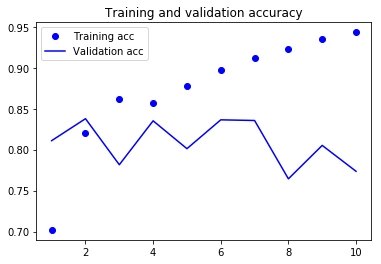

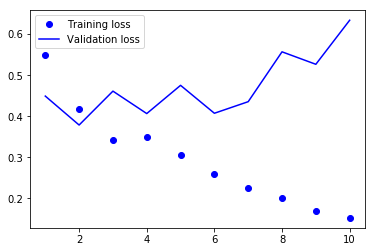

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.figure()
